NZ Locations Explained

cr: Cape Reinga (-34.25, 172.25)

mg: Mauraki Gulf (-36.75, 175.25)

bop: Bay of Plenty (-37.25, 176.75)

r: Raglan (-37.75, 174.75)

t: Taranaki (-38.75, 174.25)

cs: Cook Strait (-40.75, 174.25)

w: Wairarapa (-41.25, 176.25)

ci: Chatham Island (-43.75 -176.75)

bp: Bank Peninsula (-43.75, 173.25)

f: Fiordland (-44.25, 167.25)

op: Otago Peninsula (-45.75, 170.75)

si: Stewart Island (-47.25, 167.75)

In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

!cp -r "/gdrive/MyDrive/SSTA NZ" "/content/"
!cp -r "/gdrive/MyDrive/SSTA Non NZ" "/content/"

Mounted at /gdrive


In [2]:
import glob
import os

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time

import matplotlib.pyplot as plt

import pandas as pd
from IPython.display import display

dir_path = '/content/SSTA NZ'
nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    nz[filename] = array

dir_path = '/content/SSTA Non NZ'
non_nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    non_nz[filename] = array

dir_path = '/content/SSTA NZ'

# Merge the two dictionaries into one predictor dictionary.
predictors = {}
predictors.update(nz)
predictors.update(non_nz)

In [3]:
from scipy.stats import shapiro

# Shapiro-Wilk Test (1965)
for loc in sorted(list(nz.keys())):
    print('{}, mean: {:.4f}, std: {:.4f}'.format(loc.upper(), np.mean(nz[loc]), np.std(nz[loc])))
    stat, p = shapiro(nz[loc])
    if p > 0.05:
        print("The array is normally distributed at a significance level of 0.05.")
    else:
        print("The array is not normally distributed at a significance level of 0.05.")

BOP, mean: 0.0539, std: 0.8376
The array is normally distributed at a significance level of 0.05.
BP, mean: -0.0291, std: 0.8573
The array is not normally distributed at a significance level of 0.05.
CI, mean: -0.0170, std: 0.9278
The array is not normally distributed at a significance level of 0.05.
CR, mean: 0.0652, std: 0.8237
The array is not normally distributed at a significance level of 0.05.
CS, mean: 0.0286, std: 0.6657
The array is normally distributed at a significance level of 0.05.
F, mean: 0.0519, std: 0.9631
The array is not normally distributed at a significance level of 0.05.
MG, mean: 0.0490, std: 0.8536
The array is normally distributed at a significance level of 0.05.
OP, mean: -0.0091, std: 0.7822
The array is not normally distributed at a significance level of 0.05.
R, mean: 0.0792, std: 0.8447
The array is not normally distributed at a significance level of 0.05.
SI, mean: 0.0053, std: 0.8000
The array is not normally distributed at a significance level of 0.05.


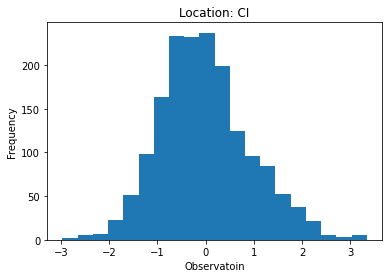

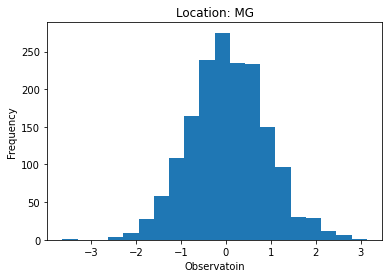

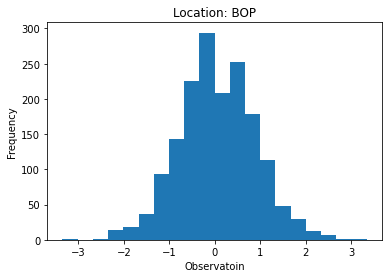

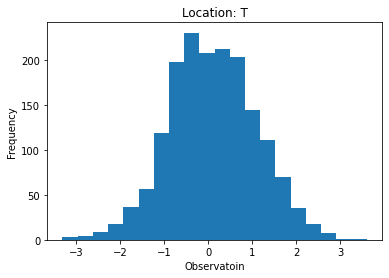

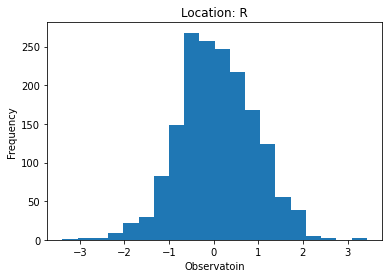

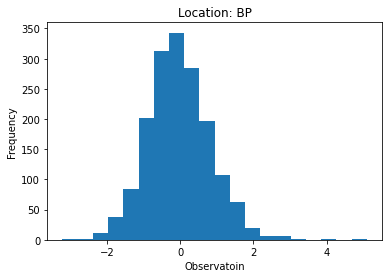

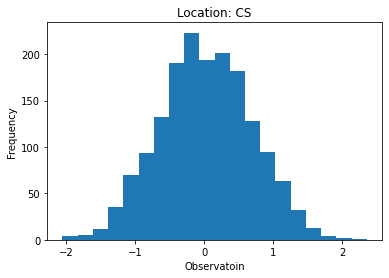

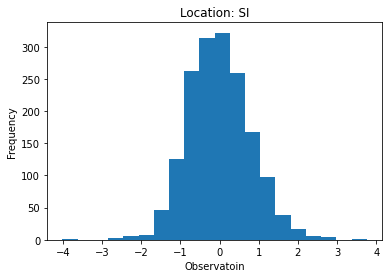

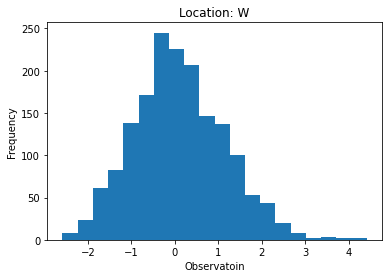

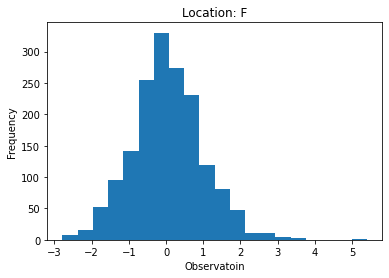

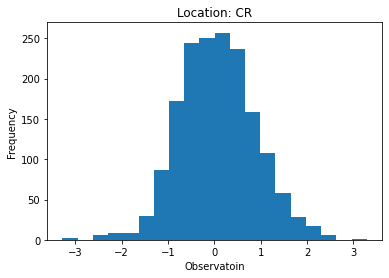

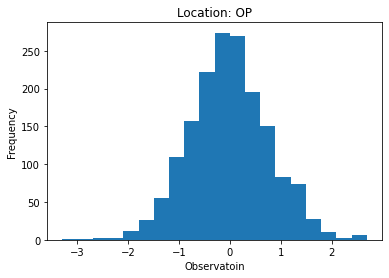

In [6]:
# Distribution

for i, (name, seq) in enumerate(nz.items()):
    plt.figure(i)
    plt.hist(seq, bins=20)
    plt.xlabel('Observatoin')
    plt.ylabel('Frequency')
    plt.title('Location: {}'.format(name.upper()))
    plt.show()

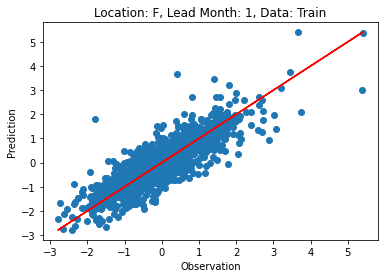

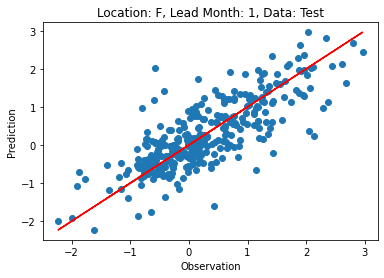

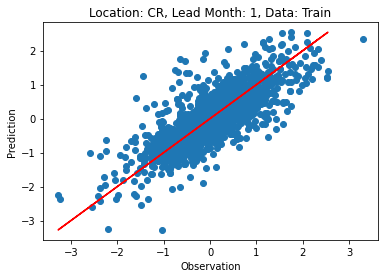

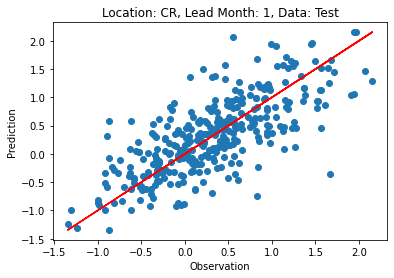

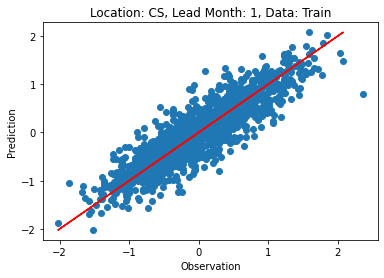

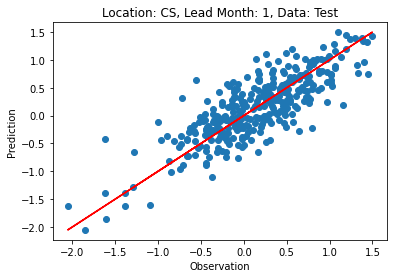

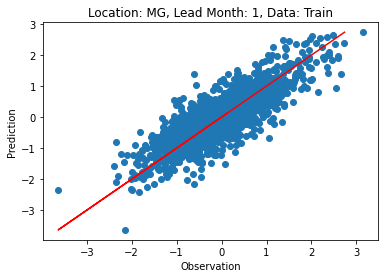

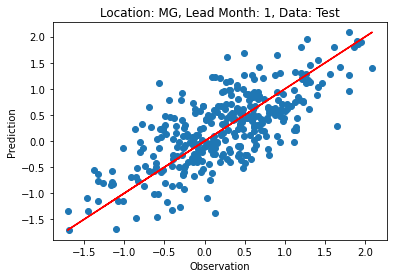

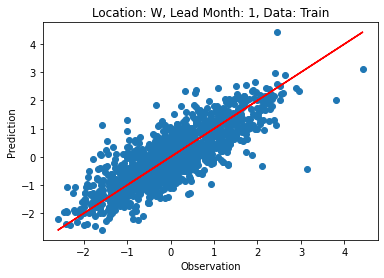

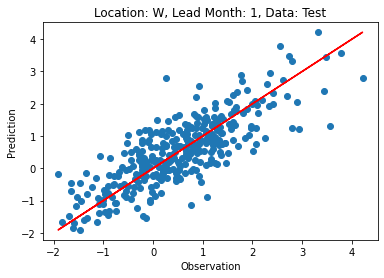

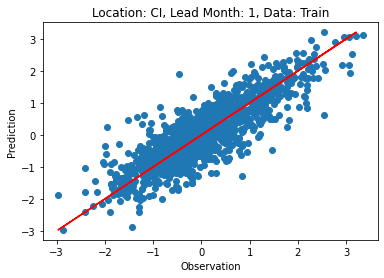

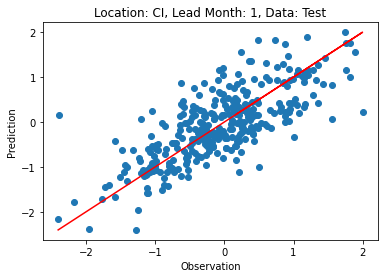

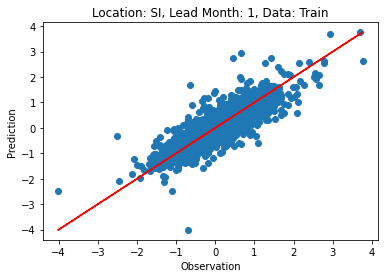

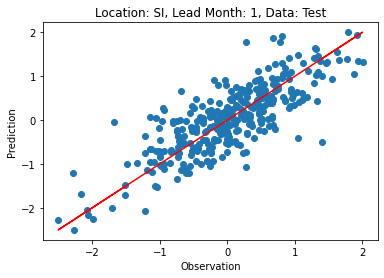

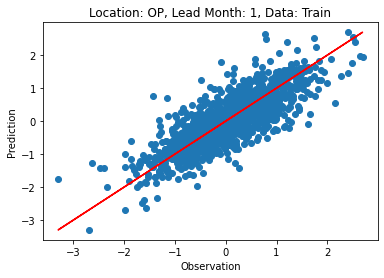

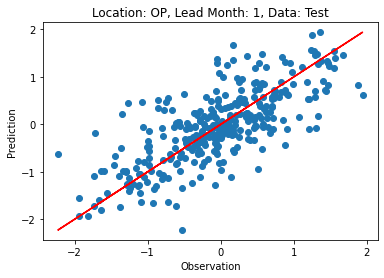

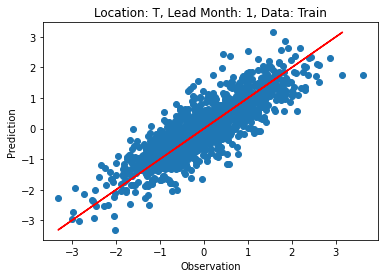

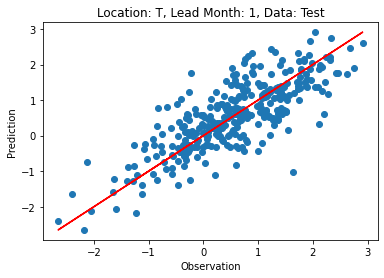

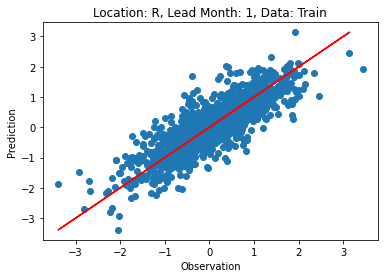

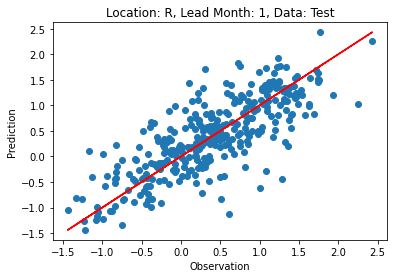

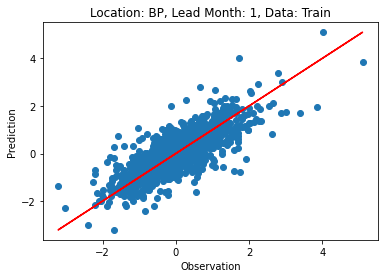

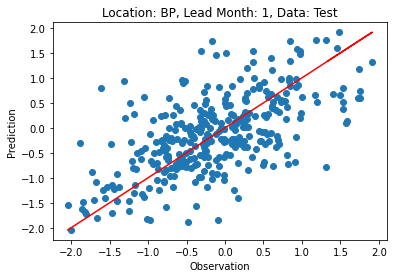

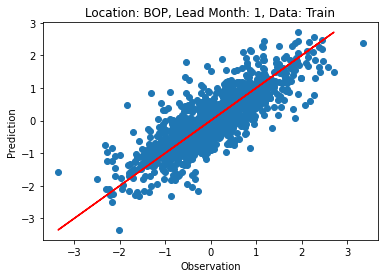

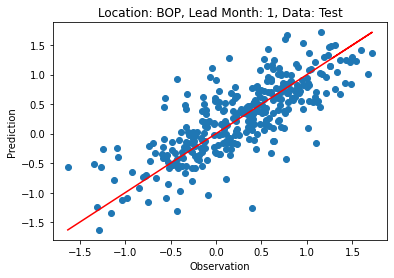

In [ ]:
# Persistence model
for lead_time in [1]:

    for loc in list(nz.keys()):

        y = nz[loc]
        train_split = 0.8
        num_train = int(len(y) * train_split)
        y_train = y[:num_train]
        y_pred_train = y_train[lead_time:]
        y_obs_train = y_train[:-lead_time]
        y_test = y[num_train:]
        y_pred_test = y_test[lead_time:]
        y_obs_test = y_test[:-lead_time]

        plt.scatter(y_obs_train, y_pred_train)
        x = y_pred_train
        y = y_pred_train
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Train'.format(loc.upper(), lead_time))
        plt.show()

        plt.scatter(y_obs_test, y_pred_test)
        x = y_pred_test
        y = y_pred_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7263537
Training Model 1
Epoch [20/400], Avg Loss: 4.7266,  Val MSE: 0.2793
Epoch [40/400], Avg Loss: 0.9383,  Val MSE: 0.2511
Epoch [60/400], Avg Loss: 0.5491,  Val MSE: 0.2302
Epoch [80/400], Avg Loss: 0.4829,  Val MSE: 0.2262
Epoch [100/400], Avg Loss: 0.4476,  Val MSE: 0.2246
Epoch [120/400], Avg Loss: 0.4218,  Val MSE: 0.2240
Epoch [140/400], Avg Loss: 0.4041,  Val MSE: 0.2248
Epoch [160/400], Avg Loss: 0.3908,  Val MSE: 0.2259
Epoch [180/400], Avg Loss: 0.3807,  Val MSE: 0.2266
Epoch [200/400], Avg Loss: 0.3727,  Val MSE: 0.2271
Epoch [220/400], Avg Loss: 0.3660,  Val MSE: 0.2274
Epoch [240/400], Avg Loss: 0.3600,  Val MSE: 0.2275
Epoch [260/400], Avg Loss: 0.3550,  Val MSE: 0.2278
Epoch [280/400], Avg Loss: 0.3508,  Val MSE: 0.2279
Epoch [300/400], Avg Loss: 0.3475,  Val MSE: 0.2279
Epoch [320/400], Avg Loss: 0.3443,  Val MSE: 0.2280
Epoch [340/400], Avg Loss: 0.3418,  Val MSE: 0.2281
Epoch [360/400], Avg Loss: 0.3400,  Val

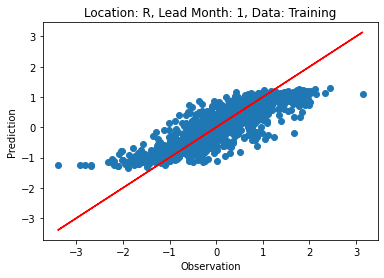

Training Model 2
Epoch [20/400], Avg Loss: 4.7086,  Val MSE: 0.2723
Epoch [40/400], Avg Loss: 0.9473,  Val MSE: 0.2492
Epoch [60/400], Avg Loss: 0.5512,  Val MSE: 0.2293
Epoch [80/400], Avg Loss: 0.4705,  Val MSE: 0.2251
Epoch [100/400], Avg Loss: 0.4270,  Val MSE: 0.2229
Epoch [120/400], Avg Loss: 0.4057,  Val MSE: 0.2224
Epoch [140/400], Avg Loss: 0.3920,  Val MSE: 0.2231
Epoch [160/400], Avg Loss: 0.3829,  Val MSE: 0.2238
Epoch [180/400], Avg Loss: 0.3755,  Val MSE: 0.2245
Epoch [200/400], Avg Loss: 0.3688,  Val MSE: 0.2247
Epoch [220/400], Avg Loss: 0.3639,  Val MSE: 0.2249
Epoch [240/400], Avg Loss: 0.3600,  Val MSE: 0.2248
Epoch [260/400], Avg Loss: 0.3569,  Val MSE: 0.2248
Epoch [280/400], Avg Loss: 0.3550,  Val MSE: 0.2250
Epoch [300/400], Avg Loss: 0.3530,  Val MSE: 0.2251
Epoch [320/400], Avg Loss: 0.3511,  Val MSE: 0.2254
Epoch [340/400], Avg Loss: 0.3495,  Val MSE: 0.2254
Epoch [360/400], Avg Loss: 0.3483,  Val MSE: 0.2256
Epoch [380/400], Avg Loss: 0.3470,  Val MSE: 0.2258

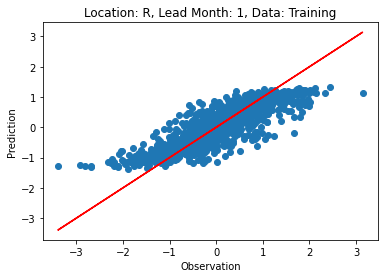

Training Model 3
Epoch [20/400], Avg Loss: 4.7138,  Val MSE: 0.2789
Epoch [40/400], Avg Loss: 0.9094,  Val MSE: 0.2471
Epoch [60/400], Avg Loss: 0.5419,  Val MSE: 0.2296
Epoch [80/400], Avg Loss: 0.4728,  Val MSE: 0.2254
Epoch [100/400], Avg Loss: 0.4354,  Val MSE: 0.2226
Epoch [120/400], Avg Loss: 0.4154,  Val MSE: 0.2212
Epoch [140/400], Avg Loss: 0.4025,  Val MSE: 0.2210
Epoch [160/400], Avg Loss: 0.3925,  Val MSE: 0.2220
Epoch [180/400], Avg Loss: 0.3840,  Val MSE: 0.2228
Epoch [200/400], Avg Loss: 0.3757,  Val MSE: 0.2234
Epoch [220/400], Avg Loss: 0.3686,  Val MSE: 0.2239
Epoch [240/400], Avg Loss: 0.3625,  Val MSE: 0.2246
Epoch [260/400], Avg Loss: 0.3567,  Val MSE: 0.2251
Epoch [280/400], Avg Loss: 0.3511,  Val MSE: 0.2255
Epoch [300/400], Avg Loss: 0.3471,  Val MSE: 0.2258
Epoch [320/400], Avg Loss: 0.3436,  Val MSE: 0.2262
Epoch [340/400], Avg Loss: 0.3401,  Val MSE: 0.2267
Epoch [360/400], Avg Loss: 0.3368,  Val MSE: 0.2270
Epoch [380/400], Avg Loss: 0.3345,  Val MSE: 0.2275

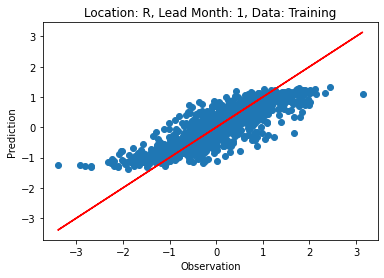

Training Model 4
Epoch [20/400], Avg Loss: 4.7384,  Val MSE: 0.2775
Epoch [40/400], Avg Loss: 0.9694,  Val MSE: 0.2487
Epoch [60/400], Avg Loss: 0.5649,  Val MSE: 0.2290
Epoch [80/400], Avg Loss: 0.4869,  Val MSE: 0.2246
Epoch [100/400], Avg Loss: 0.4479,  Val MSE: 0.2231
Epoch [120/400], Avg Loss: 0.4210,  Val MSE: 0.2230
Epoch [140/400], Avg Loss: 0.4020,  Val MSE: 0.2231
Epoch [160/400], Avg Loss: 0.3872,  Val MSE: 0.2244
Epoch [180/400], Avg Loss: 0.3760,  Val MSE: 0.2255
Epoch [200/400], Avg Loss: 0.3673,  Val MSE: 0.2262
Epoch [220/400], Avg Loss: 0.3613,  Val MSE: 0.2266
Epoch [240/400], Avg Loss: 0.3562,  Val MSE: 0.2271
Epoch [260/400], Avg Loss: 0.3519,  Val MSE: 0.2275
Epoch [280/400], Avg Loss: 0.3481,  Val MSE: 0.2278
Epoch [300/400], Avg Loss: 0.3441,  Val MSE: 0.2282
Epoch [320/400], Avg Loss: 0.3410,  Val MSE: 0.2286
Epoch [340/400], Avg Loss: 0.3378,  Val MSE: 0.2288
Epoch [360/400], Avg Loss: 0.3340,  Val MSE: 0.2291
Epoch [380/400], Avg Loss: 0.3303,  Val MSE: 0.2293

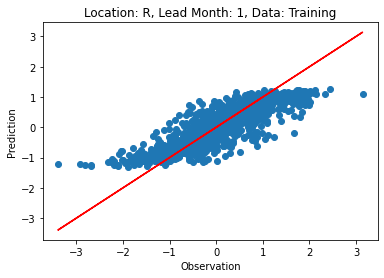

Training Model 5
Epoch [20/400], Avg Loss: 4.7993,  Val MSE: 0.2812
Epoch [40/400], Avg Loss: 0.9601,  Val MSE: 0.2514
Epoch [60/400], Avg Loss: 0.5497,  Val MSE: 0.2283
Epoch [80/400], Avg Loss: 0.4664,  Val MSE: 0.2226
Epoch [100/400], Avg Loss: 0.4305,  Val MSE: 0.2202
Epoch [120/400], Avg Loss: 0.4090,  Val MSE: 0.2207
Epoch [140/400], Avg Loss: 0.3948,  Val MSE: 0.2209
Epoch [160/400], Avg Loss: 0.3846,  Val MSE: 0.2214
Epoch [180/400], Avg Loss: 0.3769,  Val MSE: 0.2226
Epoch [200/400], Avg Loss: 0.3718,  Val MSE: 0.2235
Epoch [220/400], Avg Loss: 0.3673,  Val MSE: 0.2237
Epoch [240/400], Avg Loss: 0.3629,  Val MSE: 0.2243
Epoch [260/400], Avg Loss: 0.3589,  Val MSE: 0.2247
Epoch [280/400], Avg Loss: 0.3557,  Val MSE: 0.2248
Epoch [300/400], Avg Loss: 0.3535,  Val MSE: 0.2251
Epoch [320/400], Avg Loss: 0.3518,  Val MSE: 0.2252
Epoch [340/400], Avg Loss: 0.3504,  Val MSE: 0.2254
Epoch [360/400], Avg Loss: 0.3494,  Val MSE: 0.2257
Epoch [380/400], Avg Loss: 0.3482,  Val MSE: 0.2259

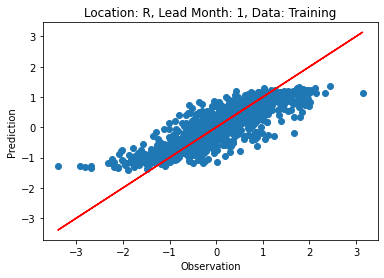

Location: R
Persistence MSE: 0.2377
Test MSE: 0.2275
Persist CSI: 0.5158
Persist CSI 80: 0.6259
Test CSI: 0.2055
Test CSI 80: 0.5859


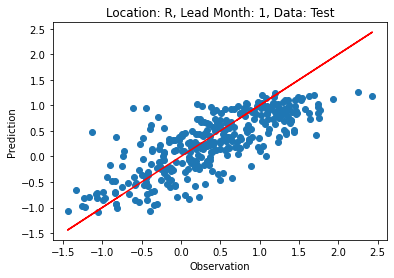

Location: CS
90th Threshold: 0.9103391
80th Threshold: 0.5539276
Training Model 1
Epoch [20/400], Avg Loss: 4.5854,  Val MSE: 0.2100
Epoch [40/400], Avg Loss: 0.7740,  Val MSE: 0.1883
Epoch [60/400], Avg Loss: 0.3851,  Val MSE: 0.1611
Epoch [80/400], Avg Loss: 0.3181,  Val MSE: 0.1440
Epoch [100/400], Avg Loss: 0.2909,  Val MSE: 0.1322
Epoch [120/400], Avg Loss: 0.2766,  Val MSE: 0.1260
Epoch [140/400], Avg Loss: 0.2676,  Val MSE: 0.1240
Epoch [160/400], Avg Loss: 0.2592,  Val MSE: 0.1235
Epoch [180/400], Avg Loss: 0.2507,  Val MSE: 0.1233
Epoch [200/400], Avg Loss: 0.2441,  Val MSE: 0.1231
Epoch [220/400], Avg Loss: 0.2393,  Val MSE: 0.1230
Epoch [240/400], Avg Loss: 0.2358,  Val MSE: 0.1229
Epoch [260/400], Avg Loss: 0.2331,  Val MSE: 0.1229
Epoch [280/400], Avg Loss: 0.2302,  Val MSE: 0.1230
Epoch [300/400], Avg Loss: 0.2269,  Val MSE: 0.1231
Epoch [320/400], Avg Loss: 0.2232,  Val MSE: 0.1233
Epoch [340/400], Avg Loss: 0.2197,  Val MSE: 0.1234
Epoch [360/400], Avg Loss: 0.2165,  Va

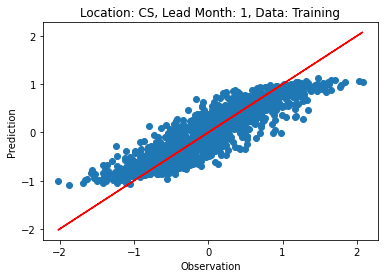

Training Model 2
Epoch [20/400], Avg Loss: 4.6082,  Val MSE: 0.2065
Epoch [40/400], Avg Loss: 0.8284,  Val MSE: 0.1950
Epoch [60/400], Avg Loss: 0.4215,  Val MSE: 0.1673
Epoch [80/400], Avg Loss: 0.3487,  Val MSE: 0.1486
Epoch [100/400], Avg Loss: 0.3122,  Val MSE: 0.1361
Epoch [120/400], Avg Loss: 0.2891,  Val MSE: 0.1281
Epoch [140/400], Avg Loss: 0.2725,  Val MSE: 0.1242
Epoch [160/400], Avg Loss: 0.2605,  Val MSE: 0.1229
Epoch [180/400], Avg Loss: 0.2510,  Val MSE: 0.1225
Epoch [200/400], Avg Loss: 0.2431,  Val MSE: 0.1223
Epoch [220/400], Avg Loss: 0.2366,  Val MSE: 0.1221
Epoch [240/400], Avg Loss: 0.2320,  Val MSE: 0.1219
Epoch [260/400], Avg Loss: 0.2281,  Val MSE: 0.1219
Epoch [280/400], Avg Loss: 0.2254,  Val MSE: 0.1220
Epoch [300/400], Avg Loss: 0.2230,  Val MSE: 0.1221
Epoch [320/400], Avg Loss: 0.2207,  Val MSE: 0.1223
Epoch [340/400], Avg Loss: 0.2185,  Val MSE: 0.1224
Epoch [360/400], Avg Loss: 0.2161,  Val MSE: 0.1226
Epoch [380/400], Avg Loss: 0.2135,  Val MSE: 0.1227

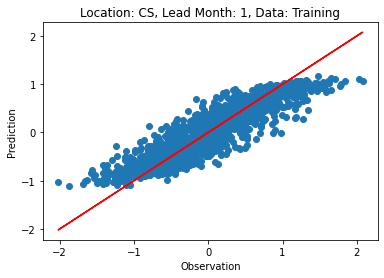

Training Model 3
Epoch [20/400], Avg Loss: 4.5984,  Val MSE: 0.2084
Epoch [40/400], Avg Loss: 0.8607,  Val MSE: 0.1980
Epoch [60/400], Avg Loss: 0.4252,  Val MSE: 0.1656
Epoch [80/400], Avg Loss: 0.3371,  Val MSE: 0.1500
Epoch [100/400], Avg Loss: 0.2941,  Val MSE: 0.1363
Epoch [120/400], Avg Loss: 0.2670,  Val MSE: 0.1280
Epoch [140/400], Avg Loss: 0.2514,  Val MSE: 0.1247
Epoch [160/400], Avg Loss: 0.2401,  Val MSE: 0.1239
Epoch [180/400], Avg Loss: 0.2321,  Val MSE: 0.1235
Epoch [200/400], Avg Loss: 0.2271,  Val MSE: 0.1233
Epoch [220/400], Avg Loss: 0.2241,  Val MSE: 0.1231
Epoch [240/400], Avg Loss: 0.2222,  Val MSE: 0.1232
Epoch [260/400], Avg Loss: 0.2205,  Val MSE: 0.1234
Epoch [280/400], Avg Loss: 0.2191,  Val MSE: 0.1235
Epoch [300/400], Avg Loss: 0.2176,  Val MSE: 0.1237
Epoch [320/400], Avg Loss: 0.2159,  Val MSE: 0.1238
Epoch [340/400], Avg Loss: 0.2138,  Val MSE: 0.1240
Epoch [360/400], Avg Loss: 0.2114,  Val MSE: 0.1240
Epoch [380/400], Avg Loss: 0.2093,  Val MSE: 0.1241

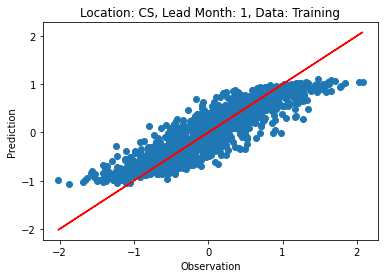

Training Model 4
Epoch [20/400], Avg Loss: 4.6018,  Val MSE: 0.2034
Epoch [40/400], Avg Loss: 0.8669,  Val MSE: 0.2001
Epoch [60/400], Avg Loss: 0.4124,  Val MSE: 0.1663
Epoch [80/400], Avg Loss: 0.3330,  Val MSE: 0.1473
Epoch [100/400], Avg Loss: 0.3041,  Val MSE: 0.1349
Epoch [120/400], Avg Loss: 0.2855,  Val MSE: 0.1279
Epoch [140/400], Avg Loss: 0.2722,  Val MSE: 0.1249
Epoch [160/400], Avg Loss: 0.2611,  Val MSE: 0.1239
Epoch [180/400], Avg Loss: 0.2522,  Val MSE: 0.1237
Epoch [200/400], Avg Loss: 0.2449,  Val MSE: 0.1235
Epoch [220/400], Avg Loss: 0.2387,  Val MSE: 0.1235
Epoch [240/400], Avg Loss: 0.2329,  Val MSE: 0.1234
Epoch [260/400], Avg Loss: 0.2278,  Val MSE: 0.1234
Epoch [280/400], Avg Loss: 0.2238,  Val MSE: 0.1235
Epoch [300/400], Avg Loss: 0.2200,  Val MSE: 0.1235
Epoch [320/400], Avg Loss: 0.2176,  Val MSE: 0.1236
Epoch [340/400], Avg Loss: 0.2153,  Val MSE: 0.1237
Epoch [360/400], Avg Loss: 0.2134,  Val MSE: 0.1239
Epoch [380/400], Avg Loss: 0.2112,  Val MSE: 0.1242

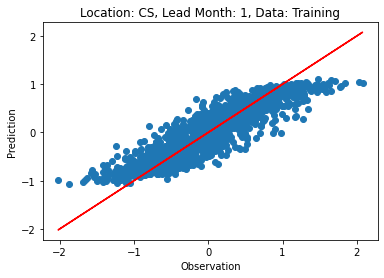

Training Model 5
Epoch [20/400], Avg Loss: 4.6144,  Val MSE: 0.2122
Epoch [40/400], Avg Loss: 0.8242,  Val MSE: 0.1934
Epoch [60/400], Avg Loss: 0.4010,  Val MSE: 0.1647
Epoch [80/400], Avg Loss: 0.3257,  Val MSE: 0.1478
Epoch [100/400], Avg Loss: 0.2937,  Val MSE: 0.1351
Epoch [120/400], Avg Loss: 0.2750,  Val MSE: 0.1275
Epoch [140/400], Avg Loss: 0.2625,  Val MSE: 0.1246
Epoch [160/400], Avg Loss: 0.2532,  Val MSE: 0.1237
Epoch [180/400], Avg Loss: 0.2453,  Val MSE: 0.1231
Epoch [200/400], Avg Loss: 0.2391,  Val MSE: 0.1228
Epoch [220/400], Avg Loss: 0.2342,  Val MSE: 0.1226
Epoch [240/400], Avg Loss: 0.2300,  Val MSE: 0.1225
Epoch [260/400], Avg Loss: 0.2264,  Val MSE: 0.1223
Epoch [280/400], Avg Loss: 0.2243,  Val MSE: 0.1224
Epoch [300/400], Avg Loss: 0.2225,  Val MSE: 0.1223
Epoch [320/400], Avg Loss: 0.2208,  Val MSE: 0.1224
Epoch [340/400], Avg Loss: 0.2188,  Val MSE: 0.1224
Epoch [360/400], Avg Loss: 0.2167,  Val MSE: 0.1226
Epoch [380/400], Avg Loss: 0.2143,  Val MSE: 0.1227

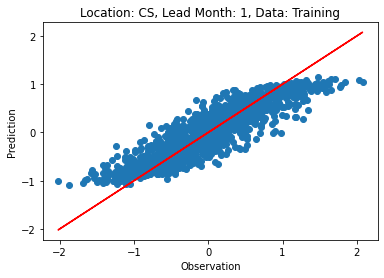

Location: CS
Persistence MSE: 0.1247
Test MSE: 0.1235
Persist CSI: 0.4043
Persist CSI 80: 0.5327
Test CSI: 0.3143
Test CSI 80: 0.4737


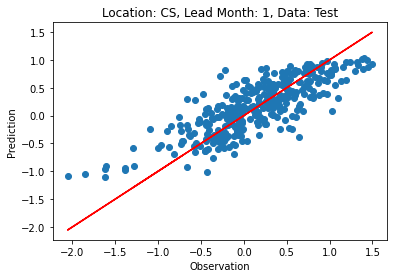

Location: SI
90th Threshold: 1.0238477
80th Threshold: 0.6232777
Training Model 1
Epoch [20/400], Avg Loss: 4.8192,  Val MSE: 0.3154
Epoch [40/400], Avg Loss: 0.9550,  Val MSE: 0.2721
Epoch [60/400], Avg Loss: 0.5384,  Val MSE: 0.2372
Epoch [80/400], Avg Loss: 0.4527,  Val MSE: 0.2270
Epoch [100/400], Avg Loss: 0.4157,  Val MSE: 0.2252
Epoch [120/400], Avg Loss: 0.3934,  Val MSE: 0.2246
Epoch [140/400], Avg Loss: 0.3766,  Val MSE: 0.2248
Epoch [160/400], Avg Loss: 0.3631,  Val MSE: 0.2253
Epoch [180/400], Avg Loss: 0.3518,  Val MSE: 0.2260
Epoch [200/400], Avg Loss: 0.3441,  Val MSE: 0.2267
Epoch [220/400], Avg Loss: 0.3390,  Val MSE: 0.2275
Epoch [240/400], Avg Loss: 0.3341,  Val MSE: 0.2282
Epoch [260/400], Avg Loss: 0.3302,  Val MSE: 0.2288
Epoch [280/400], Avg Loss: 0.3276,  Val MSE: 0.2294
Epoch [300/400], Avg Loss: 0.3253,  Val MSE: 0.2299
Epoch [320/400], Avg Loss: 0.3235,  Val MSE: 0.2303
Epoch [340/400], Avg Loss: 0.3221,  Val MSE: 0.2306
Epoch [360/400], Avg Loss: 0.3210,  Va

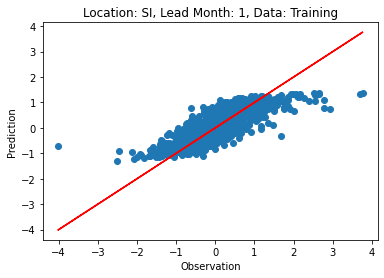

Training Model 2
Epoch [20/400], Avg Loss: 4.7823,  Val MSE: 0.3126
Epoch [40/400], Avg Loss: 0.9317,  Val MSE: 0.2693
Epoch [60/400], Avg Loss: 0.5298,  Val MSE: 0.2362
Epoch [80/400], Avg Loss: 0.4542,  Val MSE: 0.2275
Epoch [100/400], Avg Loss: 0.4152,  Val MSE: 0.2251
Epoch [120/400], Avg Loss: 0.3927,  Val MSE: 0.2242
Epoch [140/400], Avg Loss: 0.3754,  Val MSE: 0.2235
Epoch [160/400], Avg Loss: 0.3642,  Val MSE: 0.2232
Epoch [180/400], Avg Loss: 0.3544,  Val MSE: 0.2233
Epoch [200/400], Avg Loss: 0.3456,  Val MSE: 0.2236
Epoch [220/400], Avg Loss: 0.3383,  Val MSE: 0.2241
Epoch [240/400], Avg Loss: 0.3325,  Val MSE: 0.2245
Epoch [260/400], Avg Loss: 0.3287,  Val MSE: 0.2249
Epoch [280/400], Avg Loss: 0.3255,  Val MSE: 0.2253
Epoch [300/400], Avg Loss: 0.3230,  Val MSE: 0.2258
Epoch [320/400], Avg Loss: 0.3206,  Val MSE: 0.2261
Epoch [340/400], Avg Loss: 0.3185,  Val MSE: 0.2266
Epoch [360/400], Avg Loss: 0.3163,  Val MSE: 0.2270
Epoch [380/400], Avg Loss: 0.3144,  Val MSE: 0.2274

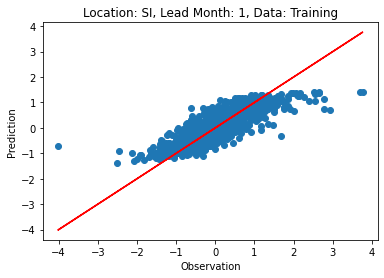

Training Model 3
Epoch [20/400], Avg Loss: 4.7955,  Val MSE: 0.3130
Epoch [40/400], Avg Loss: 0.9101,  Val MSE: 0.2654
Epoch [60/400], Avg Loss: 0.5134,  Val MSE: 0.2337
Epoch [80/400], Avg Loss: 0.4372,  Val MSE: 0.2256
Epoch [100/400], Avg Loss: 0.4046,  Val MSE: 0.2230
Epoch [120/400], Avg Loss: 0.3864,  Val MSE: 0.2223
Epoch [140/400], Avg Loss: 0.3742,  Val MSE: 0.2220
Epoch [160/400], Avg Loss: 0.3647,  Val MSE: 0.2223
Epoch [180/400], Avg Loss: 0.3565,  Val MSE: 0.2226
Epoch [200/400], Avg Loss: 0.3503,  Val MSE: 0.2230
Epoch [220/400], Avg Loss: 0.3454,  Val MSE: 0.2235
Epoch [240/400], Avg Loss: 0.3408,  Val MSE: 0.2241
Epoch [260/400], Avg Loss: 0.3361,  Val MSE: 0.2248
Epoch [280/400], Avg Loss: 0.3312,  Val MSE: 0.2254
Epoch [300/400], Avg Loss: 0.3259,  Val MSE: 0.2259
Epoch [320/400], Avg Loss: 0.3211,  Val MSE: 0.2264
Epoch [340/400], Avg Loss: 0.3177,  Val MSE: 0.2267
Epoch [360/400], Avg Loss: 0.3153,  Val MSE: 0.2271
Epoch [380/400], Avg Loss: 0.3133,  Val MSE: 0.2274

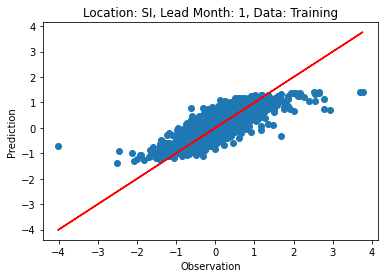

Training Model 4
Epoch [20/400], Avg Loss: 4.7750,  Val MSE: 0.3187
Epoch [40/400], Avg Loss: 0.9316,  Val MSE: 0.2625
Epoch [60/400], Avg Loss: 0.5382,  Val MSE: 0.2321
Epoch [80/400], Avg Loss: 0.4696,  Val MSE: 0.2257
Epoch [100/400], Avg Loss: 0.4371,  Val MSE: 0.2238
Epoch [120/400], Avg Loss: 0.4132,  Val MSE: 0.2230
Epoch [140/400], Avg Loss: 0.3957,  Val MSE: 0.2228
Epoch [160/400], Avg Loss: 0.3822,  Val MSE: 0.2226
Epoch [180/400], Avg Loss: 0.3724,  Val MSE: 0.2228
Epoch [200/400], Avg Loss: 0.3651,  Val MSE: 0.2232
Epoch [220/400], Avg Loss: 0.3585,  Val MSE: 0.2239
Epoch [240/400], Avg Loss: 0.3529,  Val MSE: 0.2246
Epoch [260/400], Avg Loss: 0.3485,  Val MSE: 0.2253
Epoch [280/400], Avg Loss: 0.3437,  Val MSE: 0.2259
Epoch [300/400], Avg Loss: 0.3390,  Val MSE: 0.2266
Epoch [320/400], Avg Loss: 0.3339,  Val MSE: 0.2273
Epoch [340/400], Avg Loss: 0.3298,  Val MSE: 0.2279
Epoch [360/400], Avg Loss: 0.3267,  Val MSE: 0.2283
Epoch [380/400], Avg Loss: 0.3245,  Val MSE: 0.2287

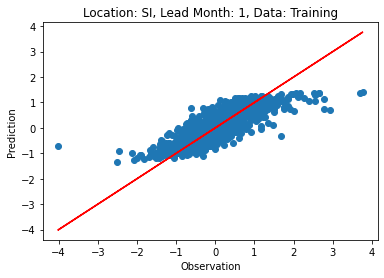

Training Model 5
Epoch [20/400], Avg Loss: 4.7472,  Val MSE: 0.2966
Epoch [40/400], Avg Loss: 0.8884,  Val MSE: 0.2586
Epoch [60/400], Avg Loss: 0.5227,  Val MSE: 0.2317
Epoch [80/400], Avg Loss: 0.4529,  Val MSE: 0.2243
Epoch [100/400], Avg Loss: 0.4178,  Val MSE: 0.2222
Epoch [120/400], Avg Loss: 0.3948,  Val MSE: 0.2216
Epoch [140/400], Avg Loss: 0.3791,  Val MSE: 0.2210
Epoch [160/400], Avg Loss: 0.3678,  Val MSE: 0.2210
Epoch [180/400], Avg Loss: 0.3586,  Val MSE: 0.2213
Epoch [200/400], Avg Loss: 0.3509,  Val MSE: 0.2217
Epoch [220/400], Avg Loss: 0.3441,  Val MSE: 0.2221
Epoch [240/400], Avg Loss: 0.3391,  Val MSE: 0.2224
Epoch [260/400], Avg Loss: 0.3350,  Val MSE: 0.2228
Epoch [280/400], Avg Loss: 0.3319,  Val MSE: 0.2231
Epoch [300/400], Avg Loss: 0.3286,  Val MSE: 0.2234
Epoch [320/400], Avg Loss: 0.3255,  Val MSE: 0.2234
Epoch [340/400], Avg Loss: 0.3236,  Val MSE: 0.2236
Epoch [360/400], Avg Loss: 0.3223,  Val MSE: 0.2238
Epoch [380/400], Avg Loss: 0.3212,  Val MSE: 0.2241

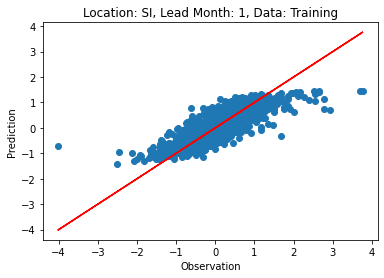

Location: SI
Persistence MSE: 0.2440
Test MSE: 0.2281
Persist CSI: 0.4545
Persist CSI 80: 0.4646
Test CSI: 0.4474
Test CSI 80: 0.4646


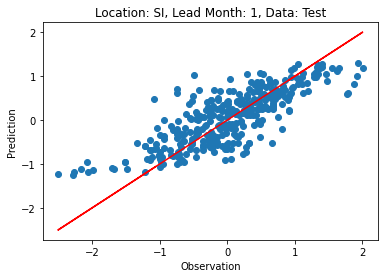

Location: CR
90th Threshold: 1.0850446
80th Threshold: 0.6930024
Training Model 1
Epoch [20/400], Avg Loss: 4.8491,  Val MSE: 0.2852
Epoch [40/400], Avg Loss: 1.0261,  Val MSE: 0.2567
Epoch [60/400], Avg Loss: 0.6097,  Val MSE: 0.2237
Epoch [80/400], Avg Loss: 0.5227,  Val MSE: 0.2187
Epoch [100/400], Avg Loss: 0.4827,  Val MSE: 0.2183
Epoch [120/400], Avg Loss: 0.4596,  Val MSE: 0.2187
Epoch [140/400], Avg Loss: 0.4453,  Val MSE: 0.2197
Epoch [160/400], Avg Loss: 0.4338,  Val MSE: 0.2205
Epoch [180/400], Avg Loss: 0.4257,  Val MSE: 0.2214
Epoch [200/400], Avg Loss: 0.4200,  Val MSE: 0.2223
Epoch [220/400], Avg Loss: 0.4163,  Val MSE: 0.2230
Epoch [240/400], Avg Loss: 0.4138,  Val MSE: 0.2237
Epoch [260/400], Avg Loss: 0.4114,  Val MSE: 0.2249
Epoch [280/400], Avg Loss: 0.4088,  Val MSE: 0.2258
Epoch [300/400], Avg Loss: 0.4065,  Val MSE: 0.2266
Epoch [320/400], Avg Loss: 0.4040,  Val MSE: 0.2274
Epoch [340/400], Avg Loss: 0.4016,  Val MSE: 0.2282
Epoch [360/400], Avg Loss: 0.3997,  Va

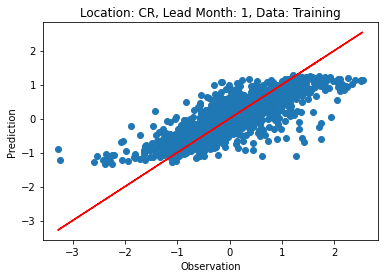

Training Model 2
Epoch [20/400], Avg Loss: 4.8262,  Val MSE: 0.2785
Epoch [40/400], Avg Loss: 0.9950,  Val MSE: 0.2496
Epoch [60/400], Avg Loss: 0.5926,  Val MSE: 0.2199
Epoch [80/400], Avg Loss: 0.5057,  Val MSE: 0.2176
Epoch [100/400], Avg Loss: 0.4664,  Val MSE: 0.2184
Epoch [120/400], Avg Loss: 0.4453,  Val MSE: 0.2197
Epoch [140/400], Avg Loss: 0.4299,  Val MSE: 0.2217
Epoch [160/400], Avg Loss: 0.4169,  Val MSE: 0.2236
Epoch [180/400], Avg Loss: 0.4065,  Val MSE: 0.2257
Epoch [200/400], Avg Loss: 0.3990,  Val MSE: 0.2275
Epoch [220/400], Avg Loss: 0.3941,  Val MSE: 0.2288
Epoch [240/400], Avg Loss: 0.3907,  Val MSE: 0.2300
Epoch [260/400], Avg Loss: 0.3881,  Val MSE: 0.2311
Epoch [280/400], Avg Loss: 0.3862,  Val MSE: 0.2320
Epoch [300/400], Avg Loss: 0.3847,  Val MSE: 0.2328
Epoch [320/400], Avg Loss: 0.3835,  Val MSE: 0.2335
Epoch [340/400], Avg Loss: 0.3828,  Val MSE: 0.2341
Epoch [360/400], Avg Loss: 0.3820,  Val MSE: 0.2347
Epoch [380/400], Avg Loss: 0.3811,  Val MSE: 0.2355

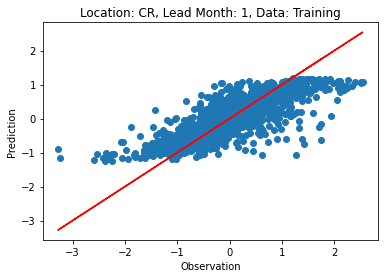

Training Model 3
Epoch [20/400], Avg Loss: 4.8022,  Val MSE: 0.2793
Epoch [40/400], Avg Loss: 1.0112,  Val MSE: 0.2510
Epoch [60/400], Avg Loss: 0.5970,  Val MSE: 0.2203
Epoch [80/400], Avg Loss: 0.5310,  Val MSE: 0.2179
Epoch [100/400], Avg Loss: 0.5009,  Val MSE: 0.2178
Epoch [120/400], Avg Loss: 0.4771,  Val MSE: 0.2184
Epoch [140/400], Avg Loss: 0.4590,  Val MSE: 0.2194
Epoch [160/400], Avg Loss: 0.4460,  Val MSE: 0.2205
Epoch [180/400], Avg Loss: 0.4376,  Val MSE: 0.2216
Epoch [200/400], Avg Loss: 0.4316,  Val MSE: 0.2225
Epoch [220/400], Avg Loss: 0.4265,  Val MSE: 0.2235
Epoch [240/400], Avg Loss: 0.4219,  Val MSE: 0.2247
Epoch [260/400], Avg Loss: 0.4172,  Val MSE: 0.2259
Epoch [280/400], Avg Loss: 0.4128,  Val MSE: 0.2271
Epoch [300/400], Avg Loss: 0.4083,  Val MSE: 0.2281
Epoch [320/400], Avg Loss: 0.4042,  Val MSE: 0.2292
Epoch [340/400], Avg Loss: 0.4002,  Val MSE: 0.2300
Epoch [360/400], Avg Loss: 0.3964,  Val MSE: 0.2307
Epoch [380/400], Avg Loss: 0.3929,  Val MSE: 0.2312

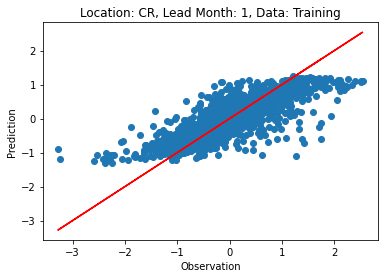

Training Model 4
Epoch [20/400], Avg Loss: 4.8749,  Val MSE: 0.2731
Epoch [40/400], Avg Loss: 1.0163,  Val MSE: 0.2479
Epoch [60/400], Avg Loss: 0.6230,  Val MSE: 0.2218
Epoch [80/400], Avg Loss: 0.5440,  Val MSE: 0.2183
Epoch [100/400], Avg Loss: 0.4946,  Val MSE: 0.2181
Epoch [120/400], Avg Loss: 0.4638,  Val MSE: 0.2189
Epoch [140/400], Avg Loss: 0.4429,  Val MSE: 0.2205
Epoch [160/400], Avg Loss: 0.4299,  Val MSE: 0.2228
Epoch [180/400], Avg Loss: 0.4197,  Val MSE: 0.2247
Epoch [200/400], Avg Loss: 0.4120,  Val MSE: 0.2262
Epoch [220/400], Avg Loss: 0.4068,  Val MSE: 0.2276
Epoch [240/400], Avg Loss: 0.4034,  Val MSE: 0.2287
Epoch [260/400], Avg Loss: 0.4011,  Val MSE: 0.2296
Epoch [280/400], Avg Loss: 0.3991,  Val MSE: 0.2304
Epoch [300/400], Avg Loss: 0.3977,  Val MSE: 0.2311
Epoch [320/400], Avg Loss: 0.3962,  Val MSE: 0.2319
Epoch [340/400], Avg Loss: 0.3945,  Val MSE: 0.2325
Epoch [360/400], Avg Loss: 0.3925,  Val MSE: 0.2331
Epoch [380/400], Avg Loss: 0.3903,  Val MSE: 0.2337

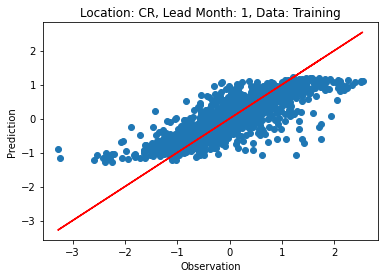

Training Model 5
Epoch [20/400], Avg Loss: 4.7731,  Val MSE: 0.2739
Epoch [40/400], Avg Loss: 0.9969,  Val MSE: 0.2486
Epoch [60/400], Avg Loss: 0.6132,  Val MSE: 0.2220
Epoch [80/400], Avg Loss: 0.5261,  Val MSE: 0.2179
Epoch [100/400], Avg Loss: 0.4800,  Val MSE: 0.2178
Epoch [120/400], Avg Loss: 0.4512,  Val MSE: 0.2187
Epoch [140/400], Avg Loss: 0.4327,  Val MSE: 0.2201
Epoch [160/400], Avg Loss: 0.4195,  Val MSE: 0.2214
Epoch [180/400], Avg Loss: 0.4115,  Val MSE: 0.2225
Epoch [200/400], Avg Loss: 0.4071,  Val MSE: 0.2236
Epoch [220/400], Avg Loss: 0.4040,  Val MSE: 0.2247
Epoch [240/400], Avg Loss: 0.4016,  Val MSE: 0.2257
Epoch [260/400], Avg Loss: 0.3994,  Val MSE: 0.2267
Epoch [280/400], Avg Loss: 0.3971,  Val MSE: 0.2276
Epoch [300/400], Avg Loss: 0.3955,  Val MSE: 0.2284
Epoch [320/400], Avg Loss: 0.3945,  Val MSE: 0.2292
Epoch [340/400], Avg Loss: 0.3934,  Val MSE: 0.2300
Epoch [360/400], Avg Loss: 0.3926,  Val MSE: 0.2306
Epoch [380/400], Avg Loss: 0.3921,  Val MSE: 0.2312

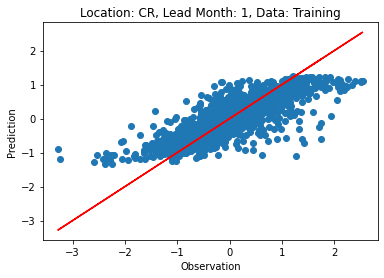

Location: CR
Persistence MSE: 0.2468
Test MSE: 0.2327
Persist CSI: 0.3286
Persist CSI 80: 0.4959
Test CSI: 0.1373
Test CSI 80: 0.4224


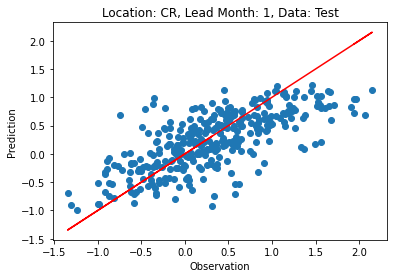

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6495769
Training Model 1
Epoch [20/400], Avg Loss: 4.7650,  Val MSE: 0.3549
Epoch [40/400], Avg Loss: 0.8978,  Val MSE: 0.3238
Epoch [60/400], Avg Loss: 0.5202,  Val MSE: 0.2979
Epoch [80/400], Avg Loss: 0.4546,  Val MSE: 0.2901
Epoch [100/400], Avg Loss: 0.4229,  Val MSE: 0.2853
Epoch [120/400], Avg Loss: 0.4008,  Val MSE: 0.2822
Epoch [140/400], Avg Loss: 0.3841,  Val MSE: 0.2807
Epoch [160/400], Avg Loss: 0.3714,  Val MSE: 0.2794
Epoch [180/400], Avg Loss: 0.3614,  Val MSE: 0.2783
Epoch [200/400], Avg Loss: 0.3530,  Val MSE: 0.2773
Epoch [220/400], Avg Loss: 0.3457,  Val MSE: 0.2766
Epoch [240/400], Avg Loss: 0.3383,  Val MSE: 0.2766
Epoch [260/400], Avg Loss: 0.3322,  Val MSE: 0.2768
Epoch [280/400], Avg Loss: 0.3270,  Val MSE: 0.2768
Epoch [300/400], Avg Loss: 0.3236,  Val MSE: 0.2770
Epoch [320/400], Avg Loss: 0.3208,  Val MSE: 0.2772
Epoch [340/400], Avg Loss: 0.3182,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3162,  Va

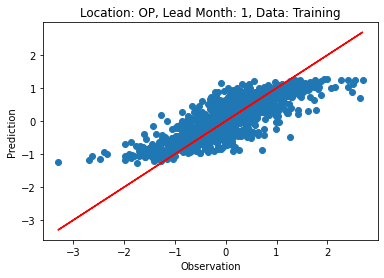

Training Model 2
Epoch [20/400], Avg Loss: 4.7968,  Val MSE: 0.3592
Epoch [40/400], Avg Loss: 0.9300,  Val MSE: 0.3230
Epoch [60/400], Avg Loss: 0.5340,  Val MSE: 0.2961
Epoch [80/400], Avg Loss: 0.4574,  Val MSE: 0.2890
Epoch [100/400], Avg Loss: 0.4181,  Val MSE: 0.2850
Epoch [120/400], Avg Loss: 0.3957,  Val MSE: 0.2826
Epoch [140/400], Avg Loss: 0.3814,  Val MSE: 0.2803
Epoch [160/400], Avg Loss: 0.3710,  Val MSE: 0.2783
Epoch [180/400], Avg Loss: 0.3628,  Val MSE: 0.2770
Epoch [200/400], Avg Loss: 0.3561,  Val MSE: 0.2765
Epoch [220/400], Avg Loss: 0.3498,  Val MSE: 0.2762
Epoch [240/400], Avg Loss: 0.3442,  Val MSE: 0.2764
Epoch [260/400], Avg Loss: 0.3393,  Val MSE: 0.2768
Epoch [280/400], Avg Loss: 0.3347,  Val MSE: 0.2771
Epoch [300/400], Avg Loss: 0.3307,  Val MSE: 0.2773
Epoch [320/400], Avg Loss: 0.3265,  Val MSE: 0.2774
Epoch [340/400], Avg Loss: 0.3228,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3198,  Val MSE: 0.2775
Epoch [380/400], Avg Loss: 0.3176,  Val MSE: 0.2774

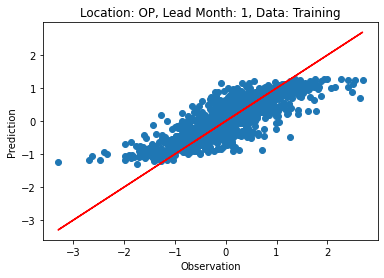

Training Model 3
Epoch [20/400], Avg Loss: 4.7662,  Val MSE: 0.3548
Epoch [40/400], Avg Loss: 0.9030,  Val MSE: 0.3219
Epoch [60/400], Avg Loss: 0.5156,  Val MSE: 0.2960
Epoch [80/400], Avg Loss: 0.4427,  Val MSE: 0.2897
Epoch [100/400], Avg Loss: 0.4072,  Val MSE: 0.2848
Epoch [120/400], Avg Loss: 0.3859,  Val MSE: 0.2823
Epoch [140/400], Avg Loss: 0.3697,  Val MSE: 0.2806
Epoch [160/400], Avg Loss: 0.3556,  Val MSE: 0.2794
Epoch [180/400], Avg Loss: 0.3457,  Val MSE: 0.2784
Epoch [200/400], Avg Loss: 0.3390,  Val MSE: 0.2774
Epoch [220/400], Avg Loss: 0.3341,  Val MSE: 0.2774
Epoch [240/400], Avg Loss: 0.3308,  Val MSE: 0.2774
Epoch [260/400], Avg Loss: 0.3282,  Val MSE: 0.2776
Epoch [280/400], Avg Loss: 0.3262,  Val MSE: 0.2778
Epoch [300/400], Avg Loss: 0.3237,  Val MSE: 0.2779
Epoch [320/400], Avg Loss: 0.3208,  Val MSE: 0.2780
Epoch [340/400], Avg Loss: 0.3180,  Val MSE: 0.2778
Epoch [360/400], Avg Loss: 0.3159,  Val MSE: 0.2779
Epoch [380/400], Avg Loss: 0.3146,  Val MSE: 0.2780

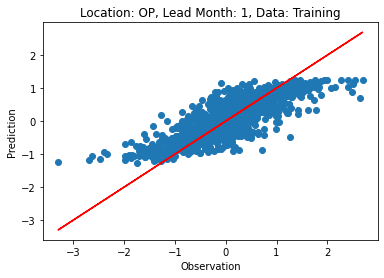

Training Model 4
Epoch [20/400], Avg Loss: 4.7600,  Val MSE: 0.3566
Epoch [40/400], Avg Loss: 0.8840,  Val MSE: 0.3190
Epoch [60/400], Avg Loss: 0.5102,  Val MSE: 0.2938
Epoch [80/400], Avg Loss: 0.4436,  Val MSE: 0.2883
Epoch [100/400], Avg Loss: 0.4111,  Val MSE: 0.2846
Epoch [120/400], Avg Loss: 0.3910,  Val MSE: 0.2820
Epoch [140/400], Avg Loss: 0.3752,  Val MSE: 0.2797
Epoch [160/400], Avg Loss: 0.3632,  Val MSE: 0.2780
Epoch [180/400], Avg Loss: 0.3554,  Val MSE: 0.2770
Epoch [200/400], Avg Loss: 0.3490,  Val MSE: 0.2763
Epoch [220/400], Avg Loss: 0.3446,  Val MSE: 0.2761
Epoch [240/400], Avg Loss: 0.3409,  Val MSE: 0.2759
Epoch [260/400], Avg Loss: 0.3371,  Val MSE: 0.2758
Epoch [280/400], Avg Loss: 0.3342,  Val MSE: 0.2759
Epoch [300/400], Avg Loss: 0.3313,  Val MSE: 0.2761
Epoch [320/400], Avg Loss: 0.3289,  Val MSE: 0.2763
Epoch [340/400], Avg Loss: 0.3271,  Val MSE: 0.2765
Epoch [360/400], Avg Loss: 0.3255,  Val MSE: 0.2767
Epoch [380/400], Avg Loss: 0.3237,  Val MSE: 0.2769

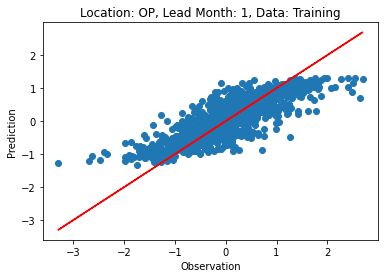

Training Model 5
Epoch [20/400], Avg Loss: 4.7447,  Val MSE: 0.3536
Epoch [40/400], Avg Loss: 0.9334,  Val MSE: 0.3234
Epoch [60/400], Avg Loss: 0.5400,  Val MSE: 0.2947
Epoch [80/400], Avg Loss: 0.4647,  Val MSE: 0.2882
Epoch [100/400], Avg Loss: 0.4241,  Val MSE: 0.2844
Epoch [120/400], Avg Loss: 0.3975,  Val MSE: 0.2814
Epoch [140/400], Avg Loss: 0.3785,  Val MSE: 0.2796
Epoch [160/400], Avg Loss: 0.3641,  Val MSE: 0.2782
Epoch [180/400], Avg Loss: 0.3528,  Val MSE: 0.2773
Epoch [200/400], Avg Loss: 0.3450,  Val MSE: 0.2770
Epoch [220/400], Avg Loss: 0.3384,  Val MSE: 0.2773
Epoch [240/400], Avg Loss: 0.3327,  Val MSE: 0.2773
Epoch [260/400], Avg Loss: 0.3278,  Val MSE: 0.2774
Epoch [280/400], Avg Loss: 0.3239,  Val MSE: 0.2773
Epoch [300/400], Avg Loss: 0.3207,  Val MSE: 0.2774
Epoch [320/400], Avg Loss: 0.3181,  Val MSE: 0.2774
Epoch [340/400], Avg Loss: 0.3162,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3151,  Val MSE: 0.2775
Epoch [380/400], Avg Loss: 0.3139,  Val MSE: 0.2777

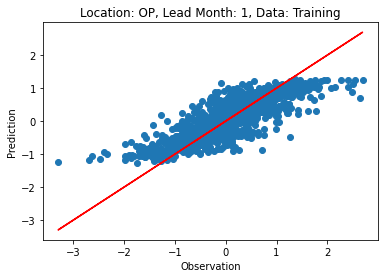

Location: OP
Persistence MSE: 0.3155
Test MSE: 0.2776
Persist CSI: 0.3478
Persist CSI 80: 0.4198
Test CSI: 0.4103
Test CSI 80: 0.4430


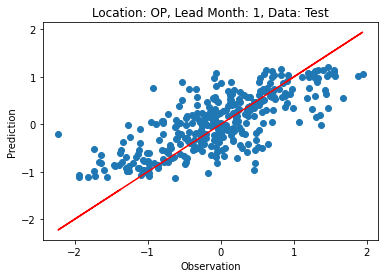

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.8168559
Training Model 1
Epoch [20/400], Avg Loss: 4.8085,  Val MSE: 0.5035
Epoch [40/400], Avg Loss: 1.0017,  Val MSE: 0.4268
Epoch [60/400], Avg Loss: 0.6046,  Val MSE: 0.3935
Epoch [80/400], Avg Loss: 0.5144,  Val MSE: 0.3833
Epoch [100/400], Avg Loss: 0.4722,  Val MSE: 0.3805
Epoch [120/400], Avg Loss: 0.4478,  Val MSE: 0.3811
Epoch [140/400], Avg Loss: 0.4288,  Val MSE: 0.3830
Epoch [160/400], Avg Loss: 0.4146,  Val MSE: 0.3845
Epoch [180/400], Avg Loss: 0.4058,  Val MSE: 0.3867
Epoch [200/400], Avg Loss: 0.3993,  Val MSE: 0.3893
Epoch [220/400], Avg Loss: 0.3941,  Val MSE: 0.3917
Epoch [240/400], Avg Loss: 0.3899,  Val MSE: 0.3935
Epoch [260/400], Avg Loss: 0.3851,  Val MSE: 0.3950
Epoch [280/400], Avg Loss: 0.3804,  Val MSE: 0.3963
Epoch [300/400], Avg Loss: 0.3770,  Val MSE: 0.3973
Epoch [320/400], Avg Loss: 0.3753,  Val MSE: 0.3982
Epoch [340/400], Avg Loss: 0.3739,  Val MSE: 0.3993
Epoch [360/400], Avg Loss: 0.3731,  Val

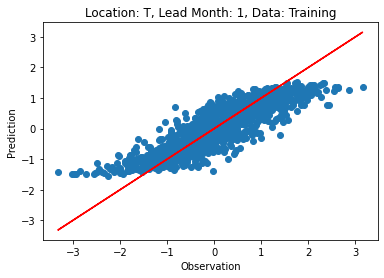

Training Model 2
Epoch [20/400], Avg Loss: 4.8732,  Val MSE: 0.4980
Epoch [40/400], Avg Loss: 1.0153,  Val MSE: 0.4313
Epoch [60/400], Avg Loss: 0.6076,  Val MSE: 0.3936
Epoch [80/400], Avg Loss: 0.5282,  Val MSE: 0.3860
Epoch [100/400], Avg Loss: 0.4879,  Val MSE: 0.3845
Epoch [120/400], Avg Loss: 0.4634,  Val MSE: 0.3832
Epoch [140/400], Avg Loss: 0.4465,  Val MSE: 0.3830
Epoch [160/400], Avg Loss: 0.4358,  Val MSE: 0.3850
Epoch [180/400], Avg Loss: 0.4271,  Val MSE: 0.3876
Epoch [200/400], Avg Loss: 0.4197,  Val MSE: 0.3904
Epoch [220/400], Avg Loss: 0.4138,  Val MSE: 0.3924
Epoch [240/400], Avg Loss: 0.4094,  Val MSE: 0.3940
Epoch [260/400], Avg Loss: 0.4061,  Val MSE: 0.3954
Epoch [280/400], Avg Loss: 0.4037,  Val MSE: 0.3968
Epoch [300/400], Avg Loss: 0.4012,  Val MSE: 0.3984
Epoch [320/400], Avg Loss: 0.3992,  Val MSE: 0.3999
Epoch [340/400], Avg Loss: 0.3977,  Val MSE: 0.4010
Epoch [360/400], Avg Loss: 0.3959,  Val MSE: 0.4023
Epoch [380/400], Avg Loss: 0.3937,  Val MSE: 0.4034

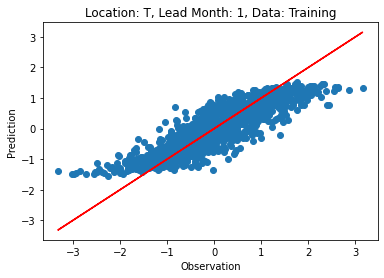

Training Model 3
Epoch [20/400], Avg Loss: 4.8355,  Val MSE: 0.4988
Epoch [40/400], Avg Loss: 1.0534,  Val MSE: 0.4347
Epoch [60/400], Avg Loss: 0.6296,  Val MSE: 0.3955
Epoch [80/400], Avg Loss: 0.5272,  Val MSE: 0.3833
Epoch [100/400], Avg Loss: 0.4797,  Val MSE: 0.3820
Epoch [120/400], Avg Loss: 0.4542,  Val MSE: 0.3826
Epoch [140/400], Avg Loss: 0.4370,  Val MSE: 0.3836
Epoch [160/400], Avg Loss: 0.4241,  Val MSE: 0.3856
Epoch [180/400], Avg Loss: 0.4133,  Val MSE: 0.3882
Epoch [200/400], Avg Loss: 0.4049,  Val MSE: 0.3908
Epoch [220/400], Avg Loss: 0.3992,  Val MSE: 0.3930
Epoch [240/400], Avg Loss: 0.3948,  Val MSE: 0.3943
Epoch [260/400], Avg Loss: 0.3907,  Val MSE: 0.3954
Epoch [280/400], Avg Loss: 0.3865,  Val MSE: 0.3965
Epoch [300/400], Avg Loss: 0.3822,  Val MSE: 0.3970
Epoch [320/400], Avg Loss: 0.3785,  Val MSE: 0.3976
Epoch [340/400], Avg Loss: 0.3767,  Val MSE: 0.3981
Epoch [360/400], Avg Loss: 0.3759,  Val MSE: 0.3983
Epoch [380/400], Avg Loss: 0.3753,  Val MSE: 0.3987

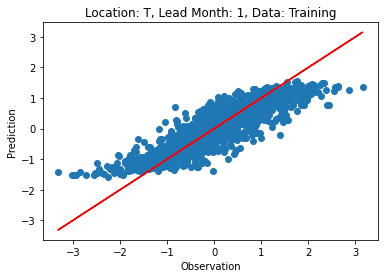

Training Model 4
Epoch [20/400], Avg Loss: 4.8116,  Val MSE: 0.4890
Epoch [40/400], Avg Loss: 1.0445,  Val MSE: 0.4311
Epoch [60/400], Avg Loss: 0.6417,  Val MSE: 0.3966
Epoch [80/400], Avg Loss: 0.5483,  Val MSE: 0.3808
Epoch [100/400], Avg Loss: 0.4998,  Val MSE: 0.3763
Epoch [120/400], Avg Loss: 0.4727,  Val MSE: 0.3761
Epoch [140/400], Avg Loss: 0.4547,  Val MSE: 0.3769
Epoch [160/400], Avg Loss: 0.4405,  Val MSE: 0.3779
Epoch [180/400], Avg Loss: 0.4298,  Val MSE: 0.3794
Epoch [200/400], Avg Loss: 0.4229,  Val MSE: 0.3822
Epoch [220/400], Avg Loss: 0.4166,  Val MSE: 0.3847
Epoch [240/400], Avg Loss: 0.4107,  Val MSE: 0.3867
Epoch [260/400], Avg Loss: 0.4056,  Val MSE: 0.3882
Epoch [280/400], Avg Loss: 0.4010,  Val MSE: 0.3899
Epoch [300/400], Avg Loss: 0.3973,  Val MSE: 0.3912
Epoch [320/400], Avg Loss: 0.3944,  Val MSE: 0.3924
Epoch [340/400], Avg Loss: 0.3922,  Val MSE: 0.3935
Epoch [360/400], Avg Loss: 0.3906,  Val MSE: 0.3944
Epoch [380/400], Avg Loss: 0.3892,  Val MSE: 0.3954

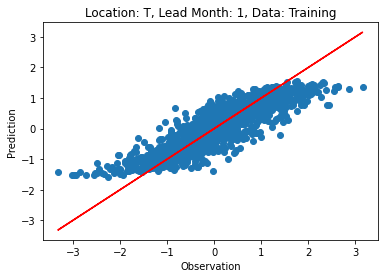

Training Model 5
Epoch [20/400], Avg Loss: 4.8482,  Val MSE: 0.5040
Epoch [40/400], Avg Loss: 1.0280,  Val MSE: 0.4339
Epoch [60/400], Avg Loss: 0.6062,  Val MSE: 0.3936
Epoch [80/400], Avg Loss: 0.5248,  Val MSE: 0.3827
Epoch [100/400], Avg Loss: 0.4893,  Val MSE: 0.3806
Epoch [120/400], Avg Loss: 0.4650,  Val MSE: 0.3807
Epoch [140/400], Avg Loss: 0.4456,  Val MSE: 0.3808
Epoch [160/400], Avg Loss: 0.4310,  Val MSE: 0.3817
Epoch [180/400], Avg Loss: 0.4211,  Val MSE: 0.3834
Epoch [200/400], Avg Loss: 0.4143,  Val MSE: 0.3851
Epoch [220/400], Avg Loss: 0.4088,  Val MSE: 0.3870
Epoch [240/400], Avg Loss: 0.4043,  Val MSE: 0.3883
Epoch [260/400], Avg Loss: 0.4009,  Val MSE: 0.3895
Epoch [280/400], Avg Loss: 0.3983,  Val MSE: 0.3907
Epoch [300/400], Avg Loss: 0.3962,  Val MSE: 0.3920
Epoch [320/400], Avg Loss: 0.3942,  Val MSE: 0.3933
Epoch [340/400], Avg Loss: 0.3921,  Val MSE: 0.3945
Epoch [360/400], Avg Loss: 0.3898,  Val MSE: 0.3953
Epoch [380/400], Avg Loss: 0.3879,  Val MSE: 0.3962

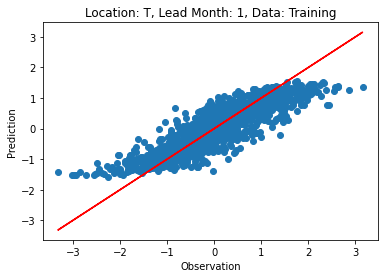

Location: T
Persistence MSE: 0.3926
Test MSE: 0.3995
Persist CSI: 0.4595
Persist CSI 80: 0.5541
Test CSI: 0.3735
Test CSI 80: 0.5782


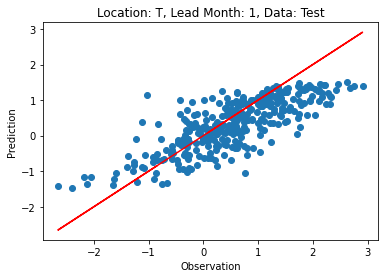

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.6538955
Training Model 1
Epoch [20/400], Avg Loss: 4.8534,  Val MSE: 0.4461
Epoch [40/400], Avg Loss: 1.0214,  Val MSE: 0.4009
Epoch [60/400], Avg Loss: 0.6416,  Val MSE: 0.3852
Epoch [80/400], Avg Loss: 0.5728,  Val MSE: 0.3822
Epoch [100/400], Avg Loss: 0.5352,  Val MSE: 0.3808
Epoch [120/400], Avg Loss: 0.5121,  Val MSE: 0.3799
Epoch [140/400], Avg Loss: 0.4958,  Val MSE: 0.3795
Epoch [160/400], Avg Loss: 0.4830,  Val MSE: 0.3792
Epoch [180/400], Avg Loss: 0.4720,  Val MSE: 0.3793
Epoch [200/400], Avg Loss: 0.4625,  Val MSE: 0.3797
Epoch [220/400], Avg Loss: 0.4536,  Val MSE: 0.3802
Epoch [240/400], Avg Loss: 0.4457,  Val MSE: 0.3807
Epoch [260/400], Avg Loss: 0.4394,  Val MSE: 0.3810
Epoch [280/400], Avg Loss: 0.4344,  Val MSE: 0.3812
Epoch [300/400], Avg Loss: 0.4305,  Val MSE: 0.3815
Epoch [320/400], Avg Loss: 0.4276,  Val MSE: 0.3818
Epoch [340/400], Avg Loss: 0.4250,  Val MSE: 0.3818
Epoch [360/400], Avg Loss: 0.4225,  Va

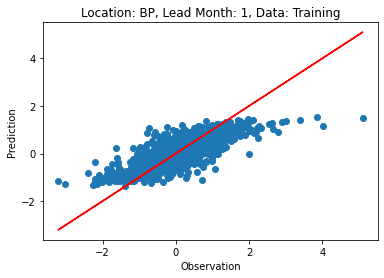

Training Model 2
Epoch [20/400], Avg Loss: 4.8787,  Val MSE: 0.4544
Epoch [40/400], Avg Loss: 1.0436,  Val MSE: 0.3990
Epoch [60/400], Avg Loss: 0.6469,  Val MSE: 0.3850
Epoch [80/400], Avg Loss: 0.5768,  Val MSE: 0.3836
Epoch [100/400], Avg Loss: 0.5383,  Val MSE: 0.3822
Epoch [120/400], Avg Loss: 0.5129,  Val MSE: 0.3809
Epoch [140/400], Avg Loss: 0.4960,  Val MSE: 0.3801
Epoch [160/400], Avg Loss: 0.4827,  Val MSE: 0.3799
Epoch [180/400], Avg Loss: 0.4719,  Val MSE: 0.3800
Epoch [200/400], Avg Loss: 0.4635,  Val MSE: 0.3803
Epoch [220/400], Avg Loss: 0.4565,  Val MSE: 0.3805
Epoch [240/400], Avg Loss: 0.4506,  Val MSE: 0.3809
Epoch [260/400], Avg Loss: 0.4450,  Val MSE: 0.3813
Epoch [280/400], Avg Loss: 0.4403,  Val MSE: 0.3816
Epoch [300/400], Avg Loss: 0.4371,  Val MSE: 0.3818
Epoch [320/400], Avg Loss: 0.4338,  Val MSE: 0.3821
Epoch [340/400], Avg Loss: 0.4313,  Val MSE: 0.3822
Epoch [360/400], Avg Loss: 0.4294,  Val MSE: 0.3823
Epoch [380/400], Avg Loss: 0.4275,  Val MSE: 0.3825

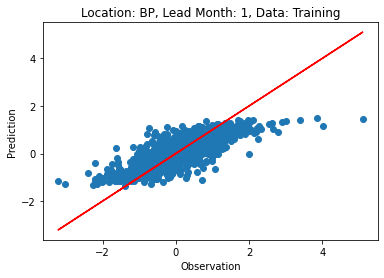

Training Model 3
Epoch [20/400], Avg Loss: 4.8752,  Val MSE: 0.4526
Epoch [40/400], Avg Loss: 1.0006,  Val MSE: 0.4016
Epoch [60/400], Avg Loss: 0.6088,  Val MSE: 0.3814
Epoch [80/400], Avg Loss: 0.5384,  Val MSE: 0.3797
Epoch [100/400], Avg Loss: 0.5041,  Val MSE: 0.3787
Epoch [120/400], Avg Loss: 0.4856,  Val MSE: 0.3787
Epoch [140/400], Avg Loss: 0.4713,  Val MSE: 0.3794
Epoch [160/400], Avg Loss: 0.4606,  Val MSE: 0.3801
Epoch [180/400], Avg Loss: 0.4531,  Val MSE: 0.3807
Epoch [200/400], Avg Loss: 0.4469,  Val MSE: 0.3811
Epoch [220/400], Avg Loss: 0.4425,  Val MSE: 0.3815
Epoch [240/400], Avg Loss: 0.4392,  Val MSE: 0.3818
Epoch [260/400], Avg Loss: 0.4370,  Val MSE: 0.3821
Epoch [280/400], Avg Loss: 0.4349,  Val MSE: 0.3825
Epoch [300/400], Avg Loss: 0.4326,  Val MSE: 0.3828
Epoch [320/400], Avg Loss: 0.4303,  Val MSE: 0.3831
Epoch [340/400], Avg Loss: 0.4285,  Val MSE: 0.3832
Epoch [360/400], Avg Loss: 0.4262,  Val MSE: 0.3834
Epoch [380/400], Avg Loss: 0.4242,  Val MSE: 0.3836

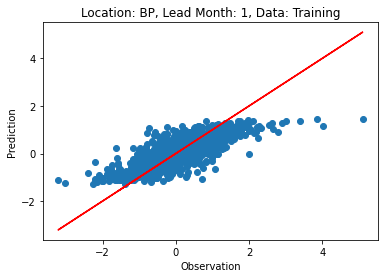

Training Model 4
Epoch [20/400], Avg Loss: 4.9201,  Val MSE: 0.4711
Epoch [40/400], Avg Loss: 1.0425,  Val MSE: 0.4059
Epoch [60/400], Avg Loss: 0.6443,  Val MSE: 0.3859
Epoch [80/400], Avg Loss: 0.5690,  Val MSE: 0.3836
Epoch [100/400], Avg Loss: 0.5368,  Val MSE: 0.3817
Epoch [120/400], Avg Loss: 0.5196,  Val MSE: 0.3804
Epoch [140/400], Avg Loss: 0.5052,  Val MSE: 0.3800
Epoch [160/400], Avg Loss: 0.4922,  Val MSE: 0.3802
Epoch [180/400], Avg Loss: 0.4820,  Val MSE: 0.3805
Epoch [200/400], Avg Loss: 0.4733,  Val MSE: 0.3808
Epoch [220/400], Avg Loss: 0.4658,  Val MSE: 0.3811
Epoch [240/400], Avg Loss: 0.4588,  Val MSE: 0.3814
Epoch [260/400], Avg Loss: 0.4520,  Val MSE: 0.3819
Epoch [280/400], Avg Loss: 0.4462,  Val MSE: 0.3820
Epoch [300/400], Avg Loss: 0.4407,  Val MSE: 0.3821
Epoch [320/400], Avg Loss: 0.4358,  Val MSE: 0.3823
Epoch [340/400], Avg Loss: 0.4312,  Val MSE: 0.3824
Epoch [360/400], Avg Loss: 0.4268,  Val MSE: 0.3826
Epoch [380/400], Avg Loss: 0.4230,  Val MSE: 0.3826

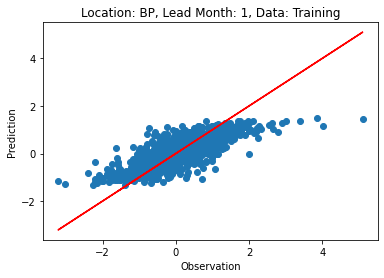

Training Model 5
Epoch [20/400], Avg Loss: 4.8687,  Val MSE: 0.4467
Epoch [40/400], Avg Loss: 1.0180,  Val MSE: 0.3994
Epoch [60/400], Avg Loss: 0.6336,  Val MSE: 0.3823
Epoch [80/400], Avg Loss: 0.5638,  Val MSE: 0.3796
Epoch [100/400], Avg Loss: 0.5322,  Val MSE: 0.3781
Epoch [120/400], Avg Loss: 0.5123,  Val MSE: 0.3780
Epoch [140/400], Avg Loss: 0.4970,  Val MSE: 0.3784
Epoch [160/400], Avg Loss: 0.4835,  Val MSE: 0.3791
Epoch [180/400], Avg Loss: 0.4718,  Val MSE: 0.3801
Epoch [200/400], Avg Loss: 0.4623,  Val MSE: 0.3808
Epoch [220/400], Avg Loss: 0.4540,  Val MSE: 0.3813
Epoch [240/400], Avg Loss: 0.4480,  Val MSE: 0.3818
Epoch [260/400], Avg Loss: 0.4432,  Val MSE: 0.3822
Epoch [280/400], Avg Loss: 0.4386,  Val MSE: 0.3825
Epoch [300/400], Avg Loss: 0.4341,  Val MSE: 0.3829
Epoch [320/400], Avg Loss: 0.4291,  Val MSE: 0.3833
Epoch [340/400], Avg Loss: 0.4246,  Val MSE: 0.3836
Epoch [360/400], Avg Loss: 0.4213,  Val MSE: 0.3838
Epoch [380/400], Avg Loss: 0.4183,  Val MSE: 0.3840

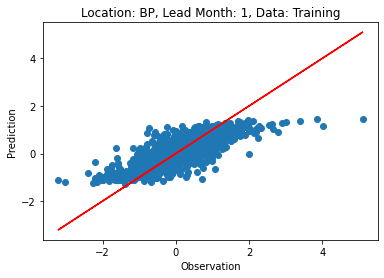

Location: BP
Persistence MSE: 0.4665
Test MSE: 0.3831
Persist CSI: 0.1875
Persist CSI 80: 0.2949
Test CSI: 0.1600
Test CSI 80: 0.2899


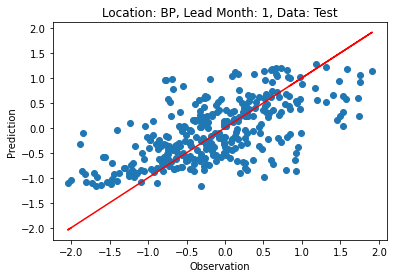

Location: BOP
90th Threshold: 1.1172504
80th Threshold: 0.72880715
Training Model 1
Epoch [20/400], Avg Loss: 4.8059,  Val MSE: 0.1903
Epoch [40/400], Avg Loss: 0.9705,  Val MSE: 0.1705
Epoch [60/400], Avg Loss: 0.5962,  Val MSE: 0.1585
Epoch [80/400], Avg Loss: 0.5190,  Val MSE: 0.1527
Epoch [100/400], Avg Loss: 0.4751,  Val MSE: 0.1501
Epoch [120/400], Avg Loss: 0.4490,  Val MSE: 0.1489
Epoch [140/400], Avg Loss: 0.4325,  Val MSE: 0.1487
Epoch [160/400], Avg Loss: 0.4196,  Val MSE: 0.1487
Epoch [180/400], Avg Loss: 0.4072,  Val MSE: 0.1490
Epoch [200/400], Avg Loss: 0.3963,  Val MSE: 0.1494
Epoch [220/400], Avg Loss: 0.3889,  Val MSE: 0.1496
Epoch [240/400], Avg Loss: 0.3837,  Val MSE: 0.1499
Epoch [260/400], Avg Loss: 0.3790,  Val MSE: 0.1502
Epoch [280/400], Avg Loss: 0.3747,  Val MSE: 0.1506
Epoch [300/400], Avg Loss: 0.3708,  Val MSE: 0.1510
Epoch [320/400], Avg Loss: 0.3673,  Val MSE: 0.1514
Epoch [340/400], Avg Loss: 0.3652,  Val MSE: 0.1517
Epoch [360/400], Avg Loss: 0.3636,  

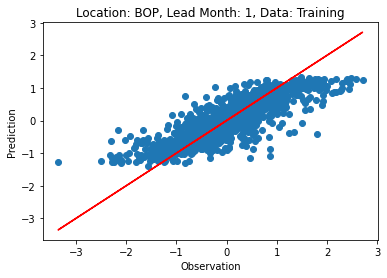

Training Model 2
Epoch [20/400], Avg Loss: 4.7818,  Val MSE: 0.1901
Epoch [40/400], Avg Loss: 1.0273,  Val MSE: 0.1750
Epoch [60/400], Avg Loss: 0.6225,  Val MSE: 0.1606
Epoch [80/400], Avg Loss: 0.5205,  Val MSE: 0.1525
Epoch [100/400], Avg Loss: 0.4660,  Val MSE: 0.1498
Epoch [120/400], Avg Loss: 0.4387,  Val MSE: 0.1490
Epoch [140/400], Avg Loss: 0.4222,  Val MSE: 0.1490
Epoch [160/400], Avg Loss: 0.4114,  Val MSE: 0.1492
Epoch [180/400], Avg Loss: 0.4031,  Val MSE: 0.1493
Epoch [200/400], Avg Loss: 0.3960,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3900,  Val MSE: 0.1497
Epoch [240/400], Avg Loss: 0.3845,  Val MSE: 0.1499
Epoch [260/400], Avg Loss: 0.3792,  Val MSE: 0.1501
Epoch [280/400], Avg Loss: 0.3752,  Val MSE: 0.1504
Epoch [300/400], Avg Loss: 0.3718,  Val MSE: 0.1507
Epoch [320/400], Avg Loss: 0.3683,  Val MSE: 0.1509
Epoch [340/400], Avg Loss: 0.3653,  Val MSE: 0.1513
Epoch [360/400], Avg Loss: 0.3632,  Val MSE: 0.1515
Epoch [380/400], Avg Loss: 0.3608,  Val MSE: 0.1518

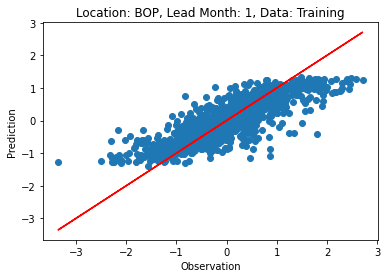

Training Model 3
Epoch [20/400], Avg Loss: 4.8212,  Val MSE: 0.1958
Epoch [40/400], Avg Loss: 1.0528,  Val MSE: 0.1766
Epoch [60/400], Avg Loss: 0.6045,  Val MSE: 0.1595
Epoch [80/400], Avg Loss: 0.5090,  Val MSE: 0.1525
Epoch [100/400], Avg Loss: 0.4652,  Val MSE: 0.1500
Epoch [120/400], Avg Loss: 0.4423,  Val MSE: 0.1490
Epoch [140/400], Avg Loss: 0.4267,  Val MSE: 0.1487
Epoch [160/400], Avg Loss: 0.4140,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4032,  Val MSE: 0.1493
Epoch [200/400], Avg Loss: 0.3946,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3891,  Val MSE: 0.1498
Epoch [240/400], Avg Loss: 0.3851,  Val MSE: 0.1502
Epoch [260/400], Avg Loss: 0.3818,  Val MSE: 0.1507
Epoch [280/400], Avg Loss: 0.3785,  Val MSE: 0.1511
Epoch [300/400], Avg Loss: 0.3748,  Val MSE: 0.1515
Epoch [320/400], Avg Loss: 0.3711,  Val MSE: 0.1520
Epoch [340/400], Avg Loss: 0.3679,  Val MSE: 0.1523
Epoch [360/400], Avg Loss: 0.3652,  Val MSE: 0.1525
Epoch [380/400], Avg Loss: 0.3629,  Val MSE: 0.1528

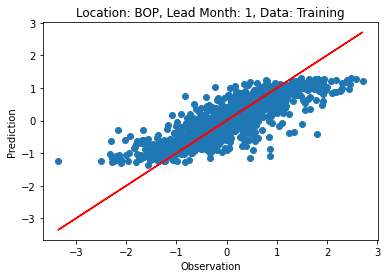

Training Model 4
Epoch [20/400], Avg Loss: 4.8105,  Val MSE: 0.2003
Epoch [40/400], Avg Loss: 1.0311,  Val MSE: 0.1770
Epoch [60/400], Avg Loss: 0.6078,  Val MSE: 0.1622
Epoch [80/400], Avg Loss: 0.5124,  Val MSE: 0.1536
Epoch [100/400], Avg Loss: 0.4702,  Val MSE: 0.1506
Epoch [120/400], Avg Loss: 0.4470,  Val MSE: 0.1494
Epoch [140/400], Avg Loss: 0.4314,  Val MSE: 0.1488
Epoch [160/400], Avg Loss: 0.4215,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4126,  Val MSE: 0.1492
Epoch [200/400], Avg Loss: 0.4043,  Val MSE: 0.1497
Epoch [220/400], Avg Loss: 0.3973,  Val MSE: 0.1500
Epoch [240/400], Avg Loss: 0.3910,  Val MSE: 0.1503
Epoch [260/400], Avg Loss: 0.3852,  Val MSE: 0.1508
Epoch [280/400], Avg Loss: 0.3806,  Val MSE: 0.1514
Epoch [300/400], Avg Loss: 0.3764,  Val MSE: 0.1518
Epoch [320/400], Avg Loss: 0.3725,  Val MSE: 0.1522
Epoch [340/400], Avg Loss: 0.3689,  Val MSE: 0.1525
Epoch [360/400], Avg Loss: 0.3661,  Val MSE: 0.1528
Epoch [380/400], Avg Loss: 0.3638,  Val MSE: 0.1531

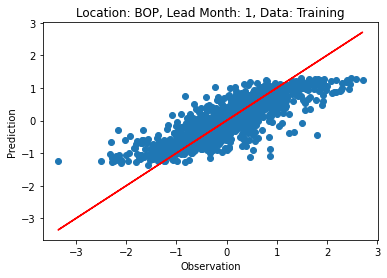

Training Model 5
Epoch [20/400], Avg Loss: 4.7665,  Val MSE: 0.1932
Epoch [40/400], Avg Loss: 1.0225,  Val MSE: 0.1761
Epoch [60/400], Avg Loss: 0.6167,  Val MSE: 0.1608
Epoch [80/400], Avg Loss: 0.5317,  Val MSE: 0.1535
Epoch [100/400], Avg Loss: 0.4869,  Val MSE: 0.1503
Epoch [120/400], Avg Loss: 0.4601,  Val MSE: 0.1491
Epoch [140/400], Avg Loss: 0.4389,  Val MSE: 0.1488
Epoch [160/400], Avg Loss: 0.4240,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4131,  Val MSE: 0.1492
Epoch [200/400], Avg Loss: 0.4046,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3969,  Val MSE: 0.1498
Epoch [240/400], Avg Loss: 0.3900,  Val MSE: 0.1501
Epoch [260/400], Avg Loss: 0.3839,  Val MSE: 0.1506
Epoch [280/400], Avg Loss: 0.3794,  Val MSE: 0.1510
Epoch [300/400], Avg Loss: 0.3757,  Val MSE: 0.1514
Epoch [320/400], Avg Loss: 0.3722,  Val MSE: 0.1518
Epoch [340/400], Avg Loss: 0.3689,  Val MSE: 0.1521
Epoch [360/400], Avg Loss: 0.3658,  Val MSE: 0.1524
Epoch [380/400], Avg Loss: 0.3632,  Val MSE: 0.1527

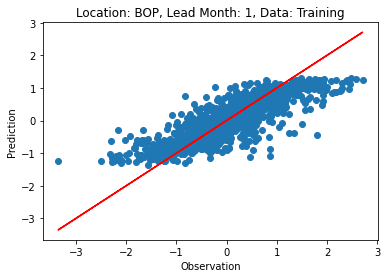

Location: BOP
Persistence MSE: 0.1690
Test MSE: 0.1528
Persist CSI: 0.3846
Persist CSI 80: 0.4717
Test CSI: 0.0357
Test CSI 80: 0.4211


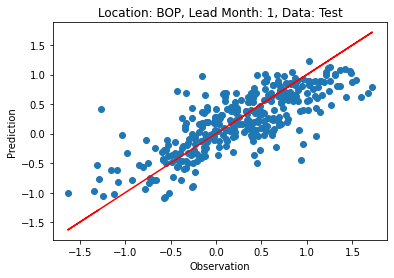

Location: W
90th Threshold: 1.331288
80th Threshold: 0.8579866
Training Model 1
Epoch [20/400], Avg Loss: 4.8997,  Val MSE: 0.5886
Epoch [40/400], Avg Loss: 1.0930,  Val MSE: 0.5087
Epoch [60/400], Avg Loss: 0.6988,  Val MSE: 0.4696
Epoch [80/400], Avg Loss: 0.6209,  Val MSE: 0.4589
Epoch [100/400], Avg Loss: 0.5899,  Val MSE: 0.4595
Epoch [120/400], Avg Loss: 0.5701,  Val MSE: 0.4646
Epoch [140/400], Avg Loss: 0.5572,  Val MSE: 0.4696
Epoch [160/400], Avg Loss: 0.5453,  Val MSE: 0.4753
Epoch [180/400], Avg Loss: 0.5340,  Val MSE: 0.4800
Epoch [200/400], Avg Loss: 0.5231,  Val MSE: 0.4848
Epoch [220/400], Avg Loss: 0.5130,  Val MSE: 0.4891
Epoch [240/400], Avg Loss: 0.5044,  Val MSE: 0.4917
Epoch [260/400], Avg Loss: 0.4973,  Val MSE: 0.4937
Epoch [280/400], Avg Loss: 0.4916,  Val MSE: 0.4953
Epoch [300/400], Avg Loss: 0.4870,  Val MSE: 0.4969
Epoch [320/400], Avg Loss: 0.4830,  Val MSE: 0.4986
Epoch [340/400], Avg Loss: 0.4788,  Val MSE: 0.5003
Epoch [360/400], Avg Loss: 0.4743,  Val 

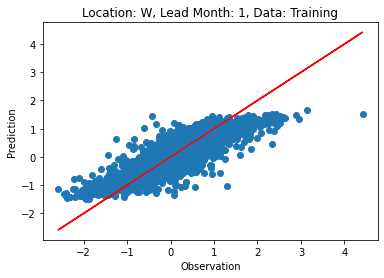

Training Model 2
Epoch [20/400], Avg Loss: 4.9133,  Val MSE: 0.5857
Epoch [40/400], Avg Loss: 1.1319,  Val MSE: 0.5181
Epoch [60/400], Avg Loss: 0.7423,  Val MSE: 0.4777
Epoch [80/400], Avg Loss: 0.6482,  Val MSE: 0.4674
Epoch [100/400], Avg Loss: 0.5958,  Val MSE: 0.4695
Epoch [120/400], Avg Loss: 0.5643,  Val MSE: 0.4737
Epoch [140/400], Avg Loss: 0.5430,  Val MSE: 0.4782
Epoch [160/400], Avg Loss: 0.5269,  Val MSE: 0.4829
Epoch [180/400], Avg Loss: 0.5139,  Val MSE: 0.4869
Epoch [200/400], Avg Loss: 0.5050,  Val MSE: 0.4909
Epoch [220/400], Avg Loss: 0.4970,  Val MSE: 0.4951
Epoch [240/400], Avg Loss: 0.4907,  Val MSE: 0.4995
Epoch [260/400], Avg Loss: 0.4862,  Val MSE: 0.5030
Epoch [280/400], Avg Loss: 0.4834,  Val MSE: 0.5063
Epoch [300/400], Avg Loss: 0.4811,  Val MSE: 0.5092
Epoch [320/400], Avg Loss: 0.4792,  Val MSE: 0.5121
Epoch [340/400], Avg Loss: 0.4775,  Val MSE: 0.5149
Epoch [360/400], Avg Loss: 0.4761,  Val MSE: 0.5171
Epoch [380/400], Avg Loss: 0.4745,  Val MSE: 0.5180

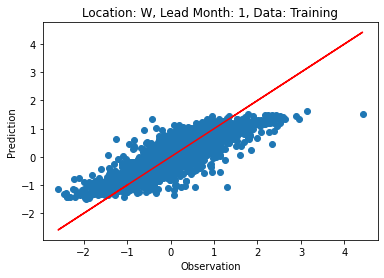

Training Model 3
Epoch [20/400], Avg Loss: 4.8950,  Val MSE: 0.5889
Epoch [40/400], Avg Loss: 1.1229,  Val MSE: 0.5158
Epoch [60/400], Avg Loss: 0.7041,  Val MSE: 0.4792
Epoch [80/400], Avg Loss: 0.6161,  Val MSE: 0.4749
Epoch [100/400], Avg Loss: 0.5814,  Val MSE: 0.4790
Epoch [120/400], Avg Loss: 0.5614,  Val MSE: 0.4828
Epoch [140/400], Avg Loss: 0.5476,  Val MSE: 0.4871
Epoch [160/400], Avg Loss: 0.5362,  Val MSE: 0.4910
Epoch [180/400], Avg Loss: 0.5254,  Val MSE: 0.4941
Epoch [200/400], Avg Loss: 0.5162,  Val MSE: 0.4978
Epoch [220/400], Avg Loss: 0.5072,  Val MSE: 0.5008
Epoch [240/400], Avg Loss: 0.4991,  Val MSE: 0.5025
Epoch [260/400], Avg Loss: 0.4931,  Val MSE: 0.5040
Epoch [280/400], Avg Loss: 0.4883,  Val MSE: 0.5050
Epoch [300/400], Avg Loss: 0.4842,  Val MSE: 0.5059
Epoch [320/400], Avg Loss: 0.4808,  Val MSE: 0.5066
Epoch [340/400], Avg Loss: 0.4778,  Val MSE: 0.5073
Epoch [360/400], Avg Loss: 0.4751,  Val MSE: 0.5079
Epoch [380/400], Avg Loss: 0.4724,  Val MSE: 0.5085

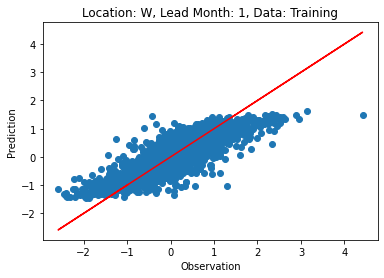

Training Model 4
Epoch [20/400], Avg Loss: 4.9464,  Val MSE: 0.5736
Epoch [40/400], Avg Loss: 1.1135,  Val MSE: 0.5090
Epoch [60/400], Avg Loss: 0.7192,  Val MSE: 0.4730
Epoch [80/400], Avg Loss: 0.6365,  Val MSE: 0.4624
Epoch [100/400], Avg Loss: 0.5946,  Val MSE: 0.4655
Epoch [120/400], Avg Loss: 0.5667,  Val MSE: 0.4713
Epoch [140/400], Avg Loss: 0.5488,  Val MSE: 0.4766
Epoch [160/400], Avg Loss: 0.5350,  Val MSE: 0.4806
Epoch [180/400], Avg Loss: 0.5245,  Val MSE: 0.4847
Epoch [200/400], Avg Loss: 0.5154,  Val MSE: 0.4888
Epoch [220/400], Avg Loss: 0.5080,  Val MSE: 0.4925
Epoch [240/400], Avg Loss: 0.5027,  Val MSE: 0.4952
Epoch [260/400], Avg Loss: 0.4986,  Val MSE: 0.4977
Epoch [280/400], Avg Loss: 0.4944,  Val MSE: 0.4999
Epoch [300/400], Avg Loss: 0.4897,  Val MSE: 0.5023
Epoch [320/400], Avg Loss: 0.4846,  Val MSE: 0.5044
Epoch [340/400], Avg Loss: 0.4805,  Val MSE: 0.5064
Epoch [360/400], Avg Loss: 0.4764,  Val MSE: 0.5083
Epoch [380/400], Avg Loss: 0.4736,  Val MSE: 0.5100

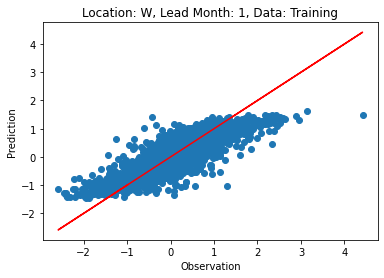

Training Model 5
Epoch [20/400], Avg Loss: 4.9896,  Val MSE: 0.5758
Epoch [40/400], Avg Loss: 1.1368,  Val MSE: 0.5190
Epoch [60/400], Avg Loss: 0.7175,  Val MSE: 0.4787
Epoch [80/400], Avg Loss: 0.6184,  Val MSE: 0.4696
Epoch [100/400], Avg Loss: 0.5746,  Val MSE: 0.4742
Epoch [120/400], Avg Loss: 0.5474,  Val MSE: 0.4794
Epoch [140/400], Avg Loss: 0.5302,  Val MSE: 0.4827
Epoch [160/400], Avg Loss: 0.5187,  Val MSE: 0.4858
Epoch [180/400], Avg Loss: 0.5112,  Val MSE: 0.4884
Epoch [200/400], Avg Loss: 0.5057,  Val MSE: 0.4907
Epoch [220/400], Avg Loss: 0.5017,  Val MSE: 0.4932
Epoch [240/400], Avg Loss: 0.4985,  Val MSE: 0.4953
Epoch [260/400], Avg Loss: 0.4953,  Val MSE: 0.4978
Epoch [280/400], Avg Loss: 0.4923,  Val MSE: 0.5003
Epoch [300/400], Avg Loss: 0.4890,  Val MSE: 0.5026
Epoch [320/400], Avg Loss: 0.4851,  Val MSE: 0.5048
Epoch [340/400], Avg Loss: 0.4809,  Val MSE: 0.5065
Epoch [360/400], Avg Loss: 0.4773,  Val MSE: 0.5082
Epoch [380/400], Avg Loss: 0.4738,  Val MSE: 0.5099

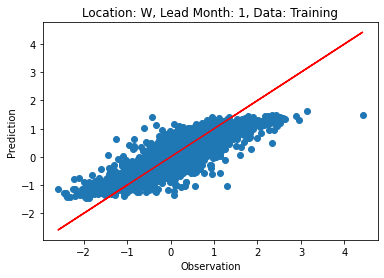

Location: W
Persistence MSE: 0.4578
Test MSE: 0.5109
Persist CSI: 0.4607
Persist CSI 80: 0.5541
Test CSI: 0.2500
Test CSI 80: 0.4789


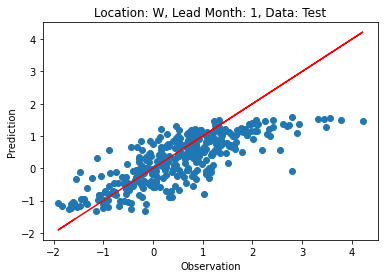

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.71359485
Training Model 1
Epoch [20/400], Avg Loss: 4.8810,  Val MSE: 0.3531
Epoch [40/400], Avg Loss: 1.0161,  Val MSE: 0.3181
Epoch [60/400], Avg Loss: 0.6451,  Val MSE: 0.3072
Epoch [80/400], Avg Loss: 0.5686,  Val MSE: 0.2998
Epoch [100/400], Avg Loss: 0.5293,  Val MSE: 0.2980
Epoch [120/400], Avg Loss: 0.5050,  Val MSE: 0.3000
Epoch [140/400], Avg Loss: 0.4883,  Val MSE: 0.3030
Epoch [160/400], Avg Loss: 0.4748,  Val MSE: 0.3055
Epoch [180/400], Avg Loss: 0.4650,  Val MSE: 0.3077
Epoch [200/400], Avg Loss: 0.4557,  Val MSE: 0.3097
Epoch [220/400], Avg Loss: 0.4467,  Val MSE: 0.3113
Epoch [240/400], Avg Loss: 0.4391,  Val MSE: 0.3124
Epoch [260/400], Avg Loss: 0.4329,  Val MSE: 0.3132
Epoch [280/400], Avg Loss: 0.4296,  Val MSE: 0.3136
Epoch [300/400], Avg Loss: 0.4281,  Val MSE: 0.3140
Epoch [320/400], Avg Loss: 0.4271,  Val MSE: 0.3147
Epoch [340/400], Avg Loss: 0.4261,  Val MSE: 0.3155
Epoch [360/400], Avg Loss: 0.4243,  Va

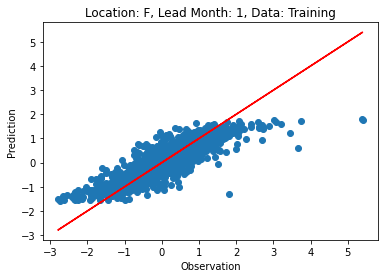

Training Model 2
Epoch [20/400], Avg Loss: 4.8558,  Val MSE: 0.3495
Epoch [40/400], Avg Loss: 1.0624,  Val MSE: 0.3195
Epoch [60/400], Avg Loss: 0.6813,  Val MSE: 0.3093
Epoch [80/400], Avg Loss: 0.5896,  Val MSE: 0.3011
Epoch [100/400], Avg Loss: 0.5461,  Val MSE: 0.2970
Epoch [120/400], Avg Loss: 0.5254,  Val MSE: 0.2975
Epoch [140/400], Avg Loss: 0.5087,  Val MSE: 0.2996
Epoch [160/400], Avg Loss: 0.4949,  Val MSE: 0.3021
Epoch [180/400], Avg Loss: 0.4826,  Val MSE: 0.3042
Epoch [200/400], Avg Loss: 0.4726,  Val MSE: 0.3056
Epoch [220/400], Avg Loss: 0.4655,  Val MSE: 0.3067
Epoch [240/400], Avg Loss: 0.4612,  Val MSE: 0.3075
Epoch [260/400], Avg Loss: 0.4574,  Val MSE: 0.3080
Epoch [280/400], Avg Loss: 0.4535,  Val MSE: 0.3090
Epoch [300/400], Avg Loss: 0.4504,  Val MSE: 0.3099
Epoch [320/400], Avg Loss: 0.4475,  Val MSE: 0.3107
Epoch [340/400], Avg Loss: 0.4452,  Val MSE: 0.3114
Epoch [360/400], Avg Loss: 0.4427,  Val MSE: 0.3124
Epoch [380/400], Avg Loss: 0.4408,  Val MSE: 0.3131

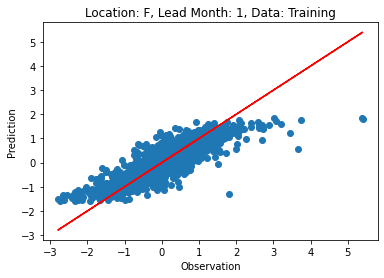

Training Model 3
Epoch [20/400], Avg Loss: 4.8256,  Val MSE: 0.3510
Epoch [40/400], Avg Loss: 1.0584,  Val MSE: 0.3224
Epoch [60/400], Avg Loss: 0.6670,  Val MSE: 0.3090
Epoch [80/400], Avg Loss: 0.5878,  Val MSE: 0.3014
Epoch [100/400], Avg Loss: 0.5421,  Val MSE: 0.2979
Epoch [120/400], Avg Loss: 0.5109,  Val MSE: 0.2976
Epoch [140/400], Avg Loss: 0.4918,  Val MSE: 0.3006
Epoch [160/400], Avg Loss: 0.4785,  Val MSE: 0.3043
Epoch [180/400], Avg Loss: 0.4679,  Val MSE: 0.3067
Epoch [200/400], Avg Loss: 0.4600,  Val MSE: 0.3083
Epoch [220/400], Avg Loss: 0.4531,  Val MSE: 0.3097
Epoch [240/400], Avg Loss: 0.4467,  Val MSE: 0.3109
Epoch [260/400], Avg Loss: 0.4422,  Val MSE: 0.3120
Epoch [280/400], Avg Loss: 0.4389,  Val MSE: 0.3128
Epoch [300/400], Avg Loss: 0.4353,  Val MSE: 0.3136
Epoch [320/400], Avg Loss: 0.4329,  Val MSE: 0.3141
Epoch [340/400], Avg Loss: 0.4313,  Val MSE: 0.3146
Epoch [360/400], Avg Loss: 0.4292,  Val MSE: 0.3149
Epoch [380/400], Avg Loss: 0.4267,  Val MSE: 0.3154

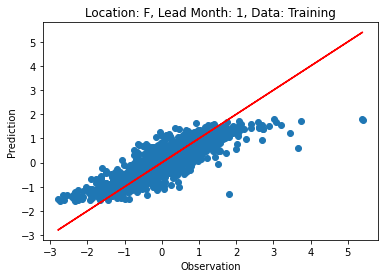

Training Model 4
Epoch [20/400], Avg Loss: 4.8424,  Val MSE: 0.3616
Epoch [40/400], Avg Loss: 1.0472,  Val MSE: 0.3201
Epoch [60/400], Avg Loss: 0.6689,  Val MSE: 0.3070
Epoch [80/400], Avg Loss: 0.5805,  Val MSE: 0.2997
Epoch [100/400], Avg Loss: 0.5341,  Val MSE: 0.2988
Epoch [120/400], Avg Loss: 0.5065,  Val MSE: 0.3013
Epoch [140/400], Avg Loss: 0.4886,  Val MSE: 0.3039
Epoch [160/400], Avg Loss: 0.4751,  Val MSE: 0.3057
Epoch [180/400], Avg Loss: 0.4653,  Val MSE: 0.3072
Epoch [200/400], Avg Loss: 0.4571,  Val MSE: 0.3084
Epoch [220/400], Avg Loss: 0.4501,  Val MSE: 0.3096
Epoch [240/400], Avg Loss: 0.4441,  Val MSE: 0.3106
Epoch [260/400], Avg Loss: 0.4387,  Val MSE: 0.3114
Epoch [280/400], Avg Loss: 0.4339,  Val MSE: 0.3120
Epoch [300/400], Avg Loss: 0.4303,  Val MSE: 0.3124
Epoch [320/400], Avg Loss: 0.4273,  Val MSE: 0.3129
Epoch [340/400], Avg Loss: 0.4250,  Val MSE: 0.3129
Epoch [360/400], Avg Loss: 0.4233,  Val MSE: 0.3132
Epoch [380/400], Avg Loss: 0.4223,  Val MSE: 0.3133

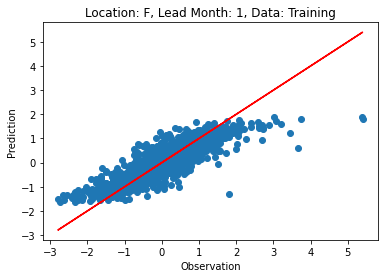

Training Model 5
Epoch [20/400], Avg Loss: 4.9115,  Val MSE: 0.3445
Epoch [40/400], Avg Loss: 1.0781,  Val MSE: 0.3221
Epoch [60/400], Avg Loss: 0.6787,  Val MSE: 0.3073
Epoch [80/400], Avg Loss: 0.5924,  Val MSE: 0.2998
Epoch [100/400], Avg Loss: 0.5475,  Val MSE: 0.2980
Epoch [120/400], Avg Loss: 0.5142,  Val MSE: 0.2990
Epoch [140/400], Avg Loss: 0.4930,  Val MSE: 0.3015
Epoch [160/400], Avg Loss: 0.4824,  Val MSE: 0.3039
Epoch [180/400], Avg Loss: 0.4755,  Val MSE: 0.3057
Epoch [200/400], Avg Loss: 0.4700,  Val MSE: 0.3075
Epoch [220/400], Avg Loss: 0.4642,  Val MSE: 0.3091
Epoch [240/400], Avg Loss: 0.4586,  Val MSE: 0.3103
Epoch [260/400], Avg Loss: 0.4537,  Val MSE: 0.3114
Epoch [280/400], Avg Loss: 0.4491,  Val MSE: 0.3124
Epoch [300/400], Avg Loss: 0.4448,  Val MSE: 0.3133
Epoch [320/400], Avg Loss: 0.4407,  Val MSE: 0.3140
Epoch [340/400], Avg Loss: 0.4369,  Val MSE: 0.3144
Epoch [360/400], Avg Loss: 0.4340,  Val MSE: 0.3148
Epoch [380/400], Avg Loss: 0.4317,  Val MSE: 0.3155

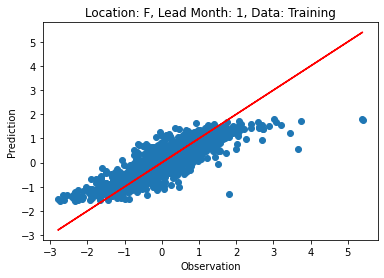

Location: F
Persistence MSE: 0.3402
Test MSE: 0.3150
Persist CSI: 0.4699
Persist CSI 80: 0.5500
Test CSI: 0.3611
Test CSI 80: 0.5752


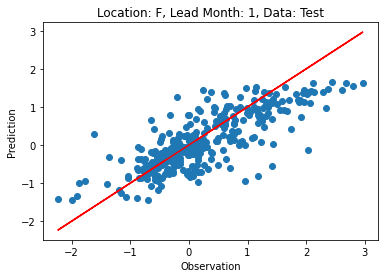

Location: CI
90th Threshold: 1.3186705
80th Threshold: 0.7413428
Training Model 1
Epoch [20/400], Avg Loss: 4.8124,  Val MSE: 0.3304
Epoch [40/400], Avg Loss: 1.0491,  Val MSE: 0.2805
Epoch [60/400], Avg Loss: 0.6186,  Val MSE: 0.2645
Epoch [80/400], Avg Loss: 0.5313,  Val MSE: 0.2596
Epoch [100/400], Avg Loss: 0.4901,  Val MSE: 0.2567
Epoch [120/400], Avg Loss: 0.4675,  Val MSE: 0.2551
Epoch [140/400], Avg Loss: 0.4526,  Val MSE: 0.2546
Epoch [160/400], Avg Loss: 0.4416,  Val MSE: 0.2547
Epoch [180/400], Avg Loss: 0.4329,  Val MSE: 0.2548
Epoch [200/400], Avg Loss: 0.4259,  Val MSE: 0.2552
Epoch [220/400], Avg Loss: 0.4191,  Val MSE: 0.2555
Epoch [240/400], Avg Loss: 0.4136,  Val MSE: 0.2558
Epoch [260/400], Avg Loss: 0.4102,  Val MSE: 0.2563
Epoch [280/400], Avg Loss: 0.4075,  Val MSE: 0.2566
Epoch [300/400], Avg Loss: 0.4052,  Val MSE: 0.2571
Epoch [320/400], Avg Loss: 0.4034,  Val MSE: 0.2578
Epoch [340/400], Avg Loss: 0.4014,  Val MSE: 0.2582
Epoch [360/400], Avg Loss: 0.3994,  Va

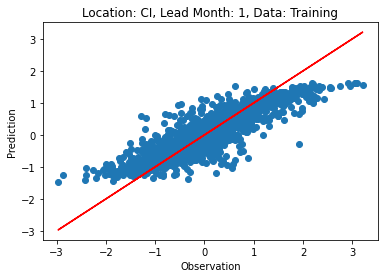

Training Model 2
Epoch [20/400], Avg Loss: 4.8363,  Val MSE: 0.3274
Epoch [40/400], Avg Loss: 1.0344,  Val MSE: 0.2825
Epoch [60/400], Avg Loss: 0.6268,  Val MSE: 0.2646
Epoch [80/400], Avg Loss: 0.5355,  Val MSE: 0.2610
Epoch [100/400], Avg Loss: 0.4911,  Val MSE: 0.2584
Epoch [120/400], Avg Loss: 0.4661,  Val MSE: 0.2566
Epoch [140/400], Avg Loss: 0.4539,  Val MSE: 0.2556
Epoch [160/400], Avg Loss: 0.4449,  Val MSE: 0.2556
Epoch [180/400], Avg Loss: 0.4371,  Val MSE: 0.2559
Epoch [200/400], Avg Loss: 0.4293,  Val MSE: 0.2566
Epoch [220/400], Avg Loss: 0.4215,  Val MSE: 0.2571
Epoch [240/400], Avg Loss: 0.4143,  Val MSE: 0.2576
Epoch [260/400], Avg Loss: 0.4081,  Val MSE: 0.2580
Epoch [280/400], Avg Loss: 0.4025,  Val MSE: 0.2582
Epoch [300/400], Avg Loss: 0.3983,  Val MSE: 0.2584
Epoch [320/400], Avg Loss: 0.3953,  Val MSE: 0.2586
Epoch [340/400], Avg Loss: 0.3936,  Val MSE: 0.2588
Epoch [360/400], Avg Loss: 0.3926,  Val MSE: 0.2589
Epoch [380/400], Avg Loss: 0.3919,  Val MSE: 0.2592

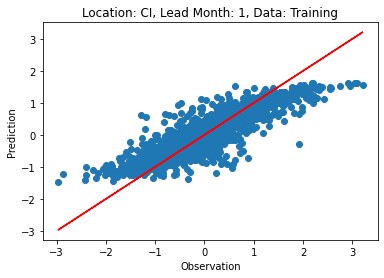

Training Model 3
Epoch [20/400], Avg Loss: 4.8063,  Val MSE: 0.3390
Epoch [40/400], Avg Loss: 0.9881,  Val MSE: 0.2782
Epoch [60/400], Avg Loss: 0.5867,  Val MSE: 0.2646
Epoch [80/400], Avg Loss: 0.5146,  Val MSE: 0.2603
Epoch [100/400], Avg Loss: 0.4818,  Val MSE: 0.2578
Epoch [120/400], Avg Loss: 0.4641,  Val MSE: 0.2562
Epoch [140/400], Avg Loss: 0.4523,  Val MSE: 0.2556
Epoch [160/400], Avg Loss: 0.4428,  Val MSE: 0.2557
Epoch [180/400], Avg Loss: 0.4342,  Val MSE: 0.2561
Epoch [200/400], Avg Loss: 0.4275,  Val MSE: 0.2564
Epoch [220/400], Avg Loss: 0.4215,  Val MSE: 0.2563
Epoch [240/400], Avg Loss: 0.4167,  Val MSE: 0.2564
Epoch [260/400], Avg Loss: 0.4128,  Val MSE: 0.2567
Epoch [280/400], Avg Loss: 0.4098,  Val MSE: 0.2571
Epoch [300/400], Avg Loss: 0.4067,  Val MSE: 0.2575
Epoch [320/400], Avg Loss: 0.4040,  Val MSE: 0.2578
Epoch [340/400], Avg Loss: 0.4013,  Val MSE: 0.2582
Epoch [360/400], Avg Loss: 0.3989,  Val MSE: 0.2586
Epoch [380/400], Avg Loss: 0.3968,  Val MSE: 0.2588

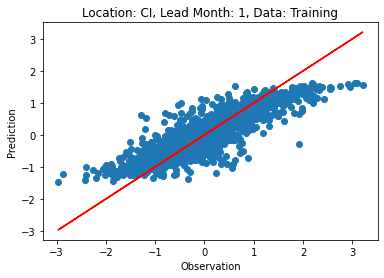

Training Model 4
Epoch [20/400], Avg Loss: 4.8485,  Val MSE: 0.3282
Epoch [40/400], Avg Loss: 1.0675,  Val MSE: 0.2822
Epoch [60/400], Avg Loss: 0.6472,  Val MSE: 0.2645
Epoch [80/400], Avg Loss: 0.5567,  Val MSE: 0.2604
Epoch [100/400], Avg Loss: 0.5136,  Val MSE: 0.2575
Epoch [120/400], Avg Loss: 0.4861,  Val MSE: 0.2559
Epoch [140/400], Avg Loss: 0.4668,  Val MSE: 0.2553
Epoch [160/400], Avg Loss: 0.4536,  Val MSE: 0.2552
Epoch [180/400], Avg Loss: 0.4432,  Val MSE: 0.2555
Epoch [200/400], Avg Loss: 0.4357,  Val MSE: 0.2560
Epoch [220/400], Avg Loss: 0.4298,  Val MSE: 0.2566
Epoch [240/400], Avg Loss: 0.4242,  Val MSE: 0.2570
Epoch [260/400], Avg Loss: 0.4182,  Val MSE: 0.2575
Epoch [280/400], Avg Loss: 0.4128,  Val MSE: 0.2581
Epoch [300/400], Avg Loss: 0.4073,  Val MSE: 0.2584
Epoch [320/400], Avg Loss: 0.4029,  Val MSE: 0.2585
Epoch [340/400], Avg Loss: 0.3995,  Val MSE: 0.2585
Epoch [360/400], Avg Loss: 0.3966,  Val MSE: 0.2586
Epoch [380/400], Avg Loss: 0.3934,  Val MSE: 0.2588

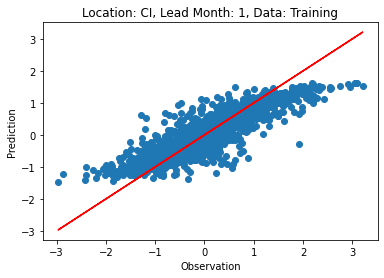

Training Model 5
Epoch [20/400], Avg Loss: 4.8482,  Val MSE: 0.3261
Epoch [40/400], Avg Loss: 1.0329,  Val MSE: 0.2797
Epoch [60/400], Avg Loss: 0.6291,  Val MSE: 0.2653
Epoch [80/400], Avg Loss: 0.5411,  Val MSE: 0.2611
Epoch [100/400], Avg Loss: 0.4967,  Val MSE: 0.2585
Epoch [120/400], Avg Loss: 0.4701,  Val MSE: 0.2570
Epoch [140/400], Avg Loss: 0.4524,  Val MSE: 0.2563
Epoch [160/400], Avg Loss: 0.4397,  Val MSE: 0.2565
Epoch [180/400], Avg Loss: 0.4312,  Val MSE: 0.2565
Epoch [200/400], Avg Loss: 0.4236,  Val MSE: 0.2569
Epoch [220/400], Avg Loss: 0.4176,  Val MSE: 0.2574
Epoch [240/400], Avg Loss: 0.4127,  Val MSE: 0.2578
Epoch [260/400], Avg Loss: 0.4087,  Val MSE: 0.2583
Epoch [280/400], Avg Loss: 0.4047,  Val MSE: 0.2586
Epoch [300/400], Avg Loss: 0.4009,  Val MSE: 0.2588
Epoch [320/400], Avg Loss: 0.3973,  Val MSE: 0.2591
Epoch [340/400], Avg Loss: 0.3939,  Val MSE: 0.2593
Epoch [360/400], Avg Loss: 0.3910,  Val MSE: 0.2594
Epoch [380/400], Avg Loss: 0.3887,  Val MSE: 0.2597

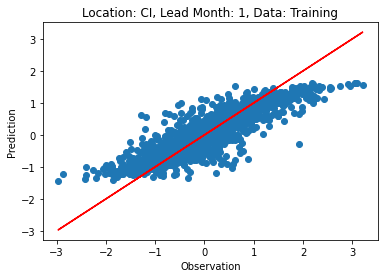

Location: CI
Persistence MSE: 0.3095
Test MSE: 0.2592
Persist CSI: 0.2174
Persist CSI 80: 0.4211
Test CSI: 0.1765
Test CSI 80: 0.3824


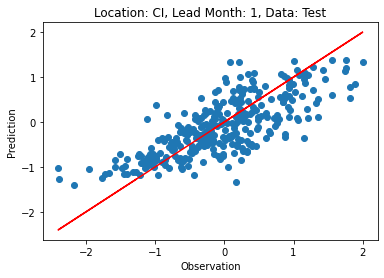

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.71098405
Training Model 1
Epoch [20/400], Avg Loss: 4.7535,  Val MSE: 0.2891
Epoch [40/400], Avg Loss: 0.9840,  Val MSE: 0.2617
Epoch [60/400], Avg Loss: 0.5949,  Val MSE: 0.2435
Epoch [80/400], Avg Loss: 0.5222,  Val MSE: 0.2371
Epoch [100/400], Avg Loss: 0.4879,  Val MSE: 0.2347
Epoch [120/400], Avg Loss: 0.4654,  Val MSE: 0.2338
Epoch [140/400], Avg Loss: 0.4494,  Val MSE: 0.2336
Epoch [160/400], Avg Loss: 0.4383,  Val MSE: 0.2332
Epoch [180/400], Avg Loss: 0.4292,  Val MSE: 0.2331
Epoch [200/400], Avg Loss: 0.4217,  Val MSE: 0.2330
Epoch [220/400], Avg Loss: 0.4158,  Val MSE: 0.2329
Epoch [240/400], Avg Loss: 0.4109,  Val MSE: 0.2330
Epoch [260/400], Avg Loss: 0.4062,  Val MSE: 0.2332
Epoch [280/400], Avg Loss: 0.4025,  Val MSE: 0.2332
Epoch [300/400], Avg Loss: 0.3996,  Val MSE: 0.2335
Epoch [320/400], Avg Loss: 0.3977,  Val MSE: 0.2336
Epoch [340/400], Avg Loss: 0.3963,  Val MSE: 0.2337
Epoch [360/400], Avg Loss: 0.3952,  V

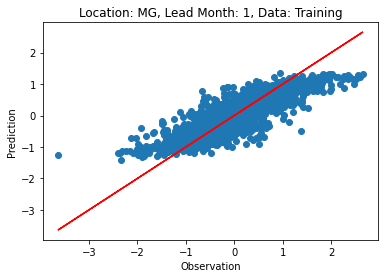

Training Model 2
Epoch [20/400], Avg Loss: 4.8153,  Val MSE: 0.2804
Epoch [40/400], Avg Loss: 0.9950,  Val MSE: 0.2600
Epoch [60/400], Avg Loss: 0.6142,  Val MSE: 0.2441
Epoch [80/400], Avg Loss: 0.5280,  Val MSE: 0.2377
Epoch [100/400], Avg Loss: 0.4852,  Val MSE: 0.2351
Epoch [120/400], Avg Loss: 0.4598,  Val MSE: 0.2339
Epoch [140/400], Avg Loss: 0.4433,  Val MSE: 0.2334
Epoch [160/400], Avg Loss: 0.4320,  Val MSE: 0.2335
Epoch [180/400], Avg Loss: 0.4223,  Val MSE: 0.2338
Epoch [200/400], Avg Loss: 0.4144,  Val MSE: 0.2339
Epoch [220/400], Avg Loss: 0.4072,  Val MSE: 0.2341
Epoch [240/400], Avg Loss: 0.4011,  Val MSE: 0.2343
Epoch [260/400], Avg Loss: 0.3952,  Val MSE: 0.2344
Epoch [280/400], Avg Loss: 0.3903,  Val MSE: 0.2345
Epoch [300/400], Avg Loss: 0.3866,  Val MSE: 0.2346
Epoch [320/400], Avg Loss: 0.3844,  Val MSE: 0.2347
Epoch [340/400], Avg Loss: 0.3823,  Val MSE: 0.2347
Epoch [360/400], Avg Loss: 0.3798,  Val MSE: 0.2348
Epoch [380/400], Avg Loss: 0.3771,  Val MSE: 0.2349

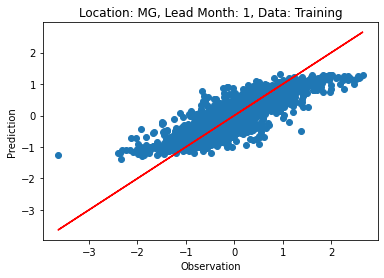

Training Model 3
Epoch [20/400], Avg Loss: 4.7796,  Val MSE: 0.2875
Epoch [40/400], Avg Loss: 1.0172,  Val MSE: 0.2600
Epoch [60/400], Avg Loss: 0.6231,  Val MSE: 0.2448
Epoch [80/400], Avg Loss: 0.5343,  Val MSE: 0.2379
Epoch [100/400], Avg Loss: 0.4968,  Val MSE: 0.2351
Epoch [120/400], Avg Loss: 0.4750,  Val MSE: 0.2337
Epoch [140/400], Avg Loss: 0.4579,  Val MSE: 0.2330
Epoch [160/400], Avg Loss: 0.4460,  Val MSE: 0.2327
Epoch [180/400], Avg Loss: 0.4361,  Val MSE: 0.2326
Epoch [200/400], Avg Loss: 0.4283,  Val MSE: 0.2328
Epoch [220/400], Avg Loss: 0.4213,  Val MSE: 0.2331
Epoch [240/400], Avg Loss: 0.4152,  Val MSE: 0.2333
Epoch [260/400], Avg Loss: 0.4104,  Val MSE: 0.2334
Epoch [280/400], Avg Loss: 0.4060,  Val MSE: 0.2336
Epoch [300/400], Avg Loss: 0.4016,  Val MSE: 0.2337
Epoch [320/400], Avg Loss: 0.3973,  Val MSE: 0.2340
Epoch [340/400], Avg Loss: 0.3929,  Val MSE: 0.2342
Epoch [360/400], Avg Loss: 0.3897,  Val MSE: 0.2342
Epoch [380/400], Avg Loss: 0.3868,  Val MSE: 0.2343

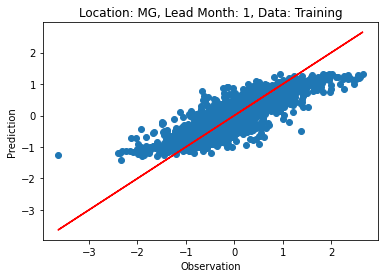

Training Model 4
Epoch [20/400], Avg Loss: 4.7903,  Val MSE: 0.2939
Epoch [40/400], Avg Loss: 1.0316,  Val MSE: 0.2674
Epoch [60/400], Avg Loss: 0.6282,  Val MSE: 0.2471
Epoch [80/400], Avg Loss: 0.5318,  Val MSE: 0.2389
Epoch [100/400], Avg Loss: 0.4851,  Val MSE: 0.2360
Epoch [120/400], Avg Loss: 0.4557,  Val MSE: 0.2344
Epoch [140/400], Avg Loss: 0.4354,  Val MSE: 0.2335
Epoch [160/400], Avg Loss: 0.4222,  Val MSE: 0.2333
Epoch [180/400], Avg Loss: 0.4140,  Val MSE: 0.2333
Epoch [200/400], Avg Loss: 0.4090,  Val MSE: 0.2335
Epoch [220/400], Avg Loss: 0.4051,  Val MSE: 0.2338
Epoch [240/400], Avg Loss: 0.4014,  Val MSE: 0.2341
Epoch [260/400], Avg Loss: 0.3974,  Val MSE: 0.2344
Epoch [280/400], Avg Loss: 0.3938,  Val MSE: 0.2345
Epoch [300/400], Avg Loss: 0.3909,  Val MSE: 0.2346
Epoch [320/400], Avg Loss: 0.3877,  Val MSE: 0.2348
Epoch [340/400], Avg Loss: 0.3848,  Val MSE: 0.2350
Epoch [360/400], Avg Loss: 0.3824,  Val MSE: 0.2350
Epoch [380/400], Avg Loss: 0.3808,  Val MSE: 0.2351

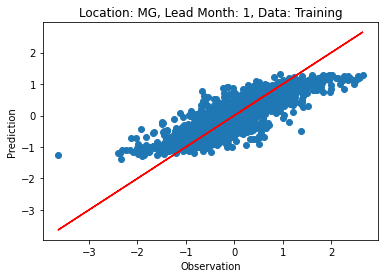

Training Model 5
Epoch [20/400], Avg Loss: 4.8066,  Val MSE: 0.2868
Epoch [40/400], Avg Loss: 0.9825,  Val MSE: 0.2599
Epoch [60/400], Avg Loss: 0.5793,  Val MSE: 0.2441
Epoch [80/400], Avg Loss: 0.5001,  Val MSE: 0.2374
Epoch [100/400], Avg Loss: 0.4637,  Val MSE: 0.2351
Epoch [120/400], Avg Loss: 0.4422,  Val MSE: 0.2336
Epoch [140/400], Avg Loss: 0.4269,  Val MSE: 0.2334
Epoch [160/400], Avg Loss: 0.4151,  Val MSE: 0.2334
Epoch [180/400], Avg Loss: 0.4070,  Val MSE: 0.2336
Epoch [200/400], Avg Loss: 0.4008,  Val MSE: 0.2341
Epoch [220/400], Avg Loss: 0.3972,  Val MSE: 0.2345
Epoch [240/400], Avg Loss: 0.3947,  Val MSE: 0.2348
Epoch [260/400], Avg Loss: 0.3923,  Val MSE: 0.2351
Epoch [280/400], Avg Loss: 0.3904,  Val MSE: 0.2354
Epoch [300/400], Avg Loss: 0.3888,  Val MSE: 0.2357
Epoch [320/400], Avg Loss: 0.3871,  Val MSE: 0.2359
Epoch [340/400], Avg Loss: 0.3854,  Val MSE: 0.2361
Epoch [360/400], Avg Loss: 0.3842,  Val MSE: 0.2361
Epoch [380/400], Avg Loss: 0.3832,  Val MSE: 0.2363

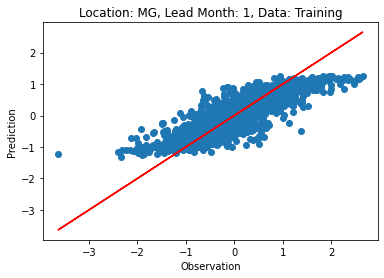

Location: MG
Persistence MSE: 0.2668
Test MSE: 0.2349
Persist CSI: 0.4386
Persist CSI 80: 0.3750
Test CSI: 0.2045
Test CSI 80: 0.3832


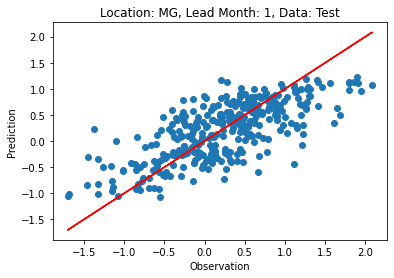

In [ ]:
net_class = 'FCN'
num_layer = 3
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [1]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1

    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        all_preds = []
        all_time = []

        print('Location:', loc.upper())
        
        for model_num in range(5):

            y = nz[loc]
            y_all = y

            x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
            y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
            x_all = np.swapaxes(x_all, 1, 2)
            x_all_flat = np.array(x_all).reshape(-1, num_var*6)
            y_all = np.array(y_all)

            num_train = int(len(x_all) * train_split)
            x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
            x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

            # The threshold for defining outliers using the 90th percentile
            y_train_sorted = np.sort(y_train.numpy().squeeze())
            threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
            threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
            if model_num == 0:
                print('90th Threshold:', threshold)
                print('80th Threshold:', threshold_low)

            model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            criterion = nn.MSELoss()
            criterion_test = nn.MSELoss()

            print('Training Model {}'.format(model_num+1))

            # Start time
            start = time.time()

            for epoch in range(num_train_epochs):
                epoch_loss = 0
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    y_pred = model(x_batch)

                    loss = criterion(y_pred, y_batch)
                    
                    # Elastic Net Reg
                    # l1_ratio = 0 is the L2 reg.
                    # l1_ratio = 1 is the L1 reg.
                    l1_reg = 0.0
                    l2_reg = 0.0
                    for param in model.parameters():
                        l1_reg += torch.norm(param, 1)
                        l2_reg += torch.norm(param, 2)
                    loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                    optim.zero_grad()
                    loss.backward()
                    optim.step()
                    if (epoch+1) % 20 == 0:
                        #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                        epoch_loss += loss.item()
                with torch.no_grad():
                    y_pred = model(x_test)
                    val_mse = criterion_test(y_pred, y_test)     
                if (epoch+1) % 20 == 0:
                    epoch_loss /= len(x_train) // batch_size   
                    print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

            # End time
            stop = time.time()
            training_time = float(stop - start)
            all_time.append(training_time)

            with torch.no_grad():
                y_pred = model(x_train)

            plt.scatter(y_train, y_pred)
            x = y_train
            y = y_train
            plt.plot(x, y, color='red')
            plt.xlabel('Observation')
            plt.ylabel('Prediction')
            plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
            plt.show()

            with torch.no_grad():
                persist_mse = criterion_test(y_test[:-lead_time], y_test[lead_time:])
                y_pred = model(x_test)
                all_preds.append(y_pred.numpy())
        
        sum_preds = np.add.reduce(all_preds)
        avg_preds = sum_preds / (model_num + 1)

        print('Location:', loc.upper())

        test_mse = criterion_test(torch.tensor(avg_preds), y_test)
        print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
        print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in avg_preds]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in avg_preds]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, avg_preds)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(sum(all_time) / len(all_time), 4))

In [ ]:
all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
display(test_results)

mean_row = pd.DataFrame(test_results.select_dtypes(include='number').mean(), columns=['Mean']).T
mean_row = mean_row.round(4)
mean_test_results = mean_row.copy()
display(mean_test_results)

Location  Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
7       BOP           0.1690       0.3846          0.4717    0.1528    0.0357   
6        BP           0.4665       0.1875          0.2949    0.3831    0.1600   
10       CI           0.3095       0.2174          0.4211    0.2592    0.1765   
3        CR           0.2468       0.3286          0.4959    0.2327    0.1373   
1        CS           0.1247       0.4043          0.5327    0.1235    0.3143   
9         F           0.3402       0.4699          0.5500    0.3150    0.3611   
11       MG           0.2668       0.4386          0.3750    0.2349    0.2045   
4        OP           0.3155       0.3478          0.4198    0.2776    0.4103   
0         R           0.2377       0.5158          0.6259    0.2275    0.2055   
2        SI           0.2440       0.4545          0.4646    0.2281    0.4474   
5         T           0.3926       0.4595          0.5541    0.3995    0.3735   
8         W           0.4578       0.4607          0.5541    0.5109    0.2500   

    Test CSI 80  Training Time  
7        0.4211        18.3887  
6        0.2899        18.3435  
10       0.3824        18.6351  
3        0.4224        18.6882  
1        0.4737        18.4263  
9        0.5752        18.3620  
11       0.3832        18.5357  
4        0.4430        20.8010  
0        0.5859        18.6367  
2        0.4646        18.3489  
5        0.5782        19.4791  
8        0.4789        18.6513

Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
Mean           0.2976       0.3891            0.48    0.2787    0.2563   

      Test CSI 80  Training Time  
Mean       0.4582        18.7747

Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7188332
Training Model 1
Epoch [20/400], Avg Loss: 4.9351,  Val MSE: 0.4531
Epoch [40/400], Avg Loss: 1.1044,  Val MSE: 0.4489
Epoch [60/400], Avg Loss: 0.6972,  Val MSE: 0.4175
Epoch [80/400], Avg Loss: 0.6307,  Val MSE: 0.4248
Epoch [100/400], Avg Loss: 0.5989,  Val MSE: 0.4336
Epoch [120/400], Avg Loss: 0.5776,  Val MSE: 0.4405
Epoch [140/400], Avg Loss: 0.5632,  Val MSE: 0.4451
Epoch [160/400], Avg Loss: 0.5552,  Val MSE: 0.4475
Epoch [180/400], Avg Loss: 0.5486,  Val MSE: 0.4494
Epoch [200/400], Avg Loss: 0.5433,  Val MSE: 0.4515
Epoch [220/400], Avg Loss: 0.5387,  Val MSE: 0.4537
Epoch [240/400], Avg Loss: 0.5350,  Val MSE: 0.4562
Epoch [260/400], Avg Loss: 0.5323,  Val MSE: 0.4584
Epoch [280/400], Avg Loss: 0.5302,  Val MSE: 0.4600
Epoch [300/400], Avg Loss: 0.5281,  Val MSE: 0.4611
Epoch [320/400], Avg Loss: 0.5270,  Val MSE: 0.4621
Epoch [340/400], Avg Loss: 0.5258,  Val MSE: 0.4633
Epoch [360/400], Avg Loss: 0.5244,  Val

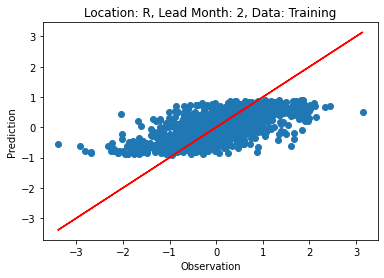

Training Model 2
Epoch [20/400], Avg Loss: 4.8800,  Val MSE: 0.4469
Epoch [40/400], Avg Loss: 1.1110,  Val MSE: 0.4444
Epoch [60/400], Avg Loss: 0.7194,  Val MSE: 0.4176
Epoch [80/400], Avg Loss: 0.6599,  Val MSE: 0.4221
Epoch [100/400], Avg Loss: 0.6266,  Val MSE: 0.4303
Epoch [120/400], Avg Loss: 0.6008,  Val MSE: 0.4390
Epoch [140/400], Avg Loss: 0.5835,  Val MSE: 0.4464
Epoch [160/400], Avg Loss: 0.5718,  Val MSE: 0.4515
Epoch [180/400], Avg Loss: 0.5635,  Val MSE: 0.4542
Epoch [200/400], Avg Loss: 0.5581,  Val MSE: 0.4560
Epoch [220/400], Avg Loss: 0.5533,  Val MSE: 0.4575
Epoch [240/400], Avg Loss: 0.5499,  Val MSE: 0.4597
Epoch [260/400], Avg Loss: 0.5475,  Val MSE: 0.4618
Epoch [280/400], Avg Loss: 0.5455,  Val MSE: 0.4635
Epoch [300/400], Avg Loss: 0.5432,  Val MSE: 0.4651
Epoch [320/400], Avg Loss: 0.5413,  Val MSE: 0.4666
Epoch [340/400], Avg Loss: 0.5391,  Val MSE: 0.4678
Epoch [360/400], Avg Loss: 0.5369,  Val MSE: 0.4687
Epoch [380/400], Avg Loss: 0.5358,  Val MSE: 0.4695

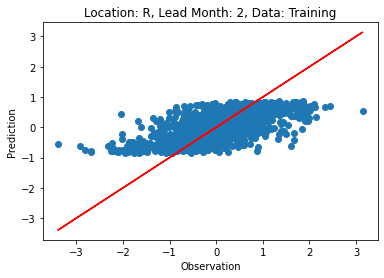

Training Model 3
Epoch [20/400], Avg Loss: 4.9215,  Val MSE: 0.4531
Epoch [40/400], Avg Loss: 1.1164,  Val MSE: 0.4486
Epoch [60/400], Avg Loss: 0.7229,  Val MSE: 0.4157
Epoch [80/400], Avg Loss: 0.6543,  Val MSE: 0.4205
Epoch [100/400], Avg Loss: 0.6194,  Val MSE: 0.4273
Epoch [120/400], Avg Loss: 0.6011,  Val MSE: 0.4324
Epoch [140/400], Avg Loss: 0.5907,  Val MSE: 0.4367
Epoch [160/400], Avg Loss: 0.5824,  Val MSE: 0.4391
Epoch [180/400], Avg Loss: 0.5755,  Val MSE: 0.4413
Epoch [200/400], Avg Loss: 0.5699,  Val MSE: 0.4431
Epoch [220/400], Avg Loss: 0.5645,  Val MSE: 0.4448
Epoch [240/400], Avg Loss: 0.5603,  Val MSE: 0.4465
Epoch [260/400], Avg Loss: 0.5559,  Val MSE: 0.4490
Epoch [280/400], Avg Loss: 0.5507,  Val MSE: 0.4514
Epoch [300/400], Avg Loss: 0.5461,  Val MSE: 0.4533
Epoch [320/400], Avg Loss: 0.5417,  Val MSE: 0.4550
Epoch [340/400], Avg Loss: 0.5379,  Val MSE: 0.4569
Epoch [360/400], Avg Loss: 0.5343,  Val MSE: 0.4593
Epoch [380/400], Avg Loss: 0.5312,  Val MSE: 0.4608

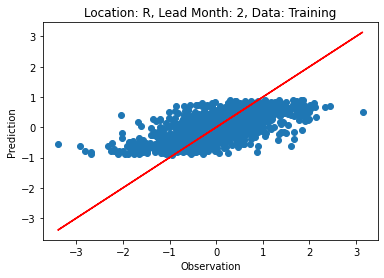

Training Model 4
Epoch [20/400], Avg Loss: 4.9498,  Val MSE: 0.4456
Epoch [40/400], Avg Loss: 1.0857,  Val MSE: 0.4406
Epoch [60/400], Avg Loss: 0.6886,  Val MSE: 0.4193
Epoch [80/400], Avg Loss: 0.6312,  Val MSE: 0.4294
Epoch [100/400], Avg Loss: 0.6051,  Val MSE: 0.4411
Epoch [120/400], Avg Loss: 0.5873,  Val MSE: 0.4476
Epoch [140/400], Avg Loss: 0.5767,  Val MSE: 0.4515
Epoch [160/400], Avg Loss: 0.5669,  Val MSE: 0.4545
Epoch [180/400], Avg Loss: 0.5582,  Val MSE: 0.4564
Epoch [200/400], Avg Loss: 0.5521,  Val MSE: 0.4594
Epoch [220/400], Avg Loss: 0.5477,  Val MSE: 0.4621
Epoch [240/400], Avg Loss: 0.5441,  Val MSE: 0.4641
Epoch [260/400], Avg Loss: 0.5407,  Val MSE: 0.4661
Epoch [280/400], Avg Loss: 0.5374,  Val MSE: 0.4676
Epoch [300/400], Avg Loss: 0.5345,  Val MSE: 0.4692
Epoch [320/400], Avg Loss: 0.5320,  Val MSE: 0.4704
Epoch [340/400], Avg Loss: 0.5298,  Val MSE: 0.4713
Epoch [360/400], Avg Loss: 0.5277,  Val MSE: 0.4719
Epoch [380/400], Avg Loss: 0.5260,  Val MSE: 0.4723

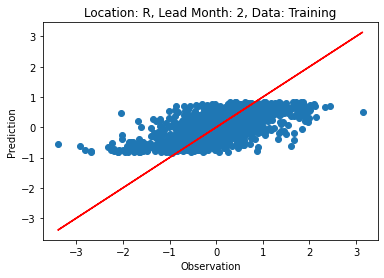

Training Model 5
Epoch [20/400], Avg Loss: 4.8745,  Val MSE: 0.4548
Epoch [40/400], Avg Loss: 1.0959,  Val MSE: 0.4470
Epoch [60/400], Avg Loss: 0.6964,  Val MSE: 0.4212
Epoch [80/400], Avg Loss: 0.6302,  Val MSE: 0.4310
Epoch [100/400], Avg Loss: 0.6035,  Val MSE: 0.4406
Epoch [120/400], Avg Loss: 0.5881,  Val MSE: 0.4469
Epoch [140/400], Avg Loss: 0.5769,  Val MSE: 0.4509
Epoch [160/400], Avg Loss: 0.5670,  Val MSE: 0.4541
Epoch [180/400], Avg Loss: 0.5591,  Val MSE: 0.4566
Epoch [200/400], Avg Loss: 0.5529,  Val MSE: 0.4597
Epoch [220/400], Avg Loss: 0.5460,  Val MSE: 0.4620
Epoch [240/400], Avg Loss: 0.5402,  Val MSE: 0.4640
Epoch [260/400], Avg Loss: 0.5357,  Val MSE: 0.4659
Epoch [280/400], Avg Loss: 0.5324,  Val MSE: 0.4674
Epoch [300/400], Avg Loss: 0.5291,  Val MSE: 0.4686
Epoch [320/400], Avg Loss: 0.5258,  Val MSE: 0.4697
Epoch [340/400], Avg Loss: 0.5228,  Val MSE: 0.4706
Epoch [360/400], Avg Loss: 0.5207,  Val MSE: 0.4712
Epoch [380/400], Avg Loss: 0.5190,  Val MSE: 0.4719

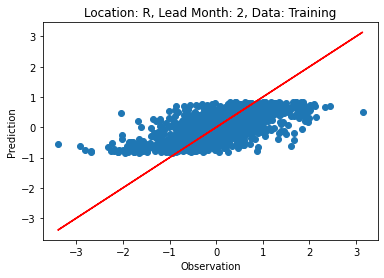

Location: R
Persistence MSE: 0.5123
Test MSE: 0.4687
Persist CSI: 0.3091
Persist CSI 80: 0.4586
Test CSI: 0.0000
Test CSI 80: 0.2049


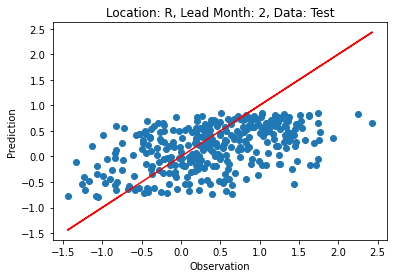

Location: CS
90th Threshold: 0.91003907
80th Threshold: 0.5530006
Training Model 1
Epoch [20/400], Avg Loss: 4.6858,  Val MSE: 0.2710
Epoch [40/400], Avg Loss: 0.8966,  Val MSE: 0.2770
Epoch [60/400], Avg Loss: 0.4636,  Val MSE: 0.2464
Epoch [80/400], Avg Loss: 0.3963,  Val MSE: 0.2433
Epoch [100/400], Avg Loss: 0.3725,  Val MSE: 0.2396
Epoch [120/400], Avg Loss: 0.3565,  Val MSE: 0.2358
Epoch [140/400], Avg Loss: 0.3450,  Val MSE: 0.2332
Epoch [160/400], Avg Loss: 0.3372,  Val MSE: 0.2317
Epoch [180/400], Avg Loss: 0.3313,  Val MSE: 0.2313
Epoch [200/400], Avg Loss: 0.3259,  Val MSE: 0.2311
Epoch [220/400], Avg Loss: 0.3209,  Val MSE: 0.2309
Epoch [240/400], Avg Loss: 0.3162,  Val MSE: 0.2308
Epoch [260/400], Avg Loss: 0.3130,  Val MSE: 0.2307
Epoch [280/400], Avg Loss: 0.3098,  Val MSE: 0.2310
Epoch [300/400], Avg Loss: 0.3072,  Val MSE: 0.2313
Epoch [320/400], Avg Loss: 0.3056,  Val MSE: 0.2317
Epoch [340/400], Avg Loss: 0.3042,  Val MSE: 0.2320
Epoch [360/400], Avg Loss: 0.3029,  V

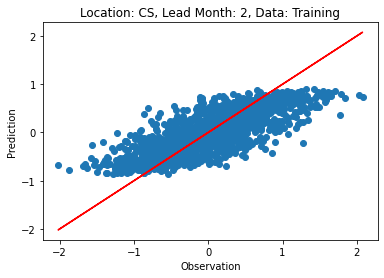

Training Model 2
Epoch [20/400], Avg Loss: 4.7070,  Val MSE: 0.2632
Epoch [40/400], Avg Loss: 0.8834,  Val MSE: 0.2690
Epoch [60/400], Avg Loss: 0.4826,  Val MSE: 0.2438
Epoch [80/400], Avg Loss: 0.4165,  Val MSE: 0.2402
Epoch [100/400], Avg Loss: 0.3866,  Val MSE: 0.2374
Epoch [120/400], Avg Loss: 0.3701,  Val MSE: 0.2341
Epoch [140/400], Avg Loss: 0.3586,  Val MSE: 0.2322
Epoch [160/400], Avg Loss: 0.3489,  Val MSE: 0.2314
Epoch [180/400], Avg Loss: 0.3399,  Val MSE: 0.2312
Epoch [200/400], Avg Loss: 0.3324,  Val MSE: 0.2312
Epoch [220/400], Avg Loss: 0.3263,  Val MSE: 0.2315
Epoch [240/400], Avg Loss: 0.3226,  Val MSE: 0.2318
Epoch [260/400], Avg Loss: 0.3201,  Val MSE: 0.2320
Epoch [280/400], Avg Loss: 0.3177,  Val MSE: 0.2322
Epoch [300/400], Avg Loss: 0.3158,  Val MSE: 0.2323
Epoch [320/400], Avg Loss: 0.3146,  Val MSE: 0.2323
Epoch [340/400], Avg Loss: 0.3136,  Val MSE: 0.2324
Epoch [360/400], Avg Loss: 0.3125,  Val MSE: 0.2325
Epoch [380/400], Avg Loss: 0.3111,  Val MSE: 0.2327

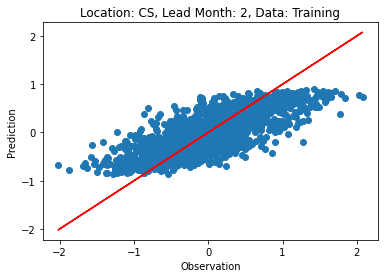

Training Model 3
Epoch [20/400], Avg Loss: 4.6541,  Val MSE: 0.2640
Epoch [40/400], Avg Loss: 0.8628,  Val MSE: 0.2662
Epoch [60/400], Avg Loss: 0.4763,  Val MSE: 0.2459
Epoch [80/400], Avg Loss: 0.4123,  Val MSE: 0.2423
Epoch [100/400], Avg Loss: 0.3864,  Val MSE: 0.2390
Epoch [120/400], Avg Loss: 0.3702,  Val MSE: 0.2359
Epoch [140/400], Avg Loss: 0.3580,  Val MSE: 0.2338
Epoch [160/400], Avg Loss: 0.3502,  Val MSE: 0.2325
Epoch [180/400], Avg Loss: 0.3442,  Val MSE: 0.2321
Epoch [200/400], Avg Loss: 0.3384,  Val MSE: 0.2322
Epoch [220/400], Avg Loss: 0.3338,  Val MSE: 0.2323
Epoch [240/400], Avg Loss: 0.3296,  Val MSE: 0.2322
Epoch [260/400], Avg Loss: 0.3265,  Val MSE: 0.2321
Epoch [280/400], Avg Loss: 0.3248,  Val MSE: 0.2320
Epoch [300/400], Avg Loss: 0.3230,  Val MSE: 0.2321
Epoch [320/400], Avg Loss: 0.3218,  Val MSE: 0.2321
Epoch [340/400], Avg Loss: 0.3204,  Val MSE: 0.2322
Epoch [360/400], Avg Loss: 0.3189,  Val MSE: 0.2324
Epoch [380/400], Avg Loss: 0.3172,  Val MSE: 0.2326

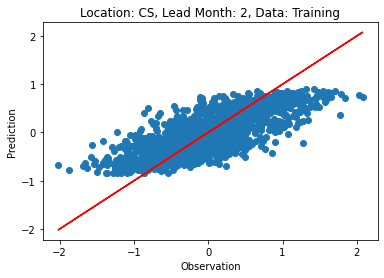

Training Model 4
Epoch [20/400], Avg Loss: 4.6566,  Val MSE: 0.2670
Epoch [40/400], Avg Loss: 0.8498,  Val MSE: 0.2652
Epoch [60/400], Avg Loss: 0.4702,  Val MSE: 0.2474
Epoch [80/400], Avg Loss: 0.4040,  Val MSE: 0.2445
Epoch [100/400], Avg Loss: 0.3715,  Val MSE: 0.2412
Epoch [120/400], Avg Loss: 0.3510,  Val MSE: 0.2377
Epoch [140/400], Avg Loss: 0.3354,  Val MSE: 0.2350
Epoch [160/400], Avg Loss: 0.3251,  Val MSE: 0.2336
Epoch [180/400], Avg Loss: 0.3176,  Val MSE: 0.2329
Epoch [200/400], Avg Loss: 0.3113,  Val MSE: 0.2323
Epoch [220/400], Avg Loss: 0.3067,  Val MSE: 0.2318
Epoch [240/400], Avg Loss: 0.3035,  Val MSE: 0.2315
Epoch [260/400], Avg Loss: 0.3016,  Val MSE: 0.2314
Epoch [280/400], Avg Loss: 0.2998,  Val MSE: 0.2314
Epoch [300/400], Avg Loss: 0.2981,  Val MSE: 0.2315
Epoch [320/400], Avg Loss: 0.2971,  Val MSE: 0.2316
Epoch [340/400], Avg Loss: 0.2963,  Val MSE: 0.2317
Epoch [360/400], Avg Loss: 0.2959,  Val MSE: 0.2318
Epoch [380/400], Avg Loss: 0.2955,  Val MSE: 0.2321

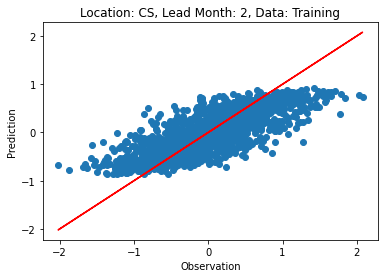

Training Model 5
Epoch [20/400], Avg Loss: 4.6163,  Val MSE: 0.2666
Epoch [40/400], Avg Loss: 0.8806,  Val MSE: 0.2698
Epoch [60/400], Avg Loss: 0.4813,  Val MSE: 0.2447
Epoch [80/400], Avg Loss: 0.4135,  Val MSE: 0.2414
Epoch [100/400], Avg Loss: 0.3886,  Val MSE: 0.2381
Epoch [120/400], Avg Loss: 0.3742,  Val MSE: 0.2351
Epoch [140/400], Avg Loss: 0.3646,  Val MSE: 0.2327
Epoch [160/400], Avg Loss: 0.3579,  Val MSE: 0.2308
Epoch [180/400], Avg Loss: 0.3521,  Val MSE: 0.2296
Epoch [200/400], Avg Loss: 0.3471,  Val MSE: 0.2292
Epoch [220/400], Avg Loss: 0.3423,  Val MSE: 0.2289
Epoch [240/400], Avg Loss: 0.3377,  Val MSE: 0.2292
Epoch [260/400], Avg Loss: 0.3338,  Val MSE: 0.2297
Epoch [280/400], Avg Loss: 0.3305,  Val MSE: 0.2298
Epoch [300/400], Avg Loss: 0.3274,  Val MSE: 0.2302
Epoch [320/400], Avg Loss: 0.3239,  Val MSE: 0.2306
Epoch [340/400], Avg Loss: 0.3209,  Val MSE: 0.2311
Epoch [360/400], Avg Loss: 0.3180,  Val MSE: 0.2318
Epoch [380/400], Avg Loss: 0.3149,  Val MSE: 0.2324

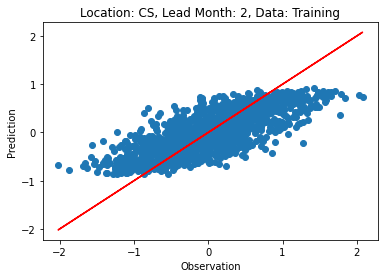

Location: CS
Persistence MSE: 0.2569
Test MSE: 0.2327
Persist CSI: 0.2692
Persist CSI 80: 0.3898
Test CSI: 0.0000
Test CSI 80: 0.3426


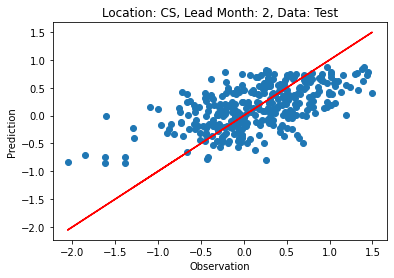

Location: SI
90th Threshold: 1.0225493
80th Threshold: 0.6193951
Training Model 1
Epoch [20/400], Avg Loss: 4.8925,  Val MSE: 0.4687
Epoch [40/400], Avg Loss: 1.0405,  Val MSE: 0.4669
Epoch [60/400], Avg Loss: 0.6495,  Val MSE: 0.4291
Epoch [80/400], Avg Loss: 0.5900,  Val MSE: 0.4266
Epoch [100/400], Avg Loss: 0.5614,  Val MSE: 0.4268
Epoch [120/400], Avg Loss: 0.5437,  Val MSE: 0.4277
Epoch [140/400], Avg Loss: 0.5312,  Val MSE: 0.4290
Epoch [160/400], Avg Loss: 0.5202,  Val MSE: 0.4299
Epoch [180/400], Avg Loss: 0.5127,  Val MSE: 0.4306
Epoch [200/400], Avg Loss: 0.5065,  Val MSE: 0.4316
Epoch [220/400], Avg Loss: 0.5009,  Val MSE: 0.4322
Epoch [240/400], Avg Loss: 0.4966,  Val MSE: 0.4329
Epoch [260/400], Avg Loss: 0.4922,  Val MSE: 0.4337
Epoch [280/400], Avg Loss: 0.4881,  Val MSE: 0.4343
Epoch [300/400], Avg Loss: 0.4838,  Val MSE: 0.4349
Epoch [320/400], Avg Loss: 0.4802,  Val MSE: 0.4355
Epoch [340/400], Avg Loss: 0.4775,  Val MSE: 0.4359
Epoch [360/400], Avg Loss: 0.4757,  Va

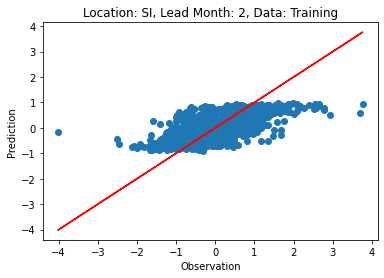

Training Model 2
Epoch [20/400], Avg Loss: 4.8795,  Val MSE: 0.4571
Epoch [40/400], Avg Loss: 1.0512,  Val MSE: 0.4618
Epoch [60/400], Avg Loss: 0.6751,  Val MSE: 0.4313
Epoch [80/400], Avg Loss: 0.6089,  Val MSE: 0.4279
Epoch [100/400], Avg Loss: 0.5820,  Val MSE: 0.4263
Epoch [120/400], Avg Loss: 0.5627,  Val MSE: 0.4261
Epoch [140/400], Avg Loss: 0.5460,  Val MSE: 0.4267
Epoch [160/400], Avg Loss: 0.5331,  Val MSE: 0.4280
Epoch [180/400], Avg Loss: 0.5239,  Val MSE: 0.4288
Epoch [200/400], Avg Loss: 0.5161,  Val MSE: 0.4296
Epoch [220/400], Avg Loss: 0.5107,  Val MSE: 0.4302
Epoch [240/400], Avg Loss: 0.5061,  Val MSE: 0.4308
Epoch [260/400], Avg Loss: 0.5024,  Val MSE: 0.4316
Epoch [280/400], Avg Loss: 0.4987,  Val MSE: 0.4322
Epoch [300/400], Avg Loss: 0.4953,  Val MSE: 0.4330
Epoch [320/400], Avg Loss: 0.4930,  Val MSE: 0.4335
Epoch [340/400], Avg Loss: 0.4909,  Val MSE: 0.4341
Epoch [360/400], Avg Loss: 0.4885,  Val MSE: 0.4347
Epoch [380/400], Avg Loss: 0.4861,  Val MSE: 0.4351

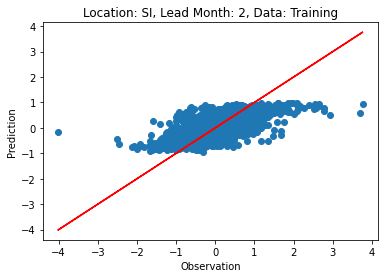

Training Model 3
Epoch [20/400], Avg Loss: 4.9307,  Val MSE: 0.4604
Epoch [40/400], Avg Loss: 1.0847,  Val MSE: 0.4766
Epoch [60/400], Avg Loss: 0.6611,  Val MSE: 0.4349
Epoch [80/400], Avg Loss: 0.5888,  Val MSE: 0.4313
Epoch [100/400], Avg Loss: 0.5531,  Val MSE: 0.4290
Epoch [120/400], Avg Loss: 0.5353,  Val MSE: 0.4276
Epoch [140/400], Avg Loss: 0.5242,  Val MSE: 0.4267
Epoch [160/400], Avg Loss: 0.5150,  Val MSE: 0.4263
Epoch [180/400], Avg Loss: 0.5085,  Val MSE: 0.4262
Epoch [200/400], Avg Loss: 0.5031,  Val MSE: 0.4268
Epoch [220/400], Avg Loss: 0.4986,  Val MSE: 0.4274
Epoch [240/400], Avg Loss: 0.4948,  Val MSE: 0.4277
Epoch [260/400], Avg Loss: 0.4913,  Val MSE: 0.4279
Epoch [280/400], Avg Loss: 0.4882,  Val MSE: 0.4279
Epoch [300/400], Avg Loss: 0.4852,  Val MSE: 0.4280
Epoch [320/400], Avg Loss: 0.4830,  Val MSE: 0.4280
Epoch [340/400], Avg Loss: 0.4819,  Val MSE: 0.4282
Epoch [360/400], Avg Loss: 0.4809,  Val MSE: 0.4286
Epoch [380/400], Avg Loss: 0.4799,  Val MSE: 0.4290

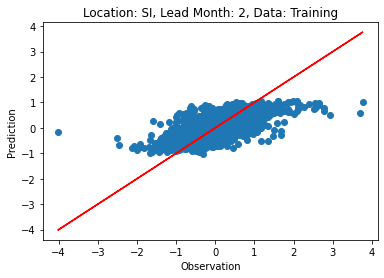

Training Model 4
Epoch [20/400], Avg Loss: 4.8585,  Val MSE: 0.4552
Epoch [40/400], Avg Loss: 1.0368,  Val MSE: 0.4585
Epoch [60/400], Avg Loss: 0.6419,  Val MSE: 0.4292
Epoch [80/400], Avg Loss: 0.5850,  Val MSE: 0.4267
Epoch [100/400], Avg Loss: 0.5568,  Val MSE: 0.4258
Epoch [120/400], Avg Loss: 0.5382,  Val MSE: 0.4255
Epoch [140/400], Avg Loss: 0.5236,  Val MSE: 0.4261
Epoch [160/400], Avg Loss: 0.5148,  Val MSE: 0.4270
Epoch [180/400], Avg Loss: 0.5072,  Val MSE: 0.4275
Epoch [200/400], Avg Loss: 0.5020,  Val MSE: 0.4279
Epoch [220/400], Avg Loss: 0.4985,  Val MSE: 0.4295
Epoch [240/400], Avg Loss: 0.4958,  Val MSE: 0.4307
Epoch [260/400], Avg Loss: 0.4932,  Val MSE: 0.4317
Epoch [280/400], Avg Loss: 0.4905,  Val MSE: 0.4325
Epoch [300/400], Avg Loss: 0.4876,  Val MSE: 0.4332
Epoch [320/400], Avg Loss: 0.4846,  Val MSE: 0.4336
Epoch [340/400], Avg Loss: 0.4825,  Val MSE: 0.4338
Epoch [360/400], Avg Loss: 0.4804,  Val MSE: 0.4342
Epoch [380/400], Avg Loss: 0.4789,  Val MSE: 0.4344

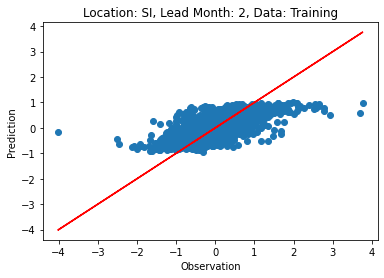

Training Model 5
Epoch [20/400], Avg Loss: 4.9323,  Val MSE: 0.4643
Epoch [40/400], Avg Loss: 1.0835,  Val MSE: 0.4782
Epoch [60/400], Avg Loss: 0.6762,  Val MSE: 0.4313
Epoch [80/400], Avg Loss: 0.6057,  Val MSE: 0.4271
Epoch [100/400], Avg Loss: 0.5724,  Val MSE: 0.4259
Epoch [120/400], Avg Loss: 0.5510,  Val MSE: 0.4267
Epoch [140/400], Avg Loss: 0.5349,  Val MSE: 0.4284
Epoch [160/400], Avg Loss: 0.5229,  Val MSE: 0.4296
Epoch [180/400], Avg Loss: 0.5139,  Val MSE: 0.4305
Epoch [200/400], Avg Loss: 0.5060,  Val MSE: 0.4314
Epoch [220/400], Avg Loss: 0.5005,  Val MSE: 0.4323
Epoch [240/400], Avg Loss: 0.4969,  Val MSE: 0.4334
Epoch [260/400], Avg Loss: 0.4939,  Val MSE: 0.4342
Epoch [280/400], Avg Loss: 0.4913,  Val MSE: 0.4349
Epoch [300/400], Avg Loss: 0.4890,  Val MSE: 0.4354
Epoch [320/400], Avg Loss: 0.4865,  Val MSE: 0.4360
Epoch [340/400], Avg Loss: 0.4836,  Val MSE: 0.4365
Epoch [360/400], Avg Loss: 0.4803,  Val MSE: 0.4369
Epoch [380/400], Avg Loss: 0.4772,  Val MSE: 0.4372

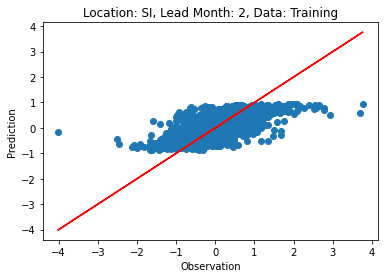

Location: SI
Persistence MSE: 0.5382
Test MSE: 0.4346
Persist CSI: 0.2308
Persist CSI 80: 0.2832
Test CSI: 0.0000
Test CSI 80: 0.2600


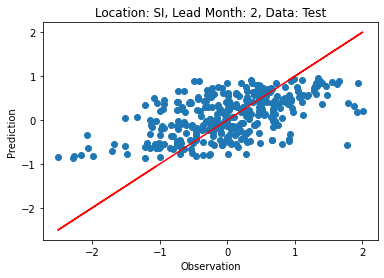

Location: CR
90th Threshold: 1.0836077
80th Threshold: 0.6911178
Training Model 1
Epoch [20/400], Avg Loss: 4.9414,  Val MSE: 0.3835
Epoch [40/400], Avg Loss: 1.1585,  Val MSE: 0.4636
Epoch [60/400], Avg Loss: 0.7640,  Val MSE: 0.3588
Epoch [80/400], Avg Loss: 0.7000,  Val MSE: 0.3385
Epoch [100/400], Avg Loss: 0.6724,  Val MSE: 0.3349
Epoch [120/400], Avg Loss: 0.6537,  Val MSE: 0.3354
Epoch [140/400], Avg Loss: 0.6402,  Val MSE: 0.3366
Epoch [160/400], Avg Loss: 0.6314,  Val MSE: 0.3381
Epoch [180/400], Avg Loss: 0.6254,  Val MSE: 0.3395
Epoch [200/400], Avg Loss: 0.6207,  Val MSE: 0.3415
Epoch [220/400], Avg Loss: 0.6165,  Val MSE: 0.3438
Epoch [240/400], Avg Loss: 0.6123,  Val MSE: 0.3460
Epoch [260/400], Avg Loss: 0.6070,  Val MSE: 0.3480
Epoch [280/400], Avg Loss: 0.6008,  Val MSE: 0.3507
Epoch [300/400], Avg Loss: 0.5941,  Val MSE: 0.3548
Epoch [320/400], Avg Loss: 0.5866,  Val MSE: 0.3586
Epoch [340/400], Avg Loss: 0.5801,  Val MSE: 0.3629
Epoch [360/400], Avg Loss: 0.5756,  Va

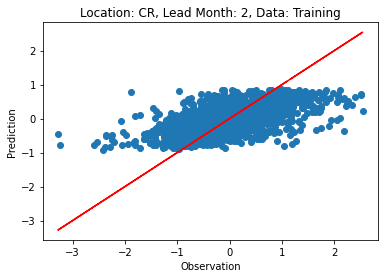

Training Model 2
Epoch [20/400], Avg Loss: 4.9383,  Val MSE: 0.3879
Epoch [40/400], Avg Loss: 1.1457,  Val MSE: 0.4548
Epoch [60/400], Avg Loss: 0.7568,  Val MSE: 0.3584
Epoch [80/400], Avg Loss: 0.6865,  Val MSE: 0.3396
Epoch [100/400], Avg Loss: 0.6559,  Val MSE: 0.3412
Epoch [120/400], Avg Loss: 0.6363,  Val MSE: 0.3463
Epoch [140/400], Avg Loss: 0.6214,  Val MSE: 0.3521
Epoch [160/400], Avg Loss: 0.6106,  Val MSE: 0.3569
Epoch [180/400], Avg Loss: 0.6011,  Val MSE: 0.3608
Epoch [200/400], Avg Loss: 0.5937,  Val MSE: 0.3649
Epoch [220/400], Avg Loss: 0.5873,  Val MSE: 0.3682
Epoch [240/400], Avg Loss: 0.5822,  Val MSE: 0.3705
Epoch [260/400], Avg Loss: 0.5779,  Val MSE: 0.3721
Epoch [280/400], Avg Loss: 0.5744,  Val MSE: 0.3733
Epoch [300/400], Avg Loss: 0.5725,  Val MSE: 0.3739
Epoch [320/400], Avg Loss: 0.5710,  Val MSE: 0.3745
Epoch [340/400], Avg Loss: 0.5694,  Val MSE: 0.3747
Epoch [360/400], Avg Loss: 0.5682,  Val MSE: 0.3749
Epoch [380/400], Avg Loss: 0.5679,  Val MSE: 0.3751

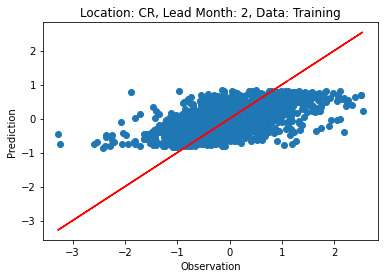

Training Model 3
Epoch [20/400], Avg Loss: 4.9216,  Val MSE: 0.3887
Epoch [40/400], Avg Loss: 1.1007,  Val MSE: 0.4304
Epoch [60/400], Avg Loss: 0.7287,  Val MSE: 0.3496
Epoch [80/400], Avg Loss: 0.6731,  Val MSE: 0.3390
Epoch [100/400], Avg Loss: 0.6467,  Val MSE: 0.3413
Epoch [120/400], Avg Loss: 0.6292,  Val MSE: 0.3469
Epoch [140/400], Avg Loss: 0.6175,  Val MSE: 0.3526
Epoch [160/400], Avg Loss: 0.6096,  Val MSE: 0.3567
Epoch [180/400], Avg Loss: 0.6030,  Val MSE: 0.3603
Epoch [200/400], Avg Loss: 0.5975,  Val MSE: 0.3635
Epoch [220/400], Avg Loss: 0.5933,  Val MSE: 0.3659
Epoch [240/400], Avg Loss: 0.5896,  Val MSE: 0.3681
Epoch [260/400], Avg Loss: 0.5863,  Val MSE: 0.3696
Epoch [280/400], Avg Loss: 0.5832,  Val MSE: 0.3710
Epoch [300/400], Avg Loss: 0.5806,  Val MSE: 0.3721
Epoch [320/400], Avg Loss: 0.5778,  Val MSE: 0.3729
Epoch [340/400], Avg Loss: 0.5750,  Val MSE: 0.3737
Epoch [360/400], Avg Loss: 0.5724,  Val MSE: 0.3742
Epoch [380/400], Avg Loss: 0.5699,  Val MSE: 0.3747

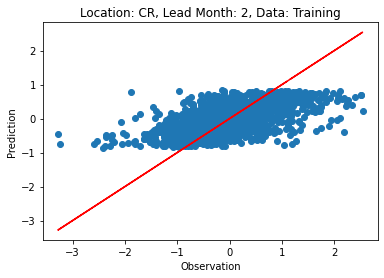

Training Model 4
Epoch [20/400], Avg Loss: 4.9929,  Val MSE: 0.3899
Epoch [40/400], Avg Loss: 1.1407,  Val MSE: 0.4489
Epoch [60/400], Avg Loss: 0.7517,  Val MSE: 0.3540
Epoch [80/400], Avg Loss: 0.6941,  Val MSE: 0.3356
Epoch [100/400], Avg Loss: 0.6704,  Val MSE: 0.3336
Epoch [120/400], Avg Loss: 0.6506,  Val MSE: 0.3385
Epoch [140/400], Avg Loss: 0.6342,  Val MSE: 0.3472
Epoch [160/400], Avg Loss: 0.6212,  Val MSE: 0.3543
Epoch [180/400], Avg Loss: 0.6112,  Val MSE: 0.3586
Epoch [200/400], Avg Loss: 0.6046,  Val MSE: 0.3616
Epoch [220/400], Avg Loss: 0.6008,  Val MSE: 0.3643
Epoch [240/400], Avg Loss: 0.5974,  Val MSE: 0.3666
Epoch [260/400], Avg Loss: 0.5939,  Val MSE: 0.3683
Epoch [280/400], Avg Loss: 0.5910,  Val MSE: 0.3695
Epoch [300/400], Avg Loss: 0.5880,  Val MSE: 0.3706
Epoch [320/400], Avg Loss: 0.5848,  Val MSE: 0.3716
Epoch [340/400], Avg Loss: 0.5825,  Val MSE: 0.3724
Epoch [360/400], Avg Loss: 0.5804,  Val MSE: 0.3730
Epoch [380/400], Avg Loss: 0.5789,  Val MSE: 0.3735

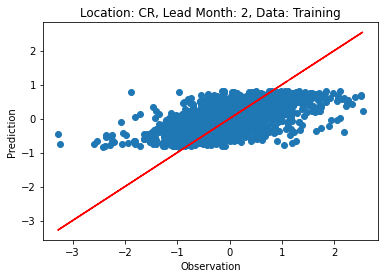

Training Model 5
Epoch [20/400], Avg Loss: 4.9089,  Val MSE: 0.3826
Epoch [40/400], Avg Loss: 1.1419,  Val MSE: 0.4524
Epoch [60/400], Avg Loss: 0.7601,  Val MSE: 0.3588
Epoch [80/400], Avg Loss: 0.6798,  Val MSE: 0.3370
Epoch [100/400], Avg Loss: 0.6460,  Val MSE: 0.3359
Epoch [120/400], Avg Loss: 0.6268,  Val MSE: 0.3406
Epoch [140/400], Avg Loss: 0.6134,  Val MSE: 0.3469
Epoch [160/400], Avg Loss: 0.6052,  Val MSE: 0.3532
Epoch [180/400], Avg Loss: 0.5983,  Val MSE: 0.3582
Epoch [200/400], Avg Loss: 0.5923,  Val MSE: 0.3626
Epoch [220/400], Avg Loss: 0.5873,  Val MSE: 0.3662
Epoch [240/400], Avg Loss: 0.5832,  Val MSE: 0.3688
Epoch [260/400], Avg Loss: 0.5804,  Val MSE: 0.3707
Epoch [280/400], Avg Loss: 0.5784,  Val MSE: 0.3720
Epoch [300/400], Avg Loss: 0.5765,  Val MSE: 0.3727
Epoch [320/400], Avg Loss: 0.5752,  Val MSE: 0.3732
Epoch [340/400], Avg Loss: 0.5740,  Val MSE: 0.3735
Epoch [360/400], Avg Loss: 0.5731,  Val MSE: 0.3737
Epoch [380/400], Avg Loss: 0.5726,  Val MSE: 0.3739

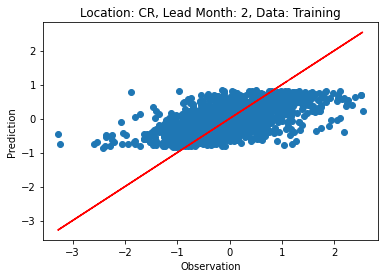

Location: CR
Persistence MSE: 0.4255
Test MSE: 0.3740
Persist CSI: 0.2078
Persist CSI 80: 0.3636
Test CSI: 0.0000
Test CSI 80: 0.1600


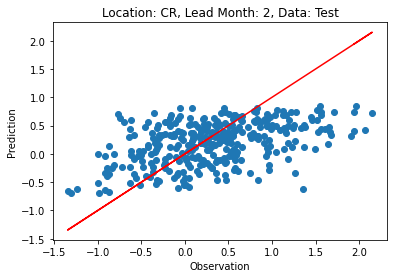

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6430332
Training Model 1
Epoch [20/400], Avg Loss: 4.8528,  Val MSE: 0.5035
Epoch [40/400], Avg Loss: 1.0398,  Val MSE: 0.5213
Epoch [60/400], Avg Loss: 0.6493,  Val MSE: 0.4863
Epoch [80/400], Avg Loss: 0.5828,  Val MSE: 0.4858
Epoch [100/400], Avg Loss: 0.5534,  Val MSE: 0.4888
Epoch [120/400], Avg Loss: 0.5335,  Val MSE: 0.4937
Epoch [140/400], Avg Loss: 0.5179,  Val MSE: 0.4982
Epoch [160/400], Avg Loss: 0.5061,  Val MSE: 0.5011
Epoch [180/400], Avg Loss: 0.4961,  Val MSE: 0.5022
Epoch [200/400], Avg Loss: 0.4884,  Val MSE: 0.5026
Epoch [220/400], Avg Loss: 0.4821,  Val MSE: 0.5025
Epoch [240/400], Avg Loss: 0.4776,  Val MSE: 0.5019
Epoch [260/400], Avg Loss: 0.4736,  Val MSE: 0.5015
Epoch [280/400], Avg Loss: 0.4711,  Val MSE: 0.5010
Epoch [300/400], Avg Loss: 0.4697,  Val MSE: 0.5006
Epoch [320/400], Avg Loss: 0.4688,  Val MSE: 0.5003
Epoch [340/400], Avg Loss: 0.4677,  Val MSE: 0.5002
Epoch [360/400], Avg Loss: 0.4666,  Va

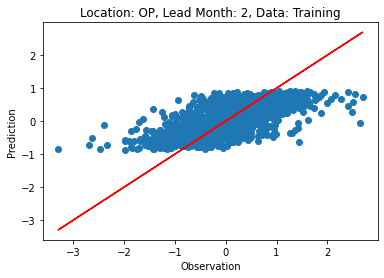

Training Model 2
Epoch [20/400], Avg Loss: 4.8370,  Val MSE: 0.4941
Epoch [40/400], Avg Loss: 1.0908,  Val MSE: 0.5383
Epoch [60/400], Avg Loss: 0.6826,  Val MSE: 0.4905
Epoch [80/400], Avg Loss: 0.5950,  Val MSE: 0.4814
Epoch [100/400], Avg Loss: 0.5540,  Val MSE: 0.4862
Epoch [120/400], Avg Loss: 0.5294,  Val MSE: 0.4917
Epoch [140/400], Avg Loss: 0.5109,  Val MSE: 0.4970
Epoch [160/400], Avg Loss: 0.4964,  Val MSE: 0.5003
Epoch [180/400], Avg Loss: 0.4855,  Val MSE: 0.5018
Epoch [200/400], Avg Loss: 0.4801,  Val MSE: 0.5022
Epoch [220/400], Avg Loss: 0.4751,  Val MSE: 0.5021
Epoch [240/400], Avg Loss: 0.4709,  Val MSE: 0.5017
Epoch [260/400], Avg Loss: 0.4677,  Val MSE: 0.5015
Epoch [280/400], Avg Loss: 0.4657,  Val MSE: 0.5014
Epoch [300/400], Avg Loss: 0.4641,  Val MSE: 0.5011
Epoch [320/400], Avg Loss: 0.4629,  Val MSE: 0.5009
Epoch [340/400], Avg Loss: 0.4616,  Val MSE: 0.5009
Epoch [360/400], Avg Loss: 0.4602,  Val MSE: 0.5009
Epoch [380/400], Avg Loss: 0.4586,  Val MSE: 0.5008

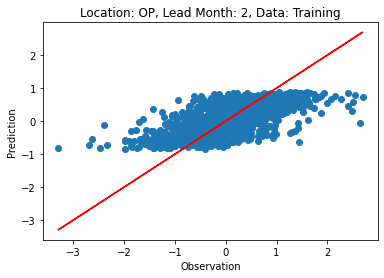

Training Model 3
Epoch [20/400], Avg Loss: 4.8840,  Val MSE: 0.4951
Epoch [40/400], Avg Loss: 1.0822,  Val MSE: 0.5232
Epoch [60/400], Avg Loss: 0.6745,  Val MSE: 0.4859
Epoch [80/400], Avg Loss: 0.6006,  Val MSE: 0.4863
Epoch [100/400], Avg Loss: 0.5678,  Val MSE: 0.4905
Epoch [120/400], Avg Loss: 0.5454,  Val MSE: 0.4937
Epoch [140/400], Avg Loss: 0.5313,  Val MSE: 0.4961
Epoch [160/400], Avg Loss: 0.5201,  Val MSE: 0.4981
Epoch [180/400], Avg Loss: 0.5104,  Val MSE: 0.4987
Epoch [200/400], Avg Loss: 0.5014,  Val MSE: 0.4999
Epoch [220/400], Avg Loss: 0.4929,  Val MSE: 0.5010
Epoch [240/400], Avg Loss: 0.4861,  Val MSE: 0.5022
Epoch [260/400], Avg Loss: 0.4813,  Val MSE: 0.5028
Epoch [280/400], Avg Loss: 0.4771,  Val MSE: 0.5029
Epoch [300/400], Avg Loss: 0.4737,  Val MSE: 0.5028
Epoch [320/400], Avg Loss: 0.4707,  Val MSE: 0.5024
Epoch [340/400], Avg Loss: 0.4685,  Val MSE: 0.5022
Epoch [360/400], Avg Loss: 0.4669,  Val MSE: 0.5019
Epoch [380/400], Avg Loss: 0.4653,  Val MSE: 0.5016

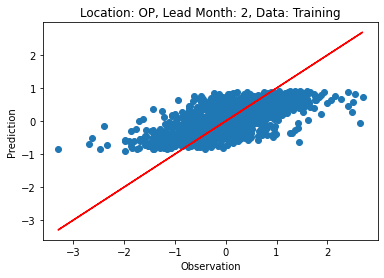

Training Model 4
Epoch [20/400], Avg Loss: 4.8530,  Val MSE: 0.4956
Epoch [40/400], Avg Loss: 1.0864,  Val MSE: 0.5303
Epoch [60/400], Avg Loss: 0.6789,  Val MSE: 0.4877
Epoch [80/400], Avg Loss: 0.6105,  Val MSE: 0.4860
Epoch [100/400], Avg Loss: 0.5786,  Val MSE: 0.4877
Epoch [120/400], Avg Loss: 0.5559,  Val MSE: 0.4909
Epoch [140/400], Avg Loss: 0.5390,  Val MSE: 0.4932
Epoch [160/400], Avg Loss: 0.5282,  Val MSE: 0.4950
Epoch [180/400], Avg Loss: 0.5186,  Val MSE: 0.4962
Epoch [200/400], Avg Loss: 0.5111,  Val MSE: 0.4980
Epoch [220/400], Avg Loss: 0.5046,  Val MSE: 0.4995
Epoch [240/400], Avg Loss: 0.4985,  Val MSE: 0.5009
Epoch [260/400], Avg Loss: 0.4927,  Val MSE: 0.5016
Epoch [280/400], Avg Loss: 0.4873,  Val MSE: 0.5020
Epoch [300/400], Avg Loss: 0.4834,  Val MSE: 0.5020
Epoch [320/400], Avg Loss: 0.4802,  Val MSE: 0.5018
Epoch [340/400], Avg Loss: 0.4772,  Val MSE: 0.5015
Epoch [360/400], Avg Loss: 0.4738,  Val MSE: 0.5015
Epoch [380/400], Avg Loss: 0.4703,  Val MSE: 0.5013

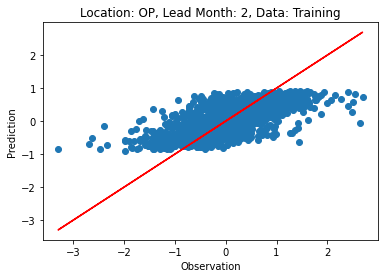

Training Model 5
Epoch [20/400], Avg Loss: 4.8488,  Val MSE: 0.4937
Epoch [40/400], Avg Loss: 1.0494,  Val MSE: 0.5147
Epoch [60/400], Avg Loss: 0.6508,  Val MSE: 0.4832
Epoch [80/400], Avg Loss: 0.5833,  Val MSE: 0.4871
Epoch [100/400], Avg Loss: 0.5548,  Val MSE: 0.4909
Epoch [120/400], Avg Loss: 0.5372,  Val MSE: 0.4935
Epoch [140/400], Avg Loss: 0.5245,  Val MSE: 0.4961
Epoch [160/400], Avg Loss: 0.5144,  Val MSE: 0.4977
Epoch [180/400], Avg Loss: 0.5064,  Val MSE: 0.4986
Epoch [200/400], Avg Loss: 0.5005,  Val MSE: 0.4988
Epoch [220/400], Avg Loss: 0.4965,  Val MSE: 0.4989
Epoch [240/400], Avg Loss: 0.4932,  Val MSE: 0.4987
Epoch [260/400], Avg Loss: 0.4901,  Val MSE: 0.4988
Epoch [280/400], Avg Loss: 0.4871,  Val MSE: 0.4992
Epoch [300/400], Avg Loss: 0.4843,  Val MSE: 0.4994
Epoch [320/400], Avg Loss: 0.4817,  Val MSE: 0.4996
Epoch [340/400], Avg Loss: 0.4797,  Val MSE: 0.4997
Epoch [360/400], Avg Loss: 0.4778,  Val MSE: 0.4998
Epoch [380/400], Avg Loss: 0.4760,  Val MSE: 0.4997

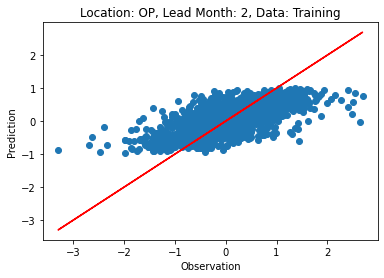

Location: OP
Persistence MSE: 0.6335
Test MSE: 0.5004
Persist CSI: 0.1923
Persist CSI 80: 0.1979
Test CSI: 0.0000
Test CSI 80: 0.2564


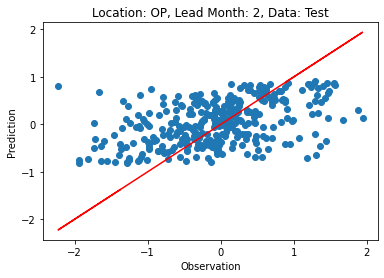

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.81318116
Training Model 1
Epoch [20/400], Avg Loss: 5.0376,  Val MSE: 0.8474
Epoch [40/400], Avg Loss: 1.2716,  Val MSE: 0.8084
Epoch [60/400], Avg Loss: 0.8463,  Val MSE: 0.7843
Epoch [80/400], Avg Loss: 0.7711,  Val MSE: 0.7857
Epoch [100/400], Avg Loss: 0.7398,  Val MSE: 0.7935
Epoch [120/400], Avg Loss: 0.7178,  Val MSE: 0.8018
Epoch [140/400], Avg Loss: 0.6993,  Val MSE: 0.8113
Epoch [160/400], Avg Loss: 0.6832,  Val MSE: 0.8190
Epoch [180/400], Avg Loss: 0.6685,  Val MSE: 0.8242
Epoch [200/400], Avg Loss: 0.6583,  Val MSE: 0.8293
Epoch [220/400], Avg Loss: 0.6521,  Val MSE: 0.8346
Epoch [240/400], Avg Loss: 0.6476,  Val MSE: 0.8403
Epoch [260/400], Avg Loss: 0.6434,  Val MSE: 0.8456
Epoch [280/400], Avg Loss: 0.6390,  Val MSE: 0.8503
Epoch [300/400], Avg Loss: 0.6353,  Val MSE: 0.8549
Epoch [320/400], Avg Loss: 0.6316,  Val MSE: 0.8578
Epoch [340/400], Avg Loss: 0.6280,  Val MSE: 0.8602
Epoch [360/400], Avg Loss: 0.6249,  Va

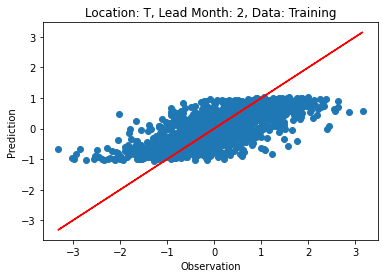

Training Model 2
Epoch [20/400], Avg Loss: 4.9829,  Val MSE: 0.8509
Epoch [40/400], Avg Loss: 1.2507,  Val MSE: 0.8028
Epoch [60/400], Avg Loss: 0.8439,  Val MSE: 0.7831
Epoch [80/400], Avg Loss: 0.7710,  Val MSE: 0.7870
Epoch [100/400], Avg Loss: 0.7378,  Val MSE: 0.7970
Epoch [120/400], Avg Loss: 0.7116,  Val MSE: 0.8054
Epoch [140/400], Avg Loss: 0.6929,  Val MSE: 0.8141
Epoch [160/400], Avg Loss: 0.6802,  Val MSE: 0.8209
Epoch [180/400], Avg Loss: 0.6689,  Val MSE: 0.8263
Epoch [200/400], Avg Loss: 0.6585,  Val MSE: 0.8314
Epoch [220/400], Avg Loss: 0.6505,  Val MSE: 0.8348
Epoch [240/400], Avg Loss: 0.6450,  Val MSE: 0.8369
Epoch [260/400], Avg Loss: 0.6400,  Val MSE: 0.8383
Epoch [280/400], Avg Loss: 0.6353,  Val MSE: 0.8397
Epoch [300/400], Avg Loss: 0.6319,  Val MSE: 0.8405
Epoch [320/400], Avg Loss: 0.6289,  Val MSE: 0.8416
Epoch [340/400], Avg Loss: 0.6263,  Val MSE: 0.8421
Epoch [360/400], Avg Loss: 0.6241,  Val MSE: 0.8423
Epoch [380/400], Avg Loss: 0.6229,  Val MSE: 0.8427

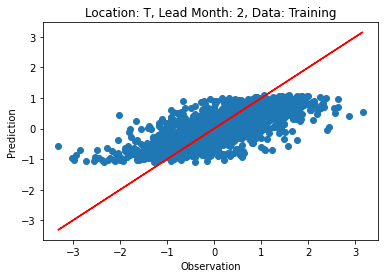

Training Model 3
Epoch [20/400], Avg Loss: 5.0306,  Val MSE: 0.8398
Epoch [40/400], Avg Loss: 1.2820,  Val MSE: 0.8056
Epoch [60/400], Avg Loss: 0.8589,  Val MSE: 0.7825
Epoch [80/400], Avg Loss: 0.7701,  Val MSE: 0.7837
Epoch [100/400], Avg Loss: 0.7334,  Val MSE: 0.7969
Epoch [120/400], Avg Loss: 0.7085,  Val MSE: 0.8101
Epoch [140/400], Avg Loss: 0.6889,  Val MSE: 0.8211
Epoch [160/400], Avg Loss: 0.6715,  Val MSE: 0.8304
Epoch [180/400], Avg Loss: 0.6575,  Val MSE: 0.8370
Epoch [200/400], Avg Loss: 0.6480,  Val MSE: 0.8423
Epoch [220/400], Avg Loss: 0.6407,  Val MSE: 0.8476
Epoch [240/400], Avg Loss: 0.6343,  Val MSE: 0.8517
Epoch [260/400], Avg Loss: 0.6299,  Val MSE: 0.8551
Epoch [280/400], Avg Loss: 0.6270,  Val MSE: 0.8575
Epoch [300/400], Avg Loss: 0.6250,  Val MSE: 0.8596
Epoch [320/400], Avg Loss: 0.6232,  Val MSE: 0.8614
Epoch [340/400], Avg Loss: 0.6213,  Val MSE: 0.8628
Epoch [360/400], Avg Loss: 0.6196,  Val MSE: 0.8641
Epoch [380/400], Avg Loss: 0.6184,  Val MSE: 0.8651

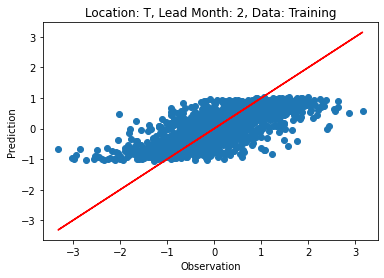

Training Model 4
Epoch [20/400], Avg Loss: 5.0448,  Val MSE: 0.8290
Epoch [40/400], Avg Loss: 1.2760,  Val MSE: 0.8048
Epoch [60/400], Avg Loss: 0.8775,  Val MSE: 0.7853
Epoch [80/400], Avg Loss: 0.7866,  Val MSE: 0.7863
Epoch [100/400], Avg Loss: 0.7370,  Val MSE: 0.8008
Epoch [120/400], Avg Loss: 0.7079,  Val MSE: 0.8144
Epoch [140/400], Avg Loss: 0.6863,  Val MSE: 0.8242
Epoch [160/400], Avg Loss: 0.6714,  Val MSE: 0.8337
Epoch [180/400], Avg Loss: 0.6593,  Val MSE: 0.8404
Epoch [200/400], Avg Loss: 0.6512,  Val MSE: 0.8454
Epoch [220/400], Avg Loss: 0.6462,  Val MSE: 0.8494
Epoch [240/400], Avg Loss: 0.6425,  Val MSE: 0.8528
Epoch [260/400], Avg Loss: 0.6394,  Val MSE: 0.8556
Epoch [280/400], Avg Loss: 0.6369,  Val MSE: 0.8574
Epoch [300/400], Avg Loss: 0.6350,  Val MSE: 0.8593
Epoch [320/400], Avg Loss: 0.6336,  Val MSE: 0.8609
Epoch [340/400], Avg Loss: 0.6320,  Val MSE: 0.8622
Epoch [360/400], Avg Loss: 0.6300,  Val MSE: 0.8635
Epoch [380/400], Avg Loss: 0.6284,  Val MSE: 0.8646

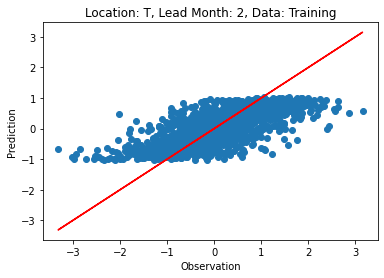

Training Model 5
Epoch [20/400], Avg Loss: 5.0397,  Val MSE: 0.8494
Epoch [40/400], Avg Loss: 1.2291,  Val MSE: 0.8075
Epoch [60/400], Avg Loss: 0.8241,  Val MSE: 0.7846
Epoch [80/400], Avg Loss: 0.7544,  Val MSE: 0.7940
Epoch [100/400], Avg Loss: 0.7183,  Val MSE: 0.8105
Epoch [120/400], Avg Loss: 0.6955,  Val MSE: 0.8208
Epoch [140/400], Avg Loss: 0.6792,  Val MSE: 0.8289
Epoch [160/400], Avg Loss: 0.6670,  Val MSE: 0.8354
Epoch [180/400], Avg Loss: 0.6583,  Val MSE: 0.8410
Epoch [200/400], Avg Loss: 0.6528,  Val MSE: 0.8466
Epoch [220/400], Avg Loss: 0.6492,  Val MSE: 0.8507
Epoch [240/400], Avg Loss: 0.6466,  Val MSE: 0.8542
Epoch [260/400], Avg Loss: 0.6441,  Val MSE: 0.8577
Epoch [280/400], Avg Loss: 0.6416,  Val MSE: 0.8604
Epoch [300/400], Avg Loss: 0.6390,  Val MSE: 0.8625
Epoch [320/400], Avg Loss: 0.6370,  Val MSE: 0.8640
Epoch [340/400], Avg Loss: 0.6349,  Val MSE: 0.8656
Epoch [360/400], Avg Loss: 0.6326,  Val MSE: 0.8667
Epoch [380/400], Avg Loss: 0.6310,  Val MSE: 0.8677

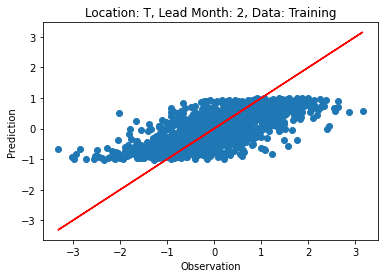

Location: T
Persistence MSE: 0.8856
Test MSE: 0.8610
Persist CSI: 0.2462
Persist CSI 80: 0.3443
Test CSI: 0.0000
Test CSI 80: 0.2426


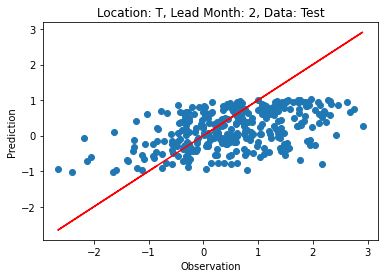

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.6538955
Training Model 1
Epoch [20/400], Avg Loss: 5.0513,  Val MSE: 0.5968
Epoch [40/400], Avg Loss: 1.2017,  Val MSE: 0.6015
Epoch [60/400], Avg Loss: 0.8417,  Val MSE: 0.6023
Epoch [80/400], Avg Loss: 0.7653,  Val MSE: 0.5829
Epoch [100/400], Avg Loss: 0.7295,  Val MSE: 0.5795
Epoch [120/400], Avg Loss: 0.7075,  Val MSE: 0.5784
Epoch [140/400], Avg Loss: 0.6949,  Val MSE: 0.5758
Epoch [160/400], Avg Loss: 0.6851,  Val MSE: 0.5744
Epoch [180/400], Avg Loss: 0.6769,  Val MSE: 0.5741
Epoch [200/400], Avg Loss: 0.6712,  Val MSE: 0.5738
Epoch [220/400], Avg Loss: 0.6664,  Val MSE: 0.5742
Epoch [240/400], Avg Loss: 0.6624,  Val MSE: 0.5752
Epoch [260/400], Avg Loss: 0.6593,  Val MSE: 0.5759
Epoch [280/400], Avg Loss: 0.6564,  Val MSE: 0.5766
Epoch [300/400], Avg Loss: 0.6538,  Val MSE: 0.5773
Epoch [320/400], Avg Loss: 0.6511,  Val MSE: 0.5780
Epoch [340/400], Avg Loss: 0.6481,  Val MSE: 0.5787
Epoch [360/400], Avg Loss: 0.6452,  Va

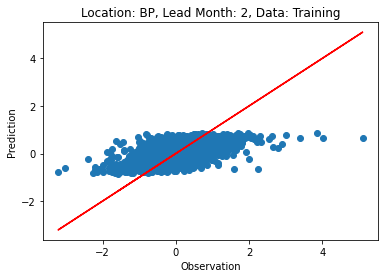

Training Model 2
Epoch [20/400], Avg Loss: 5.0287,  Val MSE: 0.5863
Epoch [40/400], Avg Loss: 1.2029,  Val MSE: 0.5976
Epoch [60/400], Avg Loss: 0.8226,  Val MSE: 0.5906
Epoch [80/400], Avg Loss: 0.7582,  Val MSE: 0.5774
Epoch [100/400], Avg Loss: 0.7313,  Val MSE: 0.5760
Epoch [120/400], Avg Loss: 0.7167,  Val MSE: 0.5759
Epoch [140/400], Avg Loss: 0.7054,  Val MSE: 0.5755
Epoch [160/400], Avg Loss: 0.6961,  Val MSE: 0.5755
Epoch [180/400], Avg Loss: 0.6891,  Val MSE: 0.5753
Epoch [200/400], Avg Loss: 0.6829,  Val MSE: 0.5754
Epoch [220/400], Avg Loss: 0.6760,  Val MSE: 0.5758
Epoch [240/400], Avg Loss: 0.6688,  Val MSE: 0.5763
Epoch [260/400], Avg Loss: 0.6624,  Val MSE: 0.5766
Epoch [280/400], Avg Loss: 0.6570,  Val MSE: 0.5775
Epoch [300/400], Avg Loss: 0.6523,  Val MSE: 0.5781
Epoch [320/400], Avg Loss: 0.6486,  Val MSE: 0.5790
Epoch [340/400], Avg Loss: 0.6463,  Val MSE: 0.5799
Epoch [360/400], Avg Loss: 0.6447,  Val MSE: 0.5807
Epoch [380/400], Avg Loss: 0.6431,  Val MSE: 0.5811

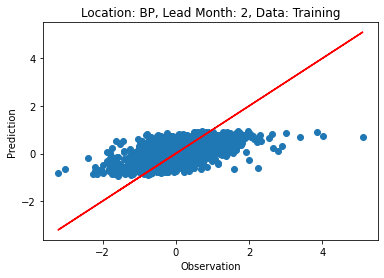

Training Model 3
Epoch [20/400], Avg Loss: 5.0423,  Val MSE: 0.5935
Epoch [40/400], Avg Loss: 1.2214,  Val MSE: 0.5976
Epoch [60/400], Avg Loss: 0.8225,  Val MSE: 0.5931
Epoch [80/400], Avg Loss: 0.7578,  Val MSE: 0.5773
Epoch [100/400], Avg Loss: 0.7302,  Val MSE: 0.5754
Epoch [120/400], Avg Loss: 0.7106,  Val MSE: 0.5755
Epoch [140/400], Avg Loss: 0.6961,  Val MSE: 0.5756
Epoch [160/400], Avg Loss: 0.6868,  Val MSE: 0.5757
Epoch [180/400], Avg Loss: 0.6792,  Val MSE: 0.5759
Epoch [200/400], Avg Loss: 0.6738,  Val MSE: 0.5759
Epoch [220/400], Avg Loss: 0.6694,  Val MSE: 0.5761
Epoch [240/400], Avg Loss: 0.6653,  Val MSE: 0.5763
Epoch [260/400], Avg Loss: 0.6616,  Val MSE: 0.5761
Epoch [280/400], Avg Loss: 0.6576,  Val MSE: 0.5764
Epoch [300/400], Avg Loss: 0.6542,  Val MSE: 0.5772
Epoch [320/400], Avg Loss: 0.6510,  Val MSE: 0.5781
Epoch [340/400], Avg Loss: 0.6483,  Val MSE: 0.5790
Epoch [360/400], Avg Loss: 0.6457,  Val MSE: 0.5800
Epoch [380/400], Avg Loss: 0.6436,  Val MSE: 0.5805

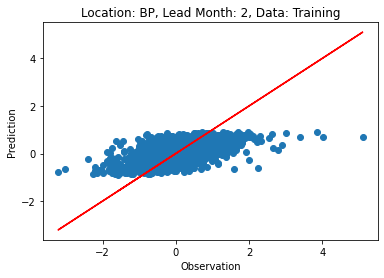

Training Model 4
Epoch [20/400], Avg Loss: 5.0135,  Val MSE: 0.5957
Epoch [40/400], Avg Loss: 1.2192,  Val MSE: 0.5978
Epoch [60/400], Avg Loss: 0.8279,  Val MSE: 0.5957
Epoch [80/400], Avg Loss: 0.7580,  Val MSE: 0.5787
Epoch [100/400], Avg Loss: 0.7240,  Val MSE: 0.5737
Epoch [120/400], Avg Loss: 0.7035,  Val MSE: 0.5722
Epoch [140/400], Avg Loss: 0.6898,  Val MSE: 0.5723
Epoch [160/400], Avg Loss: 0.6805,  Val MSE: 0.5731
Epoch [180/400], Avg Loss: 0.6736,  Val MSE: 0.5740
Epoch [200/400], Avg Loss: 0.6670,  Val MSE: 0.5749
Epoch [220/400], Avg Loss: 0.6610,  Val MSE: 0.5759
Epoch [240/400], Avg Loss: 0.6552,  Val MSE: 0.5770
Epoch [260/400], Avg Loss: 0.6508,  Val MSE: 0.5780
Epoch [280/400], Avg Loss: 0.6479,  Val MSE: 0.5786
Epoch [300/400], Avg Loss: 0.6453,  Val MSE: 0.5791
Epoch [320/400], Avg Loss: 0.6426,  Val MSE: 0.5796
Epoch [340/400], Avg Loss: 0.6400,  Val MSE: 0.5802
Epoch [360/400], Avg Loss: 0.6370,  Val MSE: 0.5806
Epoch [380/400], Avg Loss: 0.6350,  Val MSE: 0.5810

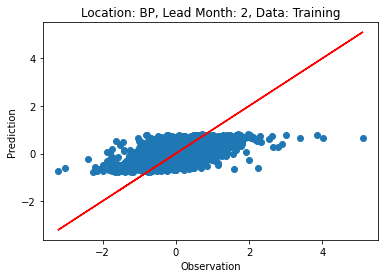

Training Model 5
Epoch [20/400], Avg Loss: 5.0284,  Val MSE: 0.5906
Epoch [40/400], Avg Loss: 1.1769,  Val MSE: 0.5947
Epoch [60/400], Avg Loss: 0.7992,  Val MSE: 0.5848
Epoch [80/400], Avg Loss: 0.7440,  Val MSE: 0.5754
Epoch [100/400], Avg Loss: 0.7212,  Val MSE: 0.5730
Epoch [120/400], Avg Loss: 0.7065,  Val MSE: 0.5730
Epoch [140/400], Avg Loss: 0.6960,  Val MSE: 0.5732
Epoch [160/400], Avg Loss: 0.6861,  Val MSE: 0.5739
Epoch [180/400], Avg Loss: 0.6781,  Val MSE: 0.5745
Epoch [200/400], Avg Loss: 0.6709,  Val MSE: 0.5753
Epoch [220/400], Avg Loss: 0.6636,  Val MSE: 0.5761
Epoch [240/400], Avg Loss: 0.6574,  Val MSE: 0.5768
Epoch [260/400], Avg Loss: 0.6534,  Val MSE: 0.5774
Epoch [280/400], Avg Loss: 0.6513,  Val MSE: 0.5777
Epoch [300/400], Avg Loss: 0.6494,  Val MSE: 0.5780
Epoch [320/400], Avg Loss: 0.6476,  Val MSE: 0.5785
Epoch [340/400], Avg Loss: 0.6465,  Val MSE: 0.5787
Epoch [360/400], Avg Loss: 0.6457,  Val MSE: 0.5790
Epoch [380/400], Avg Loss: 0.6455,  Val MSE: 0.5792

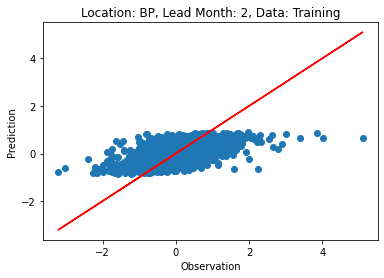

Location: BP
Persistence MSE: 0.8608
Test MSE: 0.5798
Persist CSI: 0.0556
Persist CSI 80: 0.1477
Test CSI: 0.0000
Test CSI 80: 0.1324


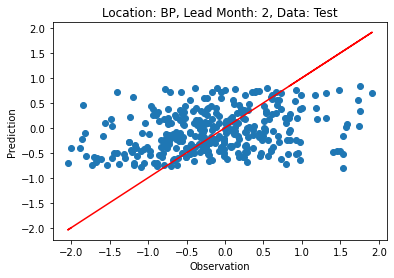

Location: BOP
90th Threshold: 1.1161726
80th Threshold: 0.7248904
Training Model 1
Epoch [20/400], Avg Loss: 4.9441,  Val MSE: 0.2888
Epoch [40/400], Avg Loss: 1.1549,  Val MSE: 0.2900
Epoch [60/400], Avg Loss: 0.7636,  Val MSE: 0.2732
Epoch [80/400], Avg Loss: 0.6914,  Val MSE: 0.2717
Epoch [100/400], Avg Loss: 0.6608,  Val MSE: 0.2725
Epoch [120/400], Avg Loss: 0.6398,  Val MSE: 0.2744
Epoch [140/400], Avg Loss: 0.6228,  Val MSE: 0.2764
Epoch [160/400], Avg Loss: 0.6101,  Val MSE: 0.2780
Epoch [180/400], Avg Loss: 0.6000,  Val MSE: 0.2794
Epoch [200/400], Avg Loss: 0.5924,  Val MSE: 0.2810
Epoch [220/400], Avg Loss: 0.5865,  Val MSE: 0.2829
Epoch [240/400], Avg Loss: 0.5814,  Val MSE: 0.2848
Epoch [260/400], Avg Loss: 0.5776,  Val MSE: 0.2866
Epoch [280/400], Avg Loss: 0.5747,  Val MSE: 0.2888
Epoch [300/400], Avg Loss: 0.5719,  Val MSE: 0.2910
Epoch [320/400], Avg Loss: 0.5688,  Val MSE: 0.2931
Epoch [340/400], Avg Loss: 0.5653,  Val MSE: 0.2950
Epoch [360/400], Avg Loss: 0.5615,  V

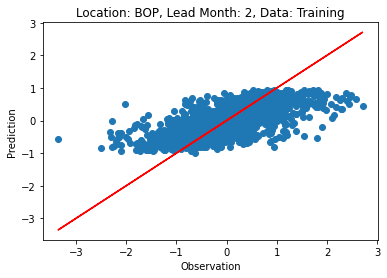

Training Model 2
Epoch [20/400], Avg Loss: 4.9758,  Val MSE: 0.2854
Epoch [40/400], Avg Loss: 1.1904,  Val MSE: 0.2973
Epoch [60/400], Avg Loss: 0.7778,  Val MSE: 0.2759
Epoch [80/400], Avg Loss: 0.7044,  Val MSE: 0.2726
Epoch [100/400], Avg Loss: 0.6729,  Val MSE: 0.2725
Epoch [120/400], Avg Loss: 0.6476,  Val MSE: 0.2738
Epoch [140/400], Avg Loss: 0.6307,  Val MSE: 0.2750
Epoch [160/400], Avg Loss: 0.6202,  Val MSE: 0.2759
Epoch [180/400], Avg Loss: 0.6112,  Val MSE: 0.2768
Epoch [200/400], Avg Loss: 0.6041,  Val MSE: 0.2781
Epoch [220/400], Avg Loss: 0.5977,  Val MSE: 0.2800
Epoch [240/400], Avg Loss: 0.5926,  Val MSE: 0.2826
Epoch [260/400], Avg Loss: 0.5880,  Val MSE: 0.2856
Epoch [280/400], Avg Loss: 0.5840,  Val MSE: 0.2888
Epoch [300/400], Avg Loss: 0.5799,  Val MSE: 0.2920
Epoch [320/400], Avg Loss: 0.5758,  Val MSE: 0.2951
Epoch [340/400], Avg Loss: 0.5716,  Val MSE: 0.2976
Epoch [360/400], Avg Loss: 0.5684,  Val MSE: 0.2997
Epoch [380/400], Avg Loss: 0.5655,  Val MSE: 0.3015

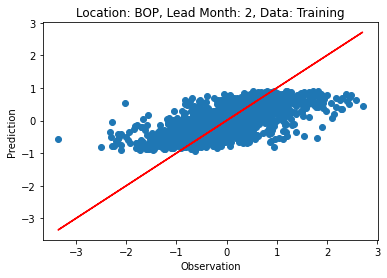

Training Model 3
Epoch [20/400], Avg Loss: 4.9261,  Val MSE: 0.2867
Epoch [40/400], Avg Loss: 1.1775,  Val MSE: 0.2973
Epoch [60/400], Avg Loss: 0.7755,  Val MSE: 0.2752
Epoch [80/400], Avg Loss: 0.6965,  Val MSE: 0.2747
Epoch [100/400], Avg Loss: 0.6599,  Val MSE: 0.2764
Epoch [120/400], Avg Loss: 0.6380,  Val MSE: 0.2778
Epoch [140/400], Avg Loss: 0.6240,  Val MSE: 0.2790
Epoch [160/400], Avg Loss: 0.6135,  Val MSE: 0.2804
Epoch [180/400], Avg Loss: 0.6056,  Val MSE: 0.2823
Epoch [200/400], Avg Loss: 0.5991,  Val MSE: 0.2846
Epoch [220/400], Avg Loss: 0.5936,  Val MSE: 0.2872
Epoch [240/400], Avg Loss: 0.5891,  Val MSE: 0.2896
Epoch [260/400], Avg Loss: 0.5853,  Val MSE: 0.2920
Epoch [280/400], Avg Loss: 0.5816,  Val MSE: 0.2943
Epoch [300/400], Avg Loss: 0.5778,  Val MSE: 0.2968
Epoch [320/400], Avg Loss: 0.5740,  Val MSE: 0.2987
Epoch [340/400], Avg Loss: 0.5695,  Val MSE: 0.3004
Epoch [360/400], Avg Loss: 0.5650,  Val MSE: 0.3016
Epoch [380/400], Avg Loss: 0.5611,  Val MSE: 0.3023

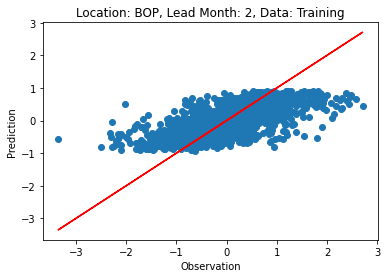

Training Model 4
Epoch [20/400], Avg Loss: 4.9686,  Val MSE: 0.2848
Epoch [40/400], Avg Loss: 1.1477,  Val MSE: 0.2894
Epoch [60/400], Avg Loss: 0.7372,  Val MSE: 0.2743
Epoch [80/400], Avg Loss: 0.6754,  Val MSE: 0.2736
Epoch [100/400], Avg Loss: 0.6511,  Val MSE: 0.2747
Epoch [120/400], Avg Loss: 0.6364,  Val MSE: 0.2759
Epoch [140/400], Avg Loss: 0.6248,  Val MSE: 0.2766
Epoch [160/400], Avg Loss: 0.6158,  Val MSE: 0.2769
Epoch [180/400], Avg Loss: 0.6079,  Val MSE: 0.2772
Epoch [200/400], Avg Loss: 0.6007,  Val MSE: 0.2779
Epoch [220/400], Avg Loss: 0.5945,  Val MSE: 0.2782
Epoch [240/400], Avg Loss: 0.5892,  Val MSE: 0.2789
Epoch [260/400], Avg Loss: 0.5853,  Val MSE: 0.2801
Epoch [280/400], Avg Loss: 0.5815,  Val MSE: 0.2810
Epoch [300/400], Avg Loss: 0.5787,  Val MSE: 0.2823
Epoch [320/400], Avg Loss: 0.5765,  Val MSE: 0.2834
Epoch [340/400], Avg Loss: 0.5748,  Val MSE: 0.2849
Epoch [360/400], Avg Loss: 0.5732,  Val MSE: 0.2864
Epoch [380/400], Avg Loss: 0.5720,  Val MSE: 0.2880

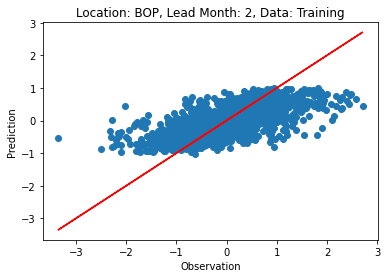

Training Model 5
Epoch [20/400], Avg Loss: 4.9426,  Val MSE: 0.2863
Epoch [40/400], Avg Loss: 1.1550,  Val MSE: 0.2922
Epoch [60/400], Avg Loss: 0.7547,  Val MSE: 0.2750
Epoch [80/400], Avg Loss: 0.7029,  Val MSE: 0.2721
Epoch [100/400], Avg Loss: 0.6775,  Val MSE: 0.2715
Epoch [120/400], Avg Loss: 0.6546,  Val MSE: 0.2735
Epoch [140/400], Avg Loss: 0.6341,  Val MSE: 0.2760
Epoch [160/400], Avg Loss: 0.6193,  Val MSE: 0.2788
Epoch [180/400], Avg Loss: 0.6075,  Val MSE: 0.2817
Epoch [200/400], Avg Loss: 0.5962,  Val MSE: 0.2851
Epoch [220/400], Avg Loss: 0.5877,  Val MSE: 0.2888
Epoch [240/400], Avg Loss: 0.5806,  Val MSE: 0.2921
Epoch [260/400], Avg Loss: 0.5750,  Val MSE: 0.2953
Epoch [280/400], Avg Loss: 0.5710,  Val MSE: 0.2975
Epoch [300/400], Avg Loss: 0.5676,  Val MSE: 0.2996
Epoch [320/400], Avg Loss: 0.5641,  Val MSE: 0.3013
Epoch [340/400], Avg Loss: 0.5611,  Val MSE: 0.3029
Epoch [360/400], Avg Loss: 0.5585,  Val MSE: 0.3039
Epoch [380/400], Avg Loss: 0.5559,  Val MSE: 0.3048

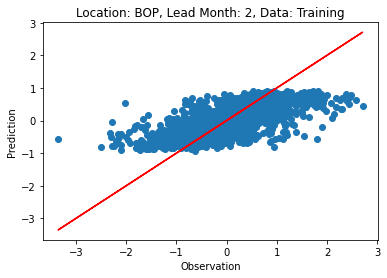

Location: BOP
Persistence MSE: 0.3339
Test MSE: 0.2997
Persist CSI: 0.2000
Persist CSI 80: 0.3684
Test CSI: 0.0000
Test CSI 80: 0.1818


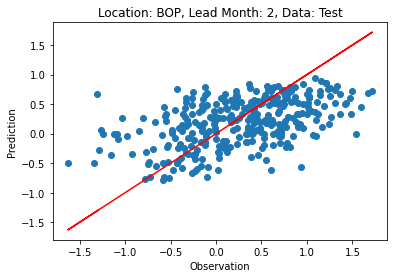

Location: W
90th Threshold: 1.3309087
80th Threshold: 0.85650176
Training Model 1
Epoch [20/400], Avg Loss: 5.2126,  Val MSE: 1.0185
Epoch [40/400], Avg Loss: 1.4502,  Val MSE: 0.9993
Epoch [60/400], Avg Loss: 1.0444,  Val MSE: 0.9171
Epoch [80/400], Avg Loss: 0.9658,  Val MSE: 0.9033
Epoch [100/400], Avg Loss: 0.9202,  Val MSE: 0.9087
Epoch [120/400], Avg Loss: 0.8886,  Val MSE: 0.9196
Epoch [140/400], Avg Loss: 0.8636,  Val MSE: 0.9269
Epoch [160/400], Avg Loss: 0.8437,  Val MSE: 0.9319
Epoch [180/400], Avg Loss: 0.8287,  Val MSE: 0.9357
Epoch [200/400], Avg Loss: 0.8177,  Val MSE: 0.9383
Epoch [220/400], Avg Loss: 0.8117,  Val MSE: 0.9398
Epoch [240/400], Avg Loss: 0.8081,  Val MSE: 0.9406
Epoch [260/400], Avg Loss: 0.8058,  Val MSE: 0.9419
Epoch [280/400], Avg Loss: 0.8041,  Val MSE: 0.9430
Epoch [300/400], Avg Loss: 0.8021,  Val MSE: 0.9437
Epoch [320/400], Avg Loss: 0.7998,  Val MSE: 0.9439
Epoch [340/400], Avg Loss: 0.7977,  Val MSE: 0.9446
Epoch [360/400], Avg Loss: 0.7958,  Va

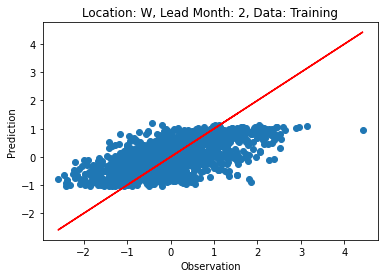

Training Model 2
Epoch [20/400], Avg Loss: 5.1803,  Val MSE: 1.0205
Epoch [40/400], Avg Loss: 1.4189,  Val MSE: 0.9903
Epoch [60/400], Avg Loss: 0.9962,  Val MSE: 0.9102
Epoch [80/400], Avg Loss: 0.9144,  Val MSE: 0.9019
Epoch [100/400], Avg Loss: 0.8731,  Val MSE: 0.9101
Epoch [120/400], Avg Loss: 0.8468,  Val MSE: 0.9184
Epoch [140/400], Avg Loss: 0.8280,  Val MSE: 0.9259
Epoch [160/400], Avg Loss: 0.8144,  Val MSE: 0.9320
Epoch [180/400], Avg Loss: 0.8040,  Val MSE: 0.9355
Epoch [200/400], Avg Loss: 0.7960,  Val MSE: 0.9381
Epoch [220/400], Avg Loss: 0.7903,  Val MSE: 0.9414
Epoch [240/400], Avg Loss: 0.7863,  Val MSE: 0.9441
Epoch [260/400], Avg Loss: 0.7835,  Val MSE: 0.9453
Epoch [280/400], Avg Loss: 0.7812,  Val MSE: 0.9457
Epoch [300/400], Avg Loss: 0.7801,  Val MSE: 0.9461
Epoch [320/400], Avg Loss: 0.7792,  Val MSE: 0.9470
Epoch [340/400], Avg Loss: 0.7782,  Val MSE: 0.9481
Epoch [360/400], Avg Loss: 0.7772,  Val MSE: 0.9490
Epoch [380/400], Avg Loss: 0.7762,  Val MSE: 0.9497

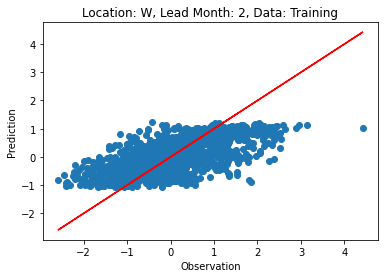

Training Model 3
Epoch [20/400], Avg Loss: 5.1821,  Val MSE: 1.0377
Epoch [40/400], Avg Loss: 1.3831,  Val MSE: 0.9783
Epoch [60/400], Avg Loss: 0.9847,  Val MSE: 0.9132
Epoch [80/400], Avg Loss: 0.9054,  Val MSE: 0.9106
Epoch [100/400], Avg Loss: 0.8650,  Val MSE: 0.9200
Epoch [120/400], Avg Loss: 0.8428,  Val MSE: 0.9276
Epoch [140/400], Avg Loss: 0.8288,  Val MSE: 0.9312
Epoch [160/400], Avg Loss: 0.8185,  Val MSE: 0.9328
Epoch [180/400], Avg Loss: 0.8098,  Val MSE: 0.9338
Epoch [200/400], Avg Loss: 0.8036,  Val MSE: 0.9343
Epoch [220/400], Avg Loss: 0.7999,  Val MSE: 0.9349
Epoch [240/400], Avg Loss: 0.7967,  Val MSE: 0.9358
Epoch [260/400], Avg Loss: 0.7936,  Val MSE: 0.9363
Epoch [280/400], Avg Loss: 0.7913,  Val MSE: 0.9375
Epoch [300/400], Avg Loss: 0.7897,  Val MSE: 0.9385
Epoch [320/400], Avg Loss: 0.7881,  Val MSE: 0.9396
Epoch [340/400], Avg Loss: 0.7864,  Val MSE: 0.9407
Epoch [360/400], Avg Loss: 0.7844,  Val MSE: 0.9418
Epoch [380/400], Avg Loss: 0.7821,  Val MSE: 0.9430

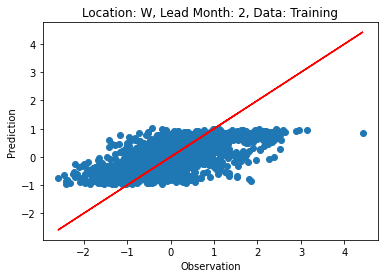

Training Model 4
Epoch [20/400], Avg Loss: 5.2207,  Val MSE: 1.0244
Epoch [40/400], Avg Loss: 1.3672,  Val MSE: 0.9713
Epoch [60/400], Avg Loss: 0.9682,  Val MSE: 0.9057
Epoch [80/400], Avg Loss: 0.9007,  Val MSE: 0.9043
Epoch [100/400], Avg Loss: 0.8696,  Val MSE: 0.9157
Epoch [120/400], Avg Loss: 0.8496,  Val MSE: 0.9242
Epoch [140/400], Avg Loss: 0.8347,  Val MSE: 0.9276
Epoch [160/400], Avg Loss: 0.8227,  Val MSE: 0.9355
Epoch [180/400], Avg Loss: 0.8124,  Val MSE: 0.9394
Epoch [200/400], Avg Loss: 0.8058,  Val MSE: 0.9419
Epoch [220/400], Avg Loss: 0.8014,  Val MSE: 0.9452
Epoch [240/400], Avg Loss: 0.7978,  Val MSE: 0.9465
Epoch [260/400], Avg Loss: 0.7952,  Val MSE: 0.9476
Epoch [280/400], Avg Loss: 0.7931,  Val MSE: 0.9488
Epoch [300/400], Avg Loss: 0.7910,  Val MSE: 0.9501
Epoch [320/400], Avg Loss: 0.7885,  Val MSE: 0.9512
Epoch [340/400], Avg Loss: 0.7865,  Val MSE: 0.9521
Epoch [360/400], Avg Loss: 0.7850,  Val MSE: 0.9527
Epoch [380/400], Avg Loss: 0.7833,  Val MSE: 0.9537

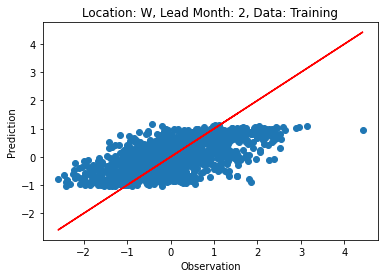

Training Model 5
Epoch [20/400], Avg Loss: 5.1918,  Val MSE: 1.0395
Epoch [40/400], Avg Loss: 1.4243,  Val MSE: 0.9967
Epoch [60/400], Avg Loss: 1.0083,  Val MSE: 0.9134
Epoch [80/400], Avg Loss: 0.9158,  Val MSE: 0.9016
Epoch [100/400], Avg Loss: 0.8762,  Val MSE: 0.9116
Epoch [120/400], Avg Loss: 0.8533,  Val MSE: 0.9219
Epoch [140/400], Avg Loss: 0.8383,  Val MSE: 0.9277
Epoch [160/400], Avg Loss: 0.8274,  Val MSE: 0.9315
Epoch [180/400], Avg Loss: 0.8195,  Val MSE: 0.9332
Epoch [200/400], Avg Loss: 0.8143,  Val MSE: 0.9336
Epoch [220/400], Avg Loss: 0.8103,  Val MSE: 0.9336
Epoch [240/400], Avg Loss: 0.8074,  Val MSE: 0.9337
Epoch [260/400], Avg Loss: 0.8047,  Val MSE: 0.9337
Epoch [280/400], Avg Loss: 0.8027,  Val MSE: 0.9340
Epoch [300/400], Avg Loss: 0.8012,  Val MSE: 0.9347
Epoch [320/400], Avg Loss: 0.8003,  Val MSE: 0.9355
Epoch [340/400], Avg Loss: 0.7993,  Val MSE: 0.9366
Epoch [360/400], Avg Loss: 0.7979,  Val MSE: 0.9378
Epoch [380/400], Avg Loss: 0.7963,  Val MSE: 0.9386

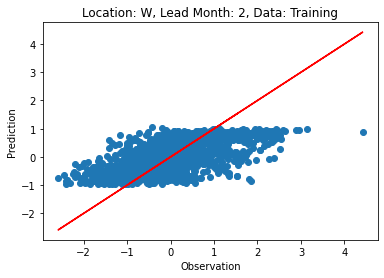

Location: W
Persistence MSE: 1.0450
Test MSE: 0.9448
Persist CSI: 0.2745
Persist CSI 80: 0.3898
Test CSI: 0.0000
Test CSI 80: 0.1805


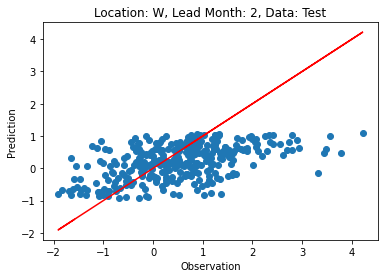

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.7103322
Training Model 1
Epoch [20/400], Avg Loss: 5.0932,  Val MSE: 0.6207
Epoch [40/400], Avg Loss: 1.3314,  Val MSE: 0.6068
Epoch [60/400], Avg Loss: 0.9193,  Val MSE: 0.5935
Epoch [80/400], Avg Loss: 0.8327,  Val MSE: 0.5978
Epoch [100/400], Avg Loss: 0.7876,  Val MSE: 0.6093
Epoch [120/400], Avg Loss: 0.7607,  Val MSE: 0.6218
Epoch [140/400], Avg Loss: 0.7412,  Val MSE: 0.6323
Epoch [160/400], Avg Loss: 0.7265,  Val MSE: 0.6398
Epoch [180/400], Avg Loss: 0.7159,  Val MSE: 0.6444
Epoch [200/400], Avg Loss: 0.7086,  Val MSE: 0.6476
Epoch [220/400], Avg Loss: 0.7037,  Val MSE: 0.6502
Epoch [240/400], Avg Loss: 0.6984,  Val MSE: 0.6519
Epoch [260/400], Avg Loss: 0.6942,  Val MSE: 0.6534
Epoch [280/400], Avg Loss: 0.6915,  Val MSE: 0.6548
Epoch [300/400], Avg Loss: 0.6898,  Val MSE: 0.6558
Epoch [320/400], Avg Loss: 0.6882,  Val MSE: 0.6568
Epoch [340/400], Avg Loss: 0.6864,  Val MSE: 0.6580
Epoch [360/400], Avg Loss: 0.6844,  Val

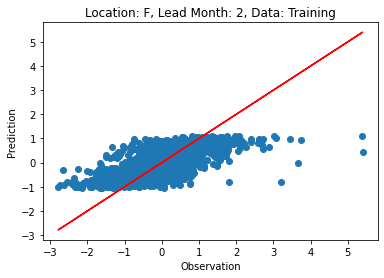

Training Model 2
Epoch [20/400], Avg Loss: 5.1579,  Val MSE: 0.6107
Epoch [40/400], Avg Loss: 1.3248,  Val MSE: 0.6065
Epoch [60/400], Avg Loss: 0.9009,  Val MSE: 0.5954
Epoch [80/400], Avg Loss: 0.8293,  Val MSE: 0.5957
Epoch [100/400], Avg Loss: 0.7940,  Val MSE: 0.6048
Epoch [120/400], Avg Loss: 0.7716,  Val MSE: 0.6157
Epoch [140/400], Avg Loss: 0.7550,  Val MSE: 0.6257
Epoch [160/400], Avg Loss: 0.7413,  Val MSE: 0.6337
Epoch [180/400], Avg Loss: 0.7297,  Val MSE: 0.6394
Epoch [200/400], Avg Loss: 0.7205,  Val MSE: 0.6436
Epoch [220/400], Avg Loss: 0.7135,  Val MSE: 0.6467
Epoch [240/400], Avg Loss: 0.7082,  Val MSE: 0.6488
Epoch [260/400], Avg Loss: 0.7044,  Val MSE: 0.6506
Epoch [280/400], Avg Loss: 0.7014,  Val MSE: 0.6520
Epoch [300/400], Avg Loss: 0.6987,  Val MSE: 0.6531
Epoch [320/400], Avg Loss: 0.6964,  Val MSE: 0.6543
Epoch [340/400], Avg Loss: 0.6945,  Val MSE: 0.6553
Epoch [360/400], Avg Loss: 0.6926,  Val MSE: 0.6563
Epoch [380/400], Avg Loss: 0.6902,  Val MSE: 0.6575

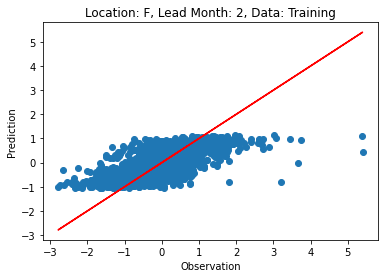

Training Model 3
Epoch [20/400], Avg Loss: 5.1428,  Val MSE: 0.6327
Epoch [40/400], Avg Loss: 1.2987,  Val MSE: 0.6105
Epoch [60/400], Avg Loss: 0.9083,  Val MSE: 0.5976
Epoch [80/400], Avg Loss: 0.8254,  Val MSE: 0.5986
Epoch [100/400], Avg Loss: 0.7873,  Val MSE: 0.6044
Epoch [120/400], Avg Loss: 0.7678,  Val MSE: 0.6135
Epoch [140/400], Avg Loss: 0.7528,  Val MSE: 0.6218
Epoch [160/400], Avg Loss: 0.7394,  Val MSE: 0.6266
Epoch [180/400], Avg Loss: 0.7266,  Val MSE: 0.6301
Epoch [200/400], Avg Loss: 0.7153,  Val MSE: 0.6329
Epoch [220/400], Avg Loss: 0.7067,  Val MSE: 0.6356
Epoch [240/400], Avg Loss: 0.7014,  Val MSE: 0.6360
Epoch [260/400], Avg Loss: 0.6976,  Val MSE: 0.6361
Epoch [280/400], Avg Loss: 0.6946,  Val MSE: 0.6358
Epoch [300/400], Avg Loss: 0.6920,  Val MSE: 0.6358
Epoch [320/400], Avg Loss: 0.6906,  Val MSE: 0.6354
Epoch [340/400], Avg Loss: 0.6892,  Val MSE: 0.6356
Epoch [360/400], Avg Loss: 0.6877,  Val MSE: 0.6357
Epoch [380/400], Avg Loss: 0.6861,  Val MSE: 0.6354

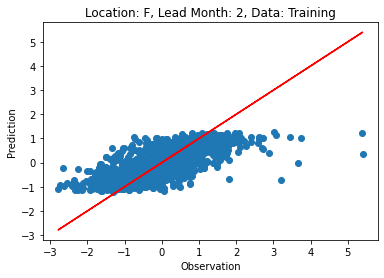

Training Model 4
Epoch [20/400], Avg Loss: 5.0738,  Val MSE: 0.6350
Epoch [40/400], Avg Loss: 1.2516,  Val MSE: 0.6025
Epoch [60/400], Avg Loss: 0.8798,  Val MSE: 0.5978
Epoch [80/400], Avg Loss: 0.8114,  Val MSE: 0.5997
Epoch [100/400], Avg Loss: 0.7763,  Val MSE: 0.6080
Epoch [120/400], Avg Loss: 0.7541,  Val MSE: 0.6202
Epoch [140/400], Avg Loss: 0.7364,  Val MSE: 0.6280
Epoch [160/400], Avg Loss: 0.7216,  Val MSE: 0.6316
Epoch [180/400], Avg Loss: 0.7109,  Val MSE: 0.6344
Epoch [200/400], Avg Loss: 0.7040,  Val MSE: 0.6370
Epoch [220/400], Avg Loss: 0.6999,  Val MSE: 0.6383
Epoch [240/400], Avg Loss: 0.6963,  Val MSE: 0.6391
Epoch [260/400], Avg Loss: 0.6928,  Val MSE: 0.6395
Epoch [280/400], Avg Loss: 0.6896,  Val MSE: 0.6395
Epoch [300/400], Avg Loss: 0.6865,  Val MSE: 0.6397
Epoch [320/400], Avg Loss: 0.6843,  Val MSE: 0.6402
Epoch [340/400], Avg Loss: 0.6822,  Val MSE: 0.6406
Epoch [360/400], Avg Loss: 0.6808,  Val MSE: 0.6408
Epoch [380/400], Avg Loss: 0.6799,  Val MSE: 0.6410

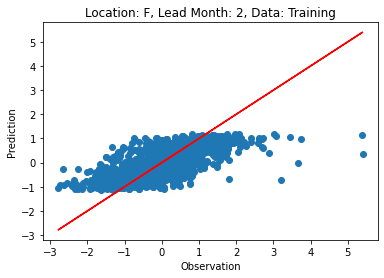

Training Model 5
Epoch [20/400], Avg Loss: 5.0937,  Val MSE: 0.6167
Epoch [40/400], Avg Loss: 1.3138,  Val MSE: 0.6058
Epoch [60/400], Avg Loss: 0.9241,  Val MSE: 0.5941
Epoch [80/400], Avg Loss: 0.8426,  Val MSE: 0.5960
Epoch [100/400], Avg Loss: 0.7972,  Val MSE: 0.6040
Epoch [120/400], Avg Loss: 0.7662,  Val MSE: 0.6160
Epoch [140/400], Avg Loss: 0.7468,  Val MSE: 0.6272
Epoch [160/400], Avg Loss: 0.7335,  Val MSE: 0.6358
Epoch [180/400], Avg Loss: 0.7233,  Val MSE: 0.6416
Epoch [200/400], Avg Loss: 0.7147,  Val MSE: 0.6459
Epoch [220/400], Avg Loss: 0.7075,  Val MSE: 0.6493
Epoch [240/400], Avg Loss: 0.7018,  Val MSE: 0.6517
Epoch [260/400], Avg Loss: 0.6966,  Val MSE: 0.6539
Epoch [280/400], Avg Loss: 0.6916,  Val MSE: 0.6558
Epoch [300/400], Avg Loss: 0.6865,  Val MSE: 0.6573
Epoch [320/400], Avg Loss: 0.6816,  Val MSE: 0.6583
Epoch [340/400], Avg Loss: 0.6780,  Val MSE: 0.6592
Epoch [360/400], Avg Loss: 0.6755,  Val MSE: 0.6597
Epoch [380/400], Avg Loss: 0.6735,  Val MSE: 0.6603

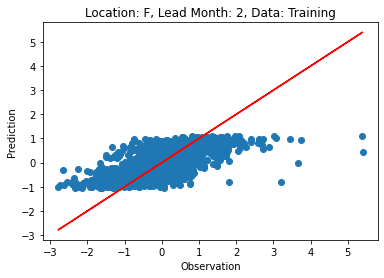

Location: F
Persistence MSE: 0.7640
Test MSE: 0.6498
Persist CSI: 0.3407
Persist CSI 80: 0.4198
Test CSI: 0.0000
Test CSI 80: 0.3084


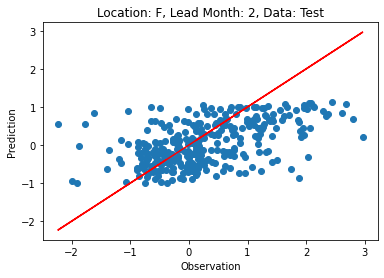

Location: CI
90th Threshold: 1.3160555
80th Threshold: 0.7399338
Training Model 1
Epoch [20/400], Avg Loss: 5.0313,  Val MSE: 0.5263
Epoch [40/400], Avg Loss: 1.2471,  Val MSE: 0.5015
Epoch [60/400], Avg Loss: 0.8438,  Val MSE: 0.5019
Epoch [80/400], Avg Loss: 0.7732,  Val MSE: 0.5075
Epoch [100/400], Avg Loss: 0.7371,  Val MSE: 0.5108
Epoch [120/400], Avg Loss: 0.7135,  Val MSE: 0.5128
Epoch [140/400], Avg Loss: 0.6978,  Val MSE: 0.5139
Epoch [160/400], Avg Loss: 0.6865,  Val MSE: 0.5150
Epoch [180/400], Avg Loss: 0.6773,  Val MSE: 0.5159
Epoch [200/400], Avg Loss: 0.6692,  Val MSE: 0.5173
Epoch [220/400], Avg Loss: 0.6625,  Val MSE: 0.5188
Epoch [240/400], Avg Loss: 0.6570,  Val MSE: 0.5203
Epoch [260/400], Avg Loss: 0.6529,  Val MSE: 0.5218
Epoch [280/400], Avg Loss: 0.6493,  Val MSE: 0.5232
Epoch [300/400], Avg Loss: 0.6458,  Val MSE: 0.5243
Epoch [320/400], Avg Loss: 0.6425,  Val MSE: 0.5253
Epoch [340/400], Avg Loss: 0.6389,  Val MSE: 0.5261
Epoch [360/400], Avg Loss: 0.6357,  Va

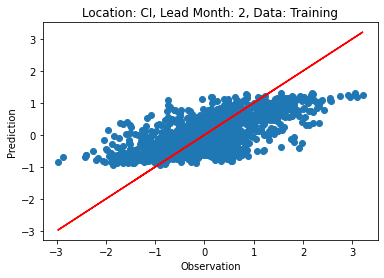

Training Model 2
Epoch [20/400], Avg Loss: 4.9963,  Val MSE: 0.5263
Epoch [40/400], Avg Loss: 1.2929,  Val MSE: 0.5003
Epoch [60/400], Avg Loss: 0.8785,  Val MSE: 0.4979
Epoch [80/400], Avg Loss: 0.7828,  Val MSE: 0.5062
Epoch [100/400], Avg Loss: 0.7396,  Val MSE: 0.5118
Epoch [120/400], Avg Loss: 0.7120,  Val MSE: 0.5149
Epoch [140/400], Avg Loss: 0.6924,  Val MSE: 0.5176
Epoch [160/400], Avg Loss: 0.6765,  Val MSE: 0.5195
Epoch [180/400], Avg Loss: 0.6636,  Val MSE: 0.5214
Epoch [200/400], Avg Loss: 0.6526,  Val MSE: 0.5229
Epoch [220/400], Avg Loss: 0.6434,  Val MSE: 0.5237
Epoch [240/400], Avg Loss: 0.6367,  Val MSE: 0.5240
Epoch [260/400], Avg Loss: 0.6318,  Val MSE: 0.5247
Epoch [280/400], Avg Loss: 0.6277,  Val MSE: 0.5258
Epoch [300/400], Avg Loss: 0.6246,  Val MSE: 0.5269
Epoch [320/400], Avg Loss: 0.6217,  Val MSE: 0.5284
Epoch [340/400], Avg Loss: 0.6187,  Val MSE: 0.5301
Epoch [360/400], Avg Loss: 0.6167,  Val MSE: 0.5320
Epoch [380/400], Avg Loss: 0.6146,  Val MSE: 0.5336

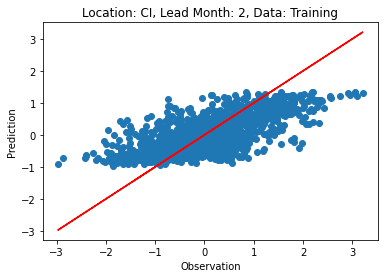

Training Model 3
Epoch [20/400], Avg Loss: 4.9906,  Val MSE: 0.5379
Epoch [40/400], Avg Loss: 1.2572,  Val MSE: 0.5011
Epoch [60/400], Avg Loss: 0.8373,  Val MSE: 0.5036
Epoch [80/400], Avg Loss: 0.7566,  Val MSE: 0.5118
Epoch [100/400], Avg Loss: 0.7203,  Val MSE: 0.5155
Epoch [120/400], Avg Loss: 0.6984,  Val MSE: 0.5175
Epoch [140/400], Avg Loss: 0.6849,  Val MSE: 0.5194
Epoch [160/400], Avg Loss: 0.6750,  Val MSE: 0.5210
Epoch [180/400], Avg Loss: 0.6679,  Val MSE: 0.5225
Epoch [200/400], Avg Loss: 0.6626,  Val MSE: 0.5239
Epoch [220/400], Avg Loss: 0.6577,  Val MSE: 0.5251
Epoch [240/400], Avg Loss: 0.6537,  Val MSE: 0.5263
Epoch [260/400], Avg Loss: 0.6503,  Val MSE: 0.5272
Epoch [280/400], Avg Loss: 0.6472,  Val MSE: 0.5280
Epoch [300/400], Avg Loss: 0.6442,  Val MSE: 0.5289
Epoch [320/400], Avg Loss: 0.6406,  Val MSE: 0.5298
Epoch [340/400], Avg Loss: 0.6368,  Val MSE: 0.5303
Epoch [360/400], Avg Loss: 0.6337,  Val MSE: 0.5306
Epoch [380/400], Avg Loss: 0.6309,  Val MSE: 0.5310

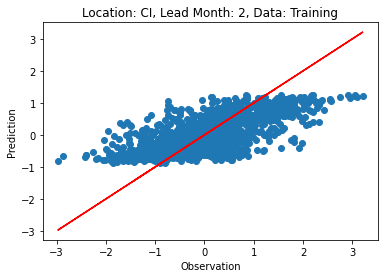

Training Model 4
Epoch [20/400], Avg Loss: 5.0026,  Val MSE: 0.5281
Epoch [40/400], Avg Loss: 1.3138,  Val MSE: 0.5019
Epoch [60/400], Avg Loss: 0.8834,  Val MSE: 0.4968
Epoch [80/400], Avg Loss: 0.7908,  Val MSE: 0.5069
Epoch [100/400], Avg Loss: 0.7461,  Val MSE: 0.5144
Epoch [120/400], Avg Loss: 0.7151,  Val MSE: 0.5175
Epoch [140/400], Avg Loss: 0.6930,  Val MSE: 0.5196
Epoch [160/400], Avg Loss: 0.6776,  Val MSE: 0.5207
Epoch [180/400], Avg Loss: 0.6687,  Val MSE: 0.5215
Epoch [200/400], Avg Loss: 0.6632,  Val MSE: 0.5225
Epoch [220/400], Avg Loss: 0.6592,  Val MSE: 0.5231
Epoch [240/400], Avg Loss: 0.6550,  Val MSE: 0.5237
Epoch [260/400], Avg Loss: 0.6506,  Val MSE: 0.5241
Epoch [280/400], Avg Loss: 0.6466,  Val MSE: 0.5245
Epoch [300/400], Avg Loss: 0.6429,  Val MSE: 0.5250
Epoch [320/400], Avg Loss: 0.6399,  Val MSE: 0.5255
Epoch [340/400], Avg Loss: 0.6365,  Val MSE: 0.5261
Epoch [360/400], Avg Loss: 0.6335,  Val MSE: 0.5267
Epoch [380/400], Avg Loss: 0.6308,  Val MSE: 0.5275

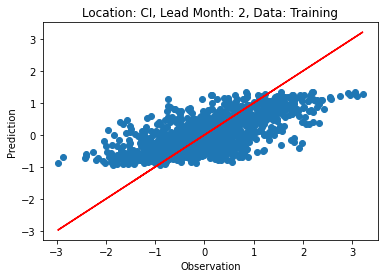

Training Model 5
Epoch [20/400], Avg Loss: 5.0143,  Val MSE: 0.5253
Epoch [40/400], Avg Loss: 1.2552,  Val MSE: 0.4990
Epoch [60/400], Avg Loss: 0.8641,  Val MSE: 0.5011
Epoch [80/400], Avg Loss: 0.7832,  Val MSE: 0.5106
Epoch [100/400], Avg Loss: 0.7430,  Val MSE: 0.5144
Epoch [120/400], Avg Loss: 0.7188,  Val MSE: 0.5161
Epoch [140/400], Avg Loss: 0.7015,  Val MSE: 0.5174
Epoch [160/400], Avg Loss: 0.6901,  Val MSE: 0.5184
Epoch [180/400], Avg Loss: 0.6812,  Val MSE: 0.5188
Epoch [200/400], Avg Loss: 0.6730,  Val MSE: 0.5181
Epoch [220/400], Avg Loss: 0.6656,  Val MSE: 0.5193
Epoch [240/400], Avg Loss: 0.6590,  Val MSE: 0.5211
Epoch [260/400], Avg Loss: 0.6523,  Val MSE: 0.5220
Epoch [280/400], Avg Loss: 0.6471,  Val MSE: 0.5234
Epoch [300/400], Avg Loss: 0.6437,  Val MSE: 0.5246
Epoch [320/400], Avg Loss: 0.6405,  Val MSE: 0.5257
Epoch [340/400], Avg Loss: 0.6381,  Val MSE: 0.5266
Epoch [360/400], Avg Loss: 0.6362,  Val MSE: 0.5271
Epoch [380/400], Avg Loss: 0.6354,  Val MSE: 0.5275

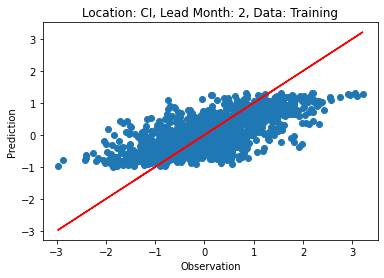

Location: CI
Persistence MSE: 0.7036
Test MSE: 0.5285
Persist CSI: 0.0370
Persist CSI 80: 0.1868
Test CSI: 0.0000
Test CSI 80: 0.1406


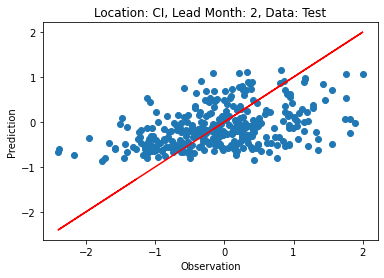

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.7080992
Training Model 1
Epoch [20/400], Avg Loss: 4.9739,  Val MSE: 0.4081
Epoch [40/400], Avg Loss: 1.1909,  Val MSE: 0.4137
Epoch [60/400], Avg Loss: 0.7980,  Val MSE: 0.3914
Epoch [80/400], Avg Loss: 0.7251,  Val MSE: 0.3934
Epoch [100/400], Avg Loss: 0.6875,  Val MSE: 0.3982
Epoch [120/400], Avg Loss: 0.6663,  Val MSE: 0.4020
Epoch [140/400], Avg Loss: 0.6508,  Val MSE: 0.4045
Epoch [160/400], Avg Loss: 0.6395,  Val MSE: 0.4067
Epoch [180/400], Avg Loss: 0.6314,  Val MSE: 0.4093
Epoch [200/400], Avg Loss: 0.6245,  Val MSE: 0.4120
Epoch [220/400], Avg Loss: 0.6178,  Val MSE: 0.4145
Epoch [240/400], Avg Loss: 0.6123,  Val MSE: 0.4165
Epoch [260/400], Avg Loss: 0.6083,  Val MSE: 0.4181
Epoch [280/400], Avg Loss: 0.6062,  Val MSE: 0.4195
Epoch [300/400], Avg Loss: 0.6048,  Val MSE: 0.4208
Epoch [320/400], Avg Loss: 0.6037,  Val MSE: 0.4218
Epoch [340/400], Avg Loss: 0.6027,  Val MSE: 0.4226
Epoch [360/400], Avg Loss: 0.6014,  Va

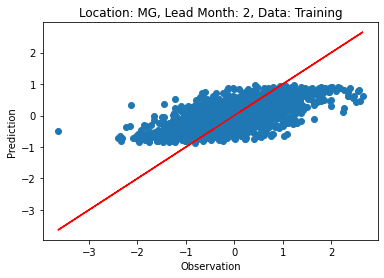

Training Model 2
Epoch [20/400], Avg Loss: 5.0039,  Val MSE: 0.3999
Epoch [40/400], Avg Loss: 1.1884,  Val MSE: 0.4122
Epoch [60/400], Avg Loss: 0.7845,  Val MSE: 0.3952
Epoch [80/400], Avg Loss: 0.7203,  Val MSE: 0.3947
Epoch [100/400], Avg Loss: 0.6926,  Val MSE: 0.3957
Epoch [120/400], Avg Loss: 0.6755,  Val MSE: 0.3979
Epoch [140/400], Avg Loss: 0.6631,  Val MSE: 0.3997
Epoch [160/400], Avg Loss: 0.6541,  Val MSE: 0.4008
Epoch [180/400], Avg Loss: 0.6456,  Val MSE: 0.4021
Epoch [200/400], Avg Loss: 0.6364,  Val MSE: 0.4036
Epoch [220/400], Avg Loss: 0.6282,  Val MSE: 0.4049
Epoch [240/400], Avg Loss: 0.6217,  Val MSE: 0.4065
Epoch [260/400], Avg Loss: 0.6168,  Val MSE: 0.4085
Epoch [280/400], Avg Loss: 0.6127,  Val MSE: 0.4106
Epoch [300/400], Avg Loss: 0.6084,  Val MSE: 0.4125
Epoch [320/400], Avg Loss: 0.6046,  Val MSE: 0.4145
Epoch [340/400], Avg Loss: 0.6010,  Val MSE: 0.4163
Epoch [360/400], Avg Loss: 0.5979,  Val MSE: 0.4179
Epoch [380/400], Avg Loss: 0.5951,  Val MSE: 0.4195

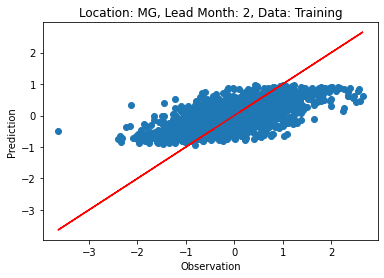

Training Model 3
Epoch [20/400], Avg Loss: 4.9519,  Val MSE: 0.4054
Epoch [40/400], Avg Loss: 1.1759,  Val MSE: 0.4140
Epoch [60/400], Avg Loss: 0.7556,  Val MSE: 0.3954
Epoch [80/400], Avg Loss: 0.7008,  Val MSE: 0.3960
Epoch [100/400], Avg Loss: 0.6752,  Val MSE: 0.3991
Epoch [120/400], Avg Loss: 0.6600,  Val MSE: 0.4014
Epoch [140/400], Avg Loss: 0.6494,  Val MSE: 0.4031
Epoch [160/400], Avg Loss: 0.6395,  Val MSE: 0.4043
Epoch [180/400], Avg Loss: 0.6300,  Val MSE: 0.4054
Epoch [200/400], Avg Loss: 0.6224,  Val MSE: 0.4066
Epoch [220/400], Avg Loss: 0.6155,  Val MSE: 0.4077
Epoch [240/400], Avg Loss: 0.6104,  Val MSE: 0.4086
Epoch [260/400], Avg Loss: 0.6068,  Val MSE: 0.4088
Epoch [280/400], Avg Loss: 0.6051,  Val MSE: 0.4089
Epoch [300/400], Avg Loss: 0.6033,  Val MSE: 0.4092
Epoch [320/400], Avg Loss: 0.6014,  Val MSE: 0.4094
Epoch [340/400], Avg Loss: 0.5994,  Val MSE: 0.4096
Epoch [360/400], Avg Loss: 0.5979,  Val MSE: 0.4097
Epoch [380/400], Avg Loss: 0.5970,  Val MSE: 0.4099

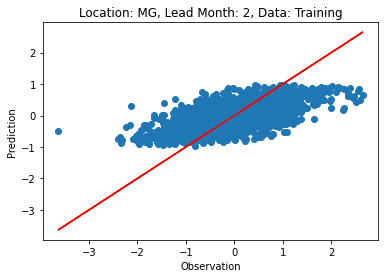

Training Model 4
Epoch [20/400], Avg Loss: 4.9679,  Val MSE: 0.4076
Epoch [40/400], Avg Loss: 1.1616,  Val MSE: 0.4074
Epoch [60/400], Avg Loss: 0.7713,  Val MSE: 0.3922
Epoch [80/400], Avg Loss: 0.7138,  Val MSE: 0.3946
Epoch [100/400], Avg Loss: 0.6830,  Val MSE: 0.3992
Epoch [120/400], Avg Loss: 0.6643,  Val MSE: 0.4025
Epoch [140/400], Avg Loss: 0.6511,  Val MSE: 0.4041
Epoch [160/400], Avg Loss: 0.6405,  Val MSE: 0.4060
Epoch [180/400], Avg Loss: 0.6333,  Val MSE: 0.4079
Epoch [200/400], Avg Loss: 0.6274,  Val MSE: 0.4103
Epoch [220/400], Avg Loss: 0.6226,  Val MSE: 0.4126
Epoch [240/400], Avg Loss: 0.6193,  Val MSE: 0.4149
Epoch [260/400], Avg Loss: 0.6160,  Val MSE: 0.4169
Epoch [280/400], Avg Loss: 0.6126,  Val MSE: 0.4188
Epoch [300/400], Avg Loss: 0.6098,  Val MSE: 0.4205
Epoch [320/400], Avg Loss: 0.6069,  Val MSE: 0.4221
Epoch [340/400], Avg Loss: 0.6043,  Val MSE: 0.4234
Epoch [360/400], Avg Loss: 0.6017,  Val MSE: 0.4248
Epoch [380/400], Avg Loss: 0.5987,  Val MSE: 0.4259

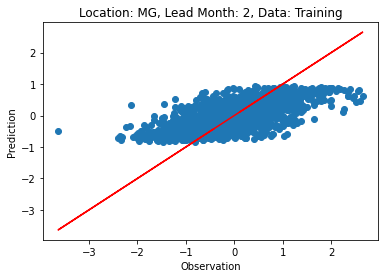

Training Model 5
Epoch [20/400], Avg Loss: 5.0141,  Val MSE: 0.4060
Epoch [40/400], Avg Loss: 1.1468,  Val MSE: 0.4084
Epoch [60/400], Avg Loss: 0.7456,  Val MSE: 0.3961
Epoch [80/400], Avg Loss: 0.6875,  Val MSE: 0.3988
Epoch [100/400], Avg Loss: 0.6632,  Val MSE: 0.4019
Epoch [120/400], Avg Loss: 0.6504,  Val MSE: 0.4041
Epoch [140/400], Avg Loss: 0.6387,  Val MSE: 0.4064
Epoch [160/400], Avg Loss: 0.6279,  Val MSE: 0.4090
Epoch [180/400], Avg Loss: 0.6192,  Val MSE: 0.4116
Epoch [200/400], Avg Loss: 0.6122,  Val MSE: 0.4147
Epoch [220/400], Avg Loss: 0.6065,  Val MSE: 0.4173
Epoch [240/400], Avg Loss: 0.6019,  Val MSE: 0.4194
Epoch [260/400], Avg Loss: 0.5982,  Val MSE: 0.4211
Epoch [280/400], Avg Loss: 0.5960,  Val MSE: 0.4225
Epoch [300/400], Avg Loss: 0.5942,  Val MSE: 0.4238
Epoch [320/400], Avg Loss: 0.5927,  Val MSE: 0.4251
Epoch [340/400], Avg Loss: 0.5916,  Val MSE: 0.4262
Epoch [360/400], Avg Loss: 0.5905,  Val MSE: 0.4272
Epoch [380/400], Avg Loss: 0.5893,  Val MSE: 0.4280

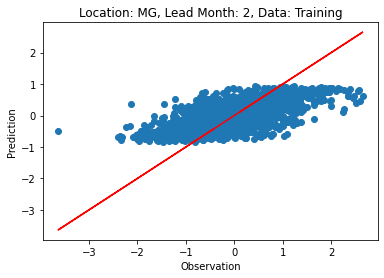

Location: MG
Persistence MSE: 0.5289
Test MSE: 0.4216
Persist CSI: 0.2812
Persist CSI 80: 0.2581
Test CSI: 0.0000
Test CSI 80: 0.2258


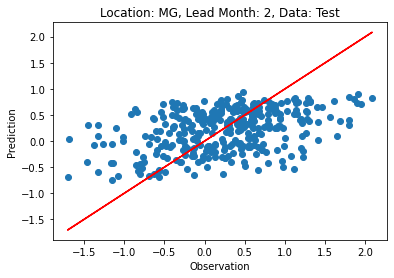

Location  Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
7       BOP           0.3339       0.2000          0.3684    0.2997       0.0   
6        BP           0.8608       0.0556          0.1477    0.5798       0.0   
10       CI           0.7036       0.0370          0.1868    0.5285       0.0   
3        CR           0.4255       0.2078          0.3636    0.3740       0.0   
1        CS           0.2569       0.2692          0.3898    0.2327       0.0   
9         F           0.7640       0.3407          0.4198    0.6498       0.0   
11       MG           0.5289       0.2812          0.2581    0.4216       0.0   
4        OP           0.6335       0.1923          0.1979    0.5004       0.0   
0         R           0.5123       0.3091          0.4586    0.4687       0.0   
2        SI           0.5382       0.2308          0.2832    0.4346       0.0   
5         T           0.8856       0.2462          0.3443    0.8610       0.0   
8         W           1.0450       0.2745          0.3898    0.9448       0.0   

    Test CSI 80  Training Time  
7        0.1818        22.3693  
6        0.1324        22.2763  
10       0.1406        22.5064  
3        0.1600        22.3860  
1        0.3426        22.4155  
9        0.3084        22.3326  
11       0.2258        22.2642  
4        0.2564        22.6545  
0        0.2049        23.5724  
2        0.2600        22.6813  
5        0.2426        22.2724  
8        0.1805        22.3836

Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
Mean            0.624       0.2204          0.3173    0.5246       0.0   

      Test CSI 80  Training Time  
Mean       0.2197        22.5095

In [ ]:
net_class = 'FCN'
num_layer = 3
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [2]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1

    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        all_preds = []
        all_time = []

        print('Location:', loc.upper())
        
        for model_num in range(5):

            y = nz[loc]
            y_all = y

            x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
            y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
            x_all = np.swapaxes(x_all, 1, 2)
            x_all_flat = np.array(x_all).reshape(-1, num_var*6)
            y_all = np.array(y_all)

            num_train = int(len(x_all) * train_split)
            x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
            x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

            # The threshold for defining outliers using the 90th percentile
            y_train_sorted = np.sort(y_train.numpy().squeeze())
            threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
            threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
            if model_num == 0:
                print('90th Threshold:', threshold)
                print('80th Threshold:', threshold_low)

            model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            criterion = nn.MSELoss()
            criterion_test = nn.MSELoss()

            print('Training Model {}'.format(model_num+1))

            # Start time
            start = time.time()

            for epoch in range(num_train_epochs):
                epoch_loss = 0
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    y_pred = model(x_batch)

                    loss = criterion(y_pred, y_batch)
                    
                    # Elastic Net Reg
                    # l1_ratio = 0 is the L2 reg.
                    # l1_ratio = 1 is the L1 reg.
                    l1_reg = 0.0
                    l2_reg = 0.0
                    for param in model.parameters():
                        l1_reg += torch.norm(param, 1)
                        l2_reg += torch.norm(param, 2)
                    loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                    optim.zero_grad()
                    loss.backward()
                    optim.step()
                    if (epoch+1) % 20 == 0:
                        #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                        epoch_loss += loss.item()
                with torch.no_grad():
                    y_pred = model(x_test)
                    val_mse = criterion_test(y_pred, y_test)     
                if (epoch+1) % 20 == 0:
                    epoch_loss /= len(x_train) // batch_size   
                    print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

            # End time
            stop = time.time()
            training_time = float(stop - start)
            all_time.append(training_time)

            with torch.no_grad():
                y_pred = model(x_train)

            plt.scatter(y_train, y_pred)
            x = y_train
            y = y_train
            plt.plot(x, y, color='red')
            plt.xlabel('Observation')
            plt.ylabel('Prediction')
            plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
            plt.show()

            with torch.no_grad():
                persist_mse = criterion_test(y_test[:-lead_time], y_test[lead_time:])
                y_pred = model(x_test)
                all_preds.append(y_pred.numpy())
        
        sum_preds = np.add.reduce(all_preds)
        avg_preds = sum_preds / (model_num + 1)

        print('Location:', loc.upper())

        test_mse = criterion_test(torch.tensor(avg_preds), y_test)
        print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
        print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in avg_preds]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in avg_preds]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, avg_preds)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(sum(all_time) / len(all_time), 4))

all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
display(test_results)

mean_row = pd.DataFrame(test_results.select_dtypes(include='number').mean(), columns=['Mean']).T
mean_row = mean_row.round(4)
mean_test_results = mean_row.copy()
display(mean_test_results)

Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7176127
Training Model 1
Epoch [20/400], Avg Loss: 5.0157,  Val MSE: 0.5399
Epoch [40/400], Avg Loss: 1.1746,  Val MSE: 0.6593
Epoch [60/400], Avg Loss: 0.8219,  Val MSE: 0.7014
Epoch [80/400], Avg Loss: 0.7843,  Val MSE: 0.7050
Epoch [100/400], Avg Loss: 0.7727,  Val MSE: 0.7052
Epoch [120/400], Avg Loss: 0.7666,  Val MSE: 0.7053
Epoch [140/400], Avg Loss: 0.7633,  Val MSE: 0.7053
Epoch [160/400], Avg Loss: 0.7622,  Val MSE: 0.7053
Epoch [180/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [200/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [220/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [240/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [260/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [280/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [300/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [320/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [340/400], Avg Loss: 0.7619,  Val MSE: 0.7053
Epoch [360/400], Avg Loss: 0.7619,  Val

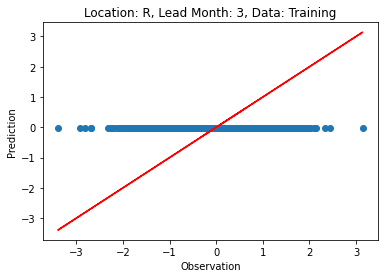

Training Model 2
Epoch [20/400], Avg Loss: 4.9845,  Val MSE: 0.5447
Epoch [40/400], Avg Loss: 1.1205,  Val MSE: 0.6097
Epoch [60/400], Avg Loss: 0.7646,  Val MSE: 0.5045
Epoch [80/400], Avg Loss: 0.7194,  Val MSE: 0.5022
Epoch [100/400], Avg Loss: 0.6968,  Val MSE: 0.5115
Epoch [120/400], Avg Loss: 0.6781,  Val MSE: 0.5212
Epoch [140/400], Avg Loss: 0.6617,  Val MSE: 0.5299
Epoch [160/400], Avg Loss: 0.6481,  Val MSE: 0.5355
Epoch [180/400], Avg Loss: 0.6383,  Val MSE: 0.5383
Epoch [200/400], Avg Loss: 0.6313,  Val MSE: 0.5395
Epoch [220/400], Avg Loss: 0.6264,  Val MSE: 0.5408
Epoch [240/400], Avg Loss: 0.6226,  Val MSE: 0.5419
Epoch [260/400], Avg Loss: 0.6197,  Val MSE: 0.5428
Epoch [280/400], Avg Loss: 0.6165,  Val MSE: 0.5440
Epoch [300/400], Avg Loss: 0.6136,  Val MSE: 0.5448
Epoch [320/400], Avg Loss: 0.6117,  Val MSE: 0.5455
Epoch [340/400], Avg Loss: 0.6111,  Val MSE: 0.5462
Epoch [360/400], Avg Loss: 0.6105,  Val MSE: 0.5466
Epoch [380/400], Avg Loss: 0.6099,  Val MSE: 0.5468

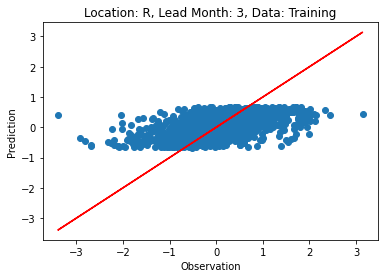

Training Model 3
Epoch [20/400], Avg Loss: 4.9681,  Val MSE: 0.5410
Epoch [40/400], Avg Loss: 1.1350,  Val MSE: 0.6197
Epoch [60/400], Avg Loss: 0.7692,  Val MSE: 0.5126
Epoch [80/400], Avg Loss: 0.7090,  Val MSE: 0.4996
Epoch [100/400], Avg Loss: 0.6790,  Val MSE: 0.5074
Epoch [120/400], Avg Loss: 0.6601,  Val MSE: 0.5165
Epoch [140/400], Avg Loss: 0.6482,  Val MSE: 0.5232
Epoch [160/400], Avg Loss: 0.6418,  Val MSE: 0.5276
Epoch [180/400], Avg Loss: 0.6379,  Val MSE: 0.5307
Epoch [200/400], Avg Loss: 0.6341,  Val MSE: 0.5328
Epoch [220/400], Avg Loss: 0.6298,  Val MSE: 0.5352
Epoch [240/400], Avg Loss: 0.6268,  Val MSE: 0.5373
Epoch [260/400], Avg Loss: 0.6236,  Val MSE: 0.5389
Epoch [280/400], Avg Loss: 0.6201,  Val MSE: 0.5407
Epoch [300/400], Avg Loss: 0.6169,  Val MSE: 0.5419
Epoch [320/400], Avg Loss: 0.6148,  Val MSE: 0.5427
Epoch [340/400], Avg Loss: 0.6128,  Val MSE: 0.5435
Epoch [360/400], Avg Loss: 0.6113,  Val MSE: 0.5440
Epoch [380/400], Avg Loss: 0.6103,  Val MSE: 0.5445

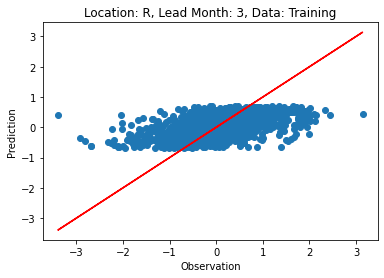

Training Model 4
Epoch [20/400], Avg Loss: 4.9803,  Val MSE: 0.5420
Epoch [40/400], Avg Loss: 1.1437,  Val MSE: 0.6201
Epoch [60/400], Avg Loss: 0.7713,  Val MSE: 0.5187
Epoch [80/400], Avg Loss: 0.7171,  Val MSE: 0.5050
Epoch [100/400], Avg Loss: 0.6948,  Val MSE: 0.5076
Epoch [120/400], Avg Loss: 0.6802,  Val MSE: 0.5123
Epoch [140/400], Avg Loss: 0.6696,  Val MSE: 0.5163
Epoch [160/400], Avg Loss: 0.6604,  Val MSE: 0.5201
Epoch [180/400], Avg Loss: 0.6551,  Val MSE: 0.5233
Epoch [200/400], Avg Loss: 0.6509,  Val MSE: 0.5261
Epoch [220/400], Avg Loss: 0.6472,  Val MSE: 0.5286
Epoch [240/400], Avg Loss: 0.6444,  Val MSE: 0.5302
Epoch [260/400], Avg Loss: 0.6427,  Val MSE: 0.5317
Epoch [280/400], Avg Loss: 0.6409,  Val MSE: 0.5329
Epoch [300/400], Avg Loss: 0.6387,  Val MSE: 0.5342
Epoch [320/400], Avg Loss: 0.6369,  Val MSE: 0.5356
Epoch [340/400], Avg Loss: 0.6347,  Val MSE: 0.5371
Epoch [360/400], Avg Loss: 0.6330,  Val MSE: 0.5388
Epoch [380/400], Avg Loss: 0.6314,  Val MSE: 0.5403

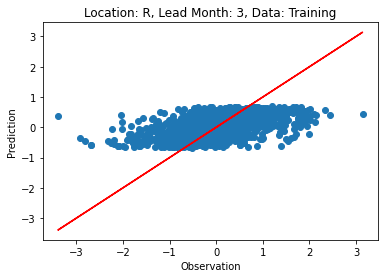

Training Model 5
Epoch [20/400], Avg Loss: 4.9899,  Val MSE: 0.5396
Epoch [40/400], Avg Loss: 1.1625,  Val MSE: 0.6340
Epoch [60/400], Avg Loss: 0.7877,  Val MSE: 0.5364
Epoch [80/400], Avg Loss: 0.7188,  Val MSE: 0.4998
Epoch [100/400], Avg Loss: 0.6927,  Val MSE: 0.5042
Epoch [120/400], Avg Loss: 0.6778,  Val MSE: 0.5091
Epoch [140/400], Avg Loss: 0.6670,  Val MSE: 0.5138
Epoch [160/400], Avg Loss: 0.6585,  Val MSE: 0.5199
Epoch [180/400], Avg Loss: 0.6511,  Val MSE: 0.5256
Epoch [200/400], Avg Loss: 0.6442,  Val MSE: 0.5300
Epoch [220/400], Avg Loss: 0.6378,  Val MSE: 0.5337
Epoch [240/400], Avg Loss: 0.6325,  Val MSE: 0.5359
Epoch [260/400], Avg Loss: 0.6281,  Val MSE: 0.5378
Epoch [280/400], Avg Loss: 0.6245,  Val MSE: 0.5399
Epoch [300/400], Avg Loss: 0.6210,  Val MSE: 0.5420
Epoch [320/400], Avg Loss: 0.6181,  Val MSE: 0.5432
Epoch [340/400], Avg Loss: 0.6163,  Val MSE: 0.5441
Epoch [360/400], Avg Loss: 0.6152,  Val MSE: 0.5447
Epoch [380/400], Avg Loss: 0.6142,  Val MSE: 0.5452

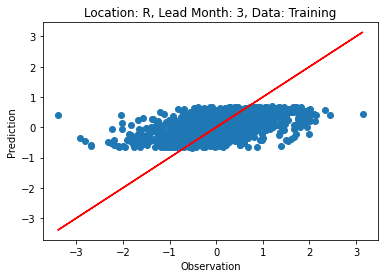

Location: R
Persistence MSE: 0.6558
Test MSE: 0.5533
Persist CSI: 0.2414
Persist CSI 80: 0.3713
Test CSI: 0.0000
Test CSI 80: 0.0000


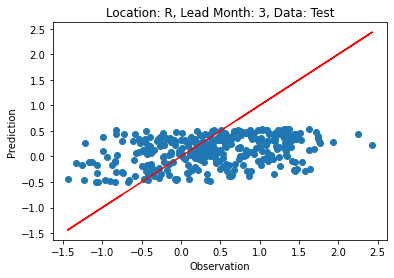

Location: CS
90th Threshold: 0.91003907
80th Threshold: 0.5517016
Training Model 1
Epoch [20/400], Avg Loss: 4.6629,  Val MSE: 0.3037
Epoch [40/400], Avg Loss: 0.8880,  Val MSE: 0.3353
Epoch [60/400], Avg Loss: 0.5114,  Val MSE: 0.2929
Epoch [80/400], Avg Loss: 0.4495,  Val MSE: 0.2879
Epoch [100/400], Avg Loss: 0.4288,  Val MSE: 0.2852
Epoch [120/400], Avg Loss: 0.4169,  Val MSE: 0.2842
Epoch [140/400], Avg Loss: 0.4092,  Val MSE: 0.2833
Epoch [160/400], Avg Loss: 0.4020,  Val MSE: 0.2821
Epoch [180/400], Avg Loss: 0.3962,  Val MSE: 0.2810
Epoch [200/400], Avg Loss: 0.3915,  Val MSE: 0.2802
Epoch [220/400], Avg Loss: 0.3872,  Val MSE: 0.2795
Epoch [240/400], Avg Loss: 0.3825,  Val MSE: 0.2790
Epoch [260/400], Avg Loss: 0.3786,  Val MSE: 0.2787
Epoch [280/400], Avg Loss: 0.3765,  Val MSE: 0.2785
Epoch [300/400], Avg Loss: 0.3750,  Val MSE: 0.2785
Epoch [320/400], Avg Loss: 0.3735,  Val MSE: 0.2785
Epoch [340/400], Avg Loss: 0.3719,  Val MSE: 0.2787
Epoch [360/400], Avg Loss: 0.3702,  V

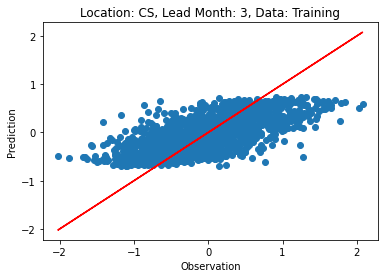

Training Model 2
Epoch [20/400], Avg Loss: 4.7398,  Val MSE: 0.3042
Epoch [40/400], Avg Loss: 0.8905,  Val MSE: 0.3382
Epoch [60/400], Avg Loss: 0.5046,  Val MSE: 0.2925
Epoch [80/400], Avg Loss: 0.4465,  Val MSE: 0.2861
Epoch [100/400], Avg Loss: 0.4253,  Val MSE: 0.2842
Epoch [120/400], Avg Loss: 0.4114,  Val MSE: 0.2832
Epoch [140/400], Avg Loss: 0.4005,  Val MSE: 0.2823
Epoch [160/400], Avg Loss: 0.3914,  Val MSE: 0.2811
Epoch [180/400], Avg Loss: 0.3840,  Val MSE: 0.2803
Epoch [200/400], Avg Loss: 0.3773,  Val MSE: 0.2797
Epoch [220/400], Avg Loss: 0.3718,  Val MSE: 0.2792
Epoch [240/400], Avg Loss: 0.3681,  Val MSE: 0.2789
Epoch [260/400], Avg Loss: 0.3664,  Val MSE: 0.2788
Epoch [280/400], Avg Loss: 0.3652,  Val MSE: 0.2790
Epoch [300/400], Avg Loss: 0.3643,  Val MSE: 0.2792
Epoch [320/400], Avg Loss: 0.3634,  Val MSE: 0.2795
Epoch [340/400], Avg Loss: 0.3624,  Val MSE: 0.2799
Epoch [360/400], Avg Loss: 0.3612,  Val MSE: 0.2804
Epoch [380/400], Avg Loss: 0.3595,  Val MSE: 0.2809

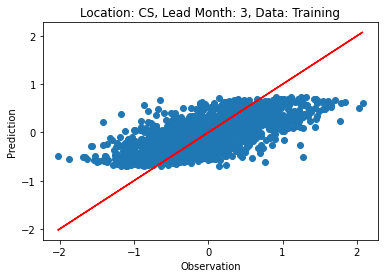

Training Model 3
Epoch [20/400], Avg Loss: 4.6955,  Val MSE: 0.2994
Epoch [40/400], Avg Loss: 0.8775,  Val MSE: 0.3289
Epoch [60/400], Avg Loss: 0.4941,  Val MSE: 0.2897
Epoch [80/400], Avg Loss: 0.4425,  Val MSE: 0.2864
Epoch [100/400], Avg Loss: 0.4201,  Val MSE: 0.2849
Epoch [120/400], Avg Loss: 0.4094,  Val MSE: 0.2839
Epoch [140/400], Avg Loss: 0.4026,  Val MSE: 0.2830
Epoch [160/400], Avg Loss: 0.3965,  Val MSE: 0.2821
Epoch [180/400], Avg Loss: 0.3913,  Val MSE: 0.2811
Epoch [200/400], Avg Loss: 0.3865,  Val MSE: 0.2803
Epoch [220/400], Avg Loss: 0.3825,  Val MSE: 0.2796
Epoch [240/400], Avg Loss: 0.3790,  Val MSE: 0.2791
Epoch [260/400], Avg Loss: 0.3767,  Val MSE: 0.2786
Epoch [280/400], Avg Loss: 0.3752,  Val MSE: 0.2784
Epoch [300/400], Avg Loss: 0.3735,  Val MSE: 0.2784
Epoch [320/400], Avg Loss: 0.3717,  Val MSE: 0.2784
Epoch [340/400], Avg Loss: 0.3698,  Val MSE: 0.2787
Epoch [360/400], Avg Loss: 0.3684,  Val MSE: 0.2790
Epoch [380/400], Avg Loss: 0.3670,  Val MSE: 0.2793

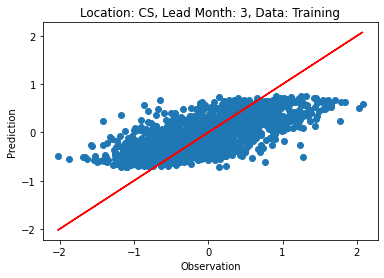

Training Model 4
Epoch [20/400], Avg Loss: 4.7056,  Val MSE: 0.3046
Epoch [40/400], Avg Loss: 0.9147,  Val MSE: 0.3551
Epoch [60/400], Avg Loss: 0.5467,  Val MSE: 0.3782
Epoch [80/400], Avg Loss: 0.5124,  Val MSE: 0.3786
Epoch [100/400], Avg Loss: 0.5037,  Val MSE: 0.3785
Epoch [120/400], Avg Loss: 0.4984,  Val MSE: 0.3785
Epoch [140/400], Avg Loss: 0.4954,  Val MSE: 0.3785
Epoch [160/400], Avg Loss: 0.4943,  Val MSE: 0.3785
Epoch [180/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [200/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [220/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [240/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [260/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [280/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [300/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [320/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [340/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [360/400], Avg Loss: 0.4941,  Val MSE: 0.3785
Epoch [380/400], Avg Loss: 0.4941,  Val MSE: 0.3785

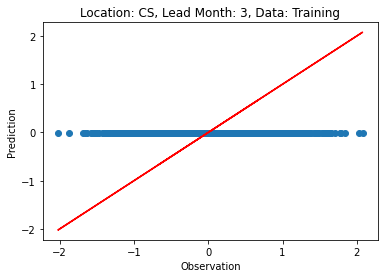

Training Model 5
Epoch [20/400], Avg Loss: 4.7260,  Val MSE: 0.3045
Epoch [40/400], Avg Loss: 0.8943,  Val MSE: 0.3432
Epoch [60/400], Avg Loss: 0.5277,  Val MSE: 0.3082
Epoch [80/400], Avg Loss: 0.4469,  Val MSE: 0.2884
Epoch [100/400], Avg Loss: 0.4202,  Val MSE: 0.2859
Epoch [120/400], Avg Loss: 0.4034,  Val MSE: 0.2847
Epoch [140/400], Avg Loss: 0.3928,  Val MSE: 0.2829
Epoch [160/400], Avg Loss: 0.3878,  Val MSE: 0.2812
Epoch [180/400], Avg Loss: 0.3841,  Val MSE: 0.2800
Epoch [200/400], Avg Loss: 0.3805,  Val MSE: 0.2792
Epoch [220/400], Avg Loss: 0.3767,  Val MSE: 0.2787
Epoch [240/400], Avg Loss: 0.3731,  Val MSE: 0.2782
Epoch [260/400], Avg Loss: 0.3692,  Val MSE: 0.2780
Epoch [280/400], Avg Loss: 0.3661,  Val MSE: 0.2780
Epoch [300/400], Avg Loss: 0.3643,  Val MSE: 0.2781
Epoch [320/400], Avg Loss: 0.3636,  Val MSE: 0.2783
Epoch [340/400], Avg Loss: 0.3628,  Val MSE: 0.2787
Epoch [360/400], Avg Loss: 0.3620,  Val MSE: 0.2789
Epoch [380/400], Avg Loss: 0.3611,  Val MSE: 0.2794

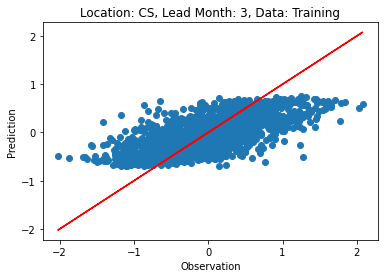

Location: CS
Persistence MSE: 0.3439
Test MSE: 0.2799
Persist CSI: 0.1379
Persist CSI 80: 0.3016
Test CSI: 0.0000
Test CSI 80: 0.0241


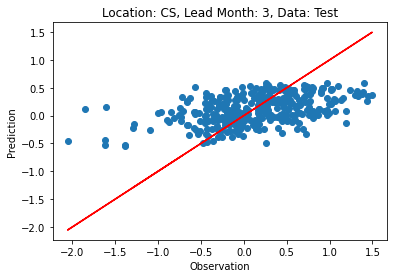

Location: SI
90th Threshold: 1.0225493
80th Threshold: 0.6188
Training Model 1
Epoch [20/400], Avg Loss: 4.9480,  Val MSE: 0.5390
Epoch [40/400], Avg Loss: 1.0545,  Val MSE: 0.5996
Epoch [60/400], Avg Loss: 0.7266,  Val MSE: 0.6140
Epoch [80/400], Avg Loss: 0.7025,  Val MSE: 0.6143
Epoch [100/400], Avg Loss: 0.6951,  Val MSE: 0.6144
Epoch [120/400], Avg Loss: 0.6914,  Val MSE: 0.6144
Epoch [140/400], Avg Loss: 0.6895,  Val MSE: 0.6144
Epoch [160/400], Avg Loss: 0.6888,  Val MSE: 0.6144
Epoch [180/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [200/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [220/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [240/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [260/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [280/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [300/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [320/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [340/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [360/400], Avg Loss: 0.6887,  Val M

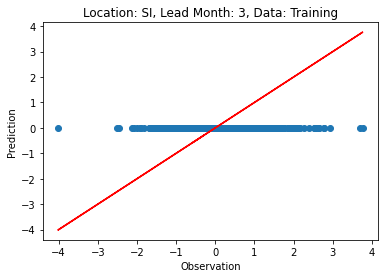

Training Model 2
Epoch [20/400], Avg Loss: 4.9589,  Val MSE: 0.5332
Epoch [40/400], Avg Loss: 1.0668,  Val MSE: 0.5938
Epoch [60/400], Avg Loss: 0.7422,  Val MSE: 0.6125
Epoch [80/400], Avg Loss: 0.7093,  Val MSE: 0.6143
Epoch [100/400], Avg Loss: 0.6972,  Val MSE: 0.6144
Epoch [120/400], Avg Loss: 0.6921,  Val MSE: 0.6144
Epoch [140/400], Avg Loss: 0.6893,  Val MSE: 0.6144
Epoch [160/400], Avg Loss: 0.6888,  Val MSE: 0.6144
Epoch [180/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [200/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [220/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [240/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [260/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [280/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [300/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [320/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [340/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [360/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [380/400], Avg Loss: 0.6887,  Val MSE: 0.6144

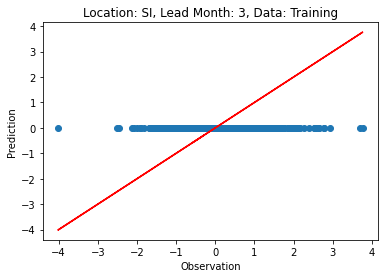

Training Model 3
Epoch [20/400], Avg Loss: 4.9850,  Val MSE: 0.5326
Epoch [40/400], Avg Loss: 1.0679,  Val MSE: 0.5844
Epoch [60/400], Avg Loss: 0.7454,  Val MSE: 0.5882
Epoch [80/400], Avg Loss: 0.6697,  Val MSE: 0.5424
Epoch [100/400], Avg Loss: 0.6100,  Val MSE: 0.5398
Epoch [120/400], Avg Loss: 0.5911,  Val MSE: 0.5524
Epoch [140/400], Avg Loss: 0.5810,  Val MSE: 0.5547
Epoch [160/400], Avg Loss: 0.5725,  Val MSE: 0.5543
Epoch [180/400], Avg Loss: 0.5665,  Val MSE: 0.5538
Epoch [200/400], Avg Loss: 0.5635,  Val MSE: 0.5537
Epoch [220/400], Avg Loss: 0.5617,  Val MSE: 0.5536
Epoch [240/400], Avg Loss: 0.5602,  Val MSE: 0.5535
Epoch [260/400], Avg Loss: 0.5588,  Val MSE: 0.5535
Epoch [280/400], Avg Loss: 0.5586,  Val MSE: 0.5534
Epoch [300/400], Avg Loss: 0.5585,  Val MSE: 0.5535
Epoch [320/400], Avg Loss: 0.5584,  Val MSE: 0.5534
Epoch [340/400], Avg Loss: 0.5584,  Val MSE: 0.5532
Epoch [360/400], Avg Loss: 0.5582,  Val MSE: 0.5533
Epoch [380/400], Avg Loss: 0.5582,  Val MSE: 0.5532

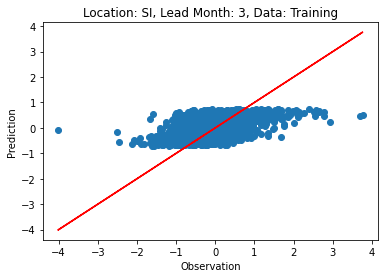

Training Model 4
Epoch [20/400], Avg Loss: 4.9508,  Val MSE: 0.5409
Epoch [40/400], Avg Loss: 1.0769,  Val MSE: 0.6012
Epoch [60/400], Avg Loss: 0.7266,  Val MSE: 0.6142
Epoch [80/400], Avg Loss: 0.7035,  Val MSE: 0.6144
Epoch [100/400], Avg Loss: 0.6940,  Val MSE: 0.6144
Epoch [120/400], Avg Loss: 0.6901,  Val MSE: 0.6144
Epoch [140/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [160/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [180/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [200/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [220/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [240/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [260/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [280/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [300/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [320/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [340/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [360/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [380/400], Avg Loss: 0.6887,  Val MSE: 0.6144

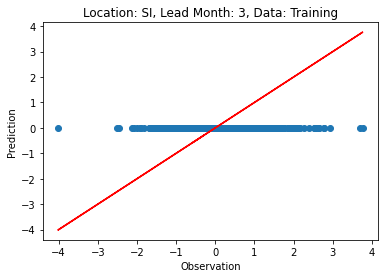

Training Model 5
Epoch [20/400], Avg Loss: 4.9199,  Val MSE: 0.5334
Epoch [40/400], Avg Loss: 1.0822,  Val MSE: 0.5955
Epoch [60/400], Avg Loss: 0.7328,  Val MSE: 0.6139
Epoch [80/400], Avg Loss: 0.7059,  Val MSE: 0.6143
Epoch [100/400], Avg Loss: 0.6954,  Val MSE: 0.6144
Epoch [120/400], Avg Loss: 0.6910,  Val MSE: 0.6144
Epoch [140/400], Avg Loss: 0.6891,  Val MSE: 0.6144
Epoch [160/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [180/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [200/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [220/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [240/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [260/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [280/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [300/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [320/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [340/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [360/400], Avg Loss: 0.6887,  Val MSE: 0.6144
Epoch [380/400], Avg Loss: 0.6887,  Val MSE: 0.6144

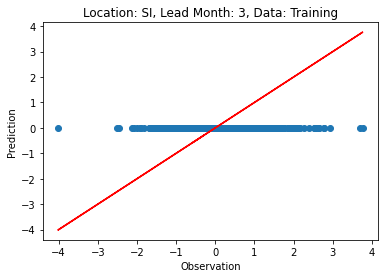

Location: SI
Persistence MSE: 0.7586
Test MSE: 0.5772
Persist CSI: 0.1250
Persist CSI 80: 0.2414
Test CSI: 0.0000
Test CSI 80: 0.0000


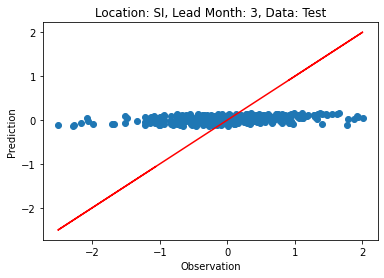

Location: CR
90th Threshold: 1.0787578
80th Threshold: 0.6839358
Training Model 1
Epoch [20/400], Avg Loss: 4.9273,  Val MSE: 0.4512
Epoch [40/400], Avg Loss: 1.0559,  Val MSE: 0.5551
Epoch [60/400], Avg Loss: 0.7645,  Val MSE: 0.5628
Epoch [80/400], Avg Loss: 0.7516,  Val MSE: 0.5630
Epoch [100/400], Avg Loss: 0.7452,  Val MSE: 0.5631
Epoch [120/400], Avg Loss: 0.7428,  Val MSE: 0.5631
Epoch [140/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [160/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [180/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [200/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [220/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [240/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [260/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [280/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [300/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [320/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [340/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [360/400], Avg Loss: 0.7425,  Va

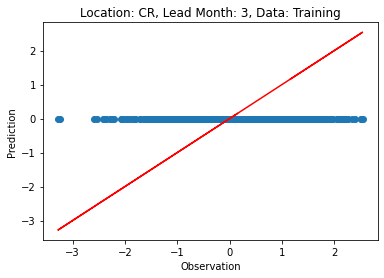

Training Model 2
Epoch [20/400], Avg Loss: 4.9657,  Val MSE: 0.4473
Epoch [40/400], Avg Loss: 1.0710,  Val MSE: 0.5561
Epoch [60/400], Avg Loss: 0.7620,  Val MSE: 0.5628
Epoch [80/400], Avg Loss: 0.7512,  Val MSE: 0.5630
Epoch [100/400], Avg Loss: 0.7447,  Val MSE: 0.5631
Epoch [120/400], Avg Loss: 0.7428,  Val MSE: 0.5631
Epoch [140/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [360/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [380/400], Avg Loss: 0.7426,  Val MSE: 0.5631

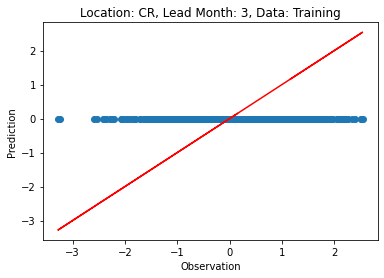

Training Model 3
Epoch [20/400], Avg Loss: 4.9871,  Val MSE: 0.4441
Epoch [40/400], Avg Loss: 1.0645,  Val MSE: 0.5521
Epoch [60/400], Avg Loss: 0.7655,  Val MSE: 0.5629
Epoch [80/400], Avg Loss: 0.7531,  Val MSE: 0.5630
Epoch [100/400], Avg Loss: 0.7479,  Val MSE: 0.5630
Epoch [120/400], Avg Loss: 0.7448,  Val MSE: 0.5631
Epoch [140/400], Avg Loss: 0.7430,  Val MSE: 0.5631
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [240/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [260/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [280/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [300/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [320/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [340/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [360/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [380/400], Avg Loss: 0.7425,  Val MSE: 0.5631

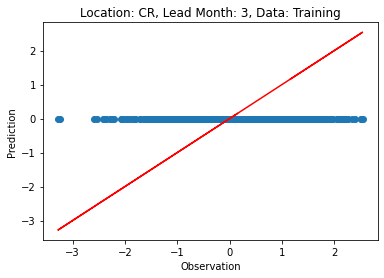

Training Model 4
Epoch [20/400], Avg Loss: 4.9915,  Val MSE: 0.4471
Epoch [40/400], Avg Loss: 1.0736,  Val MSE: 0.5511
Epoch [60/400], Avg Loss: 0.7658,  Val MSE: 0.5629
Epoch [80/400], Avg Loss: 0.7510,  Val MSE: 0.5630
Epoch [100/400], Avg Loss: 0.7462,  Val MSE: 0.5631
Epoch [120/400], Avg Loss: 0.7443,  Val MSE: 0.5631
Epoch [140/400], Avg Loss: 0.7433,  Val MSE: 0.5631
Epoch [160/400], Avg Loss: 0.7428,  Val MSE: 0.5631
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [360/400], Avg Loss: 0.7426,  Val MSE: 0.5631
Epoch [380/400], Avg Loss: 0.7426,  Val MSE: 0.5631

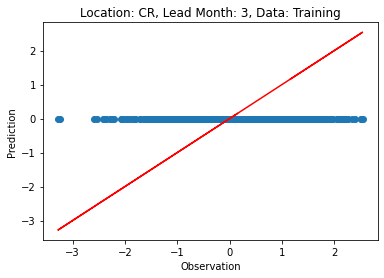

Training Model 5
Epoch [20/400], Avg Loss: 5.0135,  Val MSE: 0.4437
Epoch [40/400], Avg Loss: 1.0704,  Val MSE: 0.5554
Epoch [60/400], Avg Loss: 0.7616,  Val MSE: 0.5629
Epoch [80/400], Avg Loss: 0.7506,  Val MSE: 0.5630
Epoch [100/400], Avg Loss: 0.7454,  Val MSE: 0.5631
Epoch [120/400], Avg Loss: 0.7432,  Val MSE: 0.5631
Epoch [140/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [160/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [180/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [200/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [220/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [240/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [260/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [280/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [300/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [320/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [340/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [360/400], Avg Loss: 0.7425,  Val MSE: 0.5631
Epoch [380/400], Avg Loss: 0.7425,  Val MSE: 0.5631

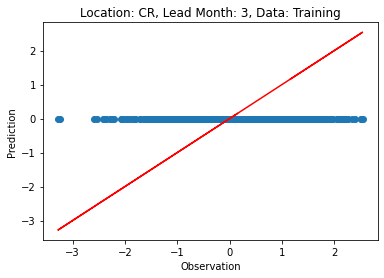

Location: CR
Persistence MSE: 0.5004
Test MSE: 0.5631
Persist CSI: 0.1625
Persist CSI 80: 0.3358
Test CSI: 0.0000
Test CSI 80: 0.0000


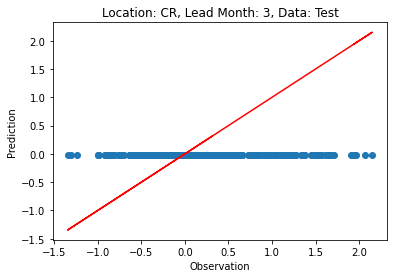

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6423894
Training Model 1
Epoch [20/400], Avg Loss: 4.9352,  Val MSE: 0.5481
Epoch [40/400], Avg Loss: 1.0132,  Val MSE: 0.6024
Epoch [60/400], Avg Loss: 0.6888,  Val MSE: 0.6114
Epoch [80/400], Avg Loss: 0.6700,  Val MSE: 0.6113
Epoch [100/400], Avg Loss: 0.6634,  Val MSE: 0.6112
Epoch [120/400], Avg Loss: 0.6599,  Val MSE: 0.6112
Epoch [140/400], Avg Loss: 0.6583,  Val MSE: 0.6112
Epoch [160/400], Avg Loss: 0.6575,  Val MSE: 0.6112
Epoch [180/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [200/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [220/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [240/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [260/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [280/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [300/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [320/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [340/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [360/400], Avg Loss: 0.6571,  Va

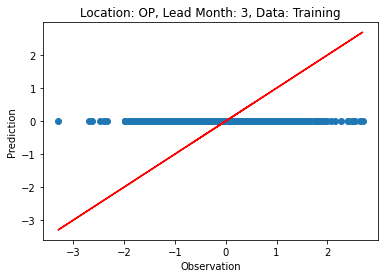

Training Model 2
Epoch [20/400], Avg Loss: 4.8888,  Val MSE: 0.5585
Epoch [40/400], Avg Loss: 1.0039,  Val MSE: 0.6017
Epoch [60/400], Avg Loss: 0.6937,  Val MSE: 0.6106
Epoch [80/400], Avg Loss: 0.6724,  Val MSE: 0.6112
Epoch [100/400], Avg Loss: 0.6625,  Val MSE: 0.6112
Epoch [120/400], Avg Loss: 0.6589,  Val MSE: 0.6112
Epoch [140/400], Avg Loss: 0.6577,  Val MSE: 0.6112
Epoch [160/400], Avg Loss: 0.6573,  Val MSE: 0.6111
Epoch [180/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [200/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [220/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [240/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [260/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [280/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [300/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [320/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [340/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [360/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [380/400], Avg Loss: 0.6571,  Val MSE: 0.6111

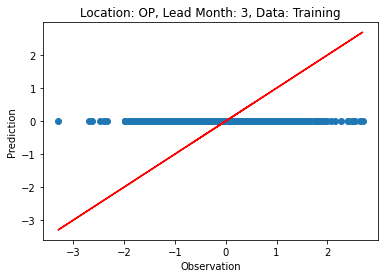

Training Model 3
Epoch [20/400], Avg Loss: 4.9722,  Val MSE: 0.5505
Epoch [40/400], Avg Loss: 1.0218,  Val MSE: 0.6003
Epoch [60/400], Avg Loss: 0.6939,  Val MSE: 0.6112
Epoch [80/400], Avg Loss: 0.6698,  Val MSE: 0.6113
Epoch [100/400], Avg Loss: 0.6629,  Val MSE: 0.6112
Epoch [120/400], Avg Loss: 0.6595,  Val MSE: 0.6112
Epoch [140/400], Avg Loss: 0.6579,  Val MSE: 0.6112
Epoch [160/400], Avg Loss: 0.6572,  Val MSE: 0.6111
Epoch [180/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [200/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [220/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [240/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [260/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [280/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [300/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [320/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [340/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [360/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [380/400], Avg Loss: 0.6571,  Val MSE: 0.6111

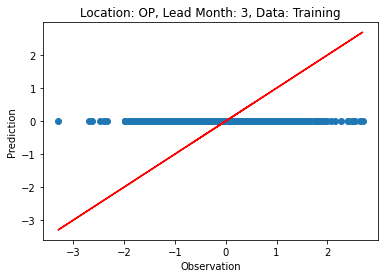

Training Model 4
Epoch [20/400], Avg Loss: 4.8835,  Val MSE: 0.5484
Epoch [40/400], Avg Loss: 1.0210,  Val MSE: 0.6049
Epoch [60/400], Avg Loss: 0.6859,  Val MSE: 0.6113
Epoch [80/400], Avg Loss: 0.6679,  Val MSE: 0.6112
Epoch [100/400], Avg Loss: 0.6611,  Val MSE: 0.6112
Epoch [120/400], Avg Loss: 0.6582,  Val MSE: 0.6112
Epoch [140/400], Avg Loss: 0.6573,  Val MSE: 0.6111
Epoch [160/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [180/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [200/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [220/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [240/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [260/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [280/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [300/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [320/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [340/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [360/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [380/400], Avg Loss: 0.6571,  Val MSE: 0.6111

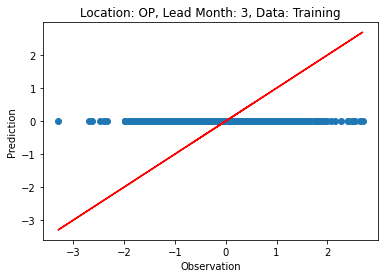

Training Model 5
Epoch [20/400], Avg Loss: 4.8860,  Val MSE: 0.5472
Epoch [40/400], Avg Loss: 1.0214,  Val MSE: 0.6029
Epoch [60/400], Avg Loss: 0.6898,  Val MSE: 0.6113
Epoch [80/400], Avg Loss: 0.6695,  Val MSE: 0.6112
Epoch [100/400], Avg Loss: 0.6618,  Val MSE: 0.6112
Epoch [120/400], Avg Loss: 0.6580,  Val MSE: 0.6112
Epoch [140/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [160/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [180/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [200/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [220/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [240/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [260/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [280/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [300/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [320/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [340/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [360/400], Avg Loss: 0.6571,  Val MSE: 0.6111
Epoch [380/400], Avg Loss: 0.6571,  Val MSE: 0.6111

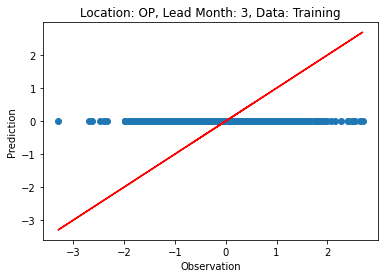

Location: OP
Persistence MSE: 0.7524
Test MSE: 0.6111
Persist CSI: 0.1273
Persist CSI 80: 0.1700
Test CSI: 0.0000
Test CSI 80: 0.0000


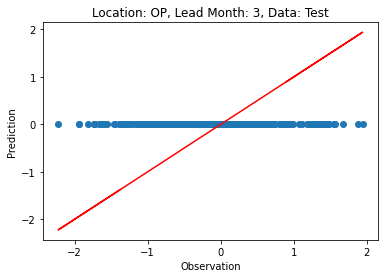

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.8072015
Training Model 1
Epoch [20/400], Avg Loss: 5.1709,  Val MSE: 1.0068
Epoch [40/400], Avg Loss: 1.3416,  Val MSE: 1.0313
Epoch [60/400], Avg Loss: 0.9532,  Val MSE: 0.9514
Epoch [80/400], Avg Loss: 0.8888,  Val MSE: 0.9515
Epoch [100/400], Avg Loss: 0.8542,  Val MSE: 0.9565
Epoch [120/400], Avg Loss: 0.8310,  Val MSE: 0.9656
Epoch [140/400], Avg Loss: 0.8159,  Val MSE: 0.9746
Epoch [160/400], Avg Loss: 0.8052,  Val MSE: 0.9828
Epoch [180/400], Avg Loss: 0.7988,  Val MSE: 0.9928
Epoch [200/400], Avg Loss: 0.7933,  Val MSE: 1.0027
Epoch [220/400], Avg Loss: 0.7880,  Val MSE: 1.0122
Epoch [240/400], Avg Loss: 0.7832,  Val MSE: 1.0224
Epoch [260/400], Avg Loss: 0.7791,  Val MSE: 1.0314
Epoch [280/400], Avg Loss: 0.7761,  Val MSE: 1.0391
Epoch [300/400], Avg Loss: 0.7738,  Val MSE: 1.0455
Epoch [320/400], Avg Loss: 0.7718,  Val MSE: 1.0506
Epoch [340/400], Avg Loss: 0.7696,  Val MSE: 1.0552
Epoch [360/400], Avg Loss: 0.7675,  Val

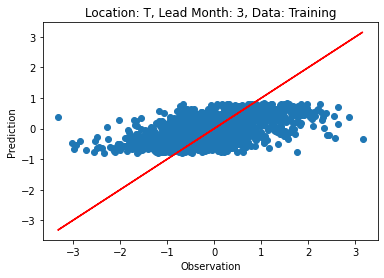

Training Model 2
Epoch [20/400], Avg Loss: 5.1510,  Val MSE: 0.9949
Epoch [40/400], Avg Loss: 1.4166,  Val MSE: 1.0694
Epoch [60/400], Avg Loss: 1.0050,  Val MSE: 0.9469
Epoch [80/400], Avg Loss: 0.9343,  Val MSE: 0.9479
Epoch [100/400], Avg Loss: 0.8994,  Val MSE: 0.9492
Epoch [120/400], Avg Loss: 0.8736,  Val MSE: 0.9540
Epoch [140/400], Avg Loss: 0.8553,  Val MSE: 0.9608
Epoch [160/400], Avg Loss: 0.8406,  Val MSE: 0.9678
Epoch [180/400], Avg Loss: 0.8286,  Val MSE: 0.9744
Epoch [200/400], Avg Loss: 0.8181,  Val MSE: 0.9812
Epoch [220/400], Avg Loss: 0.8105,  Val MSE: 0.9883
Epoch [240/400], Avg Loss: 0.8038,  Val MSE: 0.9949
Epoch [260/400], Avg Loss: 0.7988,  Val MSE: 0.9987
Epoch [280/400], Avg Loss: 0.7949,  Val MSE: 1.0026
Epoch [300/400], Avg Loss: 0.7920,  Val MSE: 1.0051
Epoch [320/400], Avg Loss: 0.7891,  Val MSE: 1.0071
Epoch [340/400], Avg Loss: 0.7864,  Val MSE: 1.0094
Epoch [360/400], Avg Loss: 0.7841,  Val MSE: 1.0113
Epoch [380/400], Avg Loss: 0.7825,  Val MSE: 1.0131

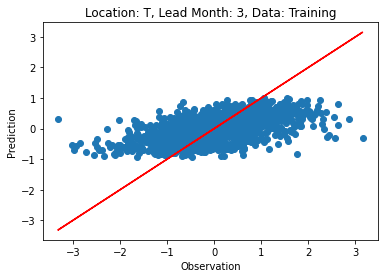

Training Model 3
Epoch [20/400], Avg Loss: 5.1544,  Val MSE: 1.0140
Epoch [40/400], Avg Loss: 1.3799,  Val MSE: 1.0518
Epoch [60/400], Avg Loss: 0.9891,  Val MSE: 0.9516
Epoch [80/400], Avg Loss: 0.9114,  Val MSE: 0.9529
Epoch [100/400], Avg Loss: 0.8738,  Val MSE: 0.9666
Epoch [120/400], Avg Loss: 0.8452,  Val MSE: 0.9883
Epoch [140/400], Avg Loss: 0.8229,  Val MSE: 1.0072
Epoch [160/400], Avg Loss: 0.8064,  Val MSE: 1.0238
Epoch [180/400], Avg Loss: 0.7952,  Val MSE: 1.0351
Epoch [200/400], Avg Loss: 0.7896,  Val MSE: 1.0433
Epoch [220/400], Avg Loss: 0.7854,  Val MSE: 1.0474
Epoch [240/400], Avg Loss: 0.7820,  Val MSE: 1.0506
Epoch [260/400], Avg Loss: 0.7796,  Val MSE: 1.0530
Epoch [280/400], Avg Loss: 0.7778,  Val MSE: 1.0547
Epoch [300/400], Avg Loss: 0.7760,  Val MSE: 1.0566
Epoch [320/400], Avg Loss: 0.7745,  Val MSE: 1.0579
Epoch [340/400], Avg Loss: 0.7731,  Val MSE: 1.0592
Epoch [360/400], Avg Loss: 0.7713,  Val MSE: 1.0605
Epoch [380/400], Avg Loss: 0.7693,  Val MSE: 1.0619

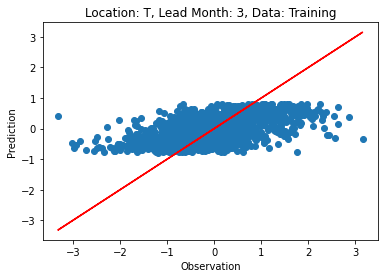

Training Model 4
Epoch [20/400], Avg Loss: 5.1718,  Val MSE: 0.9908
Epoch [40/400], Avg Loss: 1.3270,  Val MSE: 1.0133
Epoch [60/400], Avg Loss: 0.9416,  Val MSE: 0.9535
Epoch [80/400], Avg Loss: 0.8861,  Val MSE: 0.9484
Epoch [100/400], Avg Loss: 0.8603,  Val MSE: 0.9586
Epoch [120/400], Avg Loss: 0.8403,  Val MSE: 0.9716
Epoch [140/400], Avg Loss: 0.8247,  Val MSE: 0.9849
Epoch [160/400], Avg Loss: 0.8127,  Val MSE: 0.9990
Epoch [180/400], Avg Loss: 0.8044,  Val MSE: 1.0136
Epoch [200/400], Avg Loss: 0.7972,  Val MSE: 1.0283
Epoch [220/400], Avg Loss: 0.7908,  Val MSE: 1.0392
Epoch [240/400], Avg Loss: 0.7857,  Val MSE: 1.0466
Epoch [260/400], Avg Loss: 0.7819,  Val MSE: 1.0524
Epoch [280/400], Avg Loss: 0.7786,  Val MSE: 1.0565
Epoch [300/400], Avg Loss: 0.7756,  Val MSE: 1.0593
Epoch [320/400], Avg Loss: 0.7725,  Val MSE: 1.0614
Epoch [340/400], Avg Loss: 0.7709,  Val MSE: 1.0632
Epoch [360/400], Avg Loss: 0.7697,  Val MSE: 1.0646
Epoch [380/400], Avg Loss: 0.7685,  Val MSE: 1.0659

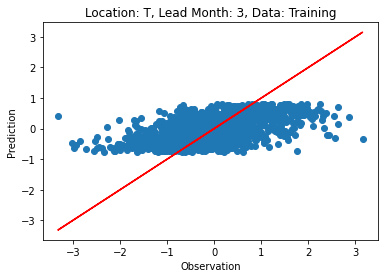

Training Model 5
Epoch [20/400], Avg Loss: 5.1303,  Val MSE: 0.9931
Epoch [40/400], Avg Loss: 1.3984,  Val MSE: 1.0511
Epoch [60/400], Avg Loss: 0.9754,  Val MSE: 0.9538
Epoch [80/400], Avg Loss: 0.8970,  Val MSE: 0.9520
Epoch [100/400], Avg Loss: 0.8650,  Val MSE: 0.9579
Epoch [120/400], Avg Loss: 0.8450,  Val MSE: 0.9652
Epoch [140/400], Avg Loss: 0.8324,  Val MSE: 0.9722
Epoch [160/400], Avg Loss: 0.8227,  Val MSE: 0.9793
Epoch [180/400], Avg Loss: 0.8141,  Val MSE: 0.9870
Epoch [200/400], Avg Loss: 0.8067,  Val MSE: 0.9941
Epoch [220/400], Avg Loss: 0.8005,  Val MSE: 1.0022
Epoch [240/400], Avg Loss: 0.7961,  Val MSE: 1.0094
Epoch [260/400], Avg Loss: 0.7920,  Val MSE: 1.0164
Epoch [280/400], Avg Loss: 0.7886,  Val MSE: 1.0237
Epoch [300/400], Avg Loss: 0.7848,  Val MSE: 1.0307
Epoch [320/400], Avg Loss: 0.7808,  Val MSE: 1.0364
Epoch [340/400], Avg Loss: 0.7770,  Val MSE: 1.0437
Epoch [360/400], Avg Loss: 0.7733,  Val MSE: 1.0496
Epoch [380/400], Avg Loss: 0.7702,  Val MSE: 1.0547

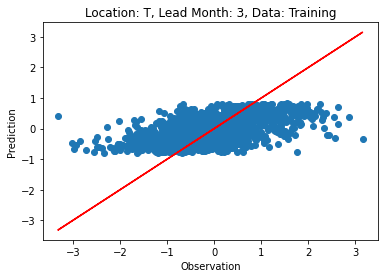

Location: T
Persistence MSE: 1.1300
Test MSE: 1.0516
Persist CSI: 0.1912
Persist CSI 80: 0.2880
Test CSI: 0.0000
Test CSI 80: 0.0163


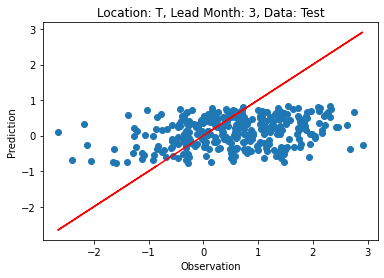

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.6538955
Training Model 1
Epoch [20/400], Avg Loss: 5.0890,  Val MSE: 0.6074
Epoch [40/400], Avg Loss: 1.1328,  Val MSE: 0.6186
Epoch [60/400], Avg Loss: 0.8533,  Val MSE: 0.6210
Epoch [80/400], Avg Loss: 0.8311,  Val MSE: 0.6215
Epoch [100/400], Avg Loss: 0.8198,  Val MSE: 0.6216
Epoch [120/400], Avg Loss: 0.8144,  Val MSE: 0.6215
Epoch [140/400], Avg Loss: 0.8120,  Val MSE: 0.6215
Epoch [160/400], Avg Loss: 0.8108,  Val MSE: 0.6215
Epoch [180/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [200/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [220/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [240/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [260/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [280/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [300/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [320/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [340/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [360/400], Avg Loss: 0.8102,  Va

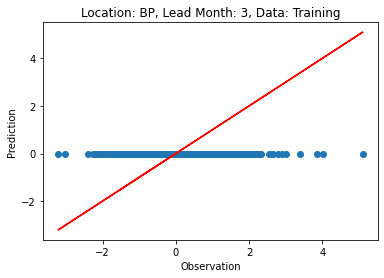

Training Model 2
Epoch [20/400], Avg Loss: 5.0815,  Val MSE: 0.6109
Epoch [40/400], Avg Loss: 1.1259,  Val MSE: 0.6211
Epoch [60/400], Avg Loss: 0.8263,  Val MSE: 0.6217
Epoch [80/400], Avg Loss: 0.8165,  Val MSE: 0.6215
Epoch [100/400], Avg Loss: 0.8122,  Val MSE: 0.6215
Epoch [120/400], Avg Loss: 0.8106,  Val MSE: 0.6215
Epoch [140/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [160/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [180/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [200/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [220/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [240/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [260/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [280/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [300/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [320/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [340/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [360/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [380/400], Avg Loss: 0.8102,  Val MSE: 0.6215

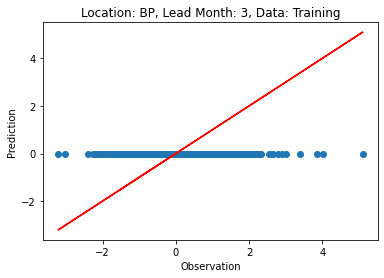

Training Model 3
Epoch [20/400], Avg Loss: 5.0963,  Val MSE: 0.6078
Epoch [40/400], Avg Loss: 1.1388,  Val MSE: 0.6197
Epoch [60/400], Avg Loss: 0.8370,  Val MSE: 0.6217
Epoch [80/400], Avg Loss: 0.8186,  Val MSE: 0.6216
Epoch [100/400], Avg Loss: 0.8134,  Val MSE: 0.6215
Epoch [120/400], Avg Loss: 0.8110,  Val MSE: 0.6215
Epoch [140/400], Avg Loss: 0.8105,  Val MSE: 0.6215
Epoch [160/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [180/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [200/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [220/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [240/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [260/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [280/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [300/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [320/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [340/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [360/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [380/400], Avg Loss: 0.8102,  Val MSE: 0.6215

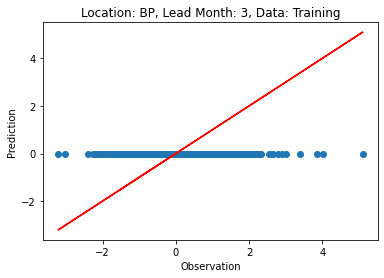

Training Model 4
Epoch [20/400], Avg Loss: 5.0596,  Val MSE: 0.6138
Epoch [40/400], Avg Loss: 1.1357,  Val MSE: 0.6203
Epoch [60/400], Avg Loss: 0.8318,  Val MSE: 0.6217
Epoch [80/400], Avg Loss: 0.8187,  Val MSE: 0.6216
Epoch [100/400], Avg Loss: 0.8135,  Val MSE: 0.6215
Epoch [120/400], Avg Loss: 0.8110,  Val MSE: 0.6215
Epoch [140/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [160/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [180/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [200/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [220/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [240/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [260/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [280/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [300/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [320/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [340/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [360/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [380/400], Avg Loss: 0.8102,  Val MSE: 0.6215

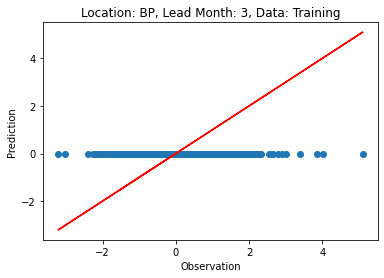

Training Model 5
Epoch [20/400], Avg Loss: 5.0748,  Val MSE: 0.6049
Epoch [40/400], Avg Loss: 1.1402,  Val MSE: 0.6206
Epoch [60/400], Avg Loss: 0.8304,  Val MSE: 0.6217
Epoch [80/400], Avg Loss: 0.8190,  Val MSE: 0.6215
Epoch [100/400], Avg Loss: 0.8127,  Val MSE: 0.6215
Epoch [120/400], Avg Loss: 0.8105,  Val MSE: 0.6215
Epoch [140/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [160/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [180/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [200/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [220/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [240/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [260/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [280/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [300/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [320/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [340/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [360/400], Avg Loss: 0.8102,  Val MSE: 0.6215
Epoch [380/400], Avg Loss: 0.8102,  Val MSE: 0.6215

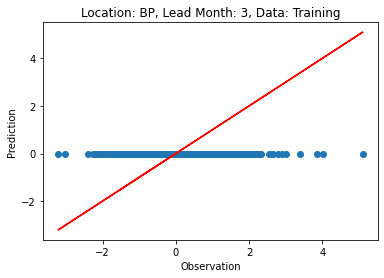

Location: BP
Persistence MSE: 1.0517
Test MSE: 0.6215
Persist CSI: 0.0000
Persist CSI 80: 0.0860
Test CSI: 0.0000
Test CSI 80: 0.0000


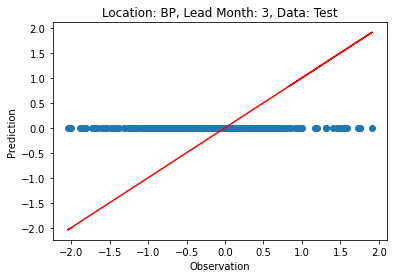

Location: BOP
90th Threshold: 1.1161726
80th Threshold: 0.7248904
Training Model 1
Epoch [20/400], Avg Loss: 4.9673,  Val MSE: 0.3234
Epoch [40/400], Avg Loss: 1.2188,  Val MSE: 0.3990
Epoch [60/400], Avg Loss: 0.8320,  Val MSE: 0.3245
Epoch [80/400], Avg Loss: 0.7663,  Val MSE: 0.3040
Epoch [100/400], Avg Loss: 0.7376,  Val MSE: 0.3019
Epoch [120/400], Avg Loss: 0.7203,  Val MSE: 0.3028
Epoch [140/400], Avg Loss: 0.7072,  Val MSE: 0.3046
Epoch [160/400], Avg Loss: 0.6968,  Val MSE: 0.3077
Epoch [180/400], Avg Loss: 0.6869,  Val MSE: 0.3118
Epoch [200/400], Avg Loss: 0.6784,  Val MSE: 0.3165
Epoch [220/400], Avg Loss: 0.6715,  Val MSE: 0.3215
Epoch [240/400], Avg Loss: 0.6655,  Val MSE: 0.3269
Epoch [260/400], Avg Loss: 0.6616,  Val MSE: 0.3320
Epoch [280/400], Avg Loss: 0.6578,  Val MSE: 0.3363
Epoch [300/400], Avg Loss: 0.6543,  Val MSE: 0.3402
Epoch [320/400], Avg Loss: 0.6510,  Val MSE: 0.3437
Epoch [340/400], Avg Loss: 0.6478,  Val MSE: 0.3470
Epoch [360/400], Avg Loss: 0.6453,  V

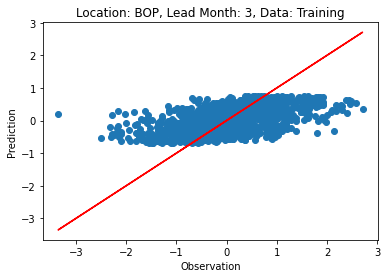

Training Model 2
Epoch [20/400], Avg Loss: 5.0044,  Val MSE: 0.3185
Epoch [40/400], Avg Loss: 1.1898,  Val MSE: 0.3831
Epoch [60/400], Avg Loss: 0.7948,  Val MSE: 0.3101
Epoch [80/400], Avg Loss: 0.7418,  Val MSE: 0.3025
Epoch [100/400], Avg Loss: 0.7200,  Val MSE: 0.3024
Epoch [120/400], Avg Loss: 0.7070,  Val MSE: 0.3036
Epoch [140/400], Avg Loss: 0.6974,  Val MSE: 0.3053
Epoch [160/400], Avg Loss: 0.6899,  Val MSE: 0.3078
Epoch [180/400], Avg Loss: 0.6833,  Val MSE: 0.3107
Epoch [200/400], Avg Loss: 0.6773,  Val MSE: 0.3147
Epoch [220/400], Avg Loss: 0.6716,  Val MSE: 0.3196
Epoch [240/400], Avg Loss: 0.6658,  Val MSE: 0.3249
Epoch [260/400], Avg Loss: 0.6615,  Val MSE: 0.3298
Epoch [280/400], Avg Loss: 0.6587,  Val MSE: 0.3342
Epoch [300/400], Avg Loss: 0.6566,  Val MSE: 0.3379
Epoch [320/400], Avg Loss: 0.6547,  Val MSE: 0.3413
Epoch [340/400], Avg Loss: 0.6523,  Val MSE: 0.3439
Epoch [360/400], Avg Loss: 0.6502,  Val MSE: 0.3459
Epoch [380/400], Avg Loss: 0.6482,  Val MSE: 0.3472

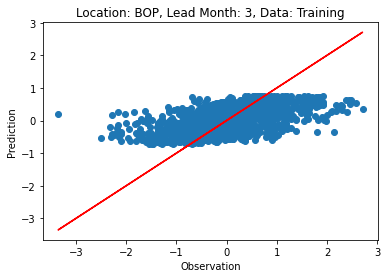

Training Model 3
Epoch [20/400], Avg Loss: 5.0548,  Val MSE: 0.3213
Epoch [40/400], Avg Loss: 1.2260,  Val MSE: 0.3995
Epoch [60/400], Avg Loss: 0.8231,  Val MSE: 0.3218
Epoch [80/400], Avg Loss: 0.7551,  Val MSE: 0.3035
Epoch [100/400], Avg Loss: 0.7262,  Val MSE: 0.3021
Epoch [120/400], Avg Loss: 0.7067,  Val MSE: 0.3034
Epoch [140/400], Avg Loss: 0.6936,  Val MSE: 0.3057
Epoch [160/400], Avg Loss: 0.6820,  Val MSE: 0.3097
Epoch [180/400], Avg Loss: 0.6710,  Val MSE: 0.3152
Epoch [200/400], Avg Loss: 0.6615,  Val MSE: 0.3229
Epoch [220/400], Avg Loss: 0.6538,  Val MSE: 0.3313
Epoch [240/400], Avg Loss: 0.6478,  Val MSE: 0.3381
Epoch [260/400], Avg Loss: 0.6444,  Val MSE: 0.3419
Epoch [280/400], Avg Loss: 0.6437,  Val MSE: 0.3439
Epoch [300/400], Avg Loss: 0.6435,  Val MSE: 0.3452
Epoch [320/400], Avg Loss: 0.6433,  Val MSE: 0.3462
Epoch [340/400], Avg Loss: 0.6430,  Val MSE: 0.3469
Epoch [360/400], Avg Loss: 0.6427,  Val MSE: 0.3473
Epoch [380/400], Avg Loss: 0.6424,  Val MSE: 0.3476

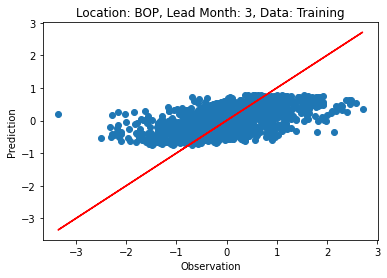

Training Model 4
Epoch [20/400], Avg Loss: 4.9942,  Val MSE: 0.3203
Epoch [40/400], Avg Loss: 1.2197,  Val MSE: 0.4032
Epoch [60/400], Avg Loss: 0.8285,  Val MSE: 0.3216
Epoch [80/400], Avg Loss: 0.7641,  Val MSE: 0.3045
Epoch [100/400], Avg Loss: 0.7378,  Val MSE: 0.3017
Epoch [120/400], Avg Loss: 0.7229,  Val MSE: 0.3017
Epoch [140/400], Avg Loss: 0.7138,  Val MSE: 0.3023
Epoch [160/400], Avg Loss: 0.7077,  Val MSE: 0.3027
Epoch [180/400], Avg Loss: 0.7020,  Val MSE: 0.3034
Epoch [200/400], Avg Loss: 0.6954,  Val MSE: 0.3050
Epoch [220/400], Avg Loss: 0.6890,  Val MSE: 0.3079
Epoch [240/400], Avg Loss: 0.6826,  Val MSE: 0.3124
Epoch [260/400], Avg Loss: 0.6759,  Val MSE: 0.3183
Epoch [280/400], Avg Loss: 0.6693,  Val MSE: 0.3250
Epoch [300/400], Avg Loss: 0.6640,  Val MSE: 0.3311
Epoch [320/400], Avg Loss: 0.6601,  Val MSE: 0.3362
Epoch [340/400], Avg Loss: 0.6570,  Val MSE: 0.3402
Epoch [360/400], Avg Loss: 0.6538,  Val MSE: 0.3434
Epoch [380/400], Avg Loss: 0.6507,  Val MSE: 0.3457

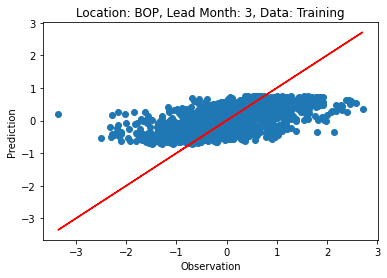

Training Model 5
Epoch [20/400], Avg Loss: 5.0381,  Val MSE: 0.3205
Epoch [40/400], Avg Loss: 1.2079,  Val MSE: 0.3909
Epoch [60/400], Avg Loss: 0.8070,  Val MSE: 0.3176
Epoch [80/400], Avg Loss: 0.7444,  Val MSE: 0.3051
Epoch [100/400], Avg Loss: 0.7181,  Val MSE: 0.3036
Epoch [120/400], Avg Loss: 0.7025,  Val MSE: 0.3051
Epoch [140/400], Avg Loss: 0.6919,  Val MSE: 0.3077
Epoch [160/400], Avg Loss: 0.6833,  Val MSE: 0.3114
Epoch [180/400], Avg Loss: 0.6761,  Val MSE: 0.3163
Epoch [200/400], Avg Loss: 0.6712,  Val MSE: 0.3215
Epoch [220/400], Avg Loss: 0.6673,  Val MSE: 0.3270
Epoch [240/400], Avg Loss: 0.6635,  Val MSE: 0.3322
Epoch [260/400], Avg Loss: 0.6608,  Val MSE: 0.3364
Epoch [280/400], Avg Loss: 0.6583,  Val MSE: 0.3400
Epoch [300/400], Avg Loss: 0.6559,  Val MSE: 0.3432
Epoch [320/400], Avg Loss: 0.6531,  Val MSE: 0.3460
Epoch [340/400], Avg Loss: 0.6497,  Val MSE: 0.3484
Epoch [360/400], Avg Loss: 0.6467,  Val MSE: 0.3504
Epoch [380/400], Avg Loss: 0.6441,  Val MSE: 0.3517

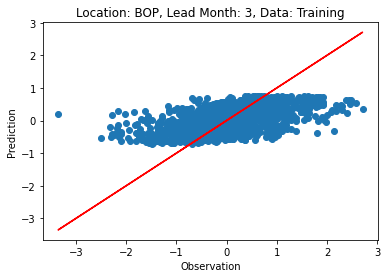

Location: BOP
Persistence MSE: 0.4076
Test MSE: 0.3499
Persist CSI: 0.1250
Persist CSI 80: 0.3109
Test CSI: 0.0000
Test CSI 80: 0.0375


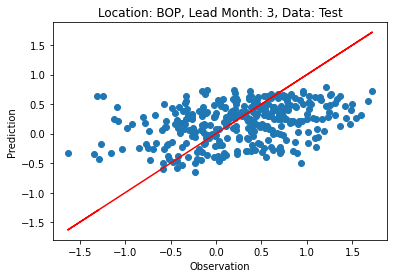

Location: W
90th Threshold: 1.3299876
80th Threshold: 0.8538197
Training Model 1
Epoch [20/400], Avg Loss: 5.2678,  Val MSE: 1.1957
Epoch [40/400], Avg Loss: 1.4710,  Val MSE: 1.2323
Epoch [60/400], Avg Loss: 1.1010,  Val MSE: 1.1201
Epoch [80/400], Avg Loss: 1.0335,  Val MSE: 1.0835
Epoch [100/400], Avg Loss: 0.9948,  Val MSE: 1.0907
Epoch [120/400], Avg Loss: 0.9696,  Val MSE: 1.1049
Epoch [140/400], Avg Loss: 0.9520,  Val MSE: 1.1127
Epoch [160/400], Avg Loss: 0.9400,  Val MSE: 1.1187
Epoch [180/400], Avg Loss: 0.9322,  Val MSE: 1.1253
Epoch [200/400], Avg Loss: 0.9254,  Val MSE: 1.1293
Epoch [220/400], Avg Loss: 0.9197,  Val MSE: 1.1324
Epoch [240/400], Avg Loss: 0.9152,  Val MSE: 1.1354
Epoch [260/400], Avg Loss: 0.9111,  Val MSE: 1.1386
Epoch [280/400], Avg Loss: 0.9075,  Val MSE: 1.1419
Epoch [300/400], Avg Loss: 0.9043,  Val MSE: 1.1452
Epoch [320/400], Avg Loss: 0.9016,  Val MSE: 1.1478
Epoch [340/400], Avg Loss: 0.8996,  Val MSE: 1.1496
Epoch [360/400], Avg Loss: 0.8980,  Val

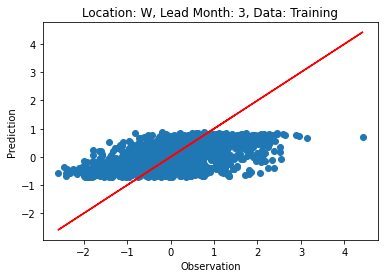

Training Model 2
Epoch [20/400], Avg Loss: 5.2849,  Val MSE: 1.1712
Epoch [40/400], Avg Loss: 1.4815,  Val MSE: 1.2448
Epoch [60/400], Avg Loss: 1.0825,  Val MSE: 1.1180
Epoch [80/400], Avg Loss: 1.0029,  Val MSE: 1.0892
Epoch [100/400], Avg Loss: 0.9697,  Val MSE: 1.1032
Epoch [120/400], Avg Loss: 0.9523,  Val MSE: 1.1129
Epoch [140/400], Avg Loss: 0.9417,  Val MSE: 1.1195
Epoch [160/400], Avg Loss: 0.9337,  Val MSE: 1.1274
Epoch [180/400], Avg Loss: 0.9273,  Val MSE: 1.1318
Epoch [200/400], Avg Loss: 0.9216,  Val MSE: 1.1350
Epoch [220/400], Avg Loss: 0.9165,  Val MSE: 1.1381
Epoch [240/400], Avg Loss: 0.9118,  Val MSE: 1.1418
Epoch [260/400], Avg Loss: 0.9079,  Val MSE: 1.1444
Epoch [280/400], Avg Loss: 0.9043,  Val MSE: 1.1469
Epoch [300/400], Avg Loss: 0.9017,  Val MSE: 1.1489
Epoch [320/400], Avg Loss: 0.8990,  Val MSE: 1.1512
Epoch [340/400], Avg Loss: 0.8964,  Val MSE: 1.1535
Epoch [360/400], Avg Loss: 0.8951,  Val MSE: 1.1553
Epoch [380/400], Avg Loss: 0.8942,  Val MSE: 1.1563

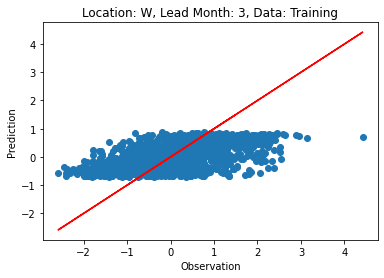

Training Model 3
Epoch [20/400], Avg Loss: 5.2844,  Val MSE: 1.1984
Epoch [40/400], Avg Loss: 1.5064,  Val MSE: 1.2974
Epoch [60/400], Avg Loss: 1.1128,  Val MSE: 1.1581
Epoch [80/400], Avg Loss: 1.0280,  Val MSE: 1.0982
Epoch [100/400], Avg Loss: 0.9871,  Val MSE: 1.1014
Epoch [120/400], Avg Loss: 0.9636,  Val MSE: 1.1152
Epoch [140/400], Avg Loss: 0.9482,  Val MSE: 1.1212
Epoch [160/400], Avg Loss: 0.9372,  Val MSE: 1.1273
Epoch [180/400], Avg Loss: 0.9286,  Val MSE: 1.1331
Epoch [200/400], Avg Loss: 0.9213,  Val MSE: 1.1376
Epoch [220/400], Avg Loss: 0.9151,  Val MSE: 1.1415
Epoch [240/400], Avg Loss: 0.9097,  Val MSE: 1.1459
Epoch [260/400], Avg Loss: 0.9051,  Val MSE: 1.1499
Epoch [280/400], Avg Loss: 0.9011,  Val MSE: 1.1536
Epoch [300/400], Avg Loss: 0.8976,  Val MSE: 1.1562
Epoch [320/400], Avg Loss: 0.8955,  Val MSE: 1.1584
Epoch [340/400], Avg Loss: 0.8933,  Val MSE: 1.1603
Epoch [360/400], Avg Loss: 0.8908,  Val MSE: 1.1626
Epoch [380/400], Avg Loss: 0.8888,  Val MSE: 1.1645

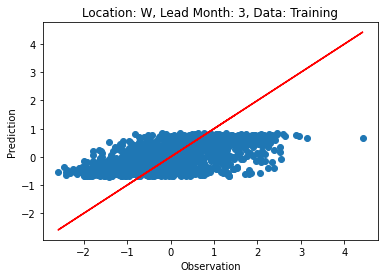

Training Model 4
Epoch [20/400], Avg Loss: 5.3116,  Val MSE: 1.1765
Epoch [40/400], Avg Loss: 1.5068,  Val MSE: 1.2735
Epoch [60/400], Avg Loss: 1.1159,  Val MSE: 1.1383
Epoch [80/400], Avg Loss: 1.0371,  Val MSE: 1.0892
Epoch [100/400], Avg Loss: 0.9981,  Val MSE: 1.0876
Epoch [120/400], Avg Loss: 0.9764,  Val MSE: 1.0963
Epoch [140/400], Avg Loss: 0.9611,  Val MSE: 1.1061
Epoch [160/400], Avg Loss: 0.9498,  Val MSE: 1.1151
Epoch [180/400], Avg Loss: 0.9417,  Val MSE: 1.1220
Epoch [200/400], Avg Loss: 0.9354,  Val MSE: 1.1277
Epoch [220/400], Avg Loss: 0.9289,  Val MSE: 1.1327
Epoch [240/400], Avg Loss: 0.9235,  Val MSE: 1.1357
Epoch [260/400], Avg Loss: 0.9190,  Val MSE: 1.1381
Epoch [280/400], Avg Loss: 0.9167,  Val MSE: 1.1400
Epoch [300/400], Avg Loss: 0.9151,  Val MSE: 1.1425
Epoch [320/400], Avg Loss: 0.9133,  Val MSE: 1.1448
Epoch [340/400], Avg Loss: 0.9113,  Val MSE: 1.1475
Epoch [360/400], Avg Loss: 0.9090,  Val MSE: 1.1501
Epoch [380/400], Avg Loss: 0.9061,  Val MSE: 1.1530

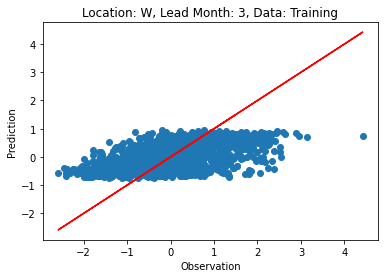

Training Model 5
Epoch [20/400], Avg Loss: 5.3220,  Val MSE: 1.1996
Epoch [40/400], Avg Loss: 1.5174,  Val MSE: 1.2973
Epoch [60/400], Avg Loss: 1.1218,  Val MSE: 1.1599
Epoch [80/400], Avg Loss: 1.0451,  Val MSE: 1.0938
Epoch [100/400], Avg Loss: 1.0020,  Val MSE: 1.0844
Epoch [120/400], Avg Loss: 0.9785,  Val MSE: 1.0935
Epoch [140/400], Avg Loss: 0.9616,  Val MSE: 1.0995
Epoch [160/400], Avg Loss: 0.9459,  Val MSE: 1.1067
Epoch [180/400], Avg Loss: 0.9346,  Val MSE: 1.1130
Epoch [200/400], Avg Loss: 0.9264,  Val MSE: 1.1169
Epoch [220/400], Avg Loss: 0.9200,  Val MSE: 1.1190
Epoch [240/400], Avg Loss: 0.9149,  Val MSE: 1.1207
Epoch [260/400], Avg Loss: 0.9106,  Val MSE: 1.1219
Epoch [280/400], Avg Loss: 0.9077,  Val MSE: 1.1211
Epoch [300/400], Avg Loss: 0.9047,  Val MSE: 1.1199
Epoch [320/400], Avg Loss: 0.9029,  Val MSE: 1.1192
Epoch [340/400], Avg Loss: 0.9018,  Val MSE: 1.1176
Epoch [360/400], Avg Loss: 0.9015,  Val MSE: 1.1165
Epoch [380/400], Avg Loss: 0.9012,  Val MSE: 1.1156

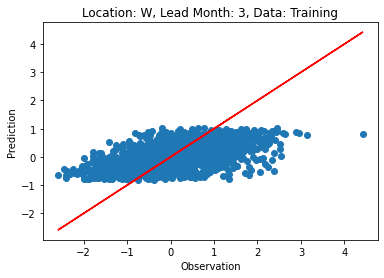

Location: W
Persistence MSE: 1.4679
Test MSE: 1.1477
Persist CSI: 0.1712
Persist CSI 80: 0.3370
Test CSI: 0.0000
Test CSI 80: 0.0551


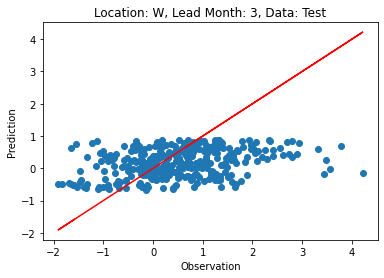

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.7103322
Training Model 1
Epoch [20/400], Avg Loss: 5.2056,  Val MSE: 0.7471
Epoch [40/400], Avg Loss: 1.4014,  Val MSE: 0.7820
Epoch [60/400], Avg Loss: 1.0195,  Val MSE: 0.7161
Epoch [80/400], Avg Loss: 0.9495,  Val MSE: 0.7212
Epoch [100/400], Avg Loss: 0.9126,  Val MSE: 0.7353
Epoch [120/400], Avg Loss: 0.8900,  Val MSE: 0.7521
Epoch [140/400], Avg Loss: 0.8737,  Val MSE: 0.7706
Epoch [160/400], Avg Loss: 0.8599,  Val MSE: 0.7872
Epoch [180/400], Avg Loss: 0.8506,  Val MSE: 0.8004
Epoch [200/400], Avg Loss: 0.8434,  Val MSE: 0.8100
Epoch [220/400], Avg Loss: 0.8372,  Val MSE: 0.8178
Epoch [240/400], Avg Loss: 0.8323,  Val MSE: 0.8236
Epoch [260/400], Avg Loss: 0.8280,  Val MSE: 0.8268
Epoch [280/400], Avg Loss: 0.8250,  Val MSE: 0.8287
Epoch [300/400], Avg Loss: 0.8232,  Val MSE: 0.8297
Epoch [320/400], Avg Loss: 0.8221,  Val MSE: 0.8305
Epoch [340/400], Avg Loss: 0.8215,  Val MSE: 0.8309
Epoch [360/400], Avg Loss: 0.8207,  Val

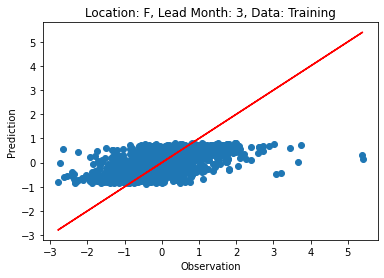

Training Model 2
Epoch [20/400], Avg Loss: 5.1911,  Val MSE: 0.7573
Epoch [40/400], Avg Loss: 1.3902,  Val MSE: 0.7900
Epoch [60/400], Avg Loss: 1.0116,  Val MSE: 0.7197
Epoch [80/400], Avg Loss: 0.9370,  Val MSE: 0.7284
Epoch [100/400], Avg Loss: 0.9033,  Val MSE: 0.7472
Epoch [120/400], Avg Loss: 0.8837,  Val MSE: 0.7637
Epoch [140/400], Avg Loss: 0.8727,  Val MSE: 0.7751
Epoch [160/400], Avg Loss: 0.8638,  Val MSE: 0.7804
Epoch [180/400], Avg Loss: 0.8569,  Val MSE: 0.7797
Epoch [200/400], Avg Loss: 0.8510,  Val MSE: 0.7780
Epoch [220/400], Avg Loss: 0.8470,  Val MSE: 0.7789
Epoch [240/400], Avg Loss: 0.8443,  Val MSE: 0.7812
Epoch [260/400], Avg Loss: 0.8428,  Val MSE: 0.7840
Epoch [280/400], Avg Loss: 0.8419,  Val MSE: 0.7868
Epoch [300/400], Avg Loss: 0.8410,  Val MSE: 0.7888
Epoch [320/400], Avg Loss: 0.8400,  Val MSE: 0.7910
Epoch [340/400], Avg Loss: 0.8388,  Val MSE: 0.7928
Epoch [360/400], Avg Loss: 0.8376,  Val MSE: 0.7946
Epoch [380/400], Avg Loss: 0.8363,  Val MSE: 0.7954

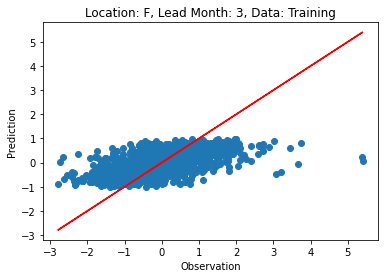

Training Model 3
Epoch [20/400], Avg Loss: 5.2601,  Val MSE: 0.7462
Epoch [40/400], Avg Loss: 1.4197,  Val MSE: 0.7834
Epoch [60/400], Avg Loss: 1.0470,  Val MSE: 0.7207
Epoch [80/400], Avg Loss: 0.9567,  Val MSE: 0.7225
Epoch [100/400], Avg Loss: 0.9153,  Val MSE: 0.7371
Epoch [120/400], Avg Loss: 0.8903,  Val MSE: 0.7559
Epoch [140/400], Avg Loss: 0.8721,  Val MSE: 0.7736
Epoch [160/400], Avg Loss: 0.8586,  Val MSE: 0.7865
Epoch [180/400], Avg Loss: 0.8497,  Val MSE: 0.7972
Epoch [200/400], Avg Loss: 0.8434,  Val MSE: 0.8049
Epoch [220/400], Avg Loss: 0.8376,  Val MSE: 0.8108
Epoch [240/400], Avg Loss: 0.8324,  Val MSE: 0.8184
Epoch [260/400], Avg Loss: 0.8286,  Val MSE: 0.8237
Epoch [280/400], Avg Loss: 0.8253,  Val MSE: 0.8281
Epoch [300/400], Avg Loss: 0.8222,  Val MSE: 0.8314
Epoch [320/400], Avg Loss: 0.8193,  Val MSE: 0.8338
Epoch [340/400], Avg Loss: 0.8170,  Val MSE: 0.8358
Epoch [360/400], Avg Loss: 0.8149,  Val MSE: 0.8371
Epoch [380/400], Avg Loss: 0.8130,  Val MSE: 0.8381

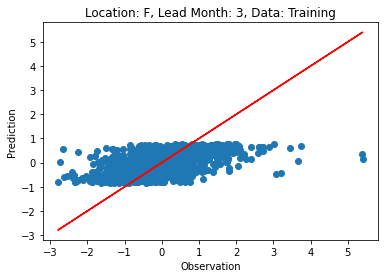

Training Model 4
Epoch [20/400], Avg Loss: 5.2056,  Val MSE: 0.7433
Epoch [40/400], Avg Loss: 1.4236,  Val MSE: 0.7984
Epoch [60/400], Avg Loss: 1.0116,  Val MSE: 0.7222
Epoch [80/400], Avg Loss: 0.9360,  Val MSE: 0.7225
Epoch [100/400], Avg Loss: 0.9069,  Val MSE: 0.7401
Epoch [120/400], Avg Loss: 0.8855,  Val MSE: 0.7608
Epoch [140/400], Avg Loss: 0.8689,  Val MSE: 0.7781
Epoch [160/400], Avg Loss: 0.8575,  Val MSE: 0.7903
Epoch [180/400], Avg Loss: 0.8484,  Val MSE: 0.7989
Epoch [200/400], Avg Loss: 0.8403,  Val MSE: 0.8057
Epoch [220/400], Avg Loss: 0.8349,  Val MSE: 0.8103
Epoch [240/400], Avg Loss: 0.8317,  Val MSE: 0.8140
Epoch [260/400], Avg Loss: 0.8290,  Val MSE: 0.8176
Epoch [280/400], Avg Loss: 0.8271,  Val MSE: 0.8215
Epoch [300/400], Avg Loss: 0.8252,  Val MSE: 0.8260
Epoch [320/400], Avg Loss: 0.8233,  Val MSE: 0.8296
Epoch [340/400], Avg Loss: 0.8212,  Val MSE: 0.8329
Epoch [360/400], Avg Loss: 0.8198,  Val MSE: 0.8349
Epoch [380/400], Avg Loss: 0.8187,  Val MSE: 0.8365

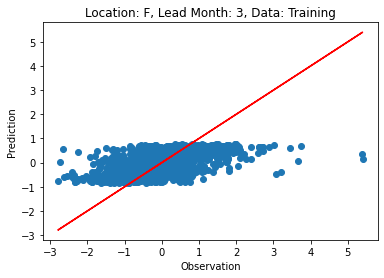

Training Model 5
Epoch [20/400], Avg Loss: 5.2090,  Val MSE: 0.7434
Epoch [40/400], Avg Loss: 1.3852,  Val MSE: 0.7703
Epoch [60/400], Avg Loss: 1.0322,  Val MSE: 0.7165
Epoch [80/400], Avg Loss: 0.9538,  Val MSE: 0.7217
Epoch [100/400], Avg Loss: 0.9125,  Val MSE: 0.7390
Epoch [120/400], Avg Loss: 0.8855,  Val MSE: 0.7604
Epoch [140/400], Avg Loss: 0.8677,  Val MSE: 0.7803
Epoch [160/400], Avg Loss: 0.8537,  Val MSE: 0.7948
Epoch [180/400], Avg Loss: 0.8449,  Val MSE: 0.8064
Epoch [200/400], Avg Loss: 0.8388,  Val MSE: 0.8160
Epoch [220/400], Avg Loss: 0.8342,  Val MSE: 0.8223
Epoch [240/400], Avg Loss: 0.8301,  Val MSE: 0.8272
Epoch [260/400], Avg Loss: 0.8271,  Val MSE: 0.8307
Epoch [280/400], Avg Loss: 0.8248,  Val MSE: 0.8332
Epoch [300/400], Avg Loss: 0.8227,  Val MSE: 0.8350
Epoch [320/400], Avg Loss: 0.8207,  Val MSE: 0.8365
Epoch [340/400], Avg Loss: 0.8186,  Val MSE: 0.8376
Epoch [360/400], Avg Loss: 0.8165,  Val MSE: 0.8385
Epoch [380/400], Avg Loss: 0.8144,  Val MSE: 0.8391

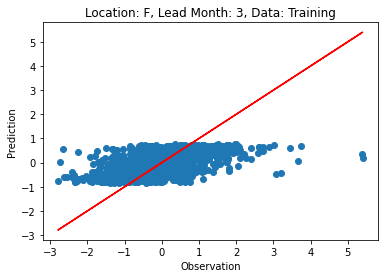

Location: F
Persistence MSE: 1.0635
Test MSE: 0.8278
Persist CSI: 0.2079
Persist CSI 80: 0.3191
Test CSI: 0.0000
Test CSI 80: 0.0900


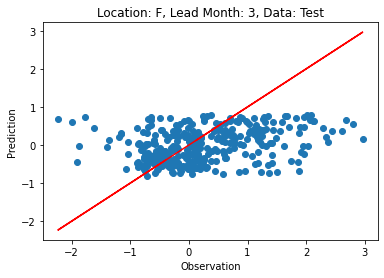

Location: CI
90th Threshold: 1.3159964
80th Threshold: 0.73827165
Training Model 1
Epoch [20/400], Avg Loss: 5.1384,  Val MSE: 0.5929
Epoch [40/400], Avg Loss: 1.3536,  Val MSE: 0.5773
Epoch [60/400], Avg Loss: 0.9538,  Val MSE: 0.5728
Epoch [80/400], Avg Loss: 0.8784,  Val MSE: 0.5874
Epoch [100/400], Avg Loss: 0.8438,  Val MSE: 0.5960
Epoch [120/400], Avg Loss: 0.8213,  Val MSE: 0.6011
Epoch [140/400], Avg Loss: 0.8036,  Val MSE: 0.6038
Epoch [160/400], Avg Loss: 0.7894,  Val MSE: 0.6040
Epoch [180/400], Avg Loss: 0.7803,  Val MSE: 0.6039
Epoch [200/400], Avg Loss: 0.7726,  Val MSE: 0.6042
Epoch [220/400], Avg Loss: 0.7653,  Val MSE: 0.6043
Epoch [240/400], Avg Loss: 0.7594,  Val MSE: 0.6043
Epoch [260/400], Avg Loss: 0.7543,  Val MSE: 0.6039
Epoch [280/400], Avg Loss: 0.7500,  Val MSE: 0.6030
Epoch [300/400], Avg Loss: 0.7467,  Val MSE: 0.6018
Epoch [320/400], Avg Loss: 0.7443,  Val MSE: 0.6004
Epoch [340/400], Avg Loss: 0.7422,  Val MSE: 0.5989
Epoch [360/400], Avg Loss: 0.7401,  V

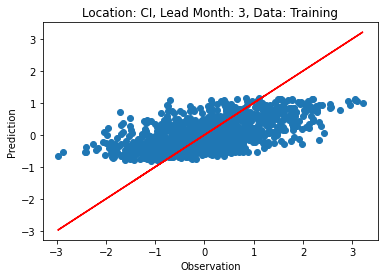

Training Model 2
Epoch [20/400], Avg Loss: 5.1123,  Val MSE: 0.5883
Epoch [40/400], Avg Loss: 1.3387,  Val MSE: 0.5761
Epoch [60/400], Avg Loss: 0.9593,  Val MSE: 0.5722
Epoch [80/400], Avg Loss: 0.8850,  Val MSE: 0.5846
Epoch [100/400], Avg Loss: 0.8500,  Val MSE: 0.5933
Epoch [120/400], Avg Loss: 0.8279,  Val MSE: 0.6001
Epoch [140/400], Avg Loss: 0.8123,  Val MSE: 0.6057
Epoch [160/400], Avg Loss: 0.8005,  Val MSE: 0.6088
Epoch [180/400], Avg Loss: 0.7893,  Val MSE: 0.6117
Epoch [200/400], Avg Loss: 0.7798,  Val MSE: 0.6145
Epoch [220/400], Avg Loss: 0.7714,  Val MSE: 0.6168
Epoch [240/400], Avg Loss: 0.7639,  Val MSE: 0.6191
Epoch [260/400], Avg Loss: 0.7572,  Val MSE: 0.6217
Epoch [280/400], Avg Loss: 0.7519,  Val MSE: 0.6237
Epoch [300/400], Avg Loss: 0.7478,  Val MSE: 0.6251
Epoch [320/400], Avg Loss: 0.7450,  Val MSE: 0.6263
Epoch [340/400], Avg Loss: 0.7427,  Val MSE: 0.6271
Epoch [360/400], Avg Loss: 0.7405,  Val MSE: 0.6279
Epoch [380/400], Avg Loss: 0.7388,  Val MSE: 0.6286

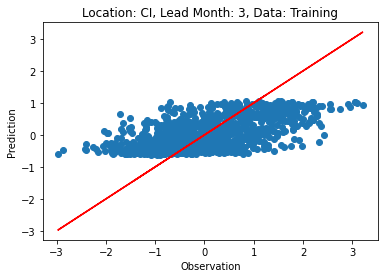

Training Model 3
Epoch [20/400], Avg Loss: 5.1301,  Val MSE: 0.5919
Epoch [40/400], Avg Loss: 1.3522,  Val MSE: 0.5757
Epoch [60/400], Avg Loss: 0.9476,  Val MSE: 0.5761
Epoch [80/400], Avg Loss: 0.8809,  Val MSE: 0.5894
Epoch [100/400], Avg Loss: 0.8517,  Val MSE: 0.5982
Epoch [120/400], Avg Loss: 0.8316,  Val MSE: 0.6023
Epoch [140/400], Avg Loss: 0.8154,  Val MSE: 0.6031
Epoch [160/400], Avg Loss: 0.8013,  Val MSE: 0.6021
Epoch [180/400], Avg Loss: 0.7898,  Val MSE: 0.5996
Epoch [200/400], Avg Loss: 0.7807,  Val MSE: 0.5976
Epoch [220/400], Avg Loss: 0.7741,  Val MSE: 0.5942
Epoch [240/400], Avg Loss: 0.7683,  Val MSE: 0.5904
Epoch [260/400], Avg Loss: 0.7640,  Val MSE: 0.5881
Epoch [280/400], Avg Loss: 0.7604,  Val MSE: 0.5867
Epoch [300/400], Avg Loss: 0.7576,  Val MSE: 0.5861
Epoch [320/400], Avg Loss: 0.7550,  Val MSE: 0.5859
Epoch [340/400], Avg Loss: 0.7527,  Val MSE: 0.5859
Epoch [360/400], Avg Loss: 0.7512,  Val MSE: 0.5858
Epoch [380/400], Avg Loss: 0.7496,  Val MSE: 0.5857

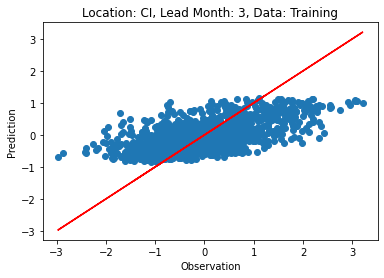

Training Model 4
Epoch [20/400], Avg Loss: 5.0614,  Val MSE: 0.5873
Epoch [40/400], Avg Loss: 1.3820,  Val MSE: 0.5804
Epoch [60/400], Avg Loss: 0.9702,  Val MSE: 0.5708
Epoch [80/400], Avg Loss: 0.8867,  Val MSE: 0.5893
Epoch [100/400], Avg Loss: 0.8478,  Val MSE: 0.5982
Epoch [120/400], Avg Loss: 0.8217,  Val MSE: 0.6003
Epoch [140/400], Avg Loss: 0.8049,  Val MSE: 0.6012
Epoch [160/400], Avg Loss: 0.7917,  Val MSE: 0.6014
Epoch [180/400], Avg Loss: 0.7817,  Val MSE: 0.6016
Epoch [200/400], Avg Loss: 0.7730,  Val MSE: 0.6017
Epoch [220/400], Avg Loss: 0.7664,  Val MSE: 0.6018
Epoch [240/400], Avg Loss: 0.7609,  Val MSE: 0.6014
Epoch [260/400], Avg Loss: 0.7565,  Val MSE: 0.6004
Epoch [280/400], Avg Loss: 0.7526,  Val MSE: 0.5995
Epoch [300/400], Avg Loss: 0.7489,  Val MSE: 0.5987
Epoch [320/400], Avg Loss: 0.7460,  Val MSE: 0.5979
Epoch [340/400], Avg Loss: 0.7432,  Val MSE: 0.5972
Epoch [360/400], Avg Loss: 0.7406,  Val MSE: 0.5965
Epoch [380/400], Avg Loss: 0.7383,  Val MSE: 0.5960

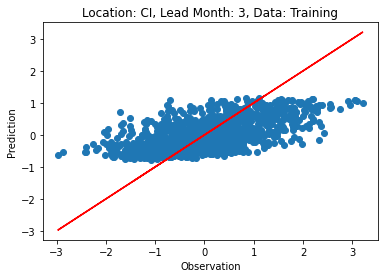

Training Model 5
Epoch [20/400], Avg Loss: 5.1078,  Val MSE: 0.5890
Epoch [40/400], Avg Loss: 1.3063,  Val MSE: 0.5761
Epoch [60/400], Avg Loss: 0.9124,  Val MSE: 0.5807
Epoch [80/400], Avg Loss: 0.8429,  Val MSE: 0.5980
Epoch [100/400], Avg Loss: 0.8144,  Val MSE: 0.6074
Epoch [120/400], Avg Loss: 0.7968,  Val MSE: 0.6105
Epoch [140/400], Avg Loss: 0.7859,  Val MSE: 0.6131
Epoch [160/400], Avg Loss: 0.7775,  Val MSE: 0.6156
Epoch [180/400], Avg Loss: 0.7707,  Val MSE: 0.6181
Epoch [200/400], Avg Loss: 0.7654,  Val MSE: 0.6205
Epoch [220/400], Avg Loss: 0.7606,  Val MSE: 0.6223
Epoch [240/400], Avg Loss: 0.7569,  Val MSE: 0.6239
Epoch [260/400], Avg Loss: 0.7536,  Val MSE: 0.6252
Epoch [280/400], Avg Loss: 0.7501,  Val MSE: 0.6262
Epoch [300/400], Avg Loss: 0.7473,  Val MSE: 0.6270
Epoch [320/400], Avg Loss: 0.7447,  Val MSE: 0.6276
Epoch [340/400], Avg Loss: 0.7428,  Val MSE: 0.6281
Epoch [360/400], Avg Loss: 0.7412,  Val MSE: 0.6284
Epoch [380/400], Avg Loss: 0.7401,  Val MSE: 0.6287

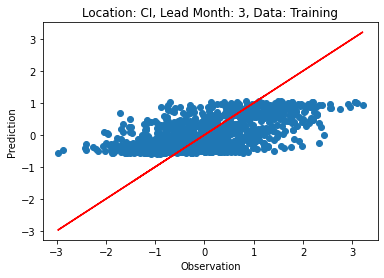

Location: CI
Persistence MSE: 0.9345
Test MSE: 0.6014
Persist CSI: 0.0370
Persist CSI 80: 0.1134
Test CSI: 0.0000
Test CSI 80: 0.0167


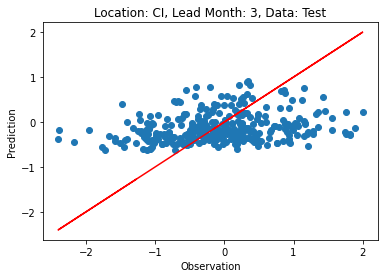

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.7080992
Training Model 1
Epoch [20/400], Avg Loss: 5.0202,  Val MSE: 0.4468
Epoch [40/400], Avg Loss: 1.1857,  Val MSE: 0.5395
Epoch [60/400], Avg Loss: 0.8428,  Val MSE: 0.5577
Epoch [80/400], Avg Loss: 0.8207,  Val MSE: 0.5579
Epoch [100/400], Avg Loss: 0.8134,  Val MSE: 0.5579
Epoch [120/400], Avg Loss: 0.8096,  Val MSE: 0.5579
Epoch [140/400], Avg Loss: 0.8075,  Val MSE: 0.5580
Epoch [160/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [180/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [200/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [220/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [240/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [260/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [280/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [300/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [320/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [340/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [360/400], Avg Loss: 0.8071,  Va

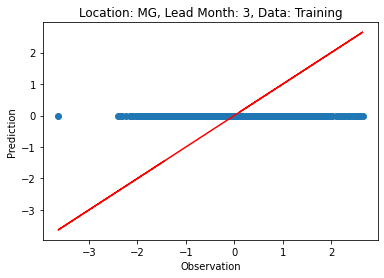

Training Model 2
Epoch [20/400], Avg Loss: 4.9615,  Val MSE: 0.4368
Epoch [40/400], Avg Loss: 1.1787,  Val MSE: 0.5000
Epoch [60/400], Avg Loss: 0.8525,  Val MSE: 0.4443
Epoch [80/400], Avg Loss: 0.7847,  Val MSE: 0.4235
Epoch [100/400], Avg Loss: 0.7596,  Val MSE: 0.4219
Epoch [120/400], Avg Loss: 0.7452,  Val MSE: 0.4229
Epoch [140/400], Avg Loss: 0.7347,  Val MSE: 0.4244
Epoch [160/400], Avg Loss: 0.7254,  Val MSE: 0.4260
Epoch [180/400], Avg Loss: 0.7178,  Val MSE: 0.4279
Epoch [200/400], Avg Loss: 0.7116,  Val MSE: 0.4301
Epoch [220/400], Avg Loss: 0.7064,  Val MSE: 0.4328
Epoch [240/400], Avg Loss: 0.7029,  Val MSE: 0.4359
Epoch [260/400], Avg Loss: 0.7004,  Val MSE: 0.4389
Epoch [280/400], Avg Loss: 0.6982,  Val MSE: 0.4412
Epoch [300/400], Avg Loss: 0.6964,  Val MSE: 0.4433
Epoch [320/400], Avg Loss: 0.6953,  Val MSE: 0.4453
Epoch [340/400], Avg Loss: 0.6944,  Val MSE: 0.4470
Epoch [360/400], Avg Loss: 0.6934,  Val MSE: 0.4485
Epoch [380/400], Avg Loss: 0.6923,  Val MSE: 0.4498

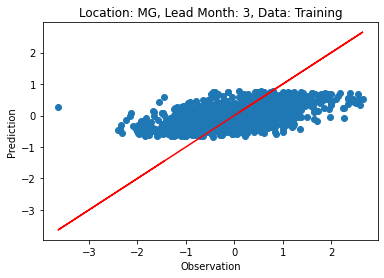

Training Model 3
Epoch [20/400], Avg Loss: 5.0363,  Val MSE: 0.4372
Epoch [40/400], Avg Loss: 1.1879,  Val MSE: 0.5151
Epoch [60/400], Avg Loss: 0.8613,  Val MSE: 0.4987
Epoch [80/400], Avg Loss: 0.7651,  Val MSE: 0.4239
Epoch [100/400], Avg Loss: 0.7403,  Val MSE: 0.4228
Epoch [120/400], Avg Loss: 0.7286,  Val MSE: 0.4246
Epoch [140/400], Avg Loss: 0.7210,  Val MSE: 0.4267
Epoch [160/400], Avg Loss: 0.7133,  Val MSE: 0.4285
Epoch [180/400], Avg Loss: 0.7069,  Val MSE: 0.4308
Epoch [200/400], Avg Loss: 0.7017,  Val MSE: 0.4334
Epoch [220/400], Avg Loss: 0.6973,  Val MSE: 0.4377
Epoch [240/400], Avg Loss: 0.6944,  Val MSE: 0.4425
Epoch [260/400], Avg Loss: 0.6917,  Val MSE: 0.4470
Epoch [280/400], Avg Loss: 0.6895,  Val MSE: 0.4504
Epoch [300/400], Avg Loss: 0.6877,  Val MSE: 0.4527
Epoch [320/400], Avg Loss: 0.6866,  Val MSE: 0.4544
Epoch [340/400], Avg Loss: 0.6859,  Val MSE: 0.4559
Epoch [360/400], Avg Loss: 0.6855,  Val MSE: 0.4569
Epoch [380/400], Avg Loss: 0.6851,  Val MSE: 0.4576

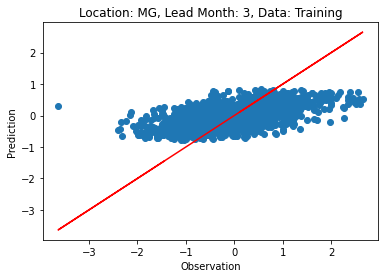

Training Model 4
Epoch [20/400], Avg Loss: 5.0651,  Val MSE: 0.4347
Epoch [40/400], Avg Loss: 1.2001,  Val MSE: 0.5212
Epoch [60/400], Avg Loss: 0.8749,  Val MSE: 0.5552
Epoch [80/400], Avg Loss: 0.8290,  Val MSE: 0.5578
Epoch [100/400], Avg Loss: 0.8160,  Val MSE: 0.5579
Epoch [120/400], Avg Loss: 0.8106,  Val MSE: 0.5580
Epoch [140/400], Avg Loss: 0.8083,  Val MSE: 0.5580
Epoch [160/400], Avg Loss: 0.8072,  Val MSE: 0.5580
Epoch [180/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [200/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [220/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [240/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [260/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [280/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [300/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [320/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [340/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [360/400], Avg Loss: 0.8071,  Val MSE: 0.5580
Epoch [380/400], Avg Loss: 0.8071,  Val MSE: 0.5580

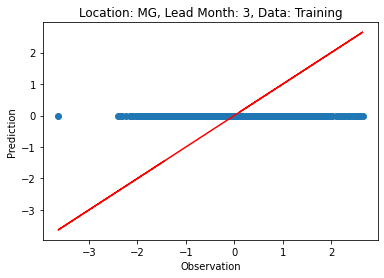

Training Model 5
Epoch [20/400], Avg Loss: 5.0345,  Val MSE: 0.4383
Epoch [40/400], Avg Loss: 1.1807,  Val MSE: 0.5025
Epoch [60/400], Avg Loss: 0.8379,  Val MSE: 0.4405
Epoch [80/400], Avg Loss: 0.7767,  Val MSE: 0.4235
Epoch [100/400], Avg Loss: 0.7516,  Val MSE: 0.4229
Epoch [120/400], Avg Loss: 0.7386,  Val MSE: 0.4241
Epoch [140/400], Avg Loss: 0.7302,  Val MSE: 0.4250
Epoch [160/400], Avg Loss: 0.7239,  Val MSE: 0.4260
Epoch [180/400], Avg Loss: 0.7184,  Val MSE: 0.4272
Epoch [200/400], Avg Loss: 0.7126,  Val MSE: 0.4285
Epoch [220/400], Avg Loss: 0.7077,  Val MSE: 0.4310
Epoch [240/400], Avg Loss: 0.7043,  Val MSE: 0.4334
Epoch [260/400], Avg Loss: 0.7014,  Val MSE: 0.4362
Epoch [280/400], Avg Loss: 0.6992,  Val MSE: 0.4393
Epoch [300/400], Avg Loss: 0.6971,  Val MSE: 0.4420
Epoch [320/400], Avg Loss: 0.6948,  Val MSE: 0.4448
Epoch [340/400], Avg Loss: 0.6924,  Val MSE: 0.4474
Epoch [360/400], Avg Loss: 0.6907,  Val MSE: 0.4496
Epoch [380/400], Avg Loss: 0.6892,  Val MSE: 0.4515

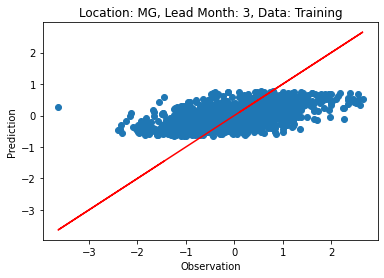

Location: MG
Persistence MSE: 0.6400
Test MSE: 0.4589
Persist CSI: 0.2239
Persist CSI 80: 0.2480
Test CSI: 0.0000
Test CSI 80: 0.0000


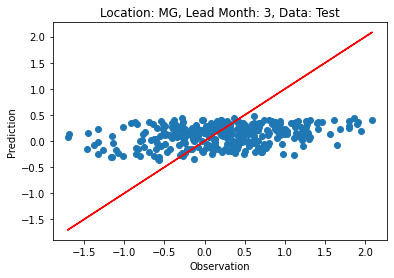

Location  Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
7       BOP           0.4076       0.1250          0.3109    0.3499       0.0   
6        BP           1.0517       0.0000          0.0860    0.6215       0.0   
10       CI           0.9345       0.0370          0.1134    0.6014       0.0   
3        CR           0.5004       0.1625          0.3358    0.5631       0.0   
1        CS           0.3439       0.1379          0.3016    0.2799       0.0   
9         F           1.0635       0.2079          0.3191    0.8278       0.0   
11       MG           0.6400       0.2239          0.2480    0.4589       0.0   
4        OP           0.7524       0.1273          0.1700    0.6111       0.0   
0         R           0.6558       0.2414          0.3713    0.5533       0.0   
2        SI           0.7586       0.1250          0.2414    0.5772       0.0   
5         T           1.1300       0.1912          0.2880    1.0516       0.0   
8         W           1.4679       0.1712          0.3370    1.1477       0.0   

    Test CSI 80  Training Time  
7        0.0375        22.2124  
6        0.0000        22.5676  
10       0.0167        22.6856  
3        0.0000        22.1053  
1        0.0241        22.1700  
9        0.0900        22.8238  
11       0.0000        22.1393  
4        0.0000        22.8902  
0        0.0000        23.1928  
2        0.0000        22.2820  
5        0.0163        22.3615  
8        0.0551        22.5987

Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
Mean           0.8089       0.1459          0.2602     0.637       0.0   

      Test CSI 80  Training Time  
Mean         0.02        22.5024

In [ ]:
net_class = 'FCN'
num_layer = 3
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [3]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1

    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        all_preds = []
        all_time = []

        print('Location:', loc.upper())
        
        for model_num in range(5):

            y = nz[loc]
            y_all = y

            x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
            y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
            x_all = np.swapaxes(x_all, 1, 2)
            x_all_flat = np.array(x_all).reshape(-1, num_var*6)
            y_all = np.array(y_all)

            num_train = int(len(x_all) * train_split)
            x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
            x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

            # The threshold for defining outliers using the 90th percentile
            y_train_sorted = np.sort(y_train.numpy().squeeze())
            threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
            threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
            if model_num == 0:
                print('90th Threshold:', threshold)
                print('80th Threshold:', threshold_low)

            model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            criterion = nn.MSELoss()
            criterion_test = nn.MSELoss()

            print('Training Model {}'.format(model_num+1))

            # Start time
            start = time.time()

            for epoch in range(num_train_epochs):
                epoch_loss = 0
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    y_pred = model(x_batch)

                    loss = criterion(y_pred, y_batch)
                    
                    # Elastic Net Reg
                    # l1_ratio = 0 is the L2 reg.
                    # l1_ratio = 1 is the L1 reg.
                    l1_reg = 0.0
                    l2_reg = 0.0
                    for param in model.parameters():
                        l1_reg += torch.norm(param, 1)
                        l2_reg += torch.norm(param, 2)
                    loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                    optim.zero_grad()
                    loss.backward()
                    optim.step()
                    if (epoch+1) % 20 == 0:
                        #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                        epoch_loss += loss.item()
                with torch.no_grad():
                    y_pred = model(x_test)
                    val_mse = criterion_test(y_pred, y_test)     
                if (epoch+1) % 20 == 0:
                    epoch_loss /= len(x_train) // batch_size   
                    print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

            # End time
            stop = time.time()
            training_time = float(stop - start)
            all_time.append(training_time)

            with torch.no_grad():
                y_pred = model(x_train)

            plt.scatter(y_train, y_pred)
            x = y_train
            y = y_train
            plt.plot(x, y, color='red')
            plt.xlabel('Observation')
            plt.ylabel('Prediction')
            plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
            plt.show()

            with torch.no_grad():
                persist_mse = criterion_test(y_test[:-lead_time], y_test[lead_time:])
                y_pred = model(x_test)
                all_preds.append(y_pred.numpy())
        
        sum_preds = np.add.reduce(all_preds)
        avg_preds = sum_preds / (model_num + 1)

        print('Location:', loc.upper())

        test_mse = criterion_test(torch.tensor(avg_preds), y_test)
        print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
        print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in avg_preds]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in avg_preds]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, avg_preds)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(sum(all_time) / len(all_time), 4))

all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
display(test_results)

mean_row = pd.DataFrame(test_results.select_dtypes(include='number').mean(), columns=['Mean']).T
mean_row = mean_row.round(4)
mean_test_results = mean_row.copy()
display(mean_test_results)

Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7188332
Training Model 1
Epoch [20/400], Avg Loss: 5.0430,  Val MSE: 0.5853
Epoch [40/400], Avg Loss: 1.0884,  Val MSE: 0.7005
Epoch [60/400], Avg Loss: 0.7811,  Val MSE: 0.7067
Epoch [80/400], Avg Loss: 0.7704,  Val MSE: 0.7068
Epoch [100/400], Avg Loss: 0.7657,  Val MSE: 0.7069
Epoch [120/400], Avg Loss: 0.7631,  Val MSE: 0.7069
Epoch [140/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [160/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [180/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [200/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [220/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [240/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [260/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [280/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [300/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [320/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [340/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [360/400], Avg Loss: 0.7623,  Val

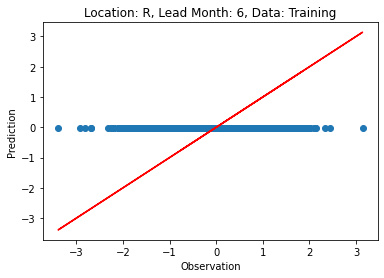

Training Model 2
Epoch [20/400], Avg Loss: 4.9673,  Val MSE: 0.5862
Epoch [40/400], Avg Loss: 1.0936,  Val MSE: 0.6957
Epoch [60/400], Avg Loss: 0.7856,  Val MSE: 0.7066
Epoch [80/400], Avg Loss: 0.7718,  Val MSE: 0.7068
Epoch [100/400], Avg Loss: 0.7657,  Val MSE: 0.7069
Epoch [120/400], Avg Loss: 0.7634,  Val MSE: 0.7069
Epoch [140/400], Avg Loss: 0.7625,  Val MSE: 0.7069
Epoch [160/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [180/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [200/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [220/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [240/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [260/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [280/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [300/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [320/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [340/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [360/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [380/400], Avg Loss: 0.7623,  Val MSE: 0.7069

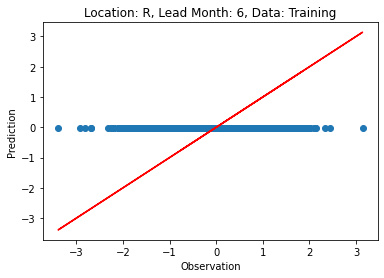

Training Model 3
Epoch [20/400], Avg Loss: 4.9892,  Val MSE: 0.5921
Epoch [40/400], Avg Loss: 1.0833,  Val MSE: 0.6995
Epoch [60/400], Avg Loss: 0.7813,  Val MSE: 0.7067
Epoch [80/400], Avg Loss: 0.7690,  Val MSE: 0.7068
Epoch [100/400], Avg Loss: 0.7646,  Val MSE: 0.7069
Epoch [120/400], Avg Loss: 0.7630,  Val MSE: 0.7069
Epoch [140/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [160/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [180/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [200/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [220/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [240/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [260/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [280/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [300/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [320/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [340/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [360/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [380/400], Avg Loss: 0.7623,  Val MSE: 0.7069

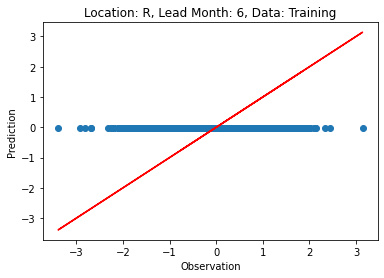

Training Model 4
Epoch [20/400], Avg Loss: 4.9981,  Val MSE: 0.5868
Epoch [40/400], Avg Loss: 1.0982,  Val MSE: 0.6929
Epoch [60/400], Avg Loss: 0.7878,  Val MSE: 0.7066
Epoch [80/400], Avg Loss: 0.7726,  Val MSE: 0.7067
Epoch [100/400], Avg Loss: 0.7663,  Val MSE: 0.7069
Epoch [120/400], Avg Loss: 0.7630,  Val MSE: 0.7069
Epoch [140/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [160/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [180/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [200/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [220/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [240/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [260/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [280/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [300/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [320/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [340/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [360/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [380/400], Avg Loss: 0.7623,  Val MSE: 0.7069

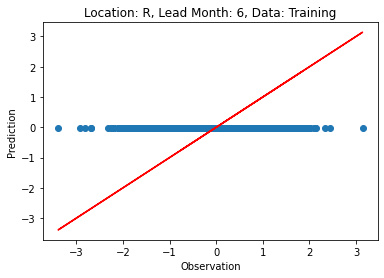

Training Model 5
Epoch [20/400], Avg Loss: 5.0088,  Val MSE: 0.5807
Epoch [40/400], Avg Loss: 1.0940,  Val MSE: 0.6987
Epoch [60/400], Avg Loss: 0.7814,  Val MSE: 0.7066
Epoch [80/400], Avg Loss: 0.7698,  Val MSE: 0.7068
Epoch [100/400], Avg Loss: 0.7649,  Val MSE: 0.7069
Epoch [120/400], Avg Loss: 0.7626,  Val MSE: 0.7069
Epoch [140/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [160/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [180/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [200/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [220/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [240/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [260/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [280/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [300/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [320/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [340/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [360/400], Avg Loss: 0.7623,  Val MSE: 0.7069
Epoch [380/400], Avg Loss: 0.7623,  Val MSE: 0.7069

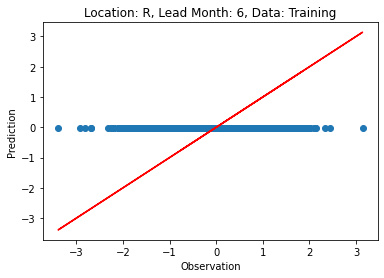

Location: R
Persistence MSE: 0.8115
Test MSE: 0.7069
Persist CSI: 0.2203
Persist CSI 80: 0.2652
Test CSI: 0.0000
Test CSI 80: 0.0000


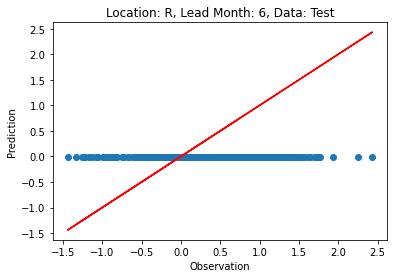

Location: CS
90th Threshold: 0.91003907
80th Threshold: 0.55167216
Training Model 1
Epoch [20/400], Avg Loss: 4.7804,  Val MSE: 0.3317
Epoch [40/400], Avg Loss: 0.8048,  Val MSE: 0.3733
Epoch [60/400], Avg Loss: 0.5112,  Val MSE: 0.3755
Epoch [80/400], Avg Loss: 0.5008,  Val MSE: 0.3754
Epoch [100/400], Avg Loss: 0.4966,  Val MSE: 0.3754
Epoch [120/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [140/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [160/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [180/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [200/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [220/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [240/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [260/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [280/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [300/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [320/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [340/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [360/400], Avg Loss: 0.4951,  

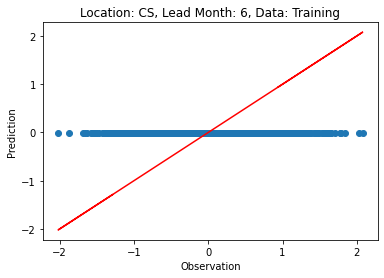

Training Model 2
Epoch [20/400], Avg Loss: 4.7260,  Val MSE: 0.3329
Epoch [40/400], Avg Loss: 0.8085,  Val MSE: 0.3728
Epoch [60/400], Avg Loss: 0.5130,  Val MSE: 0.3755
Epoch [80/400], Avg Loss: 0.5029,  Val MSE: 0.3754
Epoch [100/400], Avg Loss: 0.4979,  Val MSE: 0.3754
Epoch [120/400], Avg Loss: 0.4954,  Val MSE: 0.3754
Epoch [140/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [160/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [180/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [200/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [220/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [240/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [260/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [280/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [300/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [320/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [340/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [360/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [380/400], Avg Loss: 0.4951,  Val MSE: 0.3754

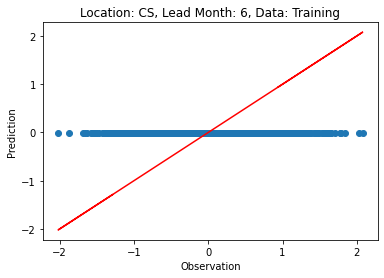

Training Model 3
Epoch [20/400], Avg Loss: 4.7785,  Val MSE: 0.3316
Epoch [40/400], Avg Loss: 0.8118,  Val MSE: 0.3717
Epoch [60/400], Avg Loss: 0.5135,  Val MSE: 0.3755
Epoch [80/400], Avg Loss: 0.5024,  Val MSE: 0.3754
Epoch [100/400], Avg Loss: 0.4981,  Val MSE: 0.3754
Epoch [120/400], Avg Loss: 0.4959,  Val MSE: 0.3754
Epoch [140/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [160/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [180/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [200/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [220/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [240/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [260/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [280/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [300/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [320/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [340/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [360/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [380/400], Avg Loss: 0.4951,  Val MSE: 0.3754

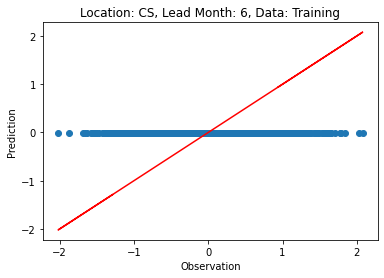

Training Model 4
Epoch [20/400], Avg Loss: 4.7688,  Val MSE: 0.3285
Epoch [40/400], Avg Loss: 0.8215,  Val MSE: 0.3725
Epoch [60/400], Avg Loss: 0.5158,  Val MSE: 0.3755
Epoch [80/400], Avg Loss: 0.5048,  Val MSE: 0.3754
Epoch [100/400], Avg Loss: 0.4985,  Val MSE: 0.3754
Epoch [120/400], Avg Loss: 0.4960,  Val MSE: 0.3754
Epoch [140/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [160/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [180/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [200/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [220/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [240/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [260/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [280/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [300/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [320/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [340/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [360/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [380/400], Avg Loss: 0.4952,  Val MSE: 0.3754

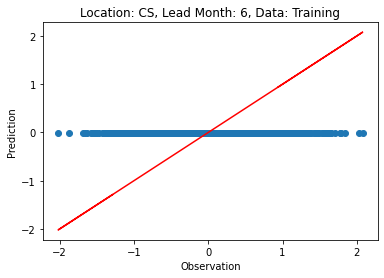

Training Model 5
Epoch [20/400], Avg Loss: 4.7687,  Val MSE: 0.3286
Epoch [40/400], Avg Loss: 0.8117,  Val MSE: 0.3728
Epoch [60/400], Avg Loss: 0.5131,  Val MSE: 0.3754
Epoch [80/400], Avg Loss: 0.5021,  Val MSE: 0.3754
Epoch [100/400], Avg Loss: 0.4964,  Val MSE: 0.3754
Epoch [120/400], Avg Loss: 0.4952,  Val MSE: 0.3754
Epoch [140/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [160/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [180/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [200/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [220/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [240/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [260/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [280/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [300/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [320/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [340/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [360/400], Avg Loss: 0.4951,  Val MSE: 0.3754
Epoch [380/400], Avg Loss: 0.4951,  Val MSE: 0.3754

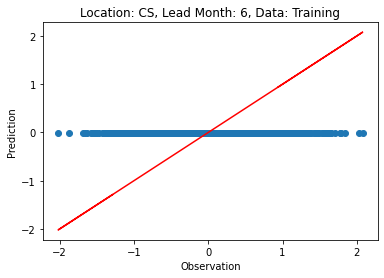

Location: CS
Persistence MSE: 0.5333
Test MSE: 0.3754
Persist CSI: 0.2000
Persist CSI 80: 0.2331
Test CSI: 0.0000
Test CSI 80: 0.0000


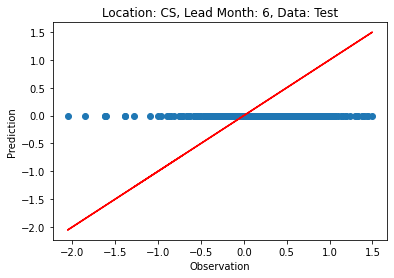

Location: SI
90th Threshold: 1.0225493
80th Threshold: 0.6193951
Training Model 1
Epoch [20/400], Avg Loss: 4.9104,  Val MSE: 0.5787
Epoch [40/400], Avg Loss: 0.9570,  Val MSE: 0.6119
Epoch [60/400], Avg Loss: 0.7008,  Val MSE: 0.6127
Epoch [80/400], Avg Loss: 0.6929,  Val MSE: 0.6128
Epoch [100/400], Avg Loss: 0.6895,  Val MSE: 0.6128
Epoch [120/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [140/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [160/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [180/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [200/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [220/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [240/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [260/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [280/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [300/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [320/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [340/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [360/400], Avg Loss: 0.6885,  Va

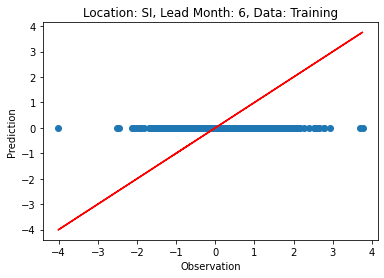

Training Model 2
Epoch [20/400], Avg Loss: 4.9543,  Val MSE: 0.5759
Epoch [40/400], Avg Loss: 0.9775,  Val MSE: 0.6113
Epoch [60/400], Avg Loss: 0.7033,  Val MSE: 0.6127
Epoch [80/400], Avg Loss: 0.6943,  Val MSE: 0.6128
Epoch [100/400], Avg Loss: 0.6904,  Val MSE: 0.6128
Epoch [120/400], Avg Loss: 0.6888,  Val MSE: 0.6128
Epoch [140/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [160/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [180/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [200/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [220/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [240/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [260/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [280/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [300/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [320/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [340/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [360/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [380/400], Avg Loss: 0.6885,  Val MSE: 0.6128

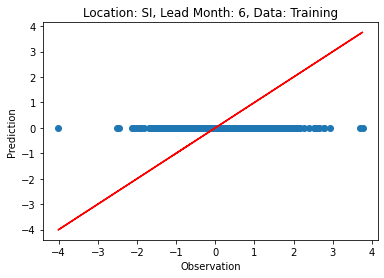

Training Model 3
Epoch [20/400], Avg Loss: 4.9161,  Val MSE: 0.5793
Epoch [40/400], Avg Loss: 0.9632,  Val MSE: 0.6115
Epoch [60/400], Avg Loss: 0.7022,  Val MSE: 0.6127
Epoch [80/400], Avg Loss: 0.6945,  Val MSE: 0.6128
Epoch [100/400], Avg Loss: 0.6902,  Val MSE: 0.6128
Epoch [120/400], Avg Loss: 0.6891,  Val MSE: 0.6128
Epoch [140/400], Avg Loss: 0.6886,  Val MSE: 0.6128
Epoch [160/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [180/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [200/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [220/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [240/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [260/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [280/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [300/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [320/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [340/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [360/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [380/400], Avg Loss: 0.6885,  Val MSE: 0.6128

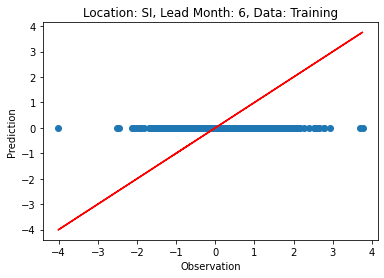

Training Model 4
Epoch [20/400], Avg Loss: 4.9574,  Val MSE: 0.5773
Epoch [40/400], Avg Loss: 0.9725,  Val MSE: 0.6118
Epoch [60/400], Avg Loss: 0.7017,  Val MSE: 0.6127
Epoch [80/400], Avg Loss: 0.6928,  Val MSE: 0.6128
Epoch [100/400], Avg Loss: 0.6893,  Val MSE: 0.6128
Epoch [120/400], Avg Loss: 0.6889,  Val MSE: 0.6128
Epoch [140/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [160/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [180/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [200/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [220/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [240/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [260/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [280/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [300/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [320/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [340/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [360/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [380/400], Avg Loss: 0.6885,  Val MSE: 0.6128

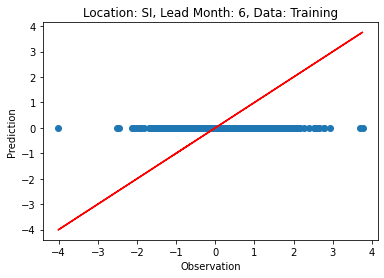

Training Model 5
Epoch [20/400], Avg Loss: 4.9439,  Val MSE: 0.5769
Epoch [40/400], Avg Loss: 0.9704,  Val MSE: 0.6117
Epoch [60/400], Avg Loss: 0.7024,  Val MSE: 0.6127
Epoch [80/400], Avg Loss: 0.6938,  Val MSE: 0.6128
Epoch [100/400], Avg Loss: 0.6898,  Val MSE: 0.6128
Epoch [120/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [140/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [160/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [180/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [200/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [220/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [240/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [260/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [280/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [300/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [320/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [340/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [360/400], Avg Loss: 0.6885,  Val MSE: 0.6128
Epoch [380/400], Avg Loss: 0.6885,  Val MSE: 0.6128

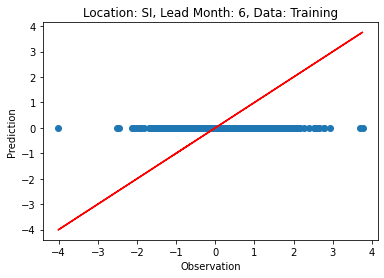

Location: SI
Persistence MSE: 0.9592
Test MSE: 0.6128
Persist CSI: 0.0339
Persist CSI 80: 0.1750
Test CSI: 0.0000
Test CSI 80: 0.0000


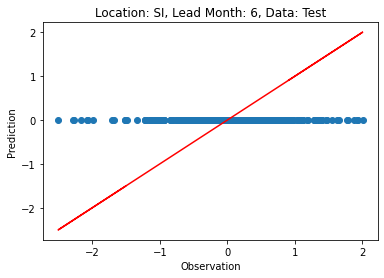

Location: CR
90th Threshold: 1.0787578
80th Threshold: 0.6911178
Training Model 1
Epoch [20/400], Avg Loss: 4.9686,  Val MSE: 0.4459
Epoch [40/400], Avg Loss: 1.0503,  Val MSE: 0.5602
Epoch [60/400], Avg Loss: 0.7577,  Val MSE: 0.5642
Epoch [80/400], Avg Loss: 0.7484,  Val MSE: 0.5643
Epoch [100/400], Avg Loss: 0.7443,  Val MSE: 0.5644
Epoch [120/400], Avg Loss: 0.7427,  Val MSE: 0.5644
Epoch [140/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [360/400], Avg Loss: 0.7426,  Va

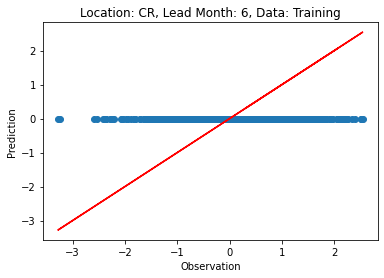

Training Model 2
Epoch [20/400], Avg Loss: 5.0040,  Val MSE: 0.4451
Epoch [40/400], Avg Loss: 1.0439,  Val MSE: 0.5596
Epoch [60/400], Avg Loss: 0.7582,  Val MSE: 0.5642
Epoch [80/400], Avg Loss: 0.7485,  Val MSE: 0.5643
Epoch [100/400], Avg Loss: 0.7443,  Val MSE: 0.5644
Epoch [120/400], Avg Loss: 0.7427,  Val MSE: 0.5644
Epoch [140/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [360/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [380/400], Avg Loss: 0.7426,  Val MSE: 0.5644

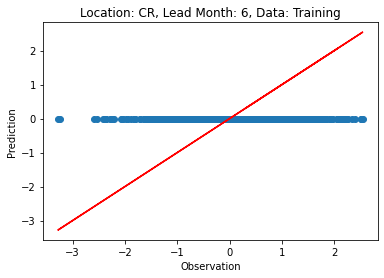

Training Model 3
Epoch [20/400], Avg Loss: 4.9429,  Val MSE: 0.4445
Epoch [40/400], Avg Loss: 1.0475,  Val MSE: 0.5559
Epoch [60/400], Avg Loss: 0.7606,  Val MSE: 0.5643
Epoch [80/400], Avg Loss: 0.7500,  Val MSE: 0.5643
Epoch [100/400], Avg Loss: 0.7460,  Val MSE: 0.5644
Epoch [120/400], Avg Loss: 0.7438,  Val MSE: 0.5644
Epoch [140/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [360/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [380/400], Avg Loss: 0.7426,  Val MSE: 0.5644

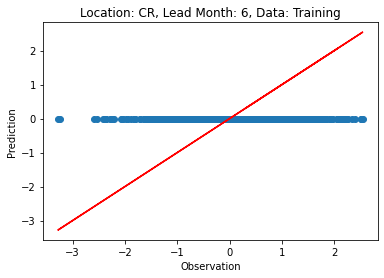

Training Model 4
Epoch [20/400], Avg Loss: 4.9357,  Val MSE: 0.4455
Epoch [40/400], Avg Loss: 1.0462,  Val MSE: 0.5591
Epoch [60/400], Avg Loss: 0.7595,  Val MSE: 0.5642
Epoch [80/400], Avg Loss: 0.7505,  Val MSE: 0.5643
Epoch [100/400], Avg Loss: 0.7458,  Val MSE: 0.5644
Epoch [120/400], Avg Loss: 0.7435,  Val MSE: 0.5644
Epoch [140/400], Avg Loss: 0.7429,  Val MSE: 0.5644
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [360/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [380/400], Avg Loss: 0.7426,  Val MSE: 0.5644

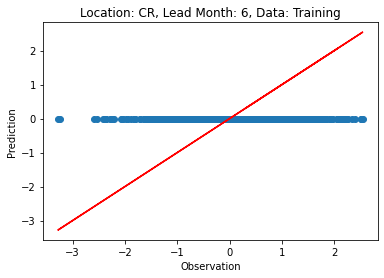

Training Model 5
Epoch [20/400], Avg Loss: 4.9487,  Val MSE: 0.4474
Epoch [40/400], Avg Loss: 1.0436,  Val MSE: 0.5606
Epoch [60/400], Avg Loss: 0.7587,  Val MSE: 0.5642
Epoch [80/400], Avg Loss: 0.7490,  Val MSE: 0.5643
Epoch [100/400], Avg Loss: 0.7444,  Val MSE: 0.5644
Epoch [120/400], Avg Loss: 0.7428,  Val MSE: 0.5644
Epoch [140/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [160/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [180/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [200/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [220/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [240/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [260/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [280/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [300/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [320/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [340/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [360/400], Avg Loss: 0.7426,  Val MSE: 0.5644
Epoch [380/400], Avg Loss: 0.7426,  Val MSE: 0.5644

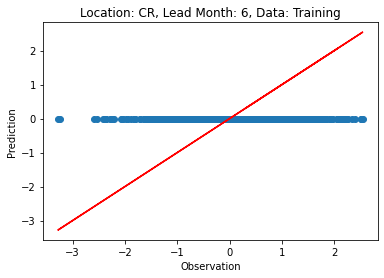

Location: CR
Persistence MSE: 0.6796
Test MSE: 0.5644
Persist CSI: 0.1500
Persist CSI 80: 0.2276
Test CSI: 0.0000
Test CSI 80: 0.0000


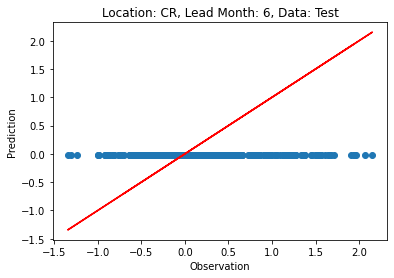

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6430332
Training Model 1
Epoch [20/400], Avg Loss: 4.8522,  Val MSE: 0.5960
Epoch [40/400], Avg Loss: 0.8831,  Val MSE: 0.6072
Epoch [60/400], Avg Loss: 0.6658,  Val MSE: 0.6072
Epoch [80/400], Avg Loss: 0.6604,  Val MSE: 0.6072
Epoch [100/400], Avg Loss: 0.6590,  Val MSE: 0.6072
Epoch [120/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [140/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [160/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [180/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [200/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [220/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [240/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [260/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [280/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [300/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [320/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [340/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [360/400], Avg Loss: 0.6586,  Va

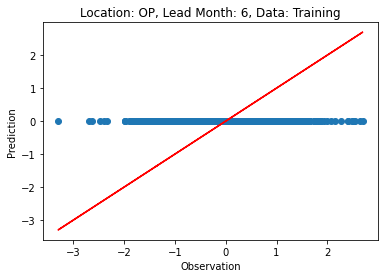

Training Model 2
Epoch [20/400], Avg Loss: 4.9362,  Val MSE: 0.5903
Epoch [40/400], Avg Loss: 0.9022,  Val MSE: 0.6071
Epoch [60/400], Avg Loss: 0.6676,  Val MSE: 0.6072
Epoch [80/400], Avg Loss: 0.6614,  Val MSE: 0.6072
Epoch [100/400], Avg Loss: 0.6592,  Val MSE: 0.6072
Epoch [120/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [140/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [160/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [180/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [200/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [220/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [240/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [260/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [280/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [300/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [320/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [340/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [360/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [380/400], Avg Loss: 0.6586,  Val MSE: 0.6072

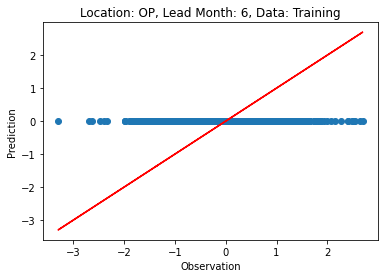

Training Model 3
Epoch [20/400], Avg Loss: 4.9283,  Val MSE: 0.5893
Epoch [40/400], Avg Loss: 0.8999,  Val MSE: 0.6071
Epoch [60/400], Avg Loss: 0.6676,  Val MSE: 0.6072
Epoch [80/400], Avg Loss: 0.6614,  Val MSE: 0.6072
Epoch [100/400], Avg Loss: 0.6593,  Val MSE: 0.6072
Epoch [120/400], Avg Loss: 0.6588,  Val MSE: 0.6072
Epoch [140/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [160/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [180/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [200/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [220/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [240/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [260/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [280/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [300/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [320/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [340/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [360/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [380/400], Avg Loss: 0.6586,  Val MSE: 0.6072

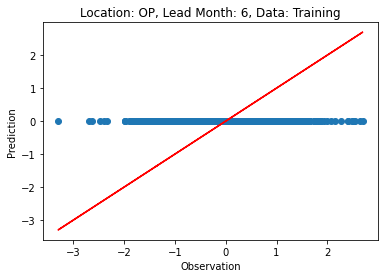

Training Model 4
Epoch [20/400], Avg Loss: 4.9281,  Val MSE: 0.5885
Epoch [40/400], Avg Loss: 0.9044,  Val MSE: 0.6071
Epoch [60/400], Avg Loss: 0.6661,  Val MSE: 0.6072
Epoch [80/400], Avg Loss: 0.6612,  Val MSE: 0.6072
Epoch [100/400], Avg Loss: 0.6591,  Val MSE: 0.6072
Epoch [120/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [140/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [160/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [180/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [200/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [220/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [240/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [260/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [280/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [300/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [320/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [340/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [360/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [380/400], Avg Loss: 0.6586,  Val MSE: 0.6072

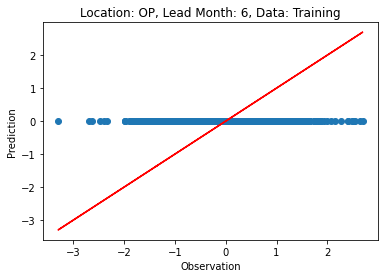

Training Model 5
Epoch [20/400], Avg Loss: 4.9029,  Val MSE: 0.5929
Epoch [40/400], Avg Loss: 0.8890,  Val MSE: 0.6071
Epoch [60/400], Avg Loss: 0.6672,  Val MSE: 0.6072
Epoch [80/400], Avg Loss: 0.6622,  Val MSE: 0.6072
Epoch [100/400], Avg Loss: 0.6591,  Val MSE: 0.6072
Epoch [120/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [140/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [160/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [180/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [200/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [220/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [240/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [260/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [280/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [300/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [320/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [340/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [360/400], Avg Loss: 0.6586,  Val MSE: 0.6072
Epoch [380/400], Avg Loss: 0.6586,  Val MSE: 0.6072

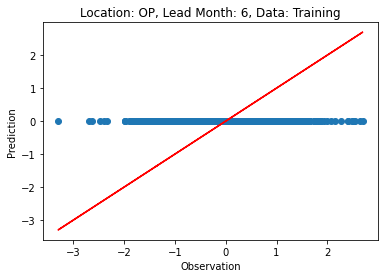

Location: OP
Persistence MSE: 0.9675
Test MSE: 0.6072
Persist CSI: 0.0164
Persist CSI 80: 0.1058
Test CSI: 0.0000
Test CSI 80: 0.0000


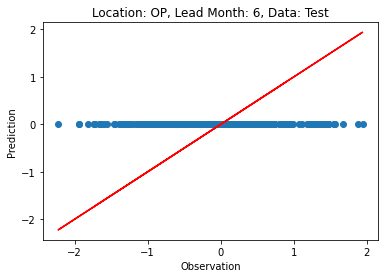

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.81318116
Training Model 1
Epoch [20/400], Avg Loss: 5.1991,  Val MSE: 1.0582
Epoch [40/400], Avg Loss: 1.3731,  Val MSE: 1.2198
Epoch [60/400], Avg Loss: 1.0101,  Val MSE: 1.2502
Epoch [80/400], Avg Loss: 0.9875,  Val MSE: 1.2498
Epoch [100/400], Avg Loss: 0.9793,  Val MSE: 1.2498
Epoch [120/400], Avg Loss: 0.9754,  Val MSE: 1.2498
Epoch [140/400], Avg Loss: 0.9744,  Val MSE: 1.2498
Epoch [160/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [180/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [200/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [220/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [240/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [260/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [280/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [300/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [320/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [340/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [360/400], Avg Loss: 0.9739,  Va

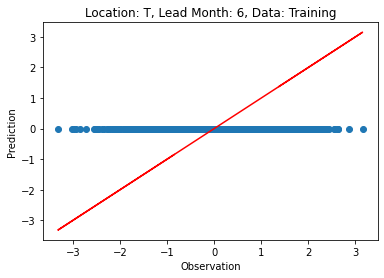

Training Model 2
Epoch [20/400], Avg Loss: 5.1614,  Val MSE: 1.0463
Epoch [40/400], Avg Loss: 1.3719,  Val MSE: 1.2145
Epoch [60/400], Avg Loss: 1.0132,  Val MSE: 1.2506
Epoch [80/400], Avg Loss: 0.9897,  Val MSE: 1.2498
Epoch [100/400], Avg Loss: 0.9815,  Val MSE: 1.2498
Epoch [120/400], Avg Loss: 0.9767,  Val MSE: 1.2498
Epoch [140/400], Avg Loss: 0.9743,  Val MSE: 1.2498
Epoch [160/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [180/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [200/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [220/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [240/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [260/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [280/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [300/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [320/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [340/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [360/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [380/400], Avg Loss: 0.9739,  Val MSE: 1.2498

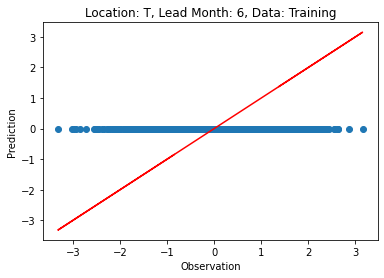

Training Model 3
Epoch [20/400], Avg Loss: 5.1581,  Val MSE: 1.0484
Epoch [40/400], Avg Loss: 1.3746,  Val MSE: 1.2120
Epoch [60/400], Avg Loss: 1.0109,  Val MSE: 1.2507
Epoch [80/400], Avg Loss: 0.9888,  Val MSE: 1.2501
Epoch [100/400], Avg Loss: 0.9812,  Val MSE: 1.2500
Epoch [120/400], Avg Loss: 0.9776,  Val MSE: 1.2499
Epoch [140/400], Avg Loss: 0.9755,  Val MSE: 1.2498
Epoch [160/400], Avg Loss: 0.9744,  Val MSE: 1.2498
Epoch [180/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [200/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [220/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [240/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [260/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [280/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [300/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [320/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [340/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [360/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [380/400], Avg Loss: 0.9739,  Val MSE: 1.2498

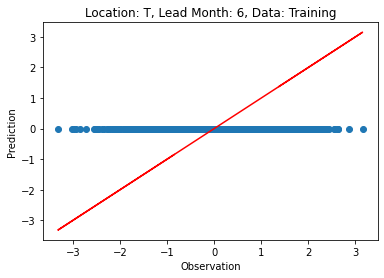

Training Model 4
Epoch [20/400], Avg Loss: 5.1754,  Val MSE: 1.0490
Epoch [40/400], Avg Loss: 1.3800,  Val MSE: 1.2239
Epoch [60/400], Avg Loss: 1.0053,  Val MSE: 1.2505
Epoch [80/400], Avg Loss: 0.9877,  Val MSE: 1.2499
Epoch [100/400], Avg Loss: 0.9797,  Val MSE: 1.2498
Epoch [120/400], Avg Loss: 0.9757,  Val MSE: 1.2498
Epoch [140/400], Avg Loss: 0.9742,  Val MSE: 1.2498
Epoch [160/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [180/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [200/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [220/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [240/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [260/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [280/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [300/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [320/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [340/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [360/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [380/400], Avg Loss: 0.9739,  Val MSE: 1.2498

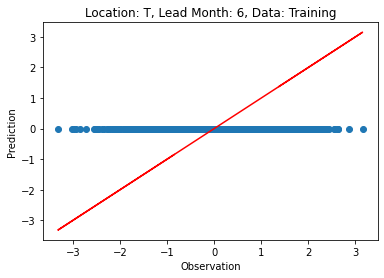

Training Model 5
Epoch [20/400], Avg Loss: 5.1356,  Val MSE: 1.0403
Epoch [40/400], Avg Loss: 1.3742,  Val MSE: 1.2146
Epoch [60/400], Avg Loss: 1.0215,  Val MSE: 1.2500
Epoch [80/400], Avg Loss: 0.9922,  Val MSE: 1.2496
Epoch [100/400], Avg Loss: 0.9804,  Val MSE: 1.2498
Epoch [120/400], Avg Loss: 0.9754,  Val MSE: 1.2498
Epoch [140/400], Avg Loss: 0.9744,  Val MSE: 1.2498
Epoch [160/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [180/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [200/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [220/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [240/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [260/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [280/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [300/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [320/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [340/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [360/400], Avg Loss: 0.9739,  Val MSE: 1.2498
Epoch [380/400], Avg Loss: 0.9739,  Val MSE: 1.2498

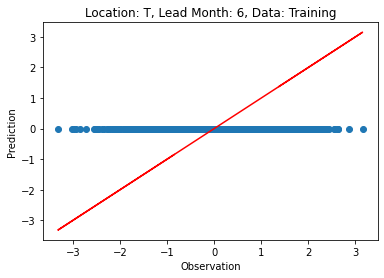

Location: T
Persistence MSE: 1.3399
Test MSE: 1.2498
Persist CSI: 0.1571
Persist CSI 80: 0.2487
Test CSI: 0.0000
Test CSI 80: 0.0000


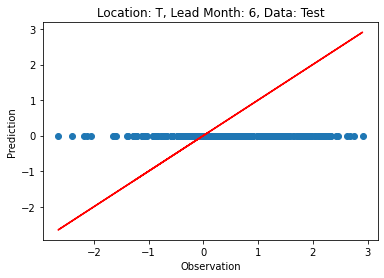

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.65854365
Training Model 1
Epoch [20/400], Avg Loss: 5.0751,  Val MSE: 0.6023
Epoch [40/400], Avg Loss: 1.0453,  Val MSE: 0.6107
Epoch [60/400], Avg Loss: 0.8227,  Val MSE: 0.6107
Epoch [80/400], Avg Loss: 0.8165,  Val MSE: 0.6106
Epoch [100/400], Avg Loss: 0.8143,  Val MSE: 0.6106
Epoch [120/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [140/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [160/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [180/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [200/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [220/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [240/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [260/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [280/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [300/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [320/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [340/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [360/400], Avg Loss: 0.8141,  V

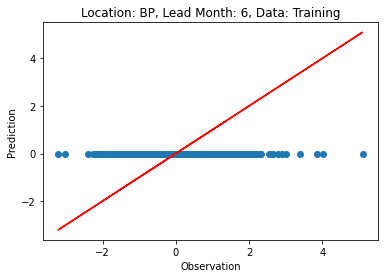

Training Model 2
Epoch [20/400], Avg Loss: 5.0969,  Val MSE: 0.6008
Epoch [40/400], Avg Loss: 1.0484,  Val MSE: 0.6109
Epoch [60/400], Avg Loss: 0.8228,  Val MSE: 0.6107
Epoch [80/400], Avg Loss: 0.8165,  Val MSE: 0.6106
Epoch [100/400], Avg Loss: 0.8143,  Val MSE: 0.6106
Epoch [120/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [140/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [160/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [180/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [200/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [220/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [240/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [260/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [280/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [300/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [320/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [340/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [360/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [380/400], Avg Loss: 0.8141,  Val MSE: 0.6106

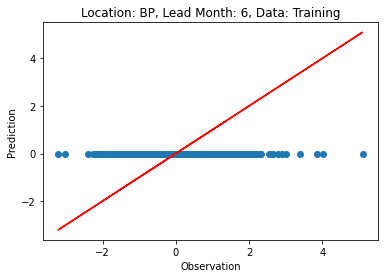

Training Model 3
Epoch [20/400], Avg Loss: 5.1170,  Val MSE: 0.6005
Epoch [40/400], Avg Loss: 1.0533,  Val MSE: 0.6108
Epoch [60/400], Avg Loss: 0.8219,  Val MSE: 0.6107
Epoch [80/400], Avg Loss: 0.8156,  Val MSE: 0.6106
Epoch [100/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [120/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [140/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [160/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [180/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [200/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [220/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [240/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [260/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [280/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [300/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [320/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [340/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [360/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [380/400], Avg Loss: 0.8141,  Val MSE: 0.6106

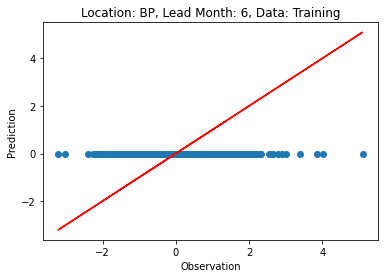

Training Model 4
Epoch [20/400], Avg Loss: 5.0562,  Val MSE: 0.5998
Epoch [40/400], Avg Loss: 1.0412,  Val MSE: 0.6107
Epoch [60/400], Avg Loss: 0.8234,  Val MSE: 0.6107
Epoch [80/400], Avg Loss: 0.8173,  Val MSE: 0.6107
Epoch [100/400], Avg Loss: 0.8146,  Val MSE: 0.6106
Epoch [120/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [140/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [160/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [180/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [200/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [220/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [240/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [260/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [280/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [300/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [320/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [340/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [360/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [380/400], Avg Loss: 0.8141,  Val MSE: 0.6106

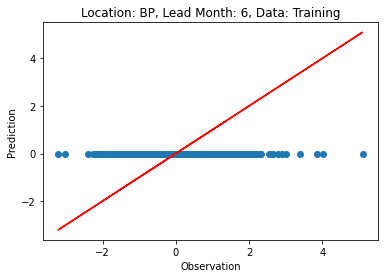

Training Model 5
Epoch [20/400], Avg Loss: 5.0532,  Val MSE: 0.5973
Epoch [40/400], Avg Loss: 1.0561,  Val MSE: 0.6107
Epoch [60/400], Avg Loss: 0.8247,  Val MSE: 0.6107
Epoch [80/400], Avg Loss: 0.8185,  Val MSE: 0.6107
Epoch [100/400], Avg Loss: 0.8146,  Val MSE: 0.6106
Epoch [120/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [140/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [160/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [180/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [200/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [220/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [240/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [260/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [280/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [300/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [320/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [340/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [360/400], Avg Loss: 0.8141,  Val MSE: 0.6106
Epoch [380/400], Avg Loss: 0.8141,  Val MSE: 0.6106

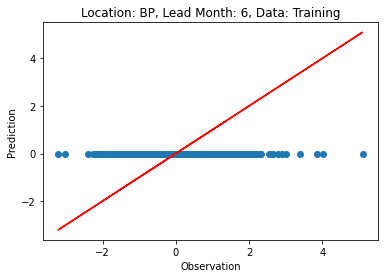

Location: BP
Persistence MSE: 1.1322
Test MSE: 0.6106
Persist CSI: 0.0556
Persist CSI 80: 0.0753
Test CSI: 0.0000
Test CSI 80: 0.0000


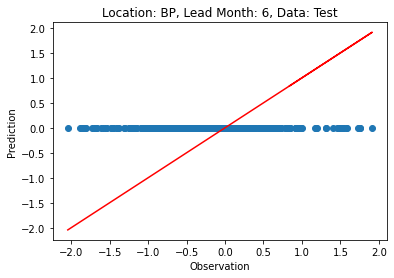

Location: BOP
90th Threshold: 1.1161726
80th Threshold: 0.72880715
Training Model 1
Epoch [20/400], Avg Loss: 4.9944,  Val MSE: 0.3430
Epoch [40/400], Avg Loss: 1.1888,  Val MSE: 0.4381
Epoch [60/400], Avg Loss: 0.8464,  Val MSE: 0.4623
Epoch [80/400], Avg Loss: 0.8180,  Val MSE: 0.4633
Epoch [100/400], Avg Loss: 0.8076,  Val MSE: 0.4629
Epoch [120/400], Avg Loss: 0.8029,  Val MSE: 0.4628
Epoch [140/400], Avg Loss: 0.8004,  Val MSE: 0.4627
Epoch [160/400], Avg Loss: 0.7996,  Val MSE: 0.4627
Epoch [180/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [200/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [220/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [240/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [260/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [280/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [300/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [320/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [340/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [360/400], Avg Loss: 0.7993,  

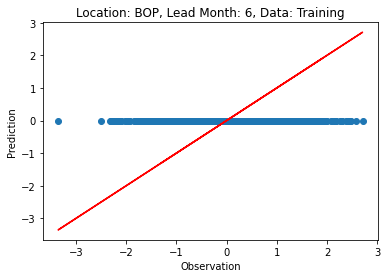

Training Model 2
Epoch [20/400], Avg Loss: 5.0079,  Val MSE: 0.3464
Epoch [40/400], Avg Loss: 1.1819,  Val MSE: 0.4395
Epoch [60/400], Avg Loss: 0.8396,  Val MSE: 0.4631
Epoch [80/400], Avg Loss: 0.8140,  Val MSE: 0.4632
Epoch [100/400], Avg Loss: 0.8063,  Val MSE: 0.4629
Epoch [120/400], Avg Loss: 0.8025,  Val MSE: 0.4628
Epoch [140/400], Avg Loss: 0.8005,  Val MSE: 0.4627
Epoch [160/400], Avg Loss: 0.7996,  Val MSE: 0.4627
Epoch [180/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [200/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [220/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [240/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [260/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [280/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [300/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [320/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [340/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [360/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [380/400], Avg Loss: 0.7993,  Val MSE: 0.4627

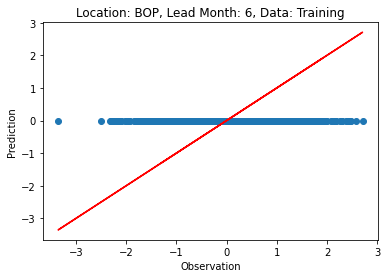

Training Model 3
Epoch [20/400], Avg Loss: 4.9478,  Val MSE: 0.3436
Epoch [40/400], Avg Loss: 1.1804,  Val MSE: 0.4384
Epoch [60/400], Avg Loss: 0.8456,  Val MSE: 0.4635
Epoch [80/400], Avg Loss: 0.8153,  Val MSE: 0.4633
Epoch [100/400], Avg Loss: 0.8075,  Val MSE: 0.4629
Epoch [120/400], Avg Loss: 0.8028,  Val MSE: 0.4627
Epoch [140/400], Avg Loss: 0.8001,  Val MSE: 0.4627
Epoch [160/400], Avg Loss: 0.7994,  Val MSE: 0.4627
Epoch [180/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [200/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [220/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [240/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [260/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [280/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [300/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [320/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [340/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [360/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [380/400], Avg Loss: 0.7993,  Val MSE: 0.4627

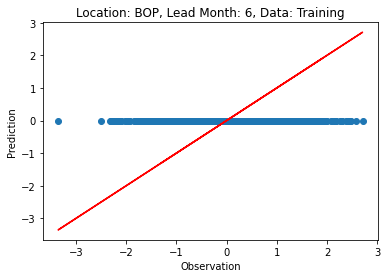

Training Model 4
Epoch [20/400], Avg Loss: 4.9771,  Val MSE: 0.3471
Epoch [40/400], Avg Loss: 1.1846,  Val MSE: 0.4379
Epoch [60/400], Avg Loss: 0.8391,  Val MSE: 0.4639
Epoch [80/400], Avg Loss: 0.8144,  Val MSE: 0.4632
Epoch [100/400], Avg Loss: 0.8068,  Val MSE: 0.4629
Epoch [120/400], Avg Loss: 0.8025,  Val MSE: 0.4627
Epoch [140/400], Avg Loss: 0.8002,  Val MSE: 0.4627
Epoch [160/400], Avg Loss: 0.7994,  Val MSE: 0.4627
Epoch [180/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [200/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [220/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [240/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [260/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [280/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [300/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [320/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [340/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [360/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [380/400], Avg Loss: 0.7993,  Val MSE: 0.4627

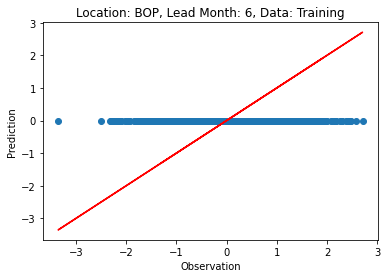

Training Model 5
Epoch [20/400], Avg Loss: 4.9925,  Val MSE: 0.3413
Epoch [40/400], Avg Loss: 1.1879,  Val MSE: 0.4408
Epoch [60/400], Avg Loss: 0.8399,  Val MSE: 0.4636
Epoch [80/400], Avg Loss: 0.8136,  Val MSE: 0.4630
Epoch [100/400], Avg Loss: 0.8047,  Val MSE: 0.4628
Epoch [120/400], Avg Loss: 0.8012,  Val MSE: 0.4627
Epoch [140/400], Avg Loss: 0.7995,  Val MSE: 0.4627
Epoch [160/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [180/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [200/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [220/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [240/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [260/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [280/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [300/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [320/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [340/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [360/400], Avg Loss: 0.7993,  Val MSE: 0.4627
Epoch [380/400], Avg Loss: 0.7993,  Val MSE: 0.4627

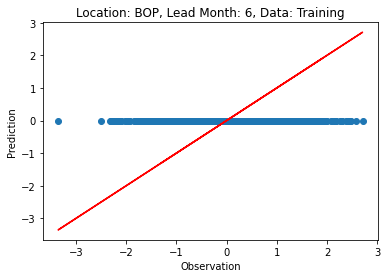

Location: BOP
Persistence MSE: 0.4797
Test MSE: 0.4627
Persist CSI: 0.0800
Persist CSI 80: 0.2188
Test CSI: 0.0000
Test CSI 80: 0.0000


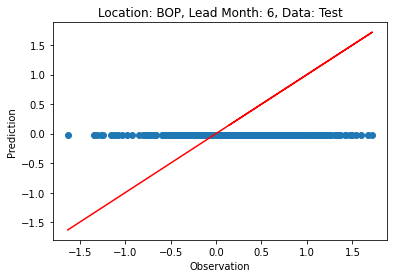

Location: W
90th Threshold: 1.3282756
80th Threshold: 0.8538197
Training Model 1
Epoch [20/400], Avg Loss: 5.2697,  Val MSE: 1.2089
Epoch [40/400], Avg Loss: 1.4723,  Val MSE: 1.3901
Epoch [60/400], Avg Loss: 1.1155,  Val MSE: 1.4208
Epoch [80/400], Avg Loss: 1.0946,  Val MSE: 1.4210
Epoch [100/400], Avg Loss: 1.0867,  Val MSE: 1.4211
Epoch [120/400], Avg Loss: 1.0831,  Val MSE: 1.4211
Epoch [140/400], Avg Loss: 1.0814,  Val MSE: 1.4211
Epoch [160/400], Avg Loss: 1.0806,  Val MSE: 1.4211
Epoch [180/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [200/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [220/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [240/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [260/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [280/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [300/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [320/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [340/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [360/400], Avg Loss: 1.0805,  Val

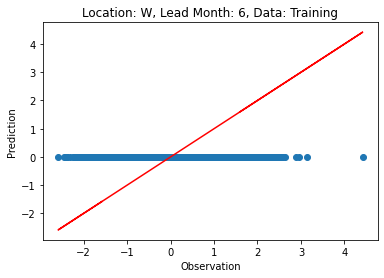

Training Model 2
Epoch [20/400], Avg Loss: 5.3197,  Val MSE: 1.1762
Epoch [40/400], Avg Loss: 1.4945,  Val MSE: 1.3821
Epoch [60/400], Avg Loss: 1.1167,  Val MSE: 1.4210
Epoch [80/400], Avg Loss: 1.0978,  Val MSE: 1.4210
Epoch [100/400], Avg Loss: 1.0898,  Val MSE: 1.4210
Epoch [120/400], Avg Loss: 1.0841,  Val MSE: 1.4210
Epoch [140/400], Avg Loss: 1.0812,  Val MSE: 1.4211
Epoch [160/400], Avg Loss: 1.0806,  Val MSE: 1.4211
Epoch [180/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [200/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [220/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [240/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [260/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [280/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [300/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [320/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [340/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [360/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [380/400], Avg Loss: 1.0805,  Val MSE: 1.4211

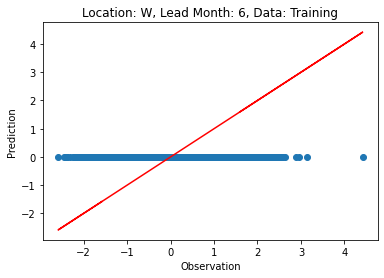

Training Model 3
Epoch [20/400], Avg Loss: 5.3016,  Val MSE: 1.2065
Epoch [40/400], Avg Loss: 1.4492,  Val MSE: 1.3395
Epoch [60/400], Avg Loss: 1.1218,  Val MSE: 1.2586
Epoch [80/400], Avg Loss: 1.0623,  Val MSE: 1.1733
Epoch [100/400], Avg Loss: 1.0371,  Val MSE: 1.1717
Epoch [120/400], Avg Loss: 1.0204,  Val MSE: 1.1874
Epoch [140/400], Avg Loss: 1.0070,  Val MSE: 1.2143
Epoch [160/400], Avg Loss: 0.9939,  Val MSE: 1.2431
Epoch [180/400], Avg Loss: 0.9829,  Val MSE: 1.2710
Epoch [200/400], Avg Loss: 0.9757,  Val MSE: 1.2899
Epoch [220/400], Avg Loss: 0.9697,  Val MSE: 1.3009
Epoch [240/400], Avg Loss: 0.9644,  Val MSE: 1.3091
Epoch [260/400], Avg Loss: 0.9600,  Val MSE: 1.3137
Epoch [280/400], Avg Loss: 0.9559,  Val MSE: 1.3168
Epoch [300/400], Avg Loss: 0.9533,  Val MSE: 1.3190
Epoch [320/400], Avg Loss: 0.9513,  Val MSE: 1.3207
Epoch [340/400], Avg Loss: 0.9494,  Val MSE: 1.3219
Epoch [360/400], Avg Loss: 0.9483,  Val MSE: 1.3233
Epoch [380/400], Avg Loss: 0.9479,  Val MSE: 1.3237

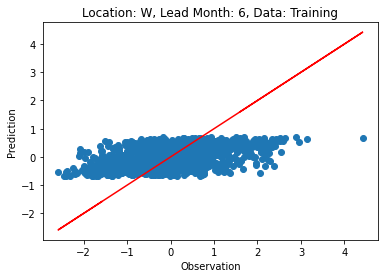

Training Model 4
Epoch [20/400], Avg Loss: 5.2640,  Val MSE: 1.2015
Epoch [40/400], Avg Loss: 1.4644,  Val MSE: 1.3801
Epoch [60/400], Avg Loss: 1.1220,  Val MSE: 1.4205
Epoch [80/400], Avg Loss: 1.0965,  Val MSE: 1.4210
Epoch [100/400], Avg Loss: 1.0886,  Val MSE: 1.4211
Epoch [120/400], Avg Loss: 1.0845,  Val MSE: 1.4211
Epoch [140/400], Avg Loss: 1.0826,  Val MSE: 1.4211
Epoch [160/400], Avg Loss: 1.0812,  Val MSE: 1.4211
Epoch [180/400], Avg Loss: 1.0806,  Val MSE: 1.4211
Epoch [200/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [220/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [240/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [260/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [280/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [300/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [320/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [340/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [360/400], Avg Loss: 1.0805,  Val MSE: 1.4211
Epoch [380/400], Avg Loss: 1.0805,  Val MSE: 1.4211

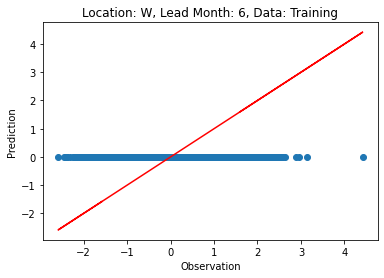

Training Model 5
Epoch [20/400], Avg Loss: 5.2845,  Val MSE: 1.1881
Epoch [40/400], Avg Loss: 1.4740,  Val MSE: 1.3499
Epoch [60/400], Avg Loss: 1.1484,  Val MSE: 1.3998
Epoch [80/400], Avg Loss: 1.1144,  Val MSE: 1.3893
Epoch [100/400], Avg Loss: 1.0633,  Val MSE: 1.2697
Epoch [120/400], Avg Loss: 1.0064,  Val MSE: 1.1592
Epoch [140/400], Avg Loss: 0.9885,  Val MSE: 1.1894
Epoch [160/400], Avg Loss: 0.9791,  Val MSE: 1.2386
Epoch [180/400], Avg Loss: 0.9733,  Val MSE: 1.2707
Epoch [200/400], Avg Loss: 0.9694,  Val MSE: 1.2918
Epoch [220/400], Avg Loss: 0.9669,  Val MSE: 1.3046
Epoch [240/400], Avg Loss: 0.9643,  Val MSE: 1.3111
Epoch [260/400], Avg Loss: 0.9613,  Val MSE: 1.3162
Epoch [280/400], Avg Loss: 0.9586,  Val MSE: 1.3194
Epoch [300/400], Avg Loss: 0.9568,  Val MSE: 1.3209
Epoch [320/400], Avg Loss: 0.9561,  Val MSE: 1.3214
Epoch [340/400], Avg Loss: 0.9558,  Val MSE: 1.3217
Epoch [360/400], Avg Loss: 0.9555,  Val MSE: 1.3219
Epoch [380/400], Avg Loss: 0.9551,  Val MSE: 1.3223

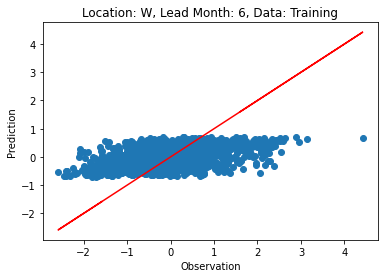

Location: W
Persistence MSE: 1.9929
Test MSE: 1.3500
Persist CSI: 0.1111
Persist CSI 80: 0.2386
Test CSI: 0.0000
Test CSI 80: 0.0000


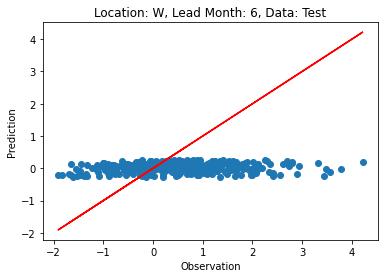

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.71359485
Training Model 1
Epoch [20/400], Avg Loss: 5.1943,  Val MSE: 0.7800
Epoch [40/400], Avg Loss: 1.3645,  Val MSE: 0.8433
Epoch [60/400], Avg Loss: 1.0625,  Val MSE: 0.8419
Epoch [80/400], Avg Loss: 0.9962,  Val MSE: 0.7846
Epoch [100/400], Avg Loss: 0.9558,  Val MSE: 0.8022
Epoch [120/400], Avg Loss: 0.9394,  Val MSE: 0.8308
Epoch [140/400], Avg Loss: 0.9286,  Val MSE: 0.8555
Epoch [160/400], Avg Loss: 0.9204,  Val MSE: 0.8737
Epoch [180/400], Avg Loss: 0.9148,  Val MSE: 0.8882
Epoch [200/400], Avg Loss: 0.9099,  Val MSE: 0.8988
Epoch [220/400], Avg Loss: 0.9055,  Val MSE: 0.9058
Epoch [240/400], Avg Loss: 0.9015,  Val MSE: 0.9116
Epoch [260/400], Avg Loss: 0.8991,  Val MSE: 0.9164
Epoch [280/400], Avg Loss: 0.8975,  Val MSE: 0.9205
Epoch [300/400], Avg Loss: 0.8960,  Val MSE: 0.9239
Epoch [320/400], Avg Loss: 0.8943,  Val MSE: 0.9270
Epoch [340/400], Avg Loss: 0.8934,  Val MSE: 0.9298
Epoch [360/400], Avg Loss: 0.8931,  Va

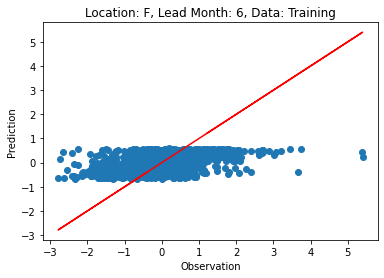

Training Model 2
Epoch [20/400], Avg Loss: 5.2522,  Val MSE: 0.7841
Epoch [40/400], Avg Loss: 1.3709,  Val MSE: 0.8609
Epoch [60/400], Avg Loss: 1.0414,  Val MSE: 0.8790
Epoch [80/400], Avg Loss: 1.0202,  Val MSE: 0.8798
Epoch [100/400], Avg Loss: 1.0129,  Val MSE: 0.8801
Epoch [120/400], Avg Loss: 1.0084,  Val MSE: 0.8802
Epoch [140/400], Avg Loss: 1.0065,  Val MSE: 0.8802
Epoch [160/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [180/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [200/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [220/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [240/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [260/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [280/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [300/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [320/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [340/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [360/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [380/400], Avg Loss: 1.0062,  Val MSE: 0.8802

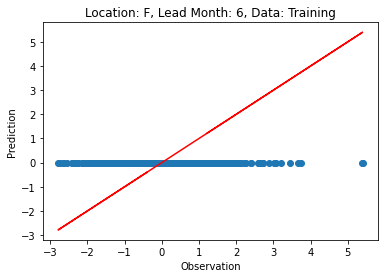

Training Model 3
Epoch [20/400], Avg Loss: 5.2170,  Val MSE: 0.7886
Epoch [40/400], Avg Loss: 1.3540,  Val MSE: 0.8563
Epoch [60/400], Avg Loss: 1.0484,  Val MSE: 0.8777
Epoch [80/400], Avg Loss: 1.0220,  Val MSE: 0.8796
Epoch [100/400], Avg Loss: 1.0134,  Val MSE: 0.8799
Epoch [120/400], Avg Loss: 1.0097,  Val MSE: 0.8801
Epoch [140/400], Avg Loss: 1.0080,  Val MSE: 0.8801
Epoch [160/400], Avg Loss: 1.0072,  Val MSE: 0.8802
Epoch [180/400], Avg Loss: 1.0067,  Val MSE: 0.8802
Epoch [200/400], Avg Loss: 1.0063,  Val MSE: 0.8802
Epoch [220/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [240/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [260/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [280/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [300/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [320/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [340/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [360/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [380/400], Avg Loss: 1.0062,  Val MSE: 0.8802

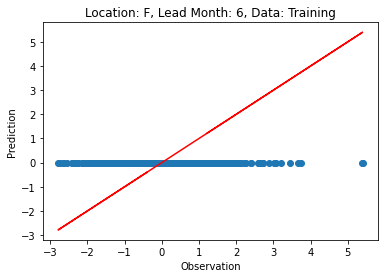

Training Model 4
Epoch [20/400], Avg Loss: 5.2525,  Val MSE: 0.7830
Epoch [40/400], Avg Loss: 1.3774,  Val MSE: 0.8615
Epoch [60/400], Avg Loss: 1.0359,  Val MSE: 0.8791
Epoch [80/400], Avg Loss: 1.0188,  Val MSE: 0.8797
Epoch [100/400], Avg Loss: 1.0129,  Val MSE: 0.8800
Epoch [120/400], Avg Loss: 1.0091,  Val MSE: 0.8801
Epoch [140/400], Avg Loss: 1.0071,  Val MSE: 0.8802
Epoch [160/400], Avg Loss: 1.0063,  Val MSE: 0.8802
Epoch [180/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [200/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [220/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [240/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [260/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [280/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [300/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [320/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [340/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [360/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [380/400], Avg Loss: 1.0062,  Val MSE: 0.8802

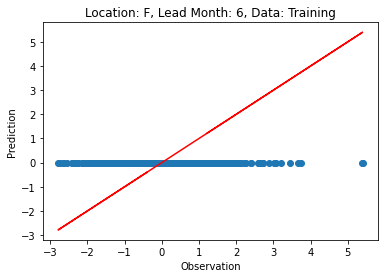

Training Model 5
Epoch [20/400], Avg Loss: 5.2127,  Val MSE: 0.7847
Epoch [40/400], Avg Loss: 1.3673,  Val MSE: 0.8700
Epoch [60/400], Avg Loss: 1.0303,  Val MSE: 0.8793
Epoch [80/400], Avg Loss: 1.0176,  Val MSE: 0.8799
Epoch [100/400], Avg Loss: 1.0104,  Val MSE: 0.8801
Epoch [120/400], Avg Loss: 1.0071,  Val MSE: 0.8802
Epoch [140/400], Avg Loss: 1.0063,  Val MSE: 0.8802
Epoch [160/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [180/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [200/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [220/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [240/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [260/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [280/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [300/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [320/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [340/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [360/400], Avg Loss: 1.0062,  Val MSE: 0.8802
Epoch [380/400], Avg Loss: 1.0062,  Val MSE: 0.8802

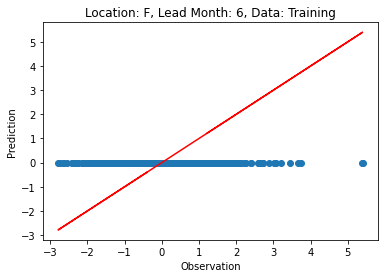

Location: F
Persistence MSE: 1.4574
Test MSE: 0.8735
Persist CSI: 0.1193
Persist CSI 80: 0.2157
Test CSI: 0.0000
Test CSI 80: 0.0000


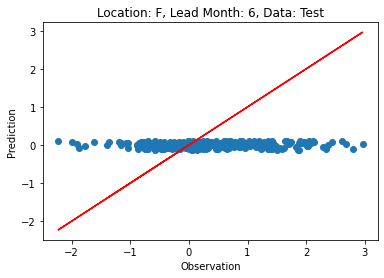

Location: CI
90th Threshold: 1.3159964
80th Threshold: 0.73513293
Training Model 1
Epoch [20/400], Avg Loss: 5.1636,  Val MSE: 0.6288
Epoch [40/400], Avg Loss: 1.3589,  Val MSE: 0.6184
Epoch [60/400], Avg Loss: 1.0068,  Val MSE: 0.6224
Epoch [80/400], Avg Loss: 0.9721,  Val MSE: 0.6227
Epoch [100/400], Avg Loss: 0.9619,  Val MSE: 0.6229
Epoch [120/400], Avg Loss: 0.9576,  Val MSE: 0.6229
Epoch [140/400], Avg Loss: 0.9547,  Val MSE: 0.6229
Epoch [160/400], Avg Loss: 0.9538,  Val MSE: 0.6230
Epoch [180/400], Avg Loss: 0.9533,  Val MSE: 0.6230
Epoch [200/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [220/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [240/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [260/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [280/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [300/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [320/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [340/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [360/400], Avg Loss: 0.9532,  V

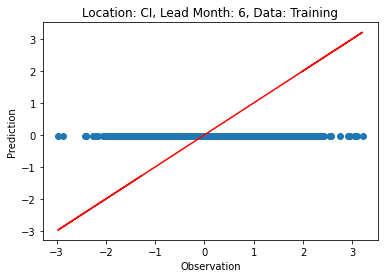

Training Model 2
Epoch [20/400], Avg Loss: 5.1408,  Val MSE: 0.6265
Epoch [40/400], Avg Loss: 1.3830,  Val MSE: 0.6186
Epoch [60/400], Avg Loss: 0.9951,  Val MSE: 0.6226
Epoch [80/400], Avg Loss: 0.9706,  Val MSE: 0.6228
Epoch [100/400], Avg Loss: 0.9612,  Val MSE: 0.6229
Epoch [120/400], Avg Loss: 0.9555,  Val MSE: 0.6229
Epoch [140/400], Avg Loss: 0.9536,  Val MSE: 0.6230
Epoch [160/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [180/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [200/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [220/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [240/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [260/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [280/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [300/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [320/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [340/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [360/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [380/400], Avg Loss: 0.9532,  Val MSE: 0.6230

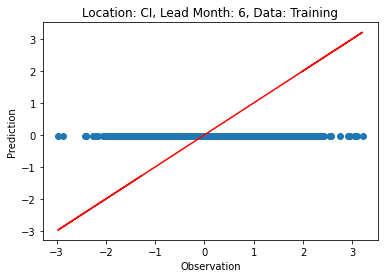

Training Model 3
Epoch [20/400], Avg Loss: 5.1092,  Val MSE: 0.6241
Epoch [40/400], Avg Loss: 1.3505,  Val MSE: 0.6175
Epoch [60/400], Avg Loss: 1.0124,  Val MSE: 0.6223
Epoch [80/400], Avg Loss: 0.9738,  Val MSE: 0.6227
Epoch [100/400], Avg Loss: 0.9636,  Val MSE: 0.6229
Epoch [120/400], Avg Loss: 0.9578,  Val MSE: 0.6229
Epoch [140/400], Avg Loss: 0.9544,  Val MSE: 0.6230
Epoch [160/400], Avg Loss: 0.9534,  Val MSE: 0.6230
Epoch [180/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [200/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [220/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [240/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [260/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [280/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [300/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [320/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [340/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [360/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [380/400], Avg Loss: 0.9532,  Val MSE: 0.6230

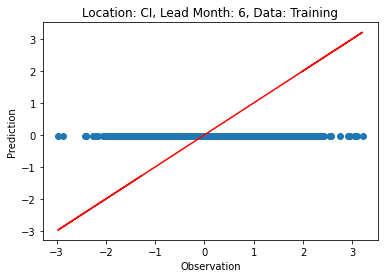

Training Model 4
Epoch [20/400], Avg Loss: 5.1296,  Val MSE: 0.6234
Epoch [40/400], Avg Loss: 1.3631,  Val MSE: 0.6180
Epoch [60/400], Avg Loss: 1.0016,  Val MSE: 0.6225
Epoch [80/400], Avg Loss: 0.9719,  Val MSE: 0.6228
Epoch [100/400], Avg Loss: 0.9608,  Val MSE: 0.6229
Epoch [120/400], Avg Loss: 0.9554,  Val MSE: 0.6229
Epoch [140/400], Avg Loss: 0.9534,  Val MSE: 0.6230
Epoch [160/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [180/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [200/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [220/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [240/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [260/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [280/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [300/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [320/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [340/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [360/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [380/400], Avg Loss: 0.9532,  Val MSE: 0.6230

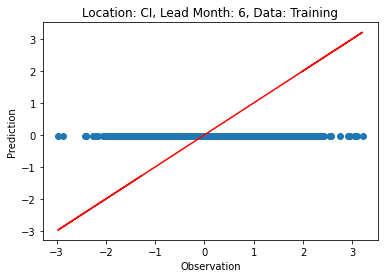

Training Model 5
Epoch [20/400], Avg Loss: 5.1455,  Val MSE: 0.6279
Epoch [40/400], Avg Loss: 1.3752,  Val MSE: 0.6183
Epoch [60/400], Avg Loss: 1.0065,  Val MSE: 0.6225
Epoch [80/400], Avg Loss: 0.9721,  Val MSE: 0.6228
Epoch [100/400], Avg Loss: 0.9619,  Val MSE: 0.6229
Epoch [120/400], Avg Loss: 0.9561,  Val MSE: 0.6229
Epoch [140/400], Avg Loss: 0.9539,  Val MSE: 0.6230
Epoch [160/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [180/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [200/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [220/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [240/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [260/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [280/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [300/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [320/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [340/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [360/400], Avg Loss: 0.9532,  Val MSE: 0.6230
Epoch [380/400], Avg Loss: 0.9532,  Val MSE: 0.6230

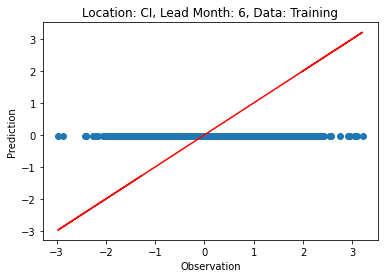

Location: CI
Persistence MSE: 1.1939
Test MSE: 0.6230
Persist CSI: 0.0000
Persist CSI 80: 0.0594
Test CSI: 0.0000
Test CSI 80: 0.0000


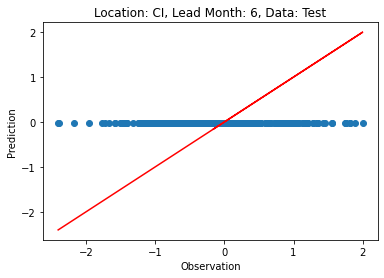

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.71098405
Training Model 1
Epoch [20/400], Avg Loss: 5.0370,  Val MSE: 0.4745
Epoch [40/400], Avg Loss: 1.1473,  Val MSE: 0.5483
Epoch [60/400], Avg Loss: 0.8305,  Val MSE: 0.5586
Epoch [80/400], Avg Loss: 0.8141,  Val MSE: 0.5587
Epoch [100/400], Avg Loss: 0.8085,  Val MSE: 0.5587
Epoch [120/400], Avg Loss: 0.8058,  Val MSE: 0.5587
Epoch [140/400], Avg Loss: 0.8044,  Val MSE: 0.5588
Epoch [160/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [180/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [200/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [220/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [240/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [260/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [280/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [300/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [320/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [340/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [360/400], Avg Loss: 0.8043,  V

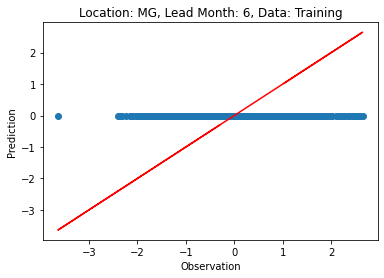

Training Model 2
Epoch [20/400], Avg Loss: 5.0495,  Val MSE: 0.4730
Epoch [40/400], Avg Loss: 1.1527,  Val MSE: 0.5486
Epoch [60/400], Avg Loss: 0.8308,  Val MSE: 0.5586
Epoch [80/400], Avg Loss: 0.8142,  Val MSE: 0.5586
Epoch [100/400], Avg Loss: 0.8079,  Val MSE: 0.5587
Epoch [120/400], Avg Loss: 0.8054,  Val MSE: 0.5587
Epoch [140/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [160/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [180/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [200/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [220/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [240/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [260/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [280/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [300/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [320/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [340/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [360/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [380/400], Avg Loss: 0.8043,  Val MSE: 0.5588

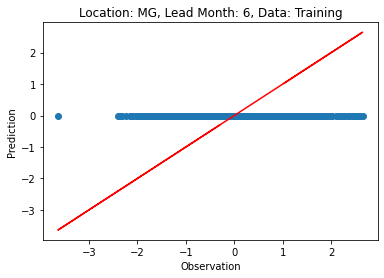

Training Model 3
Epoch [20/400], Avg Loss: 5.0172,  Val MSE: 0.4701
Epoch [40/400], Avg Loss: 1.1520,  Val MSE: 0.5511
Epoch [60/400], Avg Loss: 0.8273,  Val MSE: 0.5585
Epoch [80/400], Avg Loss: 0.8139,  Val MSE: 0.5586
Epoch [100/400], Avg Loss: 0.8075,  Val MSE: 0.5587
Epoch [120/400], Avg Loss: 0.8047,  Val MSE: 0.5588
Epoch [140/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [160/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [180/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [200/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [220/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [240/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [260/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [280/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [300/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [320/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [340/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [360/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [380/400], Avg Loss: 0.8043,  Val MSE: 0.5588

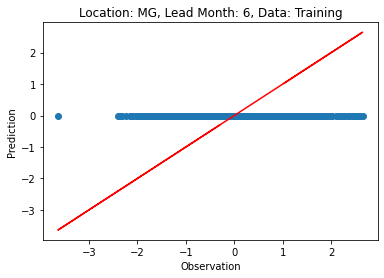

Training Model 4
Epoch [20/400], Avg Loss: 5.0027,  Val MSE: 0.4730
Epoch [40/400], Avg Loss: 1.1517,  Val MSE: 0.5478
Epoch [60/400], Avg Loss: 0.8333,  Val MSE: 0.5585
Epoch [80/400], Avg Loss: 0.8141,  Val MSE: 0.5587
Epoch [100/400], Avg Loss: 0.8079,  Val MSE: 0.5587
Epoch [120/400], Avg Loss: 0.8052,  Val MSE: 0.5587
Epoch [140/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [160/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [180/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [200/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [220/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [240/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [260/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [280/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [300/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [320/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [340/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [360/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [380/400], Avg Loss: 0.8043,  Val MSE: 0.5588

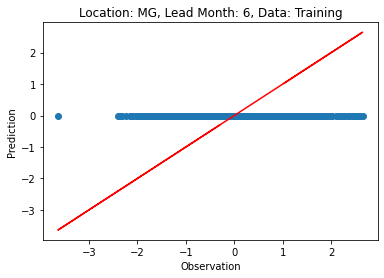

Training Model 5
Epoch [20/400], Avg Loss: 5.0550,  Val MSE: 0.4756
Epoch [40/400], Avg Loss: 1.1560,  Val MSE: 0.5460
Epoch [60/400], Avg Loss: 0.8318,  Val MSE: 0.5587
Epoch [80/400], Avg Loss: 0.8160,  Val MSE: 0.5586
Epoch [100/400], Avg Loss: 0.8097,  Val MSE: 0.5587
Epoch [120/400], Avg Loss: 0.8066,  Val MSE: 0.5587
Epoch [140/400], Avg Loss: 0.8048,  Val MSE: 0.5588
Epoch [160/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [180/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [200/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [220/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [240/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [260/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [280/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [300/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [320/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [340/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [360/400], Avg Loss: 0.8043,  Val MSE: 0.5588
Epoch [380/400], Avg Loss: 0.8043,  Val MSE: 0.5588

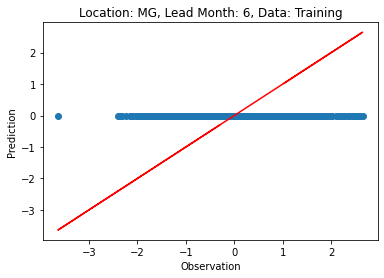

Location: MG
Persistence MSE: 0.6668
Test MSE: 0.5588
Persist CSI: 0.2059
Persist CSI 80: 0.1953
Test CSI: 0.0000
Test CSI 80: 0.0000


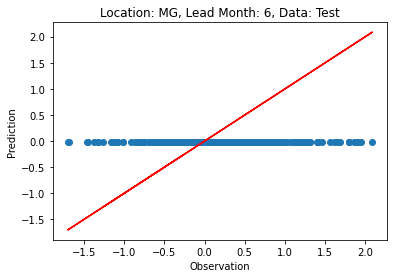

Location  Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
7       BOP           0.4797       0.0800          0.2188    0.4627       0.0   
6        BP           1.1322       0.0556          0.0753    0.6106       0.0   
10       CI           1.1939       0.0000          0.0594    0.6230       0.0   
3        CR           0.6796       0.1500          0.2276    0.5644       0.0   
1        CS           0.5333       0.2000          0.2331    0.3754       0.0   
9         F           1.4574       0.1193          0.2157    0.8735       0.0   
11       MG           0.6668       0.2059          0.1953    0.5588       0.0   
4        OP           0.9675       0.0164          0.1058    0.6072       0.0   
0         R           0.8115       0.2203          0.2652    0.7069       0.0   
2        SI           0.9592       0.0339          0.1750    0.6128       0.0   
5         T           1.3399       0.1571          0.2487    1.2498       0.0   
8         W           1.9929       0.1111          0.2386    1.3500       0.0   

    Test CSI 80  Training Time  
7           0.0        23.3330  
6           0.0        23.0696  
10          0.0        23.2094  
3           0.0        22.8684  
1           0.0        22.0390  
9           0.0        22.6347  
11          0.0        23.4015  
4           0.0        22.7006  
0           0.0        22.5721  
2           0.0        22.5788  
5           0.0        23.4525  
8           0.0        22.8589

Persistence MSE  Persist CSI  Persist CSI 80  Test MSE  Test CSI  \
Mean           1.0178       0.1125          0.1882    0.7163       0.0   

      Test CSI 80  Training Time  
Mean          0.0        22.8932

In [ ]:
net_class = 'FCN'
num_layer = 3
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [6]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1

    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        all_preds = []
        all_time = []

        print('Location:', loc.upper())
        
        for model_num in range(5):

            y = nz[loc]
            y_all = y

            x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
            y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
            x_all = np.swapaxes(x_all, 1, 2)
            x_all_flat = np.array(x_all).reshape(-1, num_var*6)
            y_all = np.array(y_all)

            num_train = int(len(x_all) * train_split)
            x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
            x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

            # The threshold for defining outliers using the 90th percentile
            y_train_sorted = np.sort(y_train.numpy().squeeze())
            threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
            threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
            if model_num == 0:
                print('90th Threshold:', threshold)
                print('80th Threshold:', threshold_low)

            model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            criterion = nn.MSELoss()
            criterion_test = nn.MSELoss()

            print('Training Model {}'.format(model_num+1))

            # Start time
            start = time.time()

            for epoch in range(num_train_epochs):
                epoch_loss = 0
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    y_pred = model(x_batch)

                    loss = criterion(y_pred, y_batch)
                    
                    # Elastic Net Reg
                    # l1_ratio = 0 is the L2 reg.
                    # l1_ratio = 1 is the L1 reg.
                    l1_reg = 0.0
                    l2_reg = 0.0
                    for param in model.parameters():
                        l1_reg += torch.norm(param, 1)
                        l2_reg += torch.norm(param, 2)
                    loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                    optim.zero_grad()
                    loss.backward()
                    optim.step()
                    if (epoch+1) % 20 == 0:
                        #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                        epoch_loss += loss.item()
                with torch.no_grad():
                    y_pred = model(x_test)
                    val_mse = criterion_test(y_pred, y_test)     
                if (epoch+1) % 20 == 0:
                    epoch_loss /= len(x_train) // batch_size   
                    print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

            # End time
            stop = time.time()
            training_time = float(stop - start)
            all_time.append(training_time)

            with torch.no_grad():
                y_pred = model(x_train)

            plt.scatter(y_train, y_pred)
            x = y_train
            y = y_train
            plt.plot(x, y, color='red')
            plt.xlabel('Observation')
            plt.ylabel('Prediction')
            plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
            plt.show()

            with torch.no_grad():
                persist_mse = criterion_test(y_test[:-lead_time], y_test[lead_time:])
                y_pred = model(x_test)
                all_preds.append(y_pred.numpy())
        
        sum_preds = np.add.reduce(all_preds)
        avg_preds = sum_preds / (model_num + 1)

        print('Location:', loc.upper())

        test_mse = criterion_test(torch.tensor(avg_preds), y_test)
        print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
        print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in avg_preds]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in avg_preds]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, avg_preds)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(sum(all_time) / len(all_time), 4))

all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
display(test_results)

mean_row = pd.DataFrame(test_results.select_dtypes(include='number').mean(), columns=['Mean']).T
mean_row = mean_row.round(4)
mean_test_results = mean_row.copy()
display(mean_test_results)